In [1]:
import osmnx as ox
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import random as rd
from IPython.display import clear_output
from shapely.wkt import loads as load_wkt
import matplotlib.cm as cm
import time
ox.config(log_console=True, use_cache=True)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


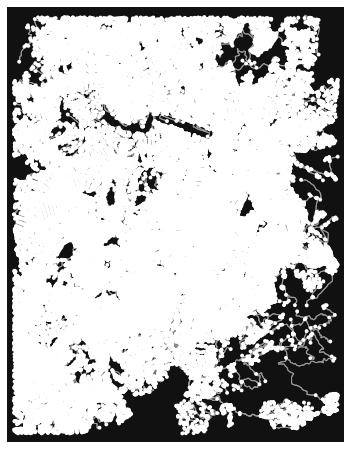

In [2]:
G = ox.graph_from_bbox(-19.7961,-20.0056,-44.0418,-43.8684,network_type='walk')

fig, ax = ox.plot_graph(G)

In [3]:
df = pd.read_excel(r'C:\Users\Vinicius Fernandes\Documents\GitHub\TCC\Dados\lista_enderecos_araujo\lista_enderecos_completa.xlsx')
df = pd.concat([df[['enderecos']], df['coordenadas'].str.split(', ', expand=True)], axis=1)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df

enderecos          0          1
0                            Rua Curitiba, 327, Centro -19.915654 -43.940298
1                            Rua Curitiba, 729, Centro -19.919201 -43.941317
2                 Avenida Augusto de Lima, 744, Centro -19.922607 -43.942935
3                           Rua da Bahia, 1070, Centro -19.924362 -43.937421
4              Avenida Afonso Pena, 2700, Funcionários -19.935060 -43.929023
..                                                 ...        ...        ...
169      Avenida Presidente Carlos Luz, 3001, Caiçaras -19.891014 -43.967874
170                 Rua Vitório Marçola, 643, Anchieta -19.947377 -43.924611
171                      Rua Izabel Bueno, 743, Indaiá -19.863255 -43.950316
172  Avenida General David Saranoff, 5160, Cidade I... -19.946100 -44.021466
173                           Rua Bragança, 7, Pompéia -19.911181 -43.899940

[174 rows x 3 columns]

In [9]:
nodes_araujos = []
nodes_araujos_completos = []

for i in range(len(df)):
    coordenada_lat = df.loc[i,0]
    coordenada_long = df.loc[i,1]
    location_point = (coordenada_lat,coordenada_long)
    origin_node = ox.get_nearest_node(G, location_point)
    nodes_araujos.append(origin_node)
    nodes_araujos_completos.append([origin_node,G.nodes[origin_node]['y'],G.nodes[origin_node]['x']])

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

In [5]:
nodes_araujos

[321042284,
 29095724,
 2828780801,
 29095247,
 32449511,
 320926284,
 316646720,
 2823678724,
 8230853350,
 5376300742,
 5370380051,
 60591876,
 8978900281,
 5335304499,
 28296524,
 28635088,
 1307115209,
 449304360,
 2903602130,
 4986135629,
 29741053,
 61818316,
 29096247,
 6918856501,
 317757561,
 504707609,
 29288079,
 35789337,
 33078913,
 4449856595,
 1828145609,
 101043764,
 320407460,
 4696431319,
 33024422,
 8979260566,
 8905710882,
 2455781746,
 1248124036,
 4986055935,
 4987462491,
 4562661165,
 8976733542,
 8942106036,
 35965564,
 29095886,
 4972133043,
 8208235357,
 1314231500,
 4270893865,
 8934295040,
 316646683,
 5862308830,
 1307102930,
 2496065594,
 60730897,
 31899404,
 8218211880,
 2695243639,
 1583910468,
 6780186664,
 2618890653,
 2455731663,
 60749803,
 60672196,
 8272842447,
 8914547819,
 8979227736,
 8204936584,
 8914336975,
 6307190757,
 8139968506,
 316646951,
 79978691,
 2448001088,
 8914354027,
 2313580671,
 317769936,
 316639278,
 3712165766,
 8898994289,

In [6]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)  # Transforms nodes and edges into Geodataframes

nodes['menor_distancia_para_araujo'] = 0
nodes['araujo_mais_proxima'] = 0
route_lengths = []


In [10]:
node_araujos_busca = []
step = 0.0005

for node in G.nodes:
    start_time = time.time()
    
    #print(node)
    
    araujos_busca = []
    
    n_step = 1
        
    while len(araujos_busca) < 3:
        
        #print(n_step)
        
        for index_node_araujo in range(len(nodes_araujos_completos)):
            
            try:
            
                y_mais = G.nodes[node]['y'] + (n_step * step)
                y_menos = G.nodes[node]['y'] - (n_step * step)
                x_mais = G.nodes[node]['x'] + (n_step * step)
                x_menos = G.nodes[node]['x'] - (n_step * step)


                y_teste = nodes_araujos_completos[index_node_araujo][1]
                x_teste = nodes_araujos_completos[index_node_araujo][2]

                if y_teste<y_mais and y_teste>y_menos and x_teste<x_mais and x_teste>x_menos and nodes_araujos_completos[index_node_araujo][0] not in araujos_busca:
                    araujos_busca.append(nodes_araujos_completos[index_node_araujo][0])

                    #print('chegou aqui e tirou pop')
                    
            except IndexError:
                break
        
        #print(araujos_busca,' - ',len(araujos_busca))
        
        
        n_step += 1
        
        
    node_araujos_busca.append([node,araujos_busca])
    print("--- %s seconds ---" % (time.time() - start_time))
    #print(node_araujos_busca)
    #print('\n','\n')

--- 0.01647806167602539 seconds ---
--- 0.013999700546264648 seconds ---
--- 0.012952566146850586 seconds ---
--- 0.02890777587890625 seconds ---
--- 0.010960817337036133 seconds ---
--- 0.004231452941894531 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015669822692871094 seconds ---
--- 0.004544734954833984 seconds ---
--- 0.0 seconds ---
--- 0.0156707763671875 seconds ---
--- 0.0 seconds ---
--- 0.018787860870361328 seconds ---
--- 0.0032541751861572266 seconds ---
--- 0.015655517578125 seconds ---
--- 0.015640974044799805 seconds ---
--- 0.015602827072143555 seconds ---
--- 0.015552520751953125 seconds ---
--- 0.01570296287536621 seconds ---
--- 0.01560211181640625 seconds ---
--- 0.0 seconds ---
--- 0.033388376235961914 seconds ---
--- 0.02708125114440918 seconds ---
--- 0.020896196365356445 seconds ---
--- 0.016919374465942383 seconds ---
--- 0.031243324279785156 seconds ---
--- 0.015138387680053711 seconds ---
--- 0.04041242599487305 seconds ---
--

--- 0.015622377395629883 seconds ---
--- 0.03792285919189453 seconds ---
--- 0.019933462142944336 seconds ---
--- 0.019795894622802734 seconds ---
--- 0.031590938568115234 seconds ---
--- 0.015612125396728516 seconds ---
--- 0.015640735626220703 seconds ---
--- 0.015600442886352539 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.02164459228515625 seconds ---
--- 0.01988840103149414 seconds ---
--- 0.01798534393310547 seconds ---
--- 0.00896310806274414 seconds ---
--- 0.006938457489013672 seconds ---
--- 0.009011268615722656 seconds ---
--- 0.015806198120117188 seconds ---
--- 0.013955116271972656 seconds ---
--- 0.022997140884399414 seconds ---
--- 0.011016607284545898 seconds ---
--- 0.013950824737548828 seconds ---
--- 0.005930662155151367 seconds ---
--- 0.007980585098266602 seconds ---
--- 0.016195297241210938 seconds ---
--- 0.01101827621459961 seconds ---
--- 0.008953094482421875 seconds ---
--- 0.013969659805297852 seconds ---
--- 0.009959697723388672 seconds ---
--- 0.0

--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.017113685607910156 seconds ---
--- 0.02581024169921875 seconds ---
--- 0.004001617431640625 seconds ---
--- 0.01796245574951172 seconds ---
--- 0.008976221084594727 seconds ---
--- 0.0 seconds ---
--- 0.015680789947509766 seconds ---
--- 0.01556849479675293 seconds ---
--- 0.01567244529724121 seconds ---
--- 0.0 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.0 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.015563488006591797 seconds ---
--- 0.03124403953552246 seconds ---
--- 0.0 seconds ---
--- 0.02106642723083496 seconds ---
--- 0.024881601333618164 seconds ---
--- 0.005979299545288086 seconds ---
--- 0.004004240036010742 seconds ---
--- 0.0019960403442382812 seconds ---
--- 0.015673160552978516 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015630006790161133 seconds ---
--- 0.0 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.0 sec

--- 0.022887468338012695 seconds ---
--- 0.023920059204101562 seconds ---
--- 0.01793956756591797 seconds ---
--- 0.01395869255065918 seconds ---
--- 0.01295018196105957 seconds ---
--- 0.012956619262695312 seconds ---
--- 0.003011465072631836 seconds ---
--- 0.019308090209960938 seconds ---
--- 0.006978750228881836 seconds ---
--- 0.00498199462890625 seconds ---
--- 0.012355327606201172 seconds ---
--- 0.018936634063720703 seconds ---
--- 0.017932891845703125 seconds ---
--- 0.006033658981323242 seconds ---
--- 0.01589488983154297 seconds ---
--- 0.024132966995239258 seconds ---
--- 0.007970333099365234 seconds ---
--- 0.0214540958404541 seconds ---
--- 0.019104719161987305 seconds ---
--- 0.00398564338684082 seconds ---
--- 0.013564348220825195 seconds ---
--- 0.0019927024841308594 seconds ---
--- 0.010959625244140625 seconds ---
--- 0.014005184173583984 seconds ---
--- 0.010970354080200195 seconds ---
--- 0.01295328140258789 seconds ---
--- 0.004966259002685547 seconds ---
--- 0.006

--- 0.02035236358642578 seconds ---
--- 0.009642601013183594 seconds ---
--- 0.02030181884765625 seconds ---
--- 0.013681411743164062 seconds ---
--- 0.011699199676513672 seconds ---
--- 0.014131546020507812 seconds ---
--- 0.010199546813964844 seconds ---
--- 0.01498270034790039 seconds ---
--- 0.005081653594970703 seconds ---
--- 0.010144948959350586 seconds ---
--- 0.011461019515991211 seconds ---
--- 0.008568048477172852 seconds ---
--- 0.010056734085083008 seconds ---
--- 0.01006317138671875 seconds ---
--- 0.009926557540893555 seconds ---
--- 0.009981155395507812 seconds ---
--- 0.01987767219543457 seconds ---
--- 0.03980064392089844 seconds ---
--- 0.027747631072998047 seconds ---
--- 0.013952493667602539 seconds ---
--- 0.012949228286743164 seconds ---
--- 0.01531076431274414 seconds ---
--- 0.0200955867767334 seconds ---
--- 0.019981861114501953 seconds ---
--- 0.02030801773071289 seconds ---
--- 0.01472783088684082 seconds ---
--- 0.005072355270385742 seconds ---
--- 0.010223

--- 0.01971912384033203 seconds ---
--- 0.015291213989257812 seconds ---
--- 0.004676342010498047 seconds ---
--- 0.005060911178588867 seconds ---
--- 0.01396489143371582 seconds ---
--- 0.003973484039306641 seconds ---
--- 0.0109710693359375 seconds ---
--- 0.012969255447387695 seconds ---
--- 0.018115997314453125 seconds ---
--- 0.01008749008178711 seconds ---
--- 0.010301828384399414 seconds ---
--- 0.00978851318359375 seconds ---
--- 0.010050296783447266 seconds ---
--- 0.010056018829345703 seconds ---
--- 0.004554271697998047 seconds ---
--- 0.030423641204833984 seconds ---
--- 0.02508831024169922 seconds ---
--- 0.029750347137451172 seconds ---
--- 0.0397038459777832 seconds ---
--- 0.02657008171081543 seconds ---
--- 0.033692359924316406 seconds ---
--- 0.02975320816040039 seconds ---
--- 0.01517486572265625 seconds ---
--- 0.010234594345092773 seconds ---
--- 0.014608621597290039 seconds ---
--- 0.020319223403930664 seconds ---
--- 0.005270481109619141 seconds ---
--- 0.0050578

--- 0.0350794792175293 seconds ---
--- 0.024881839752197266 seconds ---
--- 0.027677059173583984 seconds ---
--- 0.01292562484741211 seconds ---
--- 0.008009195327758789 seconds ---
--- 0.0065975189208984375 seconds ---
--- 0.014550924301147461 seconds ---
--- 0.01021718978881836 seconds ---
--- 0.005101203918457031 seconds ---
--- 0.010070323944091797 seconds ---
--- 0.01483297348022461 seconds ---
--- 0.014890909194946289 seconds ---
--- 0.03526425361633301 seconds ---
--- 0.015100479125976562 seconds ---
--- 0.01979541778564453 seconds ---
--- 0.022661209106445312 seconds ---
--- 0.021933555603027344 seconds ---
--- 0.020133256912231445 seconds ---
--- 0.025360822677612305 seconds ---
--- 0.02469611167907715 seconds ---
--- 0.029968976974487305 seconds ---
--- 0.02009868621826172 seconds ---
--- 0.02542281150817871 seconds ---
--- 0.020052433013916016 seconds ---
--- 0.022806882858276367 seconds ---
--- 0.014954090118408203 seconds ---
--- 0.01395273208618164 seconds ---
--- 0.01309

--- 0.006562471389770508 seconds ---
--- 0.015132904052734375 seconds ---
--- 0.014757156372070312 seconds ---
--- 0.0050640106201171875 seconds ---
--- 0.01732945442199707 seconds ---
--- 0.01597738265991211 seconds ---
--- 0.009949684143066406 seconds ---
--- 0.00897669792175293 seconds ---
--- 0.0041162967681884766 seconds ---
--- 0.00856471061706543 seconds ---
--- 0.01004791259765625 seconds ---
--- 0.009974241256713867 seconds ---
--- 0.009920835494995117 seconds ---
--- 0.010490655899047852 seconds ---
--- 0.009896039962768555 seconds ---
--- 0.01984548568725586 seconds ---
--- 0.014745235443115234 seconds ---
--- 0.005065441131591797 seconds ---
--- 0.005079984664916992 seconds ---
--- 0.00579833984375 seconds ---
--- 0.009177923202514648 seconds ---
--- 0.01015019416809082 seconds ---
--- 0.010136842727661133 seconds ---
--- 0.009645223617553711 seconds ---
--- 0.010187149047851562 seconds ---
--- 0.01513218879699707 seconds ---
--- 0.013965845108032227 seconds ---
--- 0.01594

--- 0.04177284240722656 seconds ---
--- 0.027463197708129883 seconds ---
--- 0.028905391693115234 seconds ---
--- 0.006972312927246094 seconds ---
--- 0.007978439331054688 seconds ---
--- 0.008927106857299805 seconds ---
--- 0.008480310440063477 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015692949295043945 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015608072280883789 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015655994415283203 seconds ---
--- 0.030004262924194336 seconds ---
--- 0.013947010040283203 seconds ---
--- 0.009071826934814453 seconds ---
--- 0.0 seconds ---
--- 0.02352452278137207 seconds ---
--- 0.010551929473876953 seconds ---
--- 0.009966611862182617 seconds ---
--- 0.01096343994140625 seconds ---
--- 0.003986835479736328 seconds ---
--- 0.007973194122314453 seconds ---
--- 0.004060506820678711 seconds ---
--- 0.01639103889465332 se

--- 0.028362512588500977 seconds ---
--- 0.012999296188354492 seconds ---
--- 0.012613773345947266 seconds ---
--- 0.009087324142456055 seconds ---
--- 0.015684127807617188 seconds ---
--- 0.021073341369628906 seconds ---
--- 0.0 seconds ---
--- 0.031253814697265625 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.00650787353515625 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.0 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0 seconds ---
--- 0.01561737060546875 seconds ---
--- 0.0 seconds ---
--- 0.029575824737548828 seconds ---
--- 0.01093602180480957 seconds ---
--- 0.014899730682373047 seconds ---
--- 0.011038780212402344 seconds ---
--- 0.0 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.0 seconds ---
--- 0.015675783157348633 seconds ---
--- 0.015579938888549805 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.01563715

--- 0.0156097412109375 seconds ---
--- 0.027762651443481445 seconds ---
--- 0.014945507049560547 seconds ---
--- 0.014893770217895508 seconds ---
--- 0.015009403228759766 seconds ---
--- 0.0031828880310058594 seconds ---
--- 0.01566171646118164 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.015639781951904297 seconds ---
--- 0.01563262939453125 seconds ---
--- 0.015608072280883789 seconds ---
--- 0.0 seconds ---
--- 0.02129507064819336 seconds ---
--- 0.0 seconds ---
--- 0.03458762168884277 seconds ---
--- 0.01563119888305664 seconds ---
--- 0.0 seconds ---
--- 0.015607595443725586 seconds ---
--- 0.031182050704956055 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03281569480895996 seconds ---
--- 0.022090673446655273 seconds ---
--- 0.0010941028594970703 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.03132009506225586 seconds ---
--- 0.0 seconds ---


--- 0.020525455474853516 seconds ---
--- 0.0070230960845947266 seconds ---
--- 0.005984306335449219 seconds ---
--- 0.004979133605957031 seconds ---
--- 0.004984378814697266 seconds ---
--- 0.003988504409790039 seconds ---
--- 0.0039997100830078125 seconds ---
--- 0.004979133605957031 seconds ---
--- 0.008037090301513672 seconds ---
--- 0.0 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015824079513549805 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015673398971557617 seconds ---
--- 0.0 seconds ---
--- 0.015573263168334961 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 s

--- 0.01810479164123535 seconds ---
--- 0.0049822330474853516 seconds ---
--- 0.006021976470947266 seconds ---
--- 0.009094715118408203 seconds ---
--- 0.00898289680480957 seconds ---
--- 0.003977775573730469 seconds ---
--- 0.004975795745849609 seconds ---
--- 0.005980491638183594 seconds ---
--- 0.004987478256225586 seconds ---
--- 0.00408625602722168 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015682220458984375 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.015566349029541016 seconds ---
--- 0.01567983627319336 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015615701675415039 seconds ---
--- 0.0 seconds ---
--- 0.0156400203704834 seconds ---
--- 0.0 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.0 seconds ---
--- 0.016391754150390625 seconds ---
--- 0.0 

--- 0.005980253219604492 seconds ---
--- 0.00500798225402832 seconds ---
--- 0.005953788757324219 seconds ---
--- 0.00697636604309082 seconds ---
--- 0.005980014801025391 seconds ---
--- 0.0069768428802490234 seconds ---
--- 0.004983186721801758 seconds ---
--- 0.004983425140380859 seconds ---
--- 0.004983186721801758 seconds ---
--- 0.00398707389831543 seconds ---
--- 0.004983186721801758 seconds ---
--- 0.005980014801025391 seconds ---
--- 0.0039865970611572266 seconds ---
--- 0.004984617233276367 seconds ---
--- 0.003985404968261719 seconds ---
--- 0.0039865970611572266 seconds ---
--- 0.003986835479736328 seconds ---
--- 0.005980014801025391 seconds ---
--- 0.004983425140380859 seconds ---
--- 0.004983186721801758 seconds ---
--- 0.00398707389831543 seconds ---
--- 0.0006253719329833984 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.0 seconds ---
--- 0.017749309539794922 seconds ---
--- 0.002136707305908203 seconds ---
--- 0.0 seconds ---
--- 0.02033686637878418 seconds ---


--- 0.02901601791381836 seconds ---
--- 0.022897720336914062 seconds ---
--- 0.009148836135864258 seconds ---
--- 0.03129458427429199 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015625 seconds ---
--- 0.01563739776611328 seconds ---
--- 0.03123164176940918 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.015617132186889648 seconds ---
--- 0.040732383728027344 seconds ---
--- 0.020053386688232422 seconds ---
--- 0.01566314697265625 seconds ---
--- 0.03144097328186035 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.031270503997802734 seconds ---
--- 0.03122997283935547 seconds ---
--- 0.039153337478637695 seconds ---
--- 0.020056962966918945 seconds ---
--- 0.031308650970458984 seconds ---
--- 0.01563549041748047 seconds ---
--- 0.015613079071044922 seconds ---
--- 0.031230926513671875 seconds ---
--- 0.01563096046447754 seconds ---
--- 0.031192779541015625 seconds ---
--- 0.0156228542327880

--- 0.018129587173461914 seconds ---
--- 0.00897073745727539 seconds ---
--- 0.007660388946533203 seconds ---
--- 0.005979776382446289 seconds ---
--- 0.007973432540893555 seconds ---
--- 0.0069768428802490234 seconds ---
--- 0.002924203872680664 seconds ---
--- 0.0 seconds ---
--- 0.03132796287536621 seconds ---
--- 0.01561737060546875 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.0 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015615701675415039 seconds ---
--- 0.0 seconds ---
--- 0.015636205673217773 seconds ---
--- 0.0 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.011763334274291992 seconds ---
--- 0.007004261016845703 seconds ---
--- 0.009963750839233398 seconds ---
--- 0.009985685348510742 seconds ---
--

--- 0.015619993209838867 seconds ---
--- 0.0 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.0 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.0 seconds ---
--- 0.025187015533447266 seconds ---
--- 0.01795172691345215 seconds ---
--- 0.011928081512451172 seconds ---
--- 0.007184505462646484 seconds ---
--- 0.015662670135498047 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.0 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.015570640563964844 seconds ---
--- 0.015703916549682617 seconds ---
--- 0.01559305191040039 seconds ---
--- 0.0 seconds ---
--- 0.027194738388061523 seconds ---
--- 0.009883880615234375 seconds ---
--- 0.010972738265991211 seconds ---
--- 0.007961750030517578 seconds ---
--- 0.0011792182922363281 seconds ---
--- 0.0 seconds ---
--- 0.015671730041503906 seconds ---
--- 0.0 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.0 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.01

--- 0.015536308288574219 seconds ---
--- 0.015694618225097656 seconds ---
--- 0.0 seconds ---
--- 0.03443169593811035 seconds ---
--- 0.009957075119018555 seconds ---
--- 0.013955354690551758 seconds ---
--- 0.001171112060546875 seconds ---
--- 0.01568603515625 seconds ---
--- 0.015608787536621094 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.015636205673217773 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015618085861206055 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.0 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.023294687271118164 seconds ---
--- 0.01892709732055664 seconds ---
--- 0.010954618453979492 seconds ---
--- 0.0061855316162109375 seconds ---
--- 0.015770673751831055 seconds ---
--- 0.0 seconds ---
--- 0.015698671340942383 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.03119945526123047 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.015623331069946289 seconds ---
---

--- 0.01561594009399414 seconds ---
--- 0.0 seconds ---
--- 0.015630722045898438 seconds ---
--- 0.017368555068969727 seconds ---
--- 0.011788368225097656 seconds ---
--- 0.0069468021392822266 seconds ---
--- 0.0061299800872802734 seconds ---
--- 0.0 seconds ---
--- 0.015674591064453125 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.0 seconds ---
--- 0.015616893768310547 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01564478874206543 seconds ---
--- 0.0 seconds ---
--- 0.015613317489624023 seconds ---
--- 0.0 seconds ---
--- 0.015639781951904297 seconds ---
--- 0.007489681243896484 seconds ---
--- 0.013985157012939453 seconds ---
--- 0.01094388961791

--- 0.02241683006286621 seconds ---
--- 0.007018566131591797 seconds ---
--- 0.007970809936523438 seconds ---
--- 0.008974552154541016 seconds ---
--- 0.009983301162719727 seconds ---
--- 0.0019855499267578125 seconds ---
--- 0.015686511993408203 seconds ---
--- 0.0 seconds ---
--- 0.015625 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015610694885253906 seconds ---
--- 0.0 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.0 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.0 seconds ---
--- 0.01561594009399414 seconds ---
--- 0.0 seconds ---
--- 0.015570640563964844 seconds ---
--- 0.0 seconds ---
--- 0.015675067901611328 seconds ---
--- 0.0 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.0 seconds ---
--- 0.015629291534423828 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.011125326156616211 seconds ---
--- 0.008965015411376953 seconds ---
--- 0.00896787643

--- 0.015622377395629883 seconds ---
--- 0.020310640335083008 seconds ---
--- 0.005032062530517578 seconds ---
--- 0.02334308624267578 seconds ---
--- 0.013904809951782227 seconds ---
--- 0.01423501968383789 seconds ---
--- 0.0 seconds ---
--- 0.01567244529724121 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.0 seconds ---
--- 0.021213769912719727 seconds ---
--- 0.0 seconds ---
--- 0.015683889389038086 seconds ---
--- 0.015643596649169922 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015610933303833008 seconds ---
--- 0.0 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.00810694694519043 seconds ---
--- 0.004987239837646484 seconds ---
--- 0.006860971450805664 seconds ---
--- 0.0059967041015625 seconds ---
--- 0.00595545768737793 seconds ---
--- 0.0059812068939208984 seconds ---
--- 0.0059816837310791016 seconds ---
--- 0.00709986686706543 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01566457748413086 seconds 

--- 0.024912118911743164 seconds ---
--- 0.013939142227172852 seconds ---
--- 0.00836324691772461 seconds ---
--- 0.006978034973144531 seconds ---
--- 0.006047725677490234 seconds ---
--- 0.015703678131103516 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0 seconds ---
--- 0.015583276748657227 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.0 seconds ---
--- 0.015633106231689453 seconds ---
--- 0.01556086540222168 seconds ---
--- 0.0 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015680789947509766 seconds ---
--- 0.0 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.0 seconds ---
--- 0.024880170822143555 seconds ---
--- 0.008732795715332031 seconds ---
--- 0.012956380844116211 seconds ---
--- 0.01617741584777832 seconds ---
--- 0.015687942504882812 seconds ---
--- 0.0

--- 0.01556253433227539 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01439213752746582 seconds ---
--- 0.008949041366577148 seconds ---
--- 0.004923582077026367 seconds ---
--- 0.0050351619720458984 seconds ---
--- 0.004983425140380859 seconds ---
--- 0.0069675445556640625 seconds ---
--- 0.0011832714080810547 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015671491622924805 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.015568733215332031 seconds ---
--- 0.0156710147857666 seconds ---
--- 0.0 seconds ---
--- 0.01557469367980957 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015683650970458984 seconds ---
--- 0.010677099227905273 seconds ---
--- 0.007973194122314453 seconds ---
--- 0.007973670959472656 seconds ---
--- 0.006

--- 0.030098676681518555 seconds ---
--- 0.018936872482299805 seconds ---
--- 0.014035940170288086 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.03130054473876953 seconds ---
--- 0.015579462051391602 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015614986419677734 seconds ---
--- 0.031313419342041016 seconds ---
--- 0.015607118606567383 seconds ---
--- 0.015572786331176758 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.034238576889038086 seconds ---
--- 0.02192521095275879 seconds ---
--- 0.018936872482299805 seconds ---
--- 0.006047248840332031 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015635251998901367 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.015

--- 0.015694618225097656 seconds ---
--- 0.03117847442626953 seconds ---
--- 0.026041507720947266 seconds ---
--- 0.01998448371887207 seconds ---
--- 0.014940738677978516 seconds ---
--- 0.012964963912963867 seconds ---
--- 0.0031833648681640625 seconds ---
--- 0.015690326690673828 seconds ---
--- 0.015691041946411133 seconds ---
--- 0.015674591064453125 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015617609024047852 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.01564812660217285 seconds ---
--- 0.018575191497802734 seconds ---
--- 0.032408952713012695 seconds ---
--- 0.023198843002319336 seconds ---
--- 0.015675067901611328 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.015610933303833008 seconds ---
--- 0.03126788139343262 seconds ---
--- 0.01563739776611328 seconds ---
--- 0.015609025955200195 seconds ---
--- 0.025290966033935547 seconds ---
--- 0.01493334770202636

--- 0.015603303909301758 seconds ---
--- 0.015572309494018555 seconds ---
--- 0.0 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.018706321716308594 seconds ---
--- 0.007954120635986328 seconds ---
--- 0.011826753616333008 seconds ---
--- 0.0059473514556884766 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.015680551528930664 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015568733215332031 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015674352645874023 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015616178512573242 seconds ---
--- 0.0 sec

--- 0.015675067901611328 seconds ---
--- 0.015641450881958008 seconds ---
--- 0.03364300727844238 seconds ---
--- 0.019932985305786133 seconds ---
--- 0.0070648193359375 seconds ---
--- 0.0437319278717041 seconds ---
--- 0.03986930847167969 seconds ---
--- 0.03233957290649414 seconds ---
--- 0.04682469367980957 seconds ---
--- 0.03386235237121582 seconds ---
--- 0.031103849411010742 seconds ---
--- 0.037872314453125 seconds ---
--- 0.031218290328979492 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.03123164176940918 seconds ---
--- 0.031272172927856445 seconds ---
--- 0.046594858169555664 seconds ---
--- 0.01409602165222168 seconds ---
--- 0.031295061111450195 seconds ---
--- 0.03125143051147461 seconds ---
--- 0.0312347412109375 seconds ---
--- 0.015647411346435547 seconds ---
--- 0.031222105026245117 seconds ---
--- 0.015632152557373047 seconds ---
--- 0.039247989654541016 seconds ---
--- 0.0259397029876709 seconds ---
--- 0.02774596214294

--- 0.015570640563964844 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.01569199562072754 seconds ---
--- 0.037926435470581055 seconds ---
--- 0.013916969299316406 seconds ---
--- 0.010181188583374023 seconds ---
--- 0.015694856643676758 seconds ---
--- 0.015614032745361328 seconds ---
--- 0.015565633773803711 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015856504440307617 seconds ---
--- 0.03129005432128906 seconds ---
--- 0.015636444091796875 seconds ---
--- 0.0 seconds ---
--- 0.015612363815307617 seconds ---
--- 0.025020360946655273 seconds ---
--- 0.010967493057250977 seconds ---
--- 0.010923624038696289 seconds ---
--- 0.010767221450805664 seconds ---
--- 0.015702486038208008 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015625 seconds ---
--- 0.0 seconds ---
--- 0.015617132186889648 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.0 seconds ---
--- 0.015624284744262695 secon

--- 0.015623331069946289 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.04090452194213867 seconds ---
--- 0.0199892520904541 seconds ---
--- 0.03130030632019043 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.031198978424072266 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015634536743164062 seconds ---
--- 0.03123307228088379 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.046585798263549805 seconds ---
--- 0.012957096099853516 seconds ---
--- 0.0020897388458251953 seconds ---
--- 0.018917322158813477 seconds ---
--- 0.01567530632019043 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.01557016372680664 seconds ---
--- 0.015691280364990234 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.031182527542114258 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.027172327041625977 seconds ---
--- 0.01262664794921875 seconds ---
--- 0.015679359436035156 seconds ---
--- 0.0163238

--- 0.0 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.037560224533081055 seconds ---
--- 0.013936996459960938 seconds ---
--- 0.009217023849487305 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015640735626220703 seconds ---
--- 0.0 seconds ---
--- 0.03118133544921875 seconds ---
--- 0.01965618133544922 seconds ---
--- 0.020717382431030273 seconds ---
--- 0.014949798583984375 seconds ---
--- 0.0187530517578125 seconds ---
--- 0.015587091445922852 seconds ---
--- 0.0 seconds ---
--- 0.015614032745361328 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.01563549041748047 seconds ---
--- 0.0 seconds ---
--- 0.015611648559570312 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0 seconds ---
--- 0.0156190395

--- 0.015633344650268555 seconds ---
--- 0.0 seconds ---
--- 0.019562721252441406 seconds ---
--- 0.009139060974121094 seconds ---
--- 0.008968591690063477 seconds ---
--- 0.011021852493286133 seconds ---
--- 0.008915185928344727 seconds ---
--- 0.0014350414276123047 seconds ---
--- 0.01568603515625 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015612602233886719 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.0 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015598773956298828 seconds ---
--- 0.0 seconds ---
--- 0.015640735626220703 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0188748836517334 seconds ---
--- 0.0 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.015690326690673828 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015600204467773438 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.0 seconds ---


--- 0.015692949295043945 seconds ---
--- 0.031236648559570312 seconds ---
--- 0.027282238006591797 seconds ---
--- 0.016330718994140625 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.006806135177612305 seconds ---
--- 0.031267642974853516 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03542470932006836 seconds ---
--- 0.021020174026489258 seconds ---
--- 0.02944493293762207 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.03133893013000488 seconds ---
--- 0.01558232307434082 seconds ---
--- 0.015633821487426758 seconds ---
--- 0.015609979629516602 seconds ---
--- 0.015635251998901367 seconds ---
--- 0.015562057495117188 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.031305789947509766 seconds ---
--- 0.015566110610961914 seconds ---
--- 0.03130030632019043 seconds ---
--- 0.03172922134399414 seconds ---
--- 0.0259

--- 0.015561819076538086 seconds ---
--- 0.0 seconds ---
--- 0.03021836280822754 seconds ---
--- 0.011965513229370117 seconds ---
--- 0.013952016830444336 seconds ---
--- 0.0032219886779785156 seconds ---
--- 0.015672683715820312 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.01564502716064453 seconds ---
--- 0.015597820281982422 seconds ---
--- 0.015642881393432617 seconds ---
--- 0.015610218048095703 seconds ---
--- 0.015569210052490234 seconds ---
--- 0.015692710876464844 seconds ---
--- 0.03126120567321777 seconds ---
--- 0.015591859817504883 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.017240524291992188 seconds ---
--- 0.0129547119140625 seconds ---
--- 0.016956806182861328 seconds ---
--- 0.005987882614135742 seconds ---
--- 0.01566243171691894

--- 0.015622854232788086 seconds ---
--- 0.024801015853881836 seconds ---
--- 0.016973257064819336 seconds ---
--- 0.016939878463745117 seconds ---
--- 0.002112150192260742 seconds ---
--- 0.015683412551879883 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.016343355178833008 seconds ---
--- 0.015847206115722656 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.0 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015710115432739258 seconds ---
--- 0.015594482421875 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.02684617042541504 seconds ---
--- 0.016925573348999023 seconds ---
--- 0.013953447341918945 seconds ---
--- 0.0031964778900146484 seconds ---
--- 0.019739389419555664 seconds ---
--- 0.01569080352783203 seconds ---
--- 0.015610694885253906 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.015613794326782227 seconds ---
--- 0.015624046325683594 

--- 0.01562047004699707 seconds ---
--- 0.012894868850708008 seconds ---
--- 0.011972665786743164 seconds ---
--- 0.012712478637695312 seconds ---
--- 0.006184816360473633 seconds ---
--- 0.01571035385131836 seconds ---
--- 0.015588998794555664 seconds ---
--- 0.0 seconds ---
--- 0.015572547912597656 seconds ---
--- 0.015674591064453125 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.0 seconds ---
--- 0.015644550323486328 seconds ---
--- 0.015613317489624023 seconds ---
--- 0.015564203262329102 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0186159610748291 seconds ---
--- 0.015699386596679688 seconds ---
--- 0.02610182762145996 seconds ---
--- 0.01313924789428711 seconds ---
--- 0.015126705169677734 seconds ---
--- 0.007153987884521484 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.015700578689575195 seconds ---
--- 0.015547513961791992 seconds ---
--- 0.0313048362731933

--- 0.023407697677612305 seconds ---
--- 0.023717880249023438 seconds ---
--- 0.018914222717285156 seconds ---
--- 0.009103059768676758 seconds ---
--- 0.015680551528930664 seconds ---
--- 0.015642642974853516 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.015593290328979492 seconds ---
--- 0.01564764976501465 seconds ---
--- 0.015613079071044922 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.01564192771911621 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.015606403350830078 seconds ---
--- 0.015634536743164062 seconds ---
--- 0.01808476448059082 seconds ---
--- 0.018963336944580078 seconds ---
--- 0.007138967514038086 seconds ---
--- 0.01566767692565918 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.015565872192382812 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015680313110351562 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.031239748001098633 seconds ---
--- 0.015641212463378906 seconds ---
--- 0.03

--- 0.015623092651367188 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.02764582633972168 seconds ---
--- 0.015946626663208008 seconds ---
--- 0.01195979118347168 seconds ---
--- 0.010389566421508789 seconds ---
--- 0.01567244529724121 seconds ---
--- 0.015651226043701172 seconds ---
--- 0.015606880187988281 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.01564168930053711 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01554560661315918 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01569056510925293 seconds ---
--- 0.039063215255737305 seconds ---
--- 0.021886587142944336 seconds ---
--- 0.015034914016723633 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.031328439712524414 seconds ---
--- 0.031242847442626953 seconds ---
--- 0.015621662139892578 se

--- 0.021352529525756836 seconds ---
--- 0.014889240264892578 seconds ---
--- 0.018015623092651367 seconds ---
--- 0.011930227279663086 seconds ---
--- 0.0061724185943603516 seconds ---
--- 0.0 seconds ---
--- 0.01566290855407715 seconds ---
--- 0.01564478874206543 seconds ---
--- 0.0 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.0 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015599966049194336 seconds ---
--- 0.0 seconds ---
--- 0.015625 seconds ---
--- 0.0 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.0 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.015570402145385742 seconds ---
--- 0.011935234069824219 seconds ---
--- 0.008970022201538086 seconds ---
--- 0.008969783782958984 seconds ---
--- 0.01408529281616211 seconds ---
--- 0.0 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.015623569488525

--- 0.01562356948852539 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.010324954986572266 seconds ---
--- 0.018915891647338867 seconds ---
--- 0.009936809539794922 seconds ---
--- 0.009965896606445312 seconds ---
--- 0.009165525436401367 seconds ---
--- 0.0 seconds ---
--- 0.015665054321289062 seconds ---
--- 0.0 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.0 seconds ---
--- 0.015651941299438477 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.0 seconds ---
--- 0.015606880187988281 seconds ---
--- 0.016347169876098633 seconds ---
--- 0.01569366455078125 seconds ---
--- 0.01563882827758789 seconds ---
--- 0.015583038330078125 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.01924753189086914 seconds ---
--- 0.019855022430419922 seconds ---
--- 0.017025232315063477 seconds ---
--- 0.0022199153900146484 seconds ---
--- 0.015669584274291992 seconds ---
--- 0.03120112419128418 seconds ---
--- 0.0 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015623569488

--- 0.01563286781311035 seconds ---
--- 0.029100418090820312 seconds ---
--- 0.015948057174682617 seconds ---
--- 0.013649225234985352 seconds ---
--- 0.015687942504882812 seconds ---
--- 0.031232833862304688 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.031195878982543945 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015679359436035156 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.030622005462646484 seconds ---
--- 0.019849777221679688 seconds ---
--- 0.012041330337524414 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01568293571472168 seconds ---
--- 0.015564203262329102 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.026904582977294922 seconds ---
--- 0.0

--- 0.02556586265563965 seconds ---
--- 0.023160934448242188 seconds ---
--- 0.015844106674194336 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.022269010543823242 seconds ---
--- 0.017989635467529297 seconds ---
--- 0.023944854736328125 seconds ---
--- 0.01594233512878418 seconds ---
--- 0.03147411346435547 seconds ---
--- 0.03125119209289551 seconds ---
--- 0.03184318542480469 seconds ---
--- 0.01566791534423828 seconds ---
--- 0.031265974044799805 seconds ---
--- 0.027583837509155273 seconds ---
--- 0.03339672088623047 seconds ---
--- 0.01996302604675293 seconds ---
--- 0.01200556755065918 seconds ---
--- 0.03130626678466797 seconds ---
--- 0.03125739097595215 seconds ---
--- 0.03123307228088379 seconds ---
--- 0.032004356384277344 seconds ---
--- 0.0312504768371582 seconds ---
--- 0.03977155685424805 seconds ---
--- 0.01826620101928711 seconds ---
--- 0.015675067901611328 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.031194210052490234 seconds ---
--- 0.01562356948

--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.016829967498779297 seconds ---
--- 0.010963678359985352 seconds ---
--- 0.009966135025024414 seconds ---
--- 0.005504131317138672 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.03125572204589844 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.031297922134399414 seconds ---
--- 0.015610694885253906 seconds ---
--- 0.022202730178833008 seconds ---
--- 0.01260685920715332 seconds ---
--- 0.017000675201416016 seconds ---
--- 0.009122848510742188 seconds ---
--- 0.0 seconds ---
--- 0.015653610229492188 seconds ---
--- 0.015585184097290039 seconds ---
--- 0.0 seconds ---
--- 0.015630722045898438 seconds ---
--- 0.015647411346435547 seconds ---
--- 0.015600919723510742 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.019028425216674805 seconds ---
--- 0.015681982040

--- 0.01562190055847168 seconds ---
--- 0.0 seconds ---
--- 0.035188913345336914 seconds ---
--- 0.013942480087280273 seconds ---
--- 0.009975671768188477 seconds ---
--- 0.002204418182373047 seconds ---
--- 0.01566457748413086 seconds ---
--- 0.01565694808959961 seconds ---
--- 0.0 seconds ---
--- 0.01559901237487793 seconds ---
--- 0.031198978424072266 seconds ---
--- 0.0 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0157015323638916 seconds ---
--- 0.015552997589111328 seconds ---
--- 0.029650211334228516 seconds ---
--- 0.031255483627319336 seconds ---
--- 0.021898269653320312 seconds ---
--- 0.00954747200012207 seconds ---
--- 0.01567673683166504 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.01567864418029785 seconds ---
--- 0.015580177307128906 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.0 seconds ---
--- 0.03118610382080078 seconds ---
--- 0.0

--- 0.015682458877563477 seconds ---
--- 0.013470172882080078 seconds ---
--- 0.01190805435180664 seconds ---
--- 0.01598954200744629 seconds ---
--- 0.01397252082824707 seconds ---
--- 0.003106832504272461 seconds ---
--- 0.0157015323638916 seconds ---
--- 0.015546321868896484 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01567554473876953 seconds ---
--- 0.01557302474975586 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.016388654708862305 seconds ---
--- 0.0 seconds ---
--- 0.03095412254333496 seconds ---
--- 0.006976127624511719 seconds ---
--- 0.01497340202331543 seconds ---
--- 0.004079580307006836 seconds ---
--- 0.015704631805419922 seconds ---
--- 0.0 seconds ---
--- 0.015601634979248047 seconds ---
--- 0.015613794326782227 seconds ---
--- 0.0 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.02205348014831543 seconds ---
--

--- 0.026067733764648438 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.01779651641845703 seconds ---
--- 0.017000675201416016 seconds ---
--- 0.016292810440063477 seconds ---
--- 0.012032270431518555 seconds ---
--- 0.015703439712524414 seconds ---
--- 0.01560664176940918 seconds ---
--- 0.015614032745361328 seconds ---
--- 0.03125572204589844 seconds ---
--- 0.046857357025146484 seconds ---
--- 0.07371878623962402 seconds ---
--- 0.04687309265136719 seconds ---
--- 0.04686689376831055 seconds ---
--- 0.06250882148742676 seconds ---
--- 0.04686760902404785 seconds ---
--- 0.06247305870056152 seconds ---
--- 0.05318117141723633 seconds ---
--- 0.04691958427429199 seconds ---
--- 0.0468747615814209 seconds ---
--- 0.062490224838256836 seconds ---
--- 0.04688405990600586 seconds ---
--- 0.04685711860656738 seconds ---
--- 0.06504034996032715 seconds ---
--- 0.04902815818786621 seconds ---
--- 0.05712270736694336 seconds ---
--- 0.046851158142089844 seconds ---
--- 0.0468807220458

--- 0.03132915496826172 seconds ---
--- 0.015590906143188477 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.015630245208740234 seconds ---
--- 0.03861236572265625 seconds ---
--- 0.01594686508178711 seconds ---
--- 0.010030031204223633 seconds ---
--- 0.015702486038208008 seconds ---
--- 0.015598058700561523 seconds ---
--- 0.015574932098388672 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.015625 seconds ---
--- 0.015682220458984375 seconds ---
--- 0.031179428100585938 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.0 seconds ---
--- 0.03630638122558594 seconds ---
--- 0.012956619262695312 seconds ---
--- 0.010246515274047852 seconds ---
--- 0.0 seconds ---
--- 0.01567387580871582 seconds ---
--- 0.015572071075439453 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.031253814697265625 seconds ---
--- 0.015621423721313477 seconds -

--- 0.03139686584472656 seconds ---
--- 0.031237125396728516 seconds ---
--- 0.031249046325683594 seconds ---
--- 0.050423622131347656 seconds ---
--- 0.014013290405273438 seconds ---
--- 0.031253814697265625 seconds ---
--- 0.031240463256835938 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.04450702667236328 seconds ---
--- 0.03134918212890625 seconds ---
--- 0.03170371055603027 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.04691815376281738 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.031238317489624023 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.03207087516784668 seconds ---
--- 0.04808402061462402 seconds ---
--- 0.030712127685546875 seconds ---
--- 0.031243085861206055 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.0312504768371582 seconds ---
--- 0.03126406669616699 seconds ---
--- 0.03122115135192871 seconds ---
--- 0.0312540

--- 0.027371644973754883 seconds ---
--- 0.022115230560302734 seconds ---
--- 0.022944927215576172 seconds ---
--- 0.017694950103759766 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.031234264373779297 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.031267642974853516 seconds ---
--- 0.025567293167114258 seconds ---
--- 0.021966934204101562 seconds ---
--- 0.02703380584716797 seconds ---
--- 0.015615701675415039 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.015636444091796875 seconds ---
--- 0.03124237060546875 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.03496146202087402 seconds ---
--- 0.029957294464111328 seconds ---
--- 0.015671968460083008 seconds ---
--- 0.031249523162841797 seconds ---
--- 0.0

--- 0.015649080276489258 seconds ---
--- 0.015612602233886719 seconds ---
--- 0.020055294036865234 seconds ---
--- 0.011960983276367188 seconds ---
--- 0.011958837509155273 seconds ---
--- 0.011713027954101562 seconds ---
--- 0.018352031707763672 seconds ---
--- 0.01497650146484375 seconds ---
--- 0.01687145233154297 seconds ---
--- 0.002107858657836914 seconds ---
--- 0.015637636184692383 seconds ---
--- 0.015675783157348633 seconds ---
--- 0.019167423248291016 seconds ---
--- 0.025273561477661133 seconds ---
--- 0.022389888763427734 seconds ---
--- 0.011962413787841797 seconds ---
--- 0.012865304946899414 seconds ---
--- 0.013564586639404297 seconds ---
--- 0.026009798049926758 seconds ---
--- 0.011707544326782227 seconds ---
--- 0.01793503761291504 seconds ---
--- 0.01197361946105957 seconds ---
--- 0.009958505630493164 seconds ---
--- 0.011961936950683594 seconds ---
--- 0.01191091537475586 seconds ---
--- 0.011988401412963867 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.

--- 0.046866655349731445 seconds ---
--- 0.06297826766967773 seconds ---
--- 0.04790329933166504 seconds ---
--- 0.04686260223388672 seconds ---
--- 0.04688000679016113 seconds ---
--- 0.08343029022216797 seconds ---
--- 0.056276559829711914 seconds ---
--- 0.046869754791259766 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.06250405311584473 seconds ---
--- 0.046871185302734375 seconds ---
--- 0.049488067626953125 seconds ---
--- 0.046923160552978516 seconds ---
--- 0.04686546325683594 seconds ---
--- 0.057523250579833984 seconds ---
--- 0.0469205379486084 seconds ---
--- 0.0683598518371582 seconds ---
--- 0.04692506790161133 seconds ---
--- 0.04758477210998535 seconds ---
--- 0.046950340270996094 seconds ---
--- 0.06597661972045898 seconds ---
--- 0.041623592376708984 seconds ---
--- 0.04685091972351074 seconds ---
--- 0.04686856269836426 seconds ---
--- 0.0625145435333252 seconds ---
--- 0.031244516372680664 seconds ---
--- 0.04680156707763672 seconds ---
--- 0.034774541854858

--- 0.05805158615112305 seconds ---
--- 0.05041337013244629 seconds ---
--- 0.04636716842651367 seconds ---
--- 0.03129887580871582 seconds ---
--- 0.04682326316833496 seconds ---
--- 0.046869516372680664 seconds ---
--- 0.06337451934814453 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.04688000679016113 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.031299591064453125 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.015570402145385742 seconds ---
--- 0.04077959060668945 seconds ---
--- 0.018899202346801758 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.03134584426879883 seconds ---
--- 0.015587568283081055 seconds ---
--- 0.015608787536621094 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.03125405311584473 seconds ---
--- 0.015630245208740234 seconds ---
--- 0.031230926513671875 seconds ---
--- 0.04297971725463867 seconds ---
--- 0.03699803352355957 seconds ---
--- 0.0323476791

--- 0.03527569770812988 seconds ---
--- 0.03942990303039551 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.031256914138793945 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.03558993339538574 seconds ---
--- 0.03586459159851074 seconds ---
--- 0.026945829391479492 seconds ---
--- 0.03130793571472168 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.04689526557922363 seconds ---
--- 0.03122997283935547 seconds ---
--- 0.03148198127746582 seconds ---
--- 0.025099515914916992 seconds ---
--- 0.032079458236694336 seconds ---
--- 0.031249284744262695 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03129982948303223 seconds ---
--- 0.046817779541015625 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.031298160552978516 seconds ---
--- 0.04162096977233887 seconds ---
--- 0.02367854118347168 seconds ---
--- 0.031255483

--- 0.05322003364562988 seconds ---
--- 0.03482818603515625 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.03196525573730469 seconds ---
--- 0.01567530632019043 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.03119063377380371 seconds ---
--- 0.03129863739013672 seconds ---
--- 0.031195640563964844 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.040285348892211914 seconds ---
--- 0.03090500831604004 seconds ---
--- 0.025725603103637695 seconds ---
--- 0.046860694885253906 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.051357269287109375 seconds ---
--- 0.025731325149536133 seconds ---
--- 0.01563119888305664 seconds ---
--- 0.046872615814208984 seconds ---
--- 0.01563119888305664 seconds ---
--- 0.03126406669616699 seconds ---
--- 0.04687070846557617 seconds ---
--- 0.0724482536315918 seconds ---
--- 0.03435659408

--- 0.01563572883605957 seconds ---
--- 0.015611886978149414 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01992940902709961 seconds ---
--- 0.014475107192993164 seconds ---
--- 0.010963201522827148 seconds ---
--- 0.01785731315612793 seconds ---
--- 0.015609025955200195 seconds ---
--- 0.0 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.031256675720214844 seconds ---
--- 0.015604019165039062 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.0 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.031267642974853516 seconds ---
--- 0.015565633773803711 seconds ---
--- 0.026419878005981445 seconds ---
--- 0.01694345474243164 seconds ---
--- 0.01694321632385254 seconds ---
--- 0.004053831100463867 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015676259994506836 seconds ---
--- 0.

--- 0.01562356948852539 seconds ---
--- 0.01567220687866211 seconds ---
--- 0.0 seconds ---
--- 0.015576601028442383 seconds ---
--- 0.022104263305664062 seconds ---
--- 0.013039588928222656 seconds ---
--- 0.007888555526733398 seconds ---
--- 0.008948326110839844 seconds ---
--- 0.006544589996337891 seconds ---
--- 0.01568603515625 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015596389770507812 seconds ---
--- 0.0 seconds ---
--- 0.0156400203704834 seconds ---
--- 0.0 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.0 seconds ---
--- 0.015587806701660156 seconds ---
--- 0.0 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.0 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.0 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.0 seconds ---
--- 0.028682470321655273 seconds ---
--- 0.010936975479125977 seconds ---
--- 0.005986928939819336 seconds ---
--- 0.007970

--- 0.0168764591217041 seconds ---
--- 0.016945600509643555 seconds ---
--- 0.01596355438232422 seconds ---
--- 0.011937856674194336 seconds ---
--- 0.014690876007080078 seconds ---
--- 0.023932218551635742 seconds ---
--- 0.015944480895996094 seconds ---
--- 0.020929813385009766 seconds ---
--- 0.015945911407470703 seconds ---
--- 0.015946149826049805 seconds ---
--- 0.017940521240234375 seconds ---
--- 0.026897430419921875 seconds ---
--- 0.018936872482299805 seconds ---
--- 0.020930051803588867 seconds ---
--- 0.01694512367248535 seconds ---
--- 0.020999670028686523 seconds ---
--- 0.020868301391601562 seconds ---
--- 0.01793074607849121 seconds ---
--- 0.016943693161010742 seconds ---
--- 0.017937898635864258 seconds ---
--- 0.014949798583984375 seconds ---
--- 0.014950275421142578 seconds ---
--- 0.017945528030395508 seconds ---
--- 0.02092909812927246 seconds ---
--- 0.01600360870361328 seconds ---
--- 0.016943693161010742 seconds ---
--- 0.02093052864074707 seconds ---
--- 0.018

--- 0.017937660217285156 seconds ---
--- 0.013948440551757812 seconds ---
--- 0.01076364517211914 seconds ---
--- 0.011960744857788086 seconds ---
--- 0.011042356491088867 seconds ---
--- 0.020533084869384766 seconds ---
--- 0.014951229095458984 seconds ---
--- 0.0249936580657959 seconds ---
--- 0.024897336959838867 seconds ---
--- 0.025058746337890625 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03526592254638672 seconds ---
--- 0.02299666404724121 seconds ---
--- 0.015924930572509766 seconds ---
--- 0.01315760612487793 seconds ---
--- 0.015662670135498047 seconds ---
--- 0.0312807559967041 seconds ---
--- 0.015607118606567383 seconds ---
--- 0.03140830993652344 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.020642518997192383 seconds ---
--- 0.025908946990966797 seconds ---
--- 0.01793980598449707 seconds ---
--- 0.024918556213378906 seconds ---
--- 0.023690462112426758 seconds ---
--- 0.016450881958007812 seco

--- 0.035012245178222656 seconds ---
--- 0.01575779914855957 seconds ---
--- 0.03110218048095703 seconds ---
--- 0.023035526275634766 seconds ---
--- 0.023904800415039062 seconds ---
--- 0.013880491256713867 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.01567554473876953 seconds ---
--- 0.015628337860107422 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.0312504768371582 seconds ---
--- 0.015615701675415039 seconds ---
--- 0.016396045684814453 seconds ---
--- 0.0353856086730957 seconds ---
--- 0.020941495895385742 seconds ---
--- 0.017990589141845703 seconds ---
--- 0.015798330307006836 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.03118753433227539 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.05219888687133789 seconds ---
--- 0.02369976043701172 seconds ---
--- 0.01562786102294922 seconds ---
--- 0.031184911727905273 seconds ---
--- 0.0156230

--- 0.031256914138793945 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.015570878982543945 seconds ---
--- 0.040566205978393555 seconds ---
--- 0.015946626663208008 seconds ---
--- 0.008033990859985352 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.03125619888305664 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.03073906898498535 seconds ---
--- 0.016693830490112305 seconds ---
--- 0.03120279312133789 seconds ---
--- 0.03133726119995117 seconds ---
--- 0.01561427116394043 seconds ---
--- 0.03680825233459473 seconds ---
--- 0.017948150634765625 seconds ---
--- 0.007150888442993164 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.015661954879760742 seconds ---
--- 0.016398191452026367 seconds ---
--- 0.01566934585571289 seconds ---
--- 0.0156400203704834 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015632152557373047 sec

--- 0.031249523162841797 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.028763294219970703 seconds ---
--- 0.0491945743560791 seconds ---
--- 0.03280234336853027 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.031249523162841797 seconds ---
--- 0.031193971633911133 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.04732227325439453 seconds ---
--- 0.029805898666381836 seconds ---
--- 0.03150320053100586 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.031241655349731445 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.0316004753112793 seconds ---
--- 0.03137683868408203 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.05511331558227539 seconds ---
--- 0.039644718170166016 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.055768489837646484 seconds ---
--- 0.040058135986328125 seconds ---
--- 0.03881335258483887 seconds ---
--- 0.03089618682861328 seconds ---
--- 0.019270658493041992 seconds ---
--- 0.043360233

--- 0.03472161293029785 seconds ---
--- 0.0338895320892334 seconds ---
--- 0.021666288375854492 seconds ---
--- 0.0312654972076416 seconds ---
--- 0.015911102294921875 seconds ---
--- 0.03143930435180664 seconds ---
--- 0.031256675720214844 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.05603814125061035 seconds ---
--- 0.017206192016601562 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.032001495361328125 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.03125 seconds ---
--- 0.0312647819519043 seconds ---
--- 0.031238317489624023 seconds ---
--- 0.031244754791259766 seconds ---
--- 0.03126692771911621 seconds ---
--- 0.031952619552612305 seconds ---
--- 0.02007460594177246 seconds ---
--- 0.015662431716918945 seconds ---
--- 0.03125739097595215 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.031636953353881836 second

--- 0.03401470184326172 seconds ---
--- 0.01885366439819336 seconds ---
--- 0.021991968154907227 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.01563262939453125 seconds ---
--- 0.016343355178833008 seconds ---
--- 0.03130459785461426 seconds ---
--- 0.01561737060546875 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.015636205673217773 seconds ---
--- 0.034288883209228516 seconds ---
--- 0.017023563385009766 seconds ---
--- 0.02689814567565918 seconds ---
--- 0.0 seconds ---
--- 0.01567244529724121 seconds ---
--- 0.03124237060546875 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.015619993209838867 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.01885843276977539 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015705108642578125 seconds ---
--- 0.015615701675415039 seconds ---
--- 0.015549659729003906 seconds ---
--- 0.025861263275146484 seconds ---
--- 0.01196908950805664 second

--- 0.02707529067993164 seconds ---
--- 0.012011051177978516 seconds ---
--- 0.019098758697509766 seconds ---
--- 0.003926515579223633 seconds ---
--- 0.01568770408630371 seconds ---
--- 0.015643596649169922 seconds ---
--- 0.015594959259033203 seconds ---
--- 0.015618085861206055 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.015574216842651367 seconds ---
--- 0.015694379806518555 seconds ---
--- 0.015552520751953125 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03574323654174805 seconds ---
--- 0.022347450256347656 seconds ---
--- 0.0040302276611328125 seconds ---
--- 0.031328439712524414 seconds ---
--- 0.015611886978149414 seconds ---
--- 0.01561117172241211 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.015633821487426758 seconds ---
--- 0.015614032745361328 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.015618562698364

--- 0.03197216987609863 seconds ---
--- 0.030056476593017578 seconds ---
--- 0.03130221366882324 seconds ---
--- 0.03123760223388672 seconds ---
--- 0.031255483627319336 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.03125143051147461 seconds ---
--- 0.052281856536865234 seconds ---
--- 0.02421712875366211 seconds ---
--- 0.031307220458984375 seconds ---
--- 0.031235694885253906 seconds ---
--- 0.031198501586914062 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.03132748603820801 seconds ---
--- 0.03434634208679199 seconds ---
--- 0.02998065948486328 seconds ---
--- 0.03297090530395508 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.04624319076538086 seconds ---
--- 0.027179479598999023 seconds ---
--- 0.03130364418029785 seconds ---
--- 0.046885013580322266 seconds ---
--- 0.0156066

--- 0.04687047004699707 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.041742563247680664 seconds ---
--- 0.024956464767456055 seconds ---
--- 0.01562786102294922 seconds ---
--- 0.03129267692565918 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.03126358985900879 seconds ---
--- 0.015604972839355469 seconds ---
--- 0.031256675720214844 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.03983044624328613 seconds ---
--- 0.018460750579833984 seconds ---
--- 0.03130674362182617 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.03124237060546875 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.03124547004699707 seconds ---
--- 0.03126096725463867 seconds ---
--- 0.03442025184631348 seconds ---
--- 0.02711772918701172 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.031297922134399414 seconds ---
--- 0.03125572204589844 seconds ---
--- 0.03126978874206543 seconds ---
--- 0.046201467514038086 seconds ---
--- 0.028033018112182617 seconds ---
--- 0.0502529144

--- 0.01563119888305664 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.030120372772216797 seconds ---
--- 0.01594829559326172 seconds ---
--- 0.016971588134765625 seconds ---
--- 0.015676498413085938 seconds ---
--- 0.015571355819702148 seconds ---
--- 0.015674352645874023 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015625 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.031383514404296875 seconds ---
--- 0.03267478942871094 seconds ---
--- 0.02093362808227539 seconds ---
--- 0.005985260009765625 seconds ---
--- 0.015672922134399414 seconds ---
--- 0.03142738342285156 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.01563262939453125 seconds ---
--- 0.0 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.015620470046

--- 0.037813425064086914 seconds ---
--- 0.02435922622680664 seconds ---
--- 0.02591705322265625 seconds ---
--- 0.031169891357421875 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03126049041748047 seconds ---
--- 0.031233549118041992 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03582191467285156 seconds ---
--- 0.031194210052490234 seconds ---
--- 0.012989044189453125 seconds ---
--- 0.031297922134399414 seconds ---
--- 0.015630006790161133 seconds ---
--- 0.031188488006591797 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.047751426696777344 seconds ---
--- 0.012967586517333984 seconds ---
--- 0.03128790855407715 seconds ---
--- 0.031252384185791016 seconds ---
--- 0.01890087127685547 seconds ---
--- 0.031301021575927734 seconds ---
--- 0.031194686889648438 seconds ---
--- 0.01562

--- 0.020302295684814453 seconds ---
--- 0.02196335792541504 seconds ---
--- 0.02093982696533203 seconds ---
--- 0.012003421783447266 seconds ---
--- 0.0314943790435791 seconds ---
--- 0.015606164932250977 seconds ---
--- 0.01563549041748047 seconds ---
--- 0.015547990798950195 seconds ---
--- 0.03132009506225586 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.031239748001098633 seconds ---
--- 0.047800302505493164 seconds ---
--- 0.024916410446166992 seconds ---
--- 0.019698381423950195 seconds ---
--- 0.046926021575927734 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.03124070167541504 seconds ---
--- 0.04687690734863281 seconds ---
--- 0.03597307205200195 seconds ---
--- 0.02694869041442871 seconds ---
--- 0.01417398452758789 seconds ---
--- 0.03147768974304199 seconds ---
--- 0.031238794326782227 seconds ---
--- 0.03127765655517578 seconds ---
--- 0.031232357025146484 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.031240224838256836 seconds ---
--- 0.03252077

--- 0.015628814697265625 seconds ---
--- 0.01567697525024414 seconds ---
--- 0.014205217361450195 seconds ---
--- 0.021081924438476562 seconds ---
--- 0.012031078338623047 seconds ---
--- 0.014129161834716797 seconds ---
--- 0.015625 seconds ---
--- 0.0 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.031332969665527344 seconds ---
--- 0.01558828353881836 seconds ---
--- 0.015570878982543945 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.03130054473876953 seconds ---
--- 0.03886890411376953 seconds ---
--- 0.03530764579772949 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.031296491622924805 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.05132865905761719 seconds ---
--- 0.025087594985961914 seconds ---
--- 0.0312952995300293 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03125929832458496 seconds ---
--- 0.031242847442626953 seconds ---
--- 0.03126406669616699 seconds ---
--- 0.

--- 0.015623092651367188 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0389556884765625 seconds ---
--- 0.03370046615600586 seconds ---
--- 0.020800352096557617 seconds ---
--- 0.031165122985839844 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03126025199890137 seconds ---
--- 0.015609979629516602 seconds ---
--- 0.01563572883605957 seconds ---
--- 0.031243085861206055 seconds ---
--- 0.03264427185058594 seconds ---
--- 0.023717641830444336 seconds ---
--- 0.027743101119995117 seconds ---
--- 0.007688999176025391 seconds ---
--- 0.03125739097595215 seconds ---
--- 0.01566338539123535 seconds ---
--- 0.015628576278686523 seconds ---
--- 0.03127264976501465 seconds ---
--- 0.01770758628845215 seconds ---
--- 0.018917322158813477 seconds ---
--- 0.016950607299804688 seconds ---
--- 0.02689838409423828 seconds ---
--- 0.02385258674621582 seconds ---
--- 0.020301103591918945 seconds ---
--- 0.023073196411132812 seconds ---
--- 0.0156815

--- 0.01563572883605957 seconds ---
--- 0.0 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.0 seconds ---
--- 0.02354884147644043 seconds ---
--- 0.012025594711303711 seconds ---
--- 0.009937047958374023 seconds ---
--- 0.00897216796875 seconds ---
--- 0.006017923355102539 seconds ---
--- 0.0 seconds ---
--- 0.015674829483032227 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015571355819702148 seconds ---
--- 0.03133082389831543 seconds ---
--- 0.0 seconds ---
--- 0.015604496002197266 seconds ---
--- 0.015616893768310547 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015635251998901367 seconds ---
--- 0.020986080169677734 seconds ---
--- 0.016884565353393555 seconds ---
--- 0.0030837059020996094 seconds ---
--- 0.01570415496826172 seconds ---
--- 0.0 seconds ---
--- 0.015584707260131836 seconds ---
--- 0.0 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.0 seconds ---
--- 0.015573024

--- 0.031197071075439453 seconds ---
--- 0.04693722724914551 seconds ---
--- 0.015607118606567383 seconds ---
--- 0.048467159271240234 seconds ---
--- 0.032218217849731445 seconds ---
--- 0.03129434585571289 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.03125286102294922 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.031258583068847656 seconds ---
--- 0.03417253494262695 seconds ---
--- 0.023728132247924805 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.03125739097595215 seconds ---
--- 0.03123641014099121 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.04085397720336914 seconds ---
--- 0.03487825393676758 seconds ---
--- 0.024662494659423828 seconds ---
--- 0.03453540802001953 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.03124618

--- 0.03125333786010742 seconds ---
--- 0.03604483604431152 seconds ---
--- 0.028362274169921875 seconds ---
--- 0.013033866882324219 seconds ---
--- 0.03131437301635742 seconds ---
--- 0.031179189682006836 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015692949295043945 seconds ---
--- 0.015610933303833008 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.016678571701049805 seconds ---
--- 0.03608369827270508 seconds ---
--- 0.014942169189453125 seconds ---
--- 0.021785497665405273 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.031258344650268555 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015612602233886719 seconds ---
--- 0.01567673683166504 seconds ---
--- 0.013241767883300781 seconds ---
--- 0.010907888412475586 seconds ---
--

--- 0.0330348014831543 seconds ---
--- 0.04301333427429199 seconds ---
--- 0.015681743621826172 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.031186342239379883 seconds ---
--- 0.0313115119934082 seconds ---
--- 0.01561427116394043 seconds ---
--- 0.03125143051147461 seconds ---
--- 0.031266212463378906 seconds ---
--- 0.03261613845825195 seconds ---
--- 0.028429269790649414 seconds ---
--- 0.048377037048339844 seconds ---
--- 0.029645442962646484 seconds ---
--- 0.019042015075683594 seconds ---
--- 0.03129744529724121 seconds ---
--- 0.0498805046081543 seconds ---
--- 0.0396885871887207 seconds ---
--- 0.03388214111328125 seconds ---
--- 0.028821945190429688 seconds ---
--- 0.031189441680908203 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.04761934280395508 seconds ---
--- 0.031310081481933594 seconds ---
--- 0.039136409759521484 seconds ---
--- 0.03760838508605957 seconds ---
--- 0.03143954277038574 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.0312430858612

--- 0.06251239776611328 seconds ---
--- 0.057779788970947266 seconds ---
--- 0.05445098876953125 seconds ---
--- 0.03123617172241211 seconds ---
--- 0.04688000679016113 seconds ---
--- 0.0468747615814209 seconds ---
--- 0.05946207046508789 seconds ---
--- 0.06256365776062012 seconds ---
--- 0.046863555908203125 seconds ---
--- 0.04686689376831055 seconds ---
--- 0.04686141014099121 seconds ---
--- 0.046868324279785156 seconds ---
--- 0.06352782249450684 seconds ---
--- 0.051877498626708984 seconds ---
--- 0.04687070846557617 seconds ---
--- 0.04687690734863281 seconds ---
--- 0.04676032066345215 seconds ---
--- 0.04691672325134277 seconds ---
--- 0.07022738456726074 seconds ---
--- 0.04367256164550781 seconds ---
--- 0.04685521125793457 seconds ---
--- 0.06243324279785156 seconds ---
--- 0.06802082061767578 seconds ---
--- 0.037879228591918945 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.046861886978149414 seconds ---
--- 0.04687809944152832 seconds ---
--- 0.0620732307434082 

--- 0.031244516372680664 seconds ---
--- 0.038898468017578125 seconds ---
--- 0.03536629676818848 seconds ---
--- 0.015681743621826172 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.03127312660217285 seconds ---
--- 0.03121185302734375 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.03199028968811035 seconds ---
--- 0.03145241737365723 seconds ---
--- 0.040711164474487305 seconds ---
--- 0.022938013076782227 seconds ---
--- 0.04692411422729492 seconds ---
--- 0.04687070846557617 seconds ---
--- 0.031241893768310547 seconds ---
--- 0.04535055160522461 seconds ---
--- 0.029988527297973633 seconds ---
--- 0.04691004753112793 seconds ---
--- 0.03125905990600586 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.031185626983642578 seconds ---
--- 0.04692864418029785 seconds ---
--- 0.04221773147583008 seconds ---
--- 0.019976377487182617 seconds ---
--- 0.04692792892456055 seconds ---
--- 0.031193256378173828 seconds ---
--- 0.031241655349731445 seconds ---
--- 0.04709839

--- 0.031033992767333984 seconds ---
--- 0.02180004119873047 seconds ---
--- 0.011262178421020508 seconds ---
--- 0.012611150741577148 seconds ---
--- 0.03162360191345215 seconds ---
--- 0.021031856536865234 seconds ---
--- 0.02091360092163086 seconds ---
--- 0.004304170608520508 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.015674114227294922 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.015614986419677734 seconds ---
--- 0.032190799713134766 seconds ---
--- 0.03121328353881836 seconds ---
--- 0.03125309944152832 seconds ---
--- 0.028400182723999023 seconds ---
--- 0.02586054801940918 seconds ---
--- 0.0070552825927734375 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015676498413085938 seconds ---
--- 0.015570640563964844 seconds ---
--- 0.0312654972076416 seconds ---
--- 0.0312349796295166 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.0313

--- 0.015643835067749023 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.05231618881225586 seconds ---
--- 0.01799464225769043 seconds ---
--- 0.03121471405029297 seconds ---
--- 0.039855241775512695 seconds ---
--- 0.03289175033569336 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.015568971633911133 seconds ---
--- 0.026308298110961914 seconds ---
--- 0.03196978569030762 seconds ---
--- 0.024685382843017578 seconds ---
--- 0.015587568283081055 seconds ---
--- 0.015642881393432617 seconds ---
--- 0.03123188018798828 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.03124260902404785 seconds ---
--- 0.03137540817260742 seconds ---
--- 0.015659332275390625 seconds ---
--- 0.020575761795043945 seconds ---
--- 0.023637771606445312 seconds ---
--- 0.031296730041503906 seconds ---
--- 0.01563119888305664 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.0156404972076416 seconds ---
--- 0.015612125396728516 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.017492

--- 0.04687619209289551 seconds ---
--- 0.04474139213562012 seconds ---
--- 0.046923160552978516 seconds ---
--- 0.031194448471069336 seconds ---
--- 0.04695391654968262 seconds ---
--- 0.04686284065246582 seconds ---
--- 0.046845436096191406 seconds ---
--- 0.031196117401123047 seconds ---
--- 0.0480043888092041 seconds ---
--- 0.03394913673400879 seconds ---
--- 0.04692411422729492 seconds ---
--- 0.03202700614929199 seconds ---
--- 0.03129100799560547 seconds ---
--- 0.04688072204589844 seconds ---
--- 0.03132796287536621 seconds ---
--- 0.04043006896972656 seconds ---
--- 0.015688419342041016 seconds ---
--- 0.04679751396179199 seconds ---
--- 0.025983810424804688 seconds ---
--- 0.027290821075439453 seconds ---
--- 0.01770806312561035 seconds ---
--- 0.015560388565063477 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03130006790161133 seconds ---
--- 0.03125953674316406 seconds ---
--- 0.0487530231475

--- 0.015600919723510742 seconds ---
--- 0.015610694885253906 seconds ---
--- 0.015580892562866211 seconds ---
--- 0.027723312377929688 seconds ---
--- 0.011948108673095703 seconds ---
--- 0.012953996658325195 seconds ---
--- 0.007010221481323242 seconds ---
--- 0.015669584274291992 seconds ---
--- 0.0 seconds ---
--- 0.031255483627319336 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.03123641014099121 seconds ---
--- 0.023227214813232422 seconds ---
--- 0.01793193817138672 seconds ---
--- 0.018620014190673828 seconds ---
--- 0.03433370590209961 seconds ---
--- 0.015692710876464844 seconds ---
--- 0.031236886978149414 seconds ---
--- 0.015617609024047852 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.03126072883605957 seconds ---
--- 0.015597820281982422 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.015635251998901367 seconds ---
--- 0.015619516372680664

--- 0.015624284744262695 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.02670454978942871 seconds ---
--- 0.01595163345336914 seconds ---
--- 0.01793980598449707 seconds ---
--- 0.004045963287353516 seconds ---
--- 0.015671968460083008 seconds ---
--- 0.031199216842651367 seconds ---
--- 0.015692949295043945 seconds ---
--- 0.015606403350830078 seconds ---
--- 0.015630245208740234 seconds ---
--- 0.015614986419677734 seconds ---
--- 0.026575088500976562 seconds ---
--- 0.008968830108642578 seconds ---
--- 0.011968612670898438 seconds ---
--- 0.0020279884338378906 seconds ---
--- 0.015681982040405273 seconds ---
--- 0.013108253479003906 seconds ---
--- 0.009966135025024414 seconds ---
--- 0.013081073760986328 seconds ---
--- 0.015672922134399414 seconds ---
--- 0.01850104331970215 seconds ---
--- 0.015012264251708984 seconds ---
--- 0.022022485733032227 seconds ---
--- 0.015672683715820312 seconds ---
--- 0.03126978874206543 seconds ---
--- 0.031220674514770508 seconds ---
--- 0

--- 0.03131246566772461 seconds ---
--- 0.0 seconds ---
--- 0.016323089599609375 seconds ---
--- 0.01567864418029785 seconds ---
--- 0.0 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015668153762817383 seconds ---
--- 0.01574254035949707 seconds ---
--- 0.020381927490234375 seconds ---
--- 0.01598668098449707 seconds ---
--- 0.02089214324951172 seconds ---
--- 0.0011622905731201172 seconds ---
--- 0.031305551528930664 seconds ---
--- 0.015617609024047852 seconds ---
--- 0.0 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.01557159423828125 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015690326690673828 seconds ---
--- 0.0 seconds ---
--- 0.028084516525268555 seconds ---
--- 0.010982751846313477 seconds ---
--- 0.011951446533203125 seconds ---
--- 0.005118370056152344 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015622138977050781 seconds --

--- 0.015625715255737305 seconds ---
--- 0.0 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.0 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0 seconds ---
--- 0.01557302474975586 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.023046255111694336 seconds ---
--- 0.006975412368774414 seconds ---
--- 0.0069768428802490234 seconds ---
--- 0.006977558135986328 seconds ---
--- 0.006975889205932617 seconds ---
--- 0.006976604461669922 seconds ---
--- 0.003035306930541992 seconds ---
--- 0.0 seconds ---
--- 0.0163726806640625 seconds ---
--- 0.015703439712524414 seconds ---
--- 0.0 seconds ---
--- 0.015601873397827148 seconds ---
--- 0.015577554702758789 seconds ---
--- 0.01561427116394043 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.0 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.0 seconds ---
--- 0.015619993209838867 seconds ---
--- 0.

--- 0.015617609024047852 seconds ---
--- 0.03119635581970215 seconds ---
--- 0.03130030632019043 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.04294252395629883 seconds ---
--- 0.020170211791992188 seconds ---
--- 0.031299591064453125 seconds ---
--- 0.031275272369384766 seconds ---
--- 0.031214237213134766 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.027701139450073242 seconds ---
--- 0.023069143295288086 seconds ---
--- 0.009984493255615234 seconds ---
--- 0.03129315376281738 seconds ---
--- 0.015641212463378906 seconds ---
--- 0.031230449676513672 seconds ---
--- 0.015640974044799805 seconds ---
--- 0.015613079071044922 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.03119635581970215 seconds ---
--- 0.049627065658569336 seconds ---
--- 0.02765679359436035 seconds ---
--- 0.031195878982543945 seconds ---
--- 0.04692697525024414 seconds ---
--- 0.03

--- 0.06921863555908203 seconds ---
--- 0.038318634033203125 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.04685497283935547 seconds ---
--- 0.04689669609069824 seconds ---
--- 0.04685044288635254 seconds ---
--- 0.04687094688415527 seconds ---
--- 0.031236648559570312 seconds ---
--- 0.05411362648010254 seconds ---
--- 0.029686689376831055 seconds ---
--- 0.04684591293334961 seconds ---
--- 0.04681539535522461 seconds ---
--- 0.03130316734313965 seconds ---
--- 0.062482595443725586 seconds ---
--- 0.05965423583984375 seconds ---
--- 0.035652875900268555 seconds ---
--- 0.046868085861206055 seconds ---
--- 0.0468134880065918 seconds ---
--- 0.0313260555267334 seconds ---
--- 0.07459759712219238 seconds ---
--- 0.03342890739440918 seconds ---
--- 0.031249284744262695 seconds ---
--- 0.04685163497924805 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.0319976806640625 seconds ---
--- 0.049900054931640625 seconds ---
--- 0.04388904571533203 seconds ---
--- 0.031310319900512695

--- 0.015622854232788086 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.035449981689453125 seconds ---
--- 0.02191758155822754 seconds ---
--- 0.020093679428100586 seconds ---
--- 0.015681743621826172 seconds ---
--- 0.015604496002197266 seconds ---
--- 0.01564812660217285 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.015639305114746094 seconds ---
--- 0.015610218048095703 seconds ---
--- 0.03700542449951172 seconds ---
--- 0.019910097122192383 seconds ---
--- 0.0 seconds ---
--- 0.031392812728881836 seconds ---
--- 0.015613079071044922 seconds ---
--- 0.0 seconds ---
--- 0.01930522918701172 seconds ---
--- 0.01567530632019043 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03134322166442871 seconds ---
--- 0.015683412551879883 seconds ---
--- 0.015613079071044922 seconds ---
--- 0.04023432731628418 seconds ---
--- 0.0

--- 0.015627622604370117 seconds ---
--- 0.015636920928955078 seconds ---
--- 0.019841909408569336 seconds ---
--- 0.007098197937011719 seconds ---
--- 0.0 seconds ---
--- 0.01567530632019043 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.031197786331176758 seconds ---
--- 0.0 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.019325733184814453 seconds ---
--- 0.020312070846557617 seconds ---
--- 0.022722482681274414 seconds ---
--- 0.013692855834960938 seconds ---
--- 0.015691518783569336 seconds ---
--- 0.01560831069946289 seconds ---
--- 0.01561117172241211 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01563096046447754 seconds ---
--- 0.0 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.015647172927856445 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.0 seconds 

--- 0.015616655349731445 seconds ---
--- 0.015578031539916992 seconds ---
--- 0.0 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.02143406867980957 seconds ---
--- 0.007953405380249023 seconds ---
--- 0.00697636604309082 seconds ---
--- 0.007959842681884766 seconds ---
--- 0.00697636604309082 seconds ---
--- 0.007974624633789062 seconds ---
--- 0.00399327278137207 seconds ---
--- 0.0031888484954833984 seconds ---
--- 0.015662431716918945 seconds ---
--- 0.0 seconds ---
--- 0.015584945678710938 seconds ---
--- 0.0156857967376709 seconds ---
--- 0.015611410140991211 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.0 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.03119802474975586 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.0 seconds ---
--- 0.015690326690673828 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.0230271816

--- 0.039746999740600586 seconds ---
--- 0.027984619140625 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.029483795166015625 seconds ---
--- 0.032006025314331055 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.04687690734863281 seconds ---
--- 0.04863619804382324 seconds ---
--- 0.02788543701171875 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.046819210052490234 seconds ---
--- 0.031673431396484375 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.05838418006896973 seconds ---
--- 0.04185676574707031 seconds ---
--- 0.032370805740356445 seconds ---
--- 0.04763603210449219 seconds ---
--- 0.04687166213989258 seconds ---
--- 0.03125286102294922 seconds ---
--- 0.06255841255187988 seconds ---
--- 0.0472569465637207 seconds ---
--- 0.0316622257232666 seconds ---
--- 0.031305789947509766 seconds ---
--- 0.04680609703063

--- 0.031199216842651367 seconds ---
--- 0.046677350997924805 seconds ---
--- 0.014980554580688477 seconds ---
--- 0.0312957763671875 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.031197786331176758 seconds ---
--- 0.03129863739013672 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.06170511245727539 seconds ---
--- 0.0312957763671875 seconds ---
--- 0.04960131645202637 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03125405311584473 seconds ---
--- 0.050168514251708984 seconds ---
--- 0.02589273452758789 seconds ---
--- 0.016129732131958008 seconds ---
--- 0.01642322540283203 seconds ---
--- 0.03129982948303223 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.031263113021850586 seconds ---
--- 0.031182527542114258 seconds ---
--- 0.031244516372680664 seconds ---
--- 0.041632652282714844 seconds ---
--- 0.017627954483032227 seconds ---
--- 0.015661239624023438 seconds ---
--- 0.03127884864

--- 0.01799321174621582 seconds ---
--- 0.007972478866577148 seconds ---
--- 0.005980491638183594 seconds ---
--- 0.0039861202239990234 seconds ---
--- 0.004983186721801758 seconds ---
--- 0.003986835479736328 seconds ---
--- 0.003986358642578125 seconds ---
--- 0.005980253219604492 seconds ---
--- 0.0034401416778564453 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015659093856811523 seconds ---
--- 0.0 seconds ---
--- 0.015635251998901367 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03125882148742676 seconds ---
--- 0.07810401916503906 seconds ---
--- 0.06249499320983887 seconds ---
--- 0.07253408432006836 seconds ---
--- 0.04688262939453125 sec

--- 0.047334909439086914 seconds ---
--- 0.04688763618469238 seconds ---
--- 0.015604972839355469 seconds ---
--- 0.0408632755279541 seconds ---
--- 0.0367431640625 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.01562786102294922 seconds ---
--- 0.03457021713256836 seconds ---
--- 0.03125 seconds ---
--- 0.015618085861206055 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.04867959022521973 seconds ---
--- 0.026684045791625977 seconds ---
--- 0.03212308883666992 seconds ---
--- 0.0469362735748291 seconds ---
--- 0.031242847442626953 seconds ---
--- 0.04686546325683594 seconds ---
--- 0.031241655349731445 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.02632737159729004 seconds ---
--- 0.036783695220947266 seconds ---
--- 0.031249523162841797 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.015625 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.03125739097595215 seconds ---
--- 0.031

--- 0.015596866607666016 seconds ---
--- 0.026978731155395508 seconds ---
--- 0.025870561599731445 seconds ---
--- 0.0068624019622802734 seconds ---
--- 0.015674829483032227 seconds ---
--- 0.0 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.0 seconds ---
--- 0.015617132186889648 seconds ---
--- 0.015574932098388672 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015686988830566406 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.031260013580322266 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.06565451622009277 seconds ---
--- 0.06297755241394043 seconds ---
--- 0.04684138298034668 seconds ---
--- 0.062493085861206055 seconds ---
--- 0.06476712226867676 seconds ---
--- 0.038865089416503906 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
-

--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015671491622924805 seconds ---
--- 0.03876233100891113 seconds ---
--- 0.024941205978393555 seconds ---
--- 0.01077413558959961 seconds ---
--- 0.015686511993408203 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.015637636184692383 seconds ---
--- 0.0 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.0 seconds ---
--- 0.015610933303833008 seconds ---
--- 0.0 seconds ---
--- 0.03126335144042969 seconds ---
--- 0.0 seconds ---
--- 0.026502609252929688 seconds ---
--- 0.002003192901611328 seconds ---
--- 0.010953426361083984 seconds ---
--- 0.013959646224975586 seconds ---
--- 0.0031232833862304688 seconds ---
--- 0.015691757202148438 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.0 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015601873397827148 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.015573978

--- 0.015623331069946289 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.022253036499023438 seconds ---
--- 0.01096343994140625 seconds ---
--- 0.010479927062988281 seconds ---
--- 0.015694618225097656 seconds ---
--- 0.015560388565063477 seconds ---
--- 0.015614986419677734 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.018297433853149414 seconds ---
--- 0.009963512420654297 seconds ---
--- 0.005975246429443359 seconds ---
--- 0.006974220275878906 seconds ---
--- 0.007972955703735352 seconds ---
--- 0.01302027702331543 seconds ---
--- 0.0 seconds ---
--- 0.01563119888305664 seconds ---
-

--- 0.015623331069946289 seconds ---
--- 0.015675783157348633 seconds ---
--- 0.0 seconds ---
--- 0.015571117401123047 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.018169641494750977 seconds ---
--- 0.010963201522827148 seconds ---
--- 0.010967493057250977 seconds ---
--- 0.007081031799316406 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015658855438232422 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.01563882827758789 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.0 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015607118606567383 seconds ---
--- 0.015625 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.0 seconds ---
--- 0.03618359565734863 seconds ---
--- 0.013953208923339844 seconds ---
--- 0.00906515121459961 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01

--- 0.01562356948852539 seconds ---
--- 0.018747329711914062 seconds ---
--- 0.02195119857788086 seconds ---
--- 0.027026891708374023 seconds ---
--- 0.014250040054321289 seconds ---
--- 0.01570749282836914 seconds ---
--- 0.015539169311523438 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.025677204132080078 seconds ---
--- 0.03522920608520508 seconds ---
--- 0.013958215713500977 seconds ---
--- 0.015954017639160156 seconds ---
--- 0.021198749542236328 seconds ---
--- 0.016941547393798828 seconds ---
--- 0.017939329147338867 seconds ---
--- 0.026880979537963867 seconds ---
--- 0.0156404972076416 seconds ---
--- 0.035666704177856445 seconds ---
--- 0.028746843338012695 seconds ---
--- 0.015602350234985352 seconds ---
--- 0.030794143676757812 seconds ---
--- 0.023944854736328125 seconds ---
--- 0.020004987716674805 seconds ---
--- 0.03188014030456543 seconds ---
--- 0.01506495475769043 seconds ---
--- 0.031301021575927734 seconds ---
--- 0.0156

--- 0.0049321651458740234 seconds ---
--- 0.004031658172607422 seconds ---
--- 0.008974790573120117 seconds ---
--- 0.008962154388427734 seconds ---
--- 0.00798344612121582 seconds ---
--- 0.008965015411376953 seconds ---
--- 0.009921789169311523 seconds ---
--- 0.010013580322265625 seconds ---
--- 0.011974811553955078 seconds ---
--- 0.010108709335327148 seconds ---
--- 0.014012575149536133 seconds ---
--- 0.019978046417236328 seconds ---
--- 0.011022806167602539 seconds ---
--- 0.010950088500976562 seconds ---
--- 0.015899658203125 seconds ---
--- 0.012959480285644531 seconds ---
--- 0.013031721115112305 seconds ---
--- 0.012936830520629883 seconds ---
--- 0.02041459083557129 seconds ---
--- 0.013958454132080078 seconds ---
--- 0.012463569641113281 seconds ---
--- 0.010962486267089844 seconds ---
--- 0.010963201522827148 seconds ---
--- 0.011960029602050781 seconds ---
--- 0.008857011795043945 seconds ---
--- 0.0 seconds ---
--- 0.028414011001586914 seconds ---
--- 0.0039870738983154

--- 0.016901493072509766 seconds ---
--- 0.013016700744628906 seconds ---
--- 0.008968114852905273 seconds ---
--- 0.021869659423828125 seconds ---
--- 0.01997089385986328 seconds ---
--- 0.06269359588623047 seconds ---
--- 0.052365779876708984 seconds ---
--- 0.06112861633300781 seconds ---
--- 0.06383109092712402 seconds ---
--- 0.008980035781860352 seconds ---
--- 0.012945175170898438 seconds ---
--- 0.06420445442199707 seconds ---
--- 0.054724693298339844 seconds ---
--- 0.052835702896118164 seconds ---
--- 0.07273435592651367 seconds ---
--- 0.055593013763427734 seconds ---
--- 0.05768871307373047 seconds ---
--- 0.06662487983703613 seconds ---
--- 0.047739505767822266 seconds ---
--- 0.035593509674072266 seconds ---
--- 0.06578874588012695 seconds ---
--- 0.03812384605407715 seconds ---
--- 0.0677938461303711 seconds ---
--- 0.07265496253967285 seconds ---
--- 0.06675291061401367 seconds ---
--- 0.05857276916503906 seconds ---
--- 0.059781551361083984 seconds ---
--- 0.0647461414

--- 0.031119823455810547 seconds ---
--- 0.02816605567932129 seconds ---
--- 0.011957883834838867 seconds ---
--- 0.0030829906463623047 seconds ---
--- 0.016421079635620117 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.0188443660736084 seconds ---
--- 0.018938064575195312 seconds ---
--- 0.007972240447998047 seconds ---
--- 0.0069773197174072266 seconds ---
--- 0.028902769088745117 seconds ---
--- 0.023921489715576172 seconds ---
--- 0.008968591690063477 seconds ---
--- 0.035881757736206055 seconds ---
--- 0.021925926208496094 seconds ---
--- 0.021935701370239258 seconds ---
--- 0.018935680389404297 seconds ---
--- 0.017940282821655273 seconds ---
--- 0.022915124893188477 seconds ---
--- 0.014047384262084961 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.02088332176208496 seconds ---
--- 0.015636920928955078 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015625953674316406 seconds ---
--- 

--- 0.02746725082397461 seconds ---
--- 0.03572964668273926 seconds ---
--- 0.027876853942871094 seconds ---
--- 0.02314305305480957 seconds ---
--- 0.015672683715820312 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0312654972076416 seconds ---
--- 0.03125572204589844 seconds ---
--- 0.04665684700012207 seconds ---
--- 0.04695630073547363 seconds ---
--- 0.06120896339416504 seconds ---
--- 0.03309297561645508 seconds ---
--- 0.04687142372131348 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.016401290893554688 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015677452087402344 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.015609264373779297 seconds ---
--- 0.04629826545715332 seconds ---
--- 0.03186345100402832 seconds ---
--- 0.017678022384643555 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.01568460464477

--- 0.03125452995300293 seconds ---
--- 0.05161309242248535 seconds ---
--- 0.0227200984954834 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.04689741134643555 seconds ---
--- 0.031170129776000977 seconds ---
--- 0.031317710876464844 seconds ---
--- 0.035535335540771484 seconds ---
--- 0.025281906127929688 seconds ---
--- 0.03119373321533203 seconds ---
--- 0.031302690505981445 seconds ---
--- 0.0 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.0 seconds ---
--- 0.015573740005493164 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03125429153442383 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.024784326553344727 seconds ---
--- 0.023057937622070312 seconds ---
--- 0.016097068786621094 seconds ---
--- 0.015671968460083008 seconds ---
--- 0.018737316131591797 seconds ---
--- 0.015677928924560547 seconds ---
--

--- 0.03127717971801758 seconds ---
--- 0.015600204467773438 seconds ---
--- 0.024017333984375 seconds ---
--- 0.0 seconds ---
--- 0.016220569610595703 seconds ---
--- 0.010051250457763672 seconds ---
--- 0.00666499137878418 seconds ---
--- 0.00998997688293457 seconds ---
--- 0.0049495697021484375 seconds ---
--- 0.01784062385559082 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.015625 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.0 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.01563262939453125 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.030292272567749023 seconds ---
--- 0.017929792404174805 seconds ---
--- 0.02675914764404297 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.015607118606567383 seconds ---
--- 0.015629291534423828 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015654563903808594 

--- 0.031241655349731445 seconds ---
--- 0.02738666534423828 seconds ---
--- 0.02435779571533203 seconds ---
--- 0.024383068084716797 seconds ---
--- 0.015619993209838867 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.03429555892944336 seconds ---
--- 0.012948751449584961 seconds ---
--- 0.012038946151733398 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.015664100646972656 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.0 seconds ---
--- 0.015647411346435547 seconds ---
--- 0.015608072280883789 seconds ---
--- 0.01563549041748047 seconds ---
--- 0.015562057495117188 seconds ---
--- 0.0 seconds ---
--- 0.03130197525024414 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.031189918518066406 seconds ---
--- 0.0346457958221435

--- 0.01560211181640625 seconds ---
--- 0.03125143051147461 seconds ---
--- 0.01472926139831543 seconds ---
--- 0.010977745056152344 seconds ---
--- 0.019495487213134766 seconds ---
--- 0.01567530632019043 seconds ---
--- 0.015636682510375977 seconds ---
--- 0.015607595443725586 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01557612419128418 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015692472457885742 seconds ---
--- 0.01563858985900879 seconds ---
--- 0.015608787536621094 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015608787536621094 seconds ---
--- 0.02567148208618164 seconds ---
--- 0.009976863861083984 seconds ---
--- 0.0069773197174072266 seconds ---
--- 0.0069811344146728516 seconds ---
--- 0.007975101470947266 seconds ---
--- 0.006078481674194336 seconds ---
--- 0.015686511993408203 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.031185388565063477 seconds ---
--- 0.015

--- 0.015622377395629883 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.021036863327026367 seconds ---
--- 0.013932466506958008 seconds ---
--- 0.00994873046875 seconds ---
--- 0.008994579315185547 seconds ---
--- 0.007970571517944336 seconds ---
--- 0.014802694320678711 seconds ---
--- 0.0010783672332763672 seconds ---
--- 0.0 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.01586627960205078 seconds ---
--- 0.015948057174682617 seconds ---
--- 0.0 seconds ---
--- 0.015603780746459961 seconds ---
--- 0.02006983757019043 seconds ---
--- 0.008085250854492188 seconds ---
--- 0.0 seconds ---
--- 0.015673160552978516 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.021612882614135742 seconds ---
--- 0.0149383544921875 seconds ---
--- 0.01695561408996582 seconds ---
--- 0.014950275421142578 seconds ---
--- 0.009112119674682617 seconds ---
--- 0.015680789947509766 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.0 seconds ---
--

--- 0.039978742599487305 seconds ---
--- 0.03691506385803223 seconds ---
--- 0.014160871505737305 seconds ---
--- 0.01567673683166504 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015612363815307617 seconds ---
--- 0.0 seconds ---
--- 0.01563119888305664 seconds ---
--- 0.015634536743164062 seconds ---
--- 0.032013893127441406 seconds ---
--- 0.03132057189941406 seconds ---
--- 0.04685091972351074 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.031256914138793945 seconds ---
--- 0.050931453704833984 seconds ---
--- 0.02979111671447754 seconds ---
--- 0.03125286102294922 seconds ---
--- 0.0468599796295166 seconds ---
--- 0.031252384185791016 seconds ---
--- 0.03126049041748047 seconds ---
--- 0.050440311431884766 seconds ---
--- 0.04970073699951172 seconds ---
--- 0.04310274124145508 seconds ---
--- 0.04692220687866211 seconds ---
--- 0.047667503356933594 seconds ---
--- 0.03130745887756348 seconds ---
--- 0.05672287940979004 seconds ---
--- 0.031302690505981445 secon

--- 0.01563239097595215 seconds ---
--- 0.034743309020996094 seconds ---
--- 0.022928714752197266 seconds ---
--- 0.0021753311157226562 seconds ---
--- 0.03129410743713379 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.031207561492919922 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.03133082389831543 seconds ---
--- 0.025473833084106445 seconds ---
--- 0.027859210968017578 seconds ---
--- 0.023659944534301758 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03125286102294922 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.031305551528930664 seconds ---
--- 0.02794671058654785 seconds ---
--- 0.014713287353515625 seconds ---
--- 0.015682220458984375 seconds ---
--- 0.0 seconds ---
--- 0.015565872192382812 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.01562356948852539 

--- 0.10501527786254883 seconds ---
--- 0.04429221153259277 seconds ---
--- 0.04686927795410156 seconds ---
--- 0.05551433563232422 seconds ---
--- 0.04692482948303223 seconds ---
--- 0.04686760902404785 seconds ---
--- 0.07053565979003906 seconds ---
--- 0.033323049545288086 seconds ---
--- 0.07326769828796387 seconds ---
--- 0.04688239097595215 seconds ---
--- 0.06469416618347168 seconds ---
--- 0.05612921714782715 seconds ---
--- 0.06299495697021484 seconds ---
--- 0.04685831069946289 seconds ---
--- 0.06249380111694336 seconds ---
--- 0.07811975479125977 seconds ---
--- 0.06042051315307617 seconds ---
--- 0.04773902893066406 seconds ---
--- 0.06246042251586914 seconds ---
--- 0.06252837181091309 seconds ---
--- 0.060285329818725586 seconds ---
--- 0.0861959457397461 seconds ---
--- 0.046865224838256836 seconds ---
--- 0.06244063377380371 seconds ---
--- 0.08423066139221191 seconds ---
--- 0.048160552978515625 seconds ---
--- 0.06250834465026855 seconds ---
--- 0.0925893783569336 se

--- 0.015636920928955078 seconds ---
--- 0.015602350234985352 seconds ---
--- 0.015725374221801758 seconds ---
--- 0.022563934326171875 seconds ---
--- 0.015957117080688477 seconds ---
--- 0.010162830352783203 seconds ---
--- 0.015686511993408203 seconds ---
--- 0.031240224838256836 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.015650510787963867 seconds ---
--- 0.015732526779174805 seconds ---
--- 0.015086174011230469 seconds ---
--- 0.006122589111328125 seconds ---
--- 0.015672922134399414 seconds ---
--- 0.019780397415161133 seconds ---
--- 0.01618671417236328 seconds ---
--- 0.01737070083618164 seconds ---
--- 0.012897729873657227 seconds ---
--- 0.009099721908569336 seconds ---
--- 0.009045124053955078 seconds ---
--- 0.0 seconds ---
--- 0.015658855438232422 seconds ---
--- 0.0 seconds ---
--- 0.01564812660217285 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.0 seconds ---
--- 0.015633344650268555 seconds ---
--- 0.0 seconds ---
--- 0.015625715255737305 seconds ---

--- 0.057435035705566406 seconds ---
--- 0.024820566177368164 seconds ---
--- 0.03129768371582031 seconds ---
--- 0.03125190734863281 seconds ---
--- 0.031241655349731445 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.031198501586914062 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.04104924201965332 seconds ---
--- 0.01525425910949707 seconds ---
--- 0.03130793571472168 seconds ---
--- 0.031233787536621094 seconds ---
--- 0.03119802474975586 seconds ---
--- 0.03130674362182617 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.04470038414001465 seconds ---
--- 0.03268885612487793 seconds ---
--- 0.031299591064453125 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.046820640563964844 seconds ---
--- 0.031327247619628906 seconds ---
--- 0.031166553497314453 seconds ---
--- 0.03809237480163574 seconds ---
--- 0.03843045234680176 seconds ---
--- 0.031243085861206055 seconds ---
--- 0.031232595443725586 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.03125739

--- 0.030410051345825195 seconds ---
--- 0.023968935012817383 seconds ---
--- 0.015938282012939453 seconds ---
--- 0.00617671012878418 seconds ---
--- 0.01566314697265625 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.0 seconds ---
--- 0.015628576278686523 seconds ---
--- 0.015628337860107422 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.03380298614501953 seconds ---
--- 0.013249635696411133 seconds ---
--- 0.015679359436035156 seconds ---
--- 0.01563858985900879 seconds ---
--- 0.015604734420776367 seconds ---
--- 0.015637874603271484 seconds ---
--- 0.0 seconds ---
--- 0.04152512550354004 seconds ---
--- 0.01895880699157715 seconds ---
--- 0.0041141510009765625 seconds ---
--- 0.03134322166442871 seconds ---
--- 0.015578269958496094 seconds ---
--- 0.032063961029052734 seconds ---
--- 0.015700340270996094 seconds ---
--- 0.015548467636108398 seconds ---
--- 0.0

--- 0.03124690055847168 seconds ---
--- 0.03783726692199707 seconds ---
--- 0.03687572479248047 seconds ---
--- 0.03339576721191406 seconds ---
--- 0.031167030334472656 seconds ---
--- 0.03125643730163574 seconds ---
--- 0.04687070846557617 seconds ---
--- 0.0341033935546875 seconds ---
--- 0.04654550552368164 seconds ---
--- 0.028685808181762695 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.031258583068847656 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.03198599815368652 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.031296491622924805 seconds ---
--- 0.039472341537475586 seconds ---
--- 0.022497892379760742 seconds ---
--- 0.031298160552978516 seconds ---
--- 0.031238555908203125 seconds ---
--- 0.031262874603271484 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.03123164176940918 seconds ---
--- 0.04136180877685547 seconds ---
--- 0.03339815139770508 seconds ---
--- 0.034891366958618164 seconds ---
--- 0.031212329

--- 0.015633106231689453 seconds ---
--- 0.026166677474975586 seconds ---
--- 0.016988515853881836 seconds ---
--- 0.012953519821166992 seconds ---
--- 0.005184173583984375 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.01568770408630371 seconds ---
--- 0.015556573867797852 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.031327247619628906 seconds ---
--- 0.031214475631713867 seconds ---
--- 0.033406734466552734 seconds ---
--- 0.011170625686645508 seconds ---
--- 0.03133201599121094 seconds ---
--- 0.03136467933654785 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.01564812660217285 seconds ---
--- 0.0312347412109375 seconds ---
--- 0.031235933303833008 seconds ---
--- 0.031241416931152344 seconds ---
--- 0.040331363677978516 seconds ---
--- 0.03482222557067871 seconds ---
--- 0.03536486625671387 se

--- 0.015626192092895508 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015575170516967773 seconds ---
--- 0.0 seconds ---
--- 0.033457040786743164 seconds ---
--- 0.00803065299987793 seconds ---
--- 0.006956577301025391 seconds ---
--- 0.014972209930419922 seconds ---
--- 0.014934062957763672 seconds ---
--- 0.001047372817993164 seconds ---
--- 0.01567673683166504 seconds ---
--- 0.0 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.031263113021850586 seconds ---
--- 0.031240463256835938 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.03118729591369629 seconds ---
--- 0.0632009506225586 seconds ---
--- 0.03177285194396973 seconds ---
--- 0.03125452995300293 seconds ---
--- 0.031180143356323242 seconds ---
--- 0.0 seconds ---
--- 0.031325578689575195 seconds ---
--- 0.0 seconds ---
--- 0.015602588653564453 seconds ---
--- 0.0311887264251709 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.

--- 0.015622377395629883 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.014865875244140625 seconds ---
--- 0.01606011390686035 seconds ---
--- 0.007973194122314453 seconds ---
--- 0.009964704513549805 seconds ---
--- 0.011050939559936523 seconds ---
--- 0.0 seconds ---
--- 0.03132796287536621 seconds ---
--- 0.015601396560668945 seconds ---
--- 0.0 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.0 seconds ---
--- 0.015563488006591797 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015675067901611328 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01564955711364746 seconds ---
--- 0.015606403350830078 seconds ---
--- 0.015643596649169922 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.019247055053710938 seconds ---
--- 0.009957551956176758 seconds ---
--- 0.016016721725463867 seconds ---
--- 0.009967327117919922 seconds ---
--- 0.003425121307373047 seconds ---
--- 0.01

--- 0.015674829483032227 seconds ---
--- 0.0 seconds ---
--- 0.01562786102294922 seconds ---
--- 0.015569210052490234 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.029566287994384766 seconds ---
--- 0.015950679779052734 seconds ---
--- 0.014982938766479492 seconds ---
--- 0.015687227249145508 seconds ---
--- 0.03118276596069336 seconds ---
--- 0.03269529342651367 seconds ---
--- 0.03130650520324707 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.04218125343322754 seconds ---
--- 0.025913476943969727 seconds ---
--- 0.006073713302612305 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.0 seconds ---
--- 0.015674114227294922 seconds ---
--- 0.015570402145385742 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015677213668823242 seconds ---
--- 0.03197360038757324 seconds ---
--- 0.015603303909301758 seconds ---
--- 0.034983158111572266 seconds ---
--- 0.023321151733398438 seconds ---
--- 0.015677690505981445 seconds ---
--- 0.

--- 0.0156252384185791 seconds ---
--- 0.015603065490722656 seconds ---
--- 0.015636920928955078 seconds ---
--- 0.010530233383178711 seconds ---
--- 0.01106119155883789 seconds ---
--- 0.011100292205810547 seconds ---
--- 0.008970022201538086 seconds ---
--- 0.008970022201538086 seconds ---
--- 0.009049177169799805 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015698671340942383 seconds ---
--- 0.0 seconds ---
--- 0.01560354232788086 seconds ---
--- 0.0 seconds ---
--- 0.015610933303833008 seconds ---
--- 0.0 seconds ---
--- 0.01563096046447754 seconds ---
--- 0.0 seconds ---
--- 0.015572547912597656 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.021000385284423828 seconds ---
--- 0.008977651596069336 seconds ---
--- 0.00794839859008789 seconds ---
--- 0.004977226257324219 seconds ---
--- 0.00898599624633789 seconds ---
--- 0.0059070

--- 0.03559088706970215 seconds ---
--- 0.011963605880737305 seconds ---
--- 0.020943164825439453 seconds ---
--- 0.03838396072387695 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.03127551078796387 seconds ---
--- 0.04685688018798828 seconds ---
--- 0.0564119815826416 seconds ---
--- 0.03500556945800781 seconds ---
--- 0.03129720687866211 seconds ---
--- 0.031256675720214844 seconds ---
--- 0.062490224838256836 seconds ---
--- 0.031238079071044922 seconds ---
--- 0.031565189361572266 seconds ---
--- 0.05167198181152344 seconds ---
--- 0.050829410552978516 seconds ---
--- 0.05887722969055176 seconds ---
--- 0.04802536964416504 seconds ---
--- 0.06096315383911133 seconds ---
--- 0.058501482009887695 seconds ---
--- 0.047086477279663086 seconds ---
--- 0.039105892181396484 seconds ---
--- 0.033556461334228516 seconds ---
--- 0.03119802474975586 seconds ---
--- 0.04759931564331055 seconds ---
--- 0.06552815437316895 seconds ---
--- 0.03585100173950195 seconds ---
--- 0.046941995620

--- 0.04688000679016113 seconds ---
--- 0.06378793716430664 seconds ---
--- 0.04399299621582031 seconds ---
--- 0.0312497615814209 seconds ---
--- 0.046849966049194336 seconds ---
--- 0.031241416931152344 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.05808877944946289 seconds ---
--- 0.036783456802368164 seconds ---
--- 0.031229019165039062 seconds ---
--- 0.06249547004699707 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.05105781555175781 seconds ---
--- 0.040703773498535156 seconds ---
--- 0.04687094688415527 seconds ---
--- 0.03126335144042969 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.03122568130493164 seconds ---
--- 0.05821728706359863 seconds ---
--- 0.03543734550476074 seconds ---
--- 0.034612417221069336 seconds ---
--- 0.031262874603271484 seconds ---
--- 0.04685568809509277 seconds ---
--- 0.046894073486328125 seconds ---
--- 0.06079673767089844 seconds ---
--- 0.03061532974243164 seconds ---
--- 0.04687213897705078 seconds ---
--- 0.046868801116943

--- 0.015677690505981445 seconds ---
--- 0.0 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.0 seconds ---
--- 0.02178955078125 seconds ---
--- 0.008953332901000977 seconds ---
--- 0.007970571517944336 seconds ---
--- 0.006978034973144531 seconds ---
--- 0.005055427551269531 seconds ---
--- 0.0050182342529296875 seconds ---
--- 0.004970073699951172 seconds ---
--- 0.005056619644165039 seconds ---
--- 0.0010907649993896484 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0312449932098

--- 0.015615224838256836 seconds ---
--- 0.0 seconds ---
--- 0.024512290954589844 seconds ---
--- 0.009025335311889648 seconds ---
--- 0.012891292572021484 seconds ---
--- 0.010400056838989258 seconds ---
--- 0.01568007469177246 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015609979629516602 seconds ---
--- 0.015658140182495117 seconds ---
--- 0.015547037124633789 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.010887861251831055 seconds ---
--- 0.008972883224487305 seconds ---
--- 0.00398707389831543 seconds ---
--- 0.0029897689819335938 seconds

--- 0.021065235137939453 seconds ---
--- 0.004980802536010742 seconds ---
--- 0.004979133605957031 seconds ---
--- 0.004992008209228516 seconds ---
--- 0.004978179931640625 seconds ---
--- 0.004984140396118164 seconds ---
--- 0.006978750228881836 seconds ---
--- 0.0059778690338134766 seconds ---
--- 0.0039861202239990234 seconds ---
--- 0.0039865970611572266 seconds ---
--- 0.0030670166015625 seconds ---
--- 0.0 seconds ---
--- 0.03130960464477539 seconds ---
--- 0.03139615058898926 seconds ---
--- 0.015610456466674805 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015640735626220703 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015602827072143555 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.015629291534423828 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.03884744644165039 seconds ---
--- 0.023076534271240234 seconds ---
--- 0.015703678131103516 seconds ---
--- 0.015607357025146484 seconds ---
--- 0.01560711860

--- 0.015625715255737305 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.022855281829833984 seconds ---
--- 0.016937971115112305 seconds ---
--- 0.011960029602050781 seconds ---
--- 0.010963916778564453 seconds ---
--- 0.016693830490112305 seconds ---
--- 0.0 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.015674829483032227 seconds ---
--- 0.015633344650268555 seconds ---
--- 0.015554428100585938 seconds ---
--- 0.03125476837158203 seconds ---
--- 0.015619754791259766 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.03412985801696777 seconds ---
--- 0.019931793212890625 seconds ---
--- 0.0189359188079834 seconds ---
--- 0.006075620651245117 seconds ---
--- 0.0 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.021270751953125 seconds ---
--- 0.0156905651092

--- 0.018276453018188477 seconds ---
--- 0.01993274688720703 seconds ---
--- 0.013952016830444336 seconds ---
--- 0.008970022201538086 seconds ---
--- 0.012956619262695312 seconds ---
--- 0.0010747909545898438 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.015615701675415039 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015667200088500977 seconds ---
--- 0.015569210052490234 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01886582374572754 seconds ---
--- 0.022867679595947266 seconds ---
--- 0.014950037002563477 seconds ---
--- 0.018693923950195312 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015683650970458984 seconds ---
--- 0.031183958053588867 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.03672027587890625 seconds ---
--- 0.025902748107910156 seconds ---
--- 

--- 0.031244754791259766 seconds ---
--- 0.03639936447143555 seconds ---
--- 0.0330202579498291 seconds ---
--- 0.024738788604736328 seconds ---
--- 0.031249523162841797 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.015604496002197266 seconds ---
--- 0.031252145767211914 seconds ---
--- 0.0 seconds ---
--- 0.015642642974853516 seconds ---
--- 0.015613317489624023 seconds ---
--- 0.01560211181640625 seconds ---
--- 0.015617609024047852 seconds ---
--- 0.0 seconds ---
--- 0.031249523162841797 seconds ---
--- 0.013059377670288086 seconds ---
--- 0.010206937789916992 seconds ---
--- 0.012001276016235352 seconds ---
--- 0.010938405990600586 seconds ---
--- 0.002022266387939453 seconds ---
--- 0.01567387580871582 seconds ---
--- 0.031264543533325195 seconds ---
--- 0.015554666519165039 seconds ---
--- 0.03133535385131836 seconds ---
--- 0.04683423042297363 seconds ---
--- 0.03606081008911133 seconds ---
--- 0.03934144973754883 seconds ---
--- 0.03128695487976074 seconds ---
--- 0.0 se

--- 0.01562190055847168 seconds ---
--- 0.0 seconds ---
--- 0.015611648559570312 seconds ---
--- 0.0453646183013916 seconds ---
--- 0.04955029487609863 seconds ---
--- 0.031256914138793945 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.03125715255737305 seconds ---
--- 0.03831839561462402 seconds ---
--- 0.03936767578125 seconds ---
--- 0.04685854911804199 seconds ---
--- 0.03124094009399414 seconds ---
--- 0.06243276596069336 seconds ---
--- 0.04949784278869629 seconds ---
--- 0.027758121490478516 seconds ---
--- 0.03130483627319336 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.03123641014099121 seconds ---
--- 0.01563549041748047 seconds ---
--- 0.018776893615722656 seconds ---
--- 0.015693187713623047 seconds ---
--- 0.015609979629516602 seconds ---
--- 0.015568256378173828 seconds ---
--- 0.01567697525024414 seconds ---
--- 0.0 seconds ---
--- 0.015572071075439453 seconds ---
--- 0.015703439712

--- 0.009173393249511719 seconds ---
--- 0.015702247619628906 seconds ---
--- 0.015602350234985352 seconds ---
--- 0.0 seconds ---
--- 0.02533102035522461 seconds ---
--- 0.016955852508544922 seconds ---
--- 0.013950824737548828 seconds ---
--- 0.005965709686279297 seconds ---
--- 0.005979299545288086 seconds ---
--- 0.003000020980834961 seconds ---
--- 0.0039904117584228516 seconds ---
--- 0.003974199295043945 seconds ---
--- 0.004201412200927734 seconds ---
--- 0.0 seconds ---
--- 0.014307737350463867 seconds ---
--- 0.0069921016693115234 seconds ---
--- 0.005964040756225586 seconds ---
--- 0.006993770599365234 seconds ---
--- 0.0032525062561035156 seconds ---
--- 0.0 seconds ---
--- 0.016455411911010742 seconds ---
--- 0.015683650970458984 seconds ---
--- 0.01201319694519043 seconds ---
--- 0.008971452713012695 seconds ---
--- 0.00897216796875 seconds ---
--- 0.01781630516052246 seconds ---
--- 0.015633344650268555 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.03635454177856

--- 0.015618562698364258 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.034833669662475586 seconds ---
--- 0.018610239028930664 seconds ---
--- 0.01802682876586914 seconds ---
--- 0.0 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.0 seconds ---
--- 0.01567983627319336 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.04687094688415527 seconds ---
--- 0.03201127052307129 seconds ---
--- 0.049921512603759766 seconds ---
--- 0.0385746955871582 seconds ---
--- 0.031183958053588867 seconds ---
--- 0.03129887580871582 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.03203225135803223 seconds ---
--- 0.05399775505065918 seconds ---
--- 0.038736581802368164 seconds ---
--- 0.0312349796295166 seconds ---
--- 0.031235694885253906 seconds ---
--- 0.04688096046447754 seconds ---
--- 0.0312497615814209 seconds ---
--- 0.031236886978149414 seconds ---
--- 0.053359270095825195 seconds ---
--- 0.039323

--- 0.015551567077636719 seconds ---
--- 0.0 seconds ---
--- 0.015676021575927734 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.021586179733276367 seconds ---
--- 0.012903928756713867 seconds ---
--- 0.021933317184448242 seconds ---
--- 0.008093118667602539 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015644311904907227 seconds ---
--- 0.025863170623779297 seconds ---
--- 0.006958961486816406 seconds ---
--- 0.007984399795532227 seconds ---
--- 0.0031647682189941406 seconds ---
--- 0.0 seconds ---
--- 0.015677452087402344 seconds ---
--- 0.0 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.0 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.01561737060546875 seconds ---
--- 0.02636408805847168 seconds ---
--- 0.01592850685119629 seconds ---
--- 0.014966011047363281 seconds ---
--- 0.005155086517333984 seconds ---
--- 0.015662670135498047 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015625953674316406 seconds 

--- 0.015665769577026367 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.01864480972290039 seconds ---
--- 0.010966777801513672 seconds ---
--- 0.020961999893188477 seconds ---
--- 0.0 seconds ---
--- 0.03298068046569824 seconds ---
--- 0.0020294189453125 seconds ---
--- 0.03126168251037598 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015724658966064453 seconds ---
--- 0.015705108642578125 seconds ---
--- 0.01555323600769043 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015679597854614258 seconds ---
--- 0.012904882431030273 seconds ---
--- 0.047010183334350586 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.01569986343383789 seconds ---
--- 0.03122401237487793 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.03125715255737305 seconds ---
--- 0.055814

--- 0.02136993408203125 seconds ---
--- 0.019907474517822266 seconds ---
--- 0.015952110290527344 seconds ---
--- 0.004175424575805664 seconds ---
--- 0.015671730041503906 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.0 seconds ---
--- 0.0311892032623291 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.0157010555267334 seconds ---
--- 0.02365422248840332 seconds ---
--- 0.013994216918945312 seconds ---
--- 0.01399087905883789 seconds ---
--- 0.01112055778503418 seconds ---
--- 0.0156707763671875 seconds ---
--- 0.0 seconds ---
--- 0.031200408935546875 seconds ---
--- 0.0 seconds ---
--- 0.03131222724914551 seconds ---
--- 0.0 seconds ---
--- 0.015609264373779297 seconds ---
--- 0.0 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.0 seconds ---
--- 0.01560354232788086 seconds ---
--- 0.015633344650268

--- 0.015622854232788086 seconds ---
--- 0.036829233169555664 seconds ---
--- 0.027260303497314453 seconds ---
--- 0.03129386901855469 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.03124547004699707 seconds ---
--- 0.031199216842651367 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.03887200355529785 seconds ---
--- 0.023026227951049805 seconds ---
--- 0.031295061111450195 seconds ---
--- 0.04687166213989258 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.046875 seconds ---
--- 0.0426943302154541 seconds ---
--- 0.04877281188964844 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.046869754791259766 seconds ---
--- 0.04687619209289551 seconds ---
--- 0.04691433906555176 seconds ---
--- 0.06368446350097656 seconds ---
--- 0.0468752384185791 seconds ---
--- 0.06248831748962402 seconds ---
--- 0.04687094688415527 seconds ---
--- 0.046875 seconds ---
--- 0.

--- 0.045078277587890625 seconds ---
--- 0.026938438415527344 seconds ---
--- 0.019115447998046875 seconds ---
--- 0.01566028594970703 seconds ---
--- 0.031276702880859375 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.01560354232788086 seconds ---
--- 0.015564203262329102 seconds ---
--- 0.02478814125061035 seconds ---
--- 0.012948036193847656 seconds ---
--- 0.010229110717773438 seconds ---
--- 0.015661239624023438 seconds ---
--- 0.0 seconds ---
--- 0.0378262996673584 seconds ---
--- 0.013885974884033203 seconds ---
--- 0.01100468635559082 seconds ---
--- 0.015688419342041016 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.01560664176940918 seconds ---
--- 0.0 seconds ---
--- 0.015636920928955078 seconds ---
--- 0.015601634979248047 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.0 seconds ---
--- 0.0312654972076416 seconds ---
--- 0.015543222427368164 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.023647785186767578 s

--- 0.05879545211791992 seconds ---
--- 0.03130054473876953 seconds ---
--- 0.03124070167541504 seconds ---
--- 0.04687094688415527 seconds ---
--- 0.0625298023223877 seconds ---
--- 0.0626225471496582 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.0639045238494873 seconds ---
--- 0.03701925277709961 seconds ---
--- 0.046871185302734375 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.031239748001098633 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.0 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.011587858200073242 seconds ---
--- 0.0039463043212890625 seconds ---
--- 0.006953239440917969 seconds ---
--- 0.00697016716003418 seconds ---
--- 0.008969783782958984 seconds ---
--- 0.014029502868652344 seconds ---
--- 0.007997512817382812 seconds ---
--- 0.

--- 0.031249284744262695 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.03125357627868652 seconds ---
--- 0.03342294692993164 seconds ---
--- 0.026961326599121094 seconds ---
--- 0.01824188232421875 seconds ---
--- 0.031296730041503906 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.031250715255737305 seconds ---
--- 0.031194448471069336 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03462839126586914 seconds ---
--- 0.03130078315734863 seconds ---
--- 0.05611419677734375 seconds ---
--- 0.0363309383392334 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.04686164855957031 seconds ---
--- 0.016312360763549805 seconds ---
--- 0.01567816734313965 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.015625 seconds ---
--- 0.0 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.028331995010375977 seconds ---
--- 0.013932943344116211 seconds ---
--- 0.01400303840637207 seconds ---
--- 0.004011392593383789 seconds ---
--- 0.01566267013549804

--- 0.024244308471679688 seconds ---
--- 0.01649928092956543 seconds ---
--- 0.029965877532958984 seconds ---
--- 0.005074262619018555 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.03131294250488281 seconds ---
--- 0.0 seconds ---
--- 0.015596628189086914 seconds ---
--- 0.01563262939453125 seconds ---
--- 0.0 seconds ---
--- 0.02071523666381836 seconds ---
--- 0.023410558700561523 seconds ---
--- 0.015683650970458984 seconds ---
--- 0.015568256378173828 seconds ---
--- 0.010963678359985352 seconds ---
--- 0.010962486267089844 seconds ---
--- 0.018027067184448242 seconds ---
--- 0.0042133331298828125 seconds ---
--- 0.015676498413085938 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.015697240829467773 seconds ---
--- 0.0 seconds ---
--- 0.01571488380432129 seconds ---
--- 0.0 seconds ---
--- 0.015602350234985352 seconds ---
--- 0.01558685302734375 seconds ---
--- 0.016321659088134766 seconds ---
--- 0.0 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.01930451393

--- 0.015633583068847656 seconds ---
--- 0.03343057632446289 seconds ---
--- 0.0189363956451416 seconds ---
--- 0.005581855773925781 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015676021575927734 seconds ---
--- 0.015579462051391602 seconds ---
--- 0.015619754791259766 seconds ---
--- 0.0 seconds ---
--- 0.031249046325683594 seconds ---
--- 0.0 seconds ---
--- 0.03124070167541504 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0157015323638916 seconds ---
--- 0.01555180549621582 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.02299666404724121 seconds ---
--- 0.019934892654418945 seconds ---
--- 0.006011962890625 seconds ---
--- 0.031296730041503906 seconds ---
--- 0.015625 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.015618085861206055 seconds ---
--- 0.01561737060546875 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.0 seconds ---
--- 

--- 0.015643835067749023 seconds ---
--- 0.029529809951782227 seconds ---
--- 0.017052412033081055 seconds ---
--- 0.01673269271850586 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015628576278686523 seconds ---
--- 0.0312960147857666 seconds ---
--- 0.015703439712524414 seconds ---
--- 0.01570606231689453 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015565872192382812 seconds ---
--- 0.015674591064453125 seconds ---
--- 0.0 seconds ---
--- 0.015572071075439453 seconds ---
--- 0.04095053672790527 seconds ---
--- 0.019924402236938477 seconds ---
--- 0.010993480682373047 seconds ---
--- 0.023690223693847656 seconds ---
--- 0.015686750411987305 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.015612602233886719 seconds ---
--- 0.0 seconds ---
--- 0.015619754791259766 seconds ---
--- 0.0 seconds ---
--- 0.015638351440429688 seconds ---
--- 0.015613079071044922 seconds ---
--- 0.015576362609863281 seconds ---
--- 0.0 seconds ---
-

--- 0.04692411422729492 seconds ---
--- 0.031237125396728516 seconds ---
--- 0.05599784851074219 seconds ---
--- 0.04335212707519531 seconds ---
--- 0.04680681228637695 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.06721067428588867 seconds ---
--- 0.03769564628601074 seconds ---
--- 0.04686379432678223 seconds ---
--- 0.03130841255187988 seconds ---
--- 0.04681682586669922 seconds ---
--- 0.05149245262145996 seconds ---
--- 0.046871185302734375 seconds ---
--- 0.046871185302734375 seconds ---
--- 0.06280303001403809 seconds ---
--- 0.04979991912841797 seconds ---
--- 0.046932220458984375 seconds ---
--- 0.04686331748962402 seconds ---
--- 0.031249284744262695 seconds ---
--- 0.04370617866516113 seconds ---
--- 0.04898953437805176 seconds ---
--- 0.03125357627868652 seconds ---
--- 0.031231164932250977 seconds ---
--- 0.031238794326782227 seconds ---
--- 0.034035682678222656 seconds ---
--- 0.022926807403564453 seconds ---
--- 0.019164085388183594 seconds ---
--- 0.023600816726

--- 0.021317720413208008 seconds ---
--- 0.013944864273071289 seconds ---
--- 0.014453649520874023 seconds ---
--- 0.01063680648803711 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015683412551879883 seconds ---
--- 0.015572071075439453 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.031238794326782227 seconds ---
--- 0.027141809463500977 seconds ---
--- 0.01693582534790039 seconds ---
--- 0.015671253204345703 seconds ---
--- 0.015693187713623047 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015606880187988281 seconds ---
--- 0.01872992515563965 seconds ---
--- 0.015681743621826172 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.03127551078796387 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.022396326065063477 seconds ---
--- 0.015910625457763672 seconds ---
--- 0.03335142135620117 

--- 0.015575408935546875 seconds ---
--- 0.030440330505371094 seconds ---
--- 0.00997018814086914 seconds ---
--- 0.007962465286254883 seconds ---
--- 0.00698399543762207 seconds ---
--- 0.0014472007751464844 seconds ---
--- 0.0 seconds ---
--- 0.015687942504882812 seconds ---
--- 0.008079290390014648 seconds ---
--- 0.0 seconds ---
--- 0.01568293571472168 seconds ---
--- 0.0 seconds ---
--- 0.015566825866699219 seconds ---
--- 0.0 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0157010555267334 seconds ---
--- 0.0 seconds ---
--- 0.015594005584716797 seconds ---
--- 0.0 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.013010501861572266 seconds ---
--- 0.009970426559448242 seconds ---
--- 0.010955333709716797 seconds ---
--- 0.010971784591674805 seconds ---
--- 0.008174419403076172 seconds ---
--- 0.0 seconds ---
--- 0.0164153

--- 0.015625715255737305 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.018641233444213867 seconds ---
--- 0.017935514450073242 seconds ---
--- 0.01894068717956543 seconds ---
--- 0.006052970886230469 seconds ---
--- 0.016417741775512695 seconds ---
--- 0.015676498413085938 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.0 seconds ---
--- 0.03127264976501465 seconds ---
--- 0.0 seconds ---
--- 0.015615701675415039 seconds ---
--- 0.03123331069946289 seconds ---
--- 0.01556253433227539 seconds ---
--- 0.019211769104003906 seconds ---
--- 0.0159304141998291 seconds ---
--- 0.005581855773925781 seconds ---
--- 0.015700340270996094 seconds ---
--- 0.015547037124633789 seconds ---
--- 0.0 seconds ---
--- 0.01567244529724121 seconds ---
--- 0.015642642974853516 seconds ---
--- 0.015611410140991211 seconds ---
--- 0.01564335823059082 seconds ---
--- 0.015608549118041992 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.03118705749511718

--- 0.03143930435180664 seconds ---
--- 0.02105236053466797 seconds ---
--- 0.016943693161010742 seconds ---
--- 0.012355566024780273 seconds ---
--- 0.0 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.016375303268432617 seconds ---
--- 0.021007061004638672 seconds ---
--- 0.005259275436401367 seconds ---
--- 0.03132939338684082 seconds ---
--- 0.031168222427368164 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.037355661392211914 seconds ---
--- 0.017120361328125 seconds ---
--- 0.01213216781616211 seconds ---
--- 0.031293630599975586 seconds ---
--- 0.0 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03220558166503906 seconds ---
--- 0.01668715476989746 seconds ---
--- 0.016211748123168945 seconds ---
--- 0.016689062118530273 seconds ---
--- 0.027558565139770508 seconds ---
--- 0.014944791793823242 seconds ---
--- 0.01494908332824707 seconds ---
--- 0.01415252685546875 seconds ---
--- 0.01566934585571289 seconds ---
--- 0.0156

--- 0.016361713409423828 seconds ---
--- 0.015703201293945312 seconds ---
--- 0.015597343444824219 seconds ---
--- 0.024007081985473633 seconds ---
--- 0.012922286987304688 seconds ---
--- 0.015981197357177734 seconds ---
--- 0.013131856918334961 seconds ---
--- 0.01566600799560547 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.015650033950805664 seconds ---
--- 0.015554428100585938 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.028548240661621094 seconds ---
--- 0.015681028366088867 seconds ---
--- 0.03901171684265137 seconds ---
--- 0.020927906036376953 seconds ---
--- 0.03467059135437012 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.031233787536621094 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03125929832458496 seconds ---
--- 0.0331425666809082 seconds ---
--- 0.03128671646118164 seconds ---
--- 0.025744915008544922 seconds ---
--- 0.031223773956298828 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.04687786102294922 seconds ---
--- 0.031

--- 0.031255483627319336 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.031252384185791016 seconds ---
--- 0.03254866600036621 seconds ---
--- 0.032195329666137695 seconds ---
--- 0.04692411422729492 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.03126168251037598 seconds ---
--- 0.0468745231628418 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.05045652389526367 seconds ---
--- 0.027830839157104492 seconds ---
--- 0.031208515167236328 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.028009891510009766 seconds ---
--- 0.018345117568969727 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.025054454803466797 seconds ---
--- 0.019933223724365234 seconds ---
--- 0.014142513275146484 seconds ---
--- 0.019690513610839844 seconds ---
--- 0.03685355186462402 seconds ---
--- 0.016932249069213867 seconds ---
--- 0.021738767623901367 seconds ---
--- 0.0169432

--- 0.026746273040771484 seconds ---
--- 0.018239498138427734 seconds ---
--- 0.02998638153076172 seconds ---
--- 0.019827604293823242 seconds ---
--- 0.015608549118041992 seconds ---
--- 0.015642881393432617 seconds ---
--- 0.015602588653564453 seconds ---
--- 0.031262874603271484 seconds ---
--- 0.015607833862304688 seconds ---
--- 0.0 seconds ---
--- 0.015656471252441406 seconds ---
--- 0.015591144561767578 seconds ---
--- 0.0 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.015636682510375977 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.02413344383239746 seconds ---
--- 0.019011735916137695 seconds ---
--- 0.013935089111328125 seconds ---
--- 0.005156517028808594 seconds ---
--- 0.01569390296936035 seconds ---
--- 0.015603065490722656 seconds ---
--- 0.016389846801757812 seconds ---
--- 0.015684127807617188 seconds ---
--- 0.01561594009399414 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.03126096725463867 seconds ---
--- 

--- 0.01566767692565918 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.019359111785888672 seconds ---
--- 0.020826339721679688 seconds ---
--- 0.017367124557495117 seconds ---
--- 0.04687047004699707 seconds ---
--- 0.02222132682800293 seconds ---
--- 0.011907577514648438 seconds ---
--- 0.031259775161743164 seconds ---
--- 0.03124403953552246 seconds ---
--- 0.015628576278686523 seconds ---
--- 0.01561427116394043 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.04687809944152832 seconds ---
--- 0.026766061782836914 seconds ---
--- 0.022924423217773438 seconds ---
--- 0.013054609298706055 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.016319990158081055 seconds ---
--- 0.03127717971801758 seconds ---
--- 0.015598297119140625 seconds ---
--- 0.03130698204040527 seconds ---
--- 0.03141522407531738 seconds ---
--- 0.04705977439880371 seconds ---
--- 0.03641772270202637 seconds ---
--- 0.023922443389892578 second

--- 0.0064830780029296875 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015932798385620117 seconds ---
--- 0.003995656967163086 seconds ---
--- 0.003986358642578125 seconds ---
--- 0.003986358642578125 seconds ---
--- 0.004895448684692383 seconds ---
--- 0.0059814453125 seconds ---
--- 0.008714437484741211 seconds ---
--- 0.009832143783569336 seconds ---
--- 0.012129545211791992 seconds ---
--- 0.00822901725769043 seconds ---
--- 0.023133039474487305 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.01054239273071289 seconds ---
--- 0.021304845809936523 seconds ---
--- 0.0 seconds ---
--- 0.014322042465209961 seconds ---
--- 0.015697479248046875 seconds ---
--- 0.031297922134399414 seconds ---
--- 0.015619754791259766 seconds ---
--- 0.0 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.01564335823059082 seconds ---
--- 0.0 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.015616178512573242 seconds ---
--- 0.017772912979125

--- 0.015624761581420898 seconds ---
--- 0.0 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.0106353759765625 seconds ---
--- 0.006971120834350586 seconds ---
--- 0.0072858333587646484 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015683412551879883 seconds ---
--- 0.02347278594970703 seconds ---
--- 0.011965513229370117 seconds ---
--- 0.010964155197143555 seconds ---
--- 0.008123636245727539 seconds ---
--- 0.0 seconds ---
--- 0.01568746566772461 seconds ---
--- 0.015639066696166992 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.0 seconds ---
--- 0.015545368194580078 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.01772904396057129 seconds ---
--- 0.010962486267089844 seconds ---
--- 0.01595139503479004 seconds --

--- 0.03124690055847168 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.0171663761138916 seconds ---
--- 0.014947652816772461 seconds ---
--- 0.012958288192749023 seconds ---
--- 0.012955427169799805 seconds ---
--- 0.005074024200439453 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.01624774932861328 seconds ---
--- 0.015657663345336914 seconds ---
--- 0.06248283386230469 seconds ---
--- 0.04687047004699707 seconds ---
--- 0.04687619209289551 seconds ---
--- 0.07977747917175293 seconds ---
--- 0.0312349796295166 seconds ---
--- 0.06249427795410156 seconds ---
--- 0.04692816734313965 seconds ---
--- 0.07643294334411621 seconds ---
--- 0.046869754791259766 seconds ---
--- 0.06604552268981934 seconds ---
--- 0.06296133995056152 seconds ---
--- 0.06257128715515137 seconds ---
--- 0.06252336502075195 seconds ---
--- 0.048627614974975586 seconds ---
--- 0.0 seconds ---
--- 0.015579938888549805 seconds ---
--

--- 0.04715299606323242 seconds ---
--- 0.02448558807373047 seconds ---
--- 0.03389096260070801 seconds ---
--- 0.01773214340209961 seconds ---
--- 0.031238317489624023 seconds ---
--- 0.0468745231628418 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.015610218048095703 seconds ---
--- 0.046891212463378906 seconds ---
--- 0.033203840255737305 seconds ---
--- 0.027085304260253906 seconds ---
--- 0.015614986419677734 seconds ---
--- 0.03124403953552246 seconds ---
--- 0.047075748443603516 seconds ---
--- 0.015594720840454102 seconds ---
--- 0.031264305114746094 seconds ---
--- 0.01561427116394043 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.04720711708068848 seconds ---
--- 0.015965700149536133 seconds ---
--- 0.015673398971557617 seconds ---
--- 0.031239748001098633 seconds ---
--- 0.06251263618469238 seconds ---
--- 0.04688596725463867 seconds ---
--- 0.015612363815307617 seconds ---
--- 0.015598773956298828 seconds ---
--- 0.03125452995300293 seconds ---
--- 0.0237607

--- 0.015641450881958008 seconds ---
--- 0.015552997589111328 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03130793571472168 seconds ---
--- 0.0 seconds ---
--- 0.013803720474243164 seconds ---
--- 0.023914813995361328 seconds ---
--- 0.015999794006347656 seconds ---
--- 0.03259921073913574 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.01561594009399414 seconds ---
--- 0.015674829483032227 seconds ---
--- 0.01564764976501465 seconds ---
--- 0.015549898147583008 seconds ---
--- 0.015677452087402344 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.029522418975830078 seconds ---
--- 0.021013975143432617 seconds ---
--- 0.007873058319091797 seconds ---
--- 0.018736839294433594 seconds ---
--- 0.0 seconds ---
--- 0.015628337860107422 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0 seconds ---
--

--- 0.06250143051147461 seconds ---
--- 0.0781090259552002 seconds ---
--- 0.06622052192687988 seconds ---
--- 0.02695322036743164 seconds ---
--- 0.04687809944152832 seconds ---
--- 0.06248593330383301 seconds ---
--- 0.062491655349731445 seconds ---
--- 0.04687047004699707 seconds ---
--- 0.06250238418579102 seconds ---
--- 0.05634880065917969 seconds ---
--- 0.06144356727600098 seconds ---
--- 0.047365665435791016 seconds ---
--- 0.06276607513427734 seconds ---
--- 0.0468602180480957 seconds ---
--- 0.06287145614624023 seconds ---
--- 0.046935081481933594 seconds ---
--- 0.04686927795410156 seconds ---
--- 0.046848297119140625 seconds ---
--- 0.0761709213256836 seconds ---
--- 0.04690885543823242 seconds ---
--- 0.06882572174072266 seconds ---
--- 0.0316622257232666 seconds ---
--- 0.041016340255737305 seconds ---
--- 0.016074419021606445 seconds ---
--- 0.03117656707763672 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03132224082946777 seconds ---
--- 0.015549182891845703 s

--- 0.07812047004699707 seconds ---
--- 0.05798196792602539 seconds ---
--- 0.05434679985046387 seconds ---
--- 0.04685211181640625 seconds ---
--- 0.04774069786071777 seconds ---
--- 0.031260013580322266 seconds ---
--- 0.04248666763305664 seconds ---
--- 0.015230655670166016 seconds ---
--- 0.04693961143493652 seconds ---
--- 0.03249406814575195 seconds ---
--- 0.03116607666015625 seconds ---
--- 0.046922922134399414 seconds ---
--- 0.031197786331176758 seconds ---
--- 0.049103736877441406 seconds ---
--- 0.028415918350219727 seconds ---
--- 0.03130340576171875 seconds ---
--- 0.046883344650268555 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.052376508712768555 seconds ---
--- 0.038092613220214844 seconds ---
--- 0.031311750411987305 seconds ---
--- 0.015612602233886719 seconds ---
--- 0.04686880111694336 seconds ---
--- 0.03124547004699707 seconds ---
--- 0.04681801795959473 seconds ---
--- 0.06661486625671387 seconds ---
--- 0.029941558837890625 seconds ---
--- 0.01503896713

--- 0.06249189376831055 seconds ---
--- 0.06114006042480469 seconds ---
--- 0.06966376304626465 seconds ---
--- 0.03130030632019043 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.031273603439331055 seconds ---
--- 0.020483016967773438 seconds ---
--- 0.014936208724975586 seconds ---
--- 0.014297723770141602 seconds ---
--- 0.0189363956451416 seconds ---
--- 0.0070438385009765625 seconds ---
--- 0.015671253204345703 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.031200885772705078 seconds ---
--- 0.015663623809814453 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.0 seconds ---
--- 0.015632152557373047 seconds ---
--- 0.0 seconds ---
--- 0.07812857627868652 seconds ---
--- 0.04715132713317871 seconds ---
--- 0.07816839218139648 seconds ---
--- 0.04689478874206543 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.046846628189086914 seconds ---
--- 0.

--- 0.0156252384185791 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.015630245208740234 seconds ---
--- 0.029311656951904297 seconds ---
--- 0.01694321632385254 seconds ---
--- 0.0160214900970459 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.01570892333984375 seconds ---
--- 0.015537500381469727 seconds ---
--- 0.03132963180541992 seconds ---
--- 0.015580892562866211 seconds ---
--- 0.031284332275390625 seconds ---
--- 0.015597820281982422 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.015575647354125977 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.02585601806640625 seconds ---
--- 0.022932767868041992 seconds ---
--- 0.014957904815673828 seconds ---
--- 0.01567530632019043 seconds ---
--- 0.01557159423828125 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01567530632019043 seconds ---
--- 0.015569925308227539 seconds ---
--- 0.015679121

--- 0.015674829483032227 seconds ---
--- 0.04095864295959473 seconds ---
--- 0.016935110092163086 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.03125810623168945 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.03202533721923828 seconds ---
--- 0.01569533348083496 seconds ---
--- 0.02736210823059082 seconds ---
--- 0.020928144454956055 seconds ---
--- 0.012227296829223633 seconds ---
--- 0.015625 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03132748603820801 seconds ---
--- 0.015592575073242188 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.015573263168334961 seconds ---
--- 0.03129863739013672 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015577554702758789 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.021875619888305664 seconds ---
--- 0.024917125701904297 seconds ---
--- 0.017963171005249023

--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.01826643943786621 seconds ---
--- 0.01201939582824707 seconds ---
--- 0.00697779655456543 seconds ---
--- 0.0079803466796875 seconds ---
--- 0.006968021392822266 seconds ---
--- 0.010389328002929688 seconds ---
--- 0.0005638599395751953 seconds ---
--- 0.015689373016357422 seconds ---
--- 0.015633106231689453 seconds ---
--- 0.0 seconds ---
--- 0.015613794326782227 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015640974044799805 seconds ---
--- 0.015606403350830078 seconds ---
--- 0.0 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015632152557373047 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.0 seconds ---
--- 0.01563262939453125 seconds ---
--- 0.0 seconds ---
--- 0.019848108291625977 seconds ---
--- 0.006962776184082031 seconds ---
--- 0.004988193511962891 seconds ---
--- 0.0039861202239990234 seconds ---
--- 0.0059778690

--- 0.032030582427978516 seconds ---
--- 0.016980409622192383 seconds ---
--- 0.01618361473083496 seconds ---
--- 0.015655040740966797 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.015571117401123047 seconds ---
--- 0.015869617462158203 seconds ---
--- 0.01569390296936035 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.031235218048095703 seconds ---
--- 0.01564168930053711 seconds ---
--- 0.015612363815307617 seconds ---
--- 0.01977062225341797 seconds ---
--- 0.018927335739135742 seconds ---
--- 0.02192544937133789 seconds ---
--- 0.0031647682189941406 seconds ---
--- 0.01568460464477539 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.015568733215332031 seconds ---
--- 0.015676021575927734 seconds ---
--- 0.016458988189697266 seconds ---
--- 0.015689849853515625 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.0

--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.023936748504638672 seconds ---
--- 0.018940210342407227 seconds ---
--- 0.0069768428802490234 seconds ---
--- 0.0069773197174072266 seconds ---
--- 0.0039865970611572266 seconds ---
--- 0.0009961128234863281 seconds ---
--- 0.009966611862182617 seconds ---
--- 0.0011200904846191406 seconds ---
--- 0.01567220687866211 seconds ---
--- 0.0 seconds ---
--- 0.01648569107055664 seconds ---
--- 0.015677690505981445 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.0 seconds ---
--- 0.031240224838256836 seconds ---
--- 0.03125452995300293 seconds ---
--- 0.0400848388671875 seconds ---
--- 0.06276893615722656 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.03125357627868652 seconds ---
--- 0.034417152404785156 seconds ---
--- 0.01568746566772461 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.0 seconds ---
--- 0.015605926513671875 seconds ---
--- 0.04362607002258

--- 0.031256914138793945 seconds ---
--- 0.05266714096069336 seconds ---
--- 0.044953107833862305 seconds ---
--- 0.0624384880065918 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.020705699920654297 seconds ---
--- 0.0 seconds ---
--- 0.015686511993408203 seconds ---
--- 0.023082733154296875 seconds ---
--- 0.008978128433227539 seconds ---
--- 0.008961677551269531 seconds ---
--- 0.007973432540893555 seconds ---
--- 0.002058267593383789 seconds ---
--- 0.0 seconds ---
--- 0.016310691833496094 seconds ---
--- 0.0 seconds ---
--- 0.031249284744262695 seconds ---
--- 0.015629291534423828 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.031187772750854492 seconds ---
--- 0.03074789047241211 seconds ---
--- 0.024837017059326172 seconds ---
--- 0.015326261520385742 seconds ---
--- 0.0010824203491210938 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.01567697525024414 seconds -

--- 0.04683113098144531 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.04230380058288574 seconds ---
--- 0.021009445190429688 seconds ---
--- 0.046881675720214844 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.03128671646118164 seconds ---
--- 0.03125786781311035 seconds ---
--- 0.04285836219787598 seconds ---
--- 0.02895379066467285 seconds ---
--- 0.01967334747314453 seconds ---
--- 0.03125452995300293 seconds ---
--- 0.03592205047607422 seconds ---
--- 0.0229036808013916 seconds ---
--- 0.027774572372436523 seconds ---
--- 0.026563644409179688 seconds ---
--- 0.01568603515625 seconds ---
--- 0.03824973106384277 seconds ---
--- 0.03426218032836914 seconds ---
--- 0.03117966651916504 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.03125357627868652 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03766584396362305 seconds ---
--- 0.01612710952758789 seconds ---
--- 0.03124618530273437

--- 0.015625476837158203 seconds ---
--- 0.023272275924682617 seconds ---
--- 0.025897979736328125 seconds ---
--- 0.011040449142456055 seconds ---
--- 0.03136849403381348 seconds ---
--- 0.015693187713623047 seconds ---
--- 0.03128170967102051 seconds ---
--- 0.03122258186340332 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.03125882148742676 seconds ---
--- 0.037226200103759766 seconds ---
--- 0.03869819641113281 seconds ---
--- 0.01567387580871582 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.0 seconds ---
--- 0.015639543533325195 seconds ---
--- 0.015605926513671875 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0 seconds ---
--- 0.01562786102294922 seconds ---
--- 0.031232118606567383 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.030006885528564453 seconds ---
--- 0.02104353904724121 seconds ---
--- 0.00742650032043457 seconds ---
--- 0.015686988830566406 seconds ---
--- 0.0 seconds ---
--- 0.015610218048095

--- 0.03154587745666504 seconds ---
--- 0.0 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.022812843322753906 seconds ---
--- 0.01992940902709961 seconds ---
--- 0.016158342361450195 seconds ---
--- 0.03198957443237305 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.01569509506225586 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.015629291534423828 seconds ---
--- 0.0 seconds ---
--- 0.01558542251586914 seconds ---
--- 0.0 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.007442951202392578 seconds ---
--- 0.022263765335083008 seconds ---
--- 0.01694321632385254 seconds ---
--- 0.010359764099121094 seconds ---
--- 0.031249046325683594 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.03129720687866211 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.025161743164062

--- 0.021312713623046875 seconds ---
--- 0.01594996452331543 seconds ---
--- 0.008970260620117188 seconds ---
--- 0.010962724685668945 seconds ---
--- 0.007086277008056641 seconds ---
--- 0.0 seconds ---
--- 0.015630722045898438 seconds ---
--- 0.0156710147857666 seconds ---
--- 0.0 seconds ---
--- 0.015628576278686523 seconds ---
--- 0.0 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.015572547912597656 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01570439338684082 seconds ---
--- 0.015596866607666016 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.028698444366455078 seconds ---
--- 0.014127731323242188 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015672922134399414 seconds ---
--- 0.0 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.0 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.01563858985900879 seconds ---
--- 0.03123617172241211 seconds ---
--- 0.0312442

--- 0.015613317489624023 seconds ---
--- 0.0 seconds ---
--- 0.039984703063964844 seconds ---
--- 0.02491617202758789 seconds ---
--- 0.013161659240722656 seconds ---
--- 0.04383277893066406 seconds ---
--- 0.015373945236206055 seconds ---
--- 0.029376506805419922 seconds ---
--- 0.015561580657958984 seconds ---
--- 0.03130769729614258 seconds ---
--- 0.04980349540710449 seconds ---
--- 0.03112649917602539 seconds ---
--- 0.0010995864868164062 seconds ---
--- 0.015681028366088867 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.031238794326782227 seconds ---
--- 0.031260013580322266 seconds ---
--- 0.015611886978149414 seconds ---
--- 0.015611410140991211 seconds ---
--- 0.015634536743164062 seconds ---
--- 0.0 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.0 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.0 seconds ---
--- 0.028382062911987305 seconds ---
--- 0.009920835494995117 seconds ---
--- 0.006979227066040039 seconds ---
--- 0.007974624633789062 seconds ---

--- 0.02239060401916504 seconds ---
--- 0.0159451961517334 seconds ---
--- 0.014032363891601562 seconds ---
--- 0.017928361892700195 seconds ---
--- 0.0051114559173583984 seconds ---
--- 0.015681028366088867 seconds ---
--- 0.0 seconds ---
--- 0.015644550323486328 seconds ---
--- 0.01559305191040039 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015632152557373047 seconds ---
--- 0.015642881393432617 seconds ---
--- 0.01561117172241211 seconds ---
--- 0.0 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.015639305114746094 seconds ---
--- 0.02275848388671875 seconds ---
--- 0.021949291229248047 seconds ---
--- 0.013234615325927734 seconds ---
--- 0.015729665756225586 seconds ---
--- 0.015592098236083984 seconds ---
--- 0.0 seconds ---
--- 0.015597105026245117 seconds ---
--- 0.0 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015625 seconds ---
--- 0.031242847442626953 seconds ---
--- 0.031265974044799805 seconds ---
--- 0.0360479

--- 0.015621185302734375 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.021849870681762695 seconds ---
--- 0.007958650588989258 seconds ---
--- 0.0059740543365478516 seconds ---
--- 0.006937980651855469 seconds ---
--- 0.005022525787353516 seconds ---
--- 0.020941495895385742 seconds ---
--- 0.0071794986724853516 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03130006790161133 seconds ---
--- 0.01561737060546875 seconds ---
--- 0.03120112419128418 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.01567697525024414 seconds ---
--- 0.03486919403076172 seconds ---
--- 0.022885799407958984 seconds ---
--- 0.005184173583984375 seconds ---
--- 0.031296491622924805 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015632152557373047 seconds ---
--- 0.031191349029541016 seconds ---
--- 0.03132009506225586 seconds ---
--- 0.03122687339782715 seconds ---
--- 0.015626907348632812 seconds ---
---

--- 0.031258344650268555 seconds ---
--- 0.03703761100769043 seconds ---
--- 0.02331089973449707 seconds ---
--- 0.031320810317993164 seconds ---
--- 0.031232595443725586 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.0468592643737793 seconds ---
--- 0.0737464427947998 seconds ---
--- 0.06739687919616699 seconds ---
--- 0.04686570167541504 seconds ---
--- 0.04681539535522461 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.04687905311584473 seconds ---
--- 0.04754972457885742 seconds ---
--- 0.04691958427429199 seconds ---
--- 0.04682016372680664 seconds ---
--- 0.046869754791259766 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.04687047004699707 seconds ---
--- 0.06656694412231445 seconds ---
--- 0.06249237060546875 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.046875953674316406 seconds ---
--- 0.06249427795410156 seconds ---
--- 0.06311249732971191 seconds ---
--- 0.03327369689941406 seconds ---
--- 0.06248927116394043

--- 0.04686999320983887 seconds ---
--- 0.05931210517883301 seconds ---
--- 0.04346036911010742 seconds ---
--- 0.04765677452087402 seconds ---
--- 0.046924591064453125 seconds ---
--- 0.06696081161499023 seconds ---
--- 0.04183554649353027 seconds ---
--- 0.04688835144042969 seconds ---
--- 0.0468595027923584 seconds ---
--- 0.04686093330383301 seconds ---
--- 0.050368309020996094 seconds ---
--- 0.04162240028381348 seconds ---
--- 0.046883344650268555 seconds ---
--- 0.03121781349182129 seconds ---
--- 0.046883583068847656 seconds ---
--- 0.04680895805358887 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.058557987213134766 seconds ---
--- 0.0383298397064209 seconds ---
--- 0.046871185302734375 seconds ---
--- 0.046868324279785156 seconds ---
--- 0.046859025955200195 seconds ---
--- 0.06197786331176758 seconds ---
--- 0.03192877769470215 seconds ---
--- 0.046941280364990234 seconds ---
--- 0.046880245208740234 seconds ---
--- 0.04678916931152344 seconds ---
--- 0.0312466621398

--- 0.01562356948852539 seconds ---
--- 0.05008506774902344 seconds ---
--- 0.028434038162231445 seconds ---
--- 0.028760433197021484 seconds ---
--- 0.03126168251037598 seconds ---
--- 0.03120899200439453 seconds ---
--- 0.031243324279785156 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015639305114746094 seconds ---
--- 0.03118610382080078 seconds ---
--- 0.03341484069824219 seconds ---
--- 0.05931854248046875 seconds ---
--- 0.07816886901855469 seconds ---
--- 0.04687213897705078 seconds ---
--- 0.08278584480285645 seconds ---
--- 0.009893178939819336 seconds ---
--- 0.017938852310180664 seconds ---
--- 0.01621246337890625 seconds ---
--- 0.015689373016357422 seconds ---
--- 0.0 seconds ---
--- 0.015597343444824219 seconds ---
--- 0.0 seconds ---
--- 0.015637636184692383 seconds ---
--- 0.0 seconds ---
--- 0.01563572883605957 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.0 seconds ---
--- 0.015602588653564453 seconds ---
--- 0.0 seconds ---
--- 0.0156252384185791 s

--- 0.06098675727844238 seconds ---
--- 0.04648923873901367 seconds ---
--- 0.046777963638305664 seconds ---
--- 0.03130197525024414 seconds ---
--- 0.04686760902404785 seconds ---
--- 0.04686760902404785 seconds ---
--- 0.05556988716125488 seconds ---
--- 0.03841066360473633 seconds ---
--- 0.08139657974243164 seconds ---
--- 0.04687929153442383 seconds ---
--- 0.06249070167541504 seconds ---
--- 0.052434682846069336 seconds ---
--- 0.0428166389465332 seconds ---
--- 0.046813011169433594 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.04687070846557617 seconds ---
--- 0.05838489532470703 seconds ---
--- 0.03438735008239746 seconds ---
--- 0.046871185302734375 seconds ---
--- 0.04687952995300293 seconds ---
--- 0.04680919647216797 seconds ---
--- 0.05185532569885254 seconds ---
--- 0.04193830490112305 seconds ---
--- 0.06254124641418457 seconds ---
--- 0.04687047004699707 seconds ---
--- 0.0 seconds ---
--- 0.04725289344787598 seconds ---
--- 

--- 0.046874284744262695 seconds ---
--- 0.07999396324157715 seconds ---
--- 0.04687809944152832 seconds ---
--- 0.04686570167541504 seconds ---
--- 0.06244349479675293 seconds ---
--- 0.0625448226928711 seconds ---
--- 0.0 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.01557016372680664 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01866459846496582 seconds ---
--- 0.011909246444702148 seconds ---
--- 0.010973453521728516 seconds ---
--- 0.011005401611328125 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015700817108154297 seconds ---
--- 0.015599250793457031 seconds ---
--- 0.015570402145385742 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.02254629135131836 seconds ---
--- 0.0 seconds ---
--- 0.02456212043762207 seconds ---
--- 0.05663466453552246 seconds ---
--- 0.033203125 seconds ---
--- 0.0385890007

--- 0.015622854232788086 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.05117440223693848 seconds ---
--- 0.04584670066833496 seconds ---
--- 0.04900789260864258 seconds ---
--- 0.046877384185791016 seconds ---
--- 0.04956245422363281 seconds ---
--- 0.05177116394042969 seconds ---
--- 0.02068185806274414 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0312962532043457 seconds ---
--- 0.031236648559570312 seconds ---
--- 0.015644550323486328 seconds ---
--- 0.04680919647216797 seconds ---
--- 0.0 seconds ---
--- 0.03522086143493652 seconds ---
--- 0.024052143096923828 seconds ---
--- 0.0469212532043457 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.046885013580322266 seconds ---
--- 0.046860694885253906 seconds ---
--- 0.05712151527404785 seconds ---
--- 0.03570818901062012 seconds ---
--- 0.046888113021850586 seconds ---
--- 0.046863555908203125 seconds ---
--- 0.04687309265136719 seconds ---
--- 0.04687309265136719 seconds --

--- 0.015568017959594727 seconds ---
--- 0.015674352645874023 seconds ---
--- 0.03423357009887695 seconds ---
--- 0.02292323112487793 seconds ---
--- 0.005057811737060547 seconds ---
--- 0.018579483032226562 seconds ---
--- 0.03132033348083496 seconds ---
--- 0.015610933303833008 seconds ---
--- 0.015617132186889648 seconds ---
--- 0.031275033950805664 seconds ---
--- 0.015590429306030273 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015575647354125977 seconds ---
--- 0.030643463134765625 seconds ---
--- 0.02637934684753418 seconds ---
--- 0.01636958122253418 seconds ---
--- 0.01567983627319336 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015619754791259766 seconds ---
--- 0.015644311904907227 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.0 seconds ---
--- 0.015607357025146484 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.0 seconds ---
--- 0.015617132186

--- 0.0156252384185791 seconds ---
--- 0.03123331069946289 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015704631805419922 seconds ---
--- 0.03429770469665527 seconds ---
--- 0.015940189361572266 seconds ---
--- 0.014940500259399414 seconds ---
--- 0.008103609085083008 seconds ---
--- 0.0 seconds ---
--- 0.0312497615814209 seconds ---
--- 0.0 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.0 seconds ---
--- 0.03132462501525879 seconds ---
--- 0.0 seconds ---
--- 0.015603303909301758 seconds ---
--- 0.0 seconds ---
--- 0.031991004943847656 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.0 seconds ---
--- 0.03942108154296875 seconds ---
--- 0.03567147254943848 seconds ---
--- 0.015672683715820312 seconds ---
--- 0.015575170516967773 seconds ---
--- 0.01566767692565918 seconds ---
--- 0.01557612419128418 seconds ---
--- 0.01570749282836914 seconds ---
---

--- 0.015644073486328125 seconds ---
--- 0.0 seconds ---
--- 0.015600204467773438 seconds ---
--- 0.0 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.0223846435546875 seconds ---
--- 0.015898466110229492 seconds ---
--- 0.011958122253417969 seconds ---
--- 0.00845193862915039 seconds ---
--- 0.01570296287536621 seconds ---
--- 0.015597820281982422 seconds ---
--- 0.015629291534423828 seconds ---
--- 0.0 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.0 seconds ---
--- 0.015611648559570312 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.015575885772705078 seconds ---
--- 0.015677690505981445 seconds ---
--- 0.027869224548339844 seconds ---
--- 0.009966373443603516 seconds ---
--- 0.010963201522827148 seconds ---
--- 0.009966850280761719 seconds ---
--- 0.0016825199127197266 seconds ---
--- 0.02684760093688965 seconds ---
--- 0.01599597930908203 seconds ---
--- 0.009059906005859375 seconds ---

--- 0.015623331069946289 seconds ---
--- 0.025484800338745117 seconds ---
--- 0.010001897811889648 seconds ---
--- 0.008933067321777344 seconds ---
--- 0.014001607894897461 seconds ---
--- 0.002034425735473633 seconds ---
--- 0.0156705379486084 seconds ---
--- 0.0 seconds ---
--- 0.01563119888305664 seconds ---
--- 0.0 seconds ---
--- 0.015610218048095703 seconds ---
--- 0.01564168930053711 seconds ---
--- 0.015565872192382812 seconds ---
--- 0.015674829483032227 seconds ---
--- 0.04681897163391113 seconds ---
--- 0.05494356155395508 seconds ---
--- 0.0299379825592041 seconds ---
--- 0.0268862247467041 seconds ---
--- 0.005194187164306641 seconds ---
--- 0.0469212532043457 seconds ---
--- 0.031207561492919922 seconds ---
--- 0.046911001205444336 seconds ---
--- 0.046878814697265625 seconds ---
--- 0.04940938949584961 seconds ---
--- 0.039015769958496094 seconds ---
--- 0.0349276065826416 seconds ---
--- 0.015612363815307617 seconds ---
--- 0.015571117401123047 seconds ---
--- 0.0156230

--- 0.015633106231689453 seconds ---
--- 0.015619993209838867 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.017364025115966797 seconds ---
--- 0.010022163391113281 seconds ---
--- 0.029921770095825195 seconds ---
--- 0.007166862487792969 seconds ---
--- 0.015685558319091797 seconds ---
--- 0.01561594009399414 seconds ---
--- 0.0 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.0 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.015630006790161133 seconds ---
--- 0.0 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.0 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.017437219619750977 seconds ---
--- 0.009546995162963867 seconds ---
--- 0.004215240478515625 seconds ---
--- 0.0 seconds ---
--- 0.015691757202148438 seconds ---
--- 0.015607595443725586 seconds ---
--- 0.0 seconds ---
--- 0.02273726463317871 seconds ---
--- 0.02199411392211914 seconds ---
--- 0.015082359313964844 seconds ---
--- 0.0 seconds ---
--- 0.03131365776062012 seconds ---
--- 0.0 seconds

--- 0.015591144561767578 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.0 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.02547287940979004 seconds ---
--- 0.010961055755615234 seconds ---
--- 0.011976480484008789 seconds ---
--- 0.011228322982788086 seconds ---
--- 0.0 seconds ---
--- 0.015674591064453125 seconds ---
--- 0.03126788139343262 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015611648559570312 seconds ---
--- 0.015612125396728516 seconds ---
--- 0.015645980834960938 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.015601396560668945 seconds ---
--- 0.015574932098388672 seconds ---
--- 0.01567673683166504 seconds ---
--- 0.02265477180480957 seconds ---
--- 0.02074456214904785 seconds ---
--- 0.015003442764282227 seconds ---
--- 0.0018548965454101562 seconds ---
--- 0.015696048736572266 seconds ---
--- 0.03123188018798828 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.0 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.02137565612

--- 0.015614032745361328 seconds ---
--- 0.03203272819519043 seconds ---
--- 0.010951757431030273 seconds ---
--- 0.010950326919555664 seconds ---
--- 0.006988525390625 seconds ---
--- 0.007005929946899414 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01567530632019043 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.0 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015633821487426758 seconds ---
--- 0.0 seconds ---
--- 0.015630245208740234 seconds ---
--- 0.015567779541015625 seconds ---
--- 0.06560397148132324 seconds ---
--- 0.05498003959655762 seconds ---
--- 0.0 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.04682135581970215 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015703678131103516 seconds ---
--- 0.015597820281982422 seconds ---
--- 0.022683143615722656 seconds ---

--- 0.01565384864807129 seconds ---
--- 0.018832683563232422 seconds ---
--- 0.009960174560546875 seconds ---
--- 0.014963865280151367 seconds ---
--- 0.01294088363647461 seconds ---
--- 0.004378557205200195 seconds ---
--- 0.015682220458984375 seconds ---
--- 0.01556396484375 seconds ---
--- 0.03132438659667969 seconds ---
--- 0.01559758186340332 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.0 seconds ---
--- 0.031195640563964844 seconds ---
--- 0.02308487892150879 seconds ---
--- 0.014890909194946289 seconds ---
--- 0.013929367065429688 seconds ---
--- 0.02218794822692871 seconds ---
--- 0.0 seconds ---
--- 0.015602588653564453 seconds ---
--- 0.015638113021850586 seconds ---
--- 0.015605688095092773 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.0 seconds ---
--- 0.015607118606567383 seconds ---
--- 0.015636920928955078 seconds ---
--- 0.015633344650268555 s

--- 0.015623331069946289 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.04046964645385742 seconds ---
--- 0.018767833709716797 seconds ---
--- 0.03120136260986328 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.031297922134399414 seconds ---
--- 0.03490924835205078 seconds ---
--- 0.031244754791259766 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.01847243309020996 seconds ---
--- 0.022703886032104492 seconds ---
--- 0.015672683715820312 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.03126358985900879 seconds ---
--- 0.031244516372680664 seconds ---
--- 0.031241893768310547 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.03125739097595215 seconds ---
--- 0.015608549118041992 seconds ---
--- 0.016337156295776367 seconds ---
--- 0.051569461822509766 seconds ---
--- 0.029712438583374023 seconds ---
--- 0.046842098236083984 seconds ---
--- 0.03125452995300293 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.04681706428527832 seconds ---
--- 0.03124

--- 0.0468602180480957 seconds ---
--- 0.04687070846557617 seconds ---
--- 0.04754304885864258 seconds ---
--- 0.04802703857421875 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.0 seconds ---
--- 0.031244516372680664 seconds ---
--- 0.04687213897705078 seconds ---
--- 0.05942487716674805 seconds ---
--- 0.05004715919494629 seconds ---
--- 0.031239748001098633 seconds ---
--- 0.04680919647216797 seconds ---
--- 0.04693317413330078 seconds ---
--- 0.046858787536621094 seconds ---
--- 0.04233813285827637 seconds ---
--- 0.03789353370666504 seconds ---
--- 0.0 seconds ---
--- 0.015625 seconds ---
--- 0.0 seconds ---
--- 0.015681743621826172 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015611886978149414 seconds ---
--- 0.015644311904907227 seconds ---
--- 0.031226634979248047 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.031260967254

--- 0.04690074920654297 seconds ---
--- 0.03121638298034668 seconds ---
--- 0.04982256889343262 seconds ---
--- 0.04484391212463379 seconds ---
--- 0.02267003059387207 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.04687905311584473 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.031239032745361328 seconds ---
--- 0.05978894233703613 seconds ---
--- 0.04878401756286621 seconds ---
--- 0.015599966049194336 seconds ---
--- 0.04686903953552246 seconds ---
--- 0.046871185302734375 seconds ---
--- 0.06249523162841797 seconds ---
--- 0.0 seconds ---
--- 0.029299020767211914 seconds ---
--- 0.01301431655883789 seconds ---
--- 0.012952566146850586 seconds ---
--- 0.006105661392211914 seconds ---
--- 0.04693198204040527 seconds ---
--- 0.0624852180480957 seconds ---
--- 0.04681539535522461 seconds ---
--- 0.03446483612060547 seconds ---
--- 0.034038543701171875 seconds ---
--- 0.01940178871154785 seconds ---
--- 0.005307674407958984 seconds ---
--- 0.015678882598876953 seconds ---

--- 0.01562356948852539 seconds ---
--- 0.01823282241821289 seconds ---
--- 0.01510167121887207 seconds ---
--- 0.0018038749694824219 seconds ---
--- 0.015670299530029297 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.017978906631469727 seconds ---
--- 0.010957717895507812 seconds ---
--- 0.011010408401489258 seconds ---
--- 0.016971588134765625 seconds ---
--- 0.011060714721679688 seconds ---
--- 0.0 seconds ---
--- 0.015684127807617188 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.022790193557739258 seconds ---
--- 0.008953094482421875 seconds ---
--- 0.004970550537109375 seconds ---
--- 0.003981828689575195 seconds ---
--- 0.04623603820800781 seconds ---
--- 0.07416510581970215 seconds ---
--- 0.055994510650634766 seconds ---
--- 0.01992487907409668 seconds ---
--- 0.016980648040771484 seconds ---
--- 0.0 seconds ---
--- 0.015695810317993164 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.015599489212036133 seconds ---


--- 0.007974624633789062 seconds ---
--- 0.0046961307525634766 seconds ---
--- 0.0279080867767334 seconds ---
--- 0.0046651363372802734 seconds ---
--- 0.0029876232147216797 seconds ---
--- 0.0030221939086914062 seconds ---
--- 0.011275529861450195 seconds ---
--- 0.008915901184082031 seconds ---
--- 0.009977579116821289 seconds ---
--- 0.012978792190551758 seconds ---
--- 0.0 seconds ---
--- 0.015671730041503906 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.0 seconds ---
--- 0.01563572883605957 seconds ---
--- 0.01561117172241211 seconds ---
--- 0.0 seconds ---
--- 0.03138875961303711 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.031249284744262695 seconds ---
--- 0.03552508354187012 seconds ---
--- 0.03398418426513672 seconds ---
--- 0.024243593215942383 seconds ---
--- 0.04549860954284668 seconds ---
--- 0.020258426666259766 seconds ---
--- 0.061066627502441406 seconds ---
--- 0.043852806091308594 seconds ---
--- 0.006556987762451172 seconds ---
--- 0.0119910240173

--- 0.03436446189880371 seconds ---
--- 0.02981853485107422 seconds ---
--- 0.0069768428802490234 seconds ---
--- 0.004983425140380859 seconds ---
--- 0.010963201522827148 seconds ---
--- 0.00797891616821289 seconds ---
--- 0.008939027786254883 seconds ---
--- 0.005982398986816406 seconds ---
--- 0.006974220275878906 seconds ---
--- 0.005982160568237305 seconds ---
--- 0.013120174407958984 seconds ---
--- 0.014232873916625977 seconds ---
--- 0.008989810943603516 seconds ---
--- 0.007919073104858398 seconds ---
--- 0.0069751739501953125 seconds ---
--- 0.004983186721801758 seconds ---
--- 0.004033327102661133 seconds ---
--- 0.006968021392822266 seconds ---
--- 0.005983591079711914 seconds ---
--- 0.0019905567169189453 seconds ---
--- 0.005981922149658203 seconds ---
--- 0.003947019577026367 seconds ---
--- 0.005023956298828125 seconds ---
--- 0.005980014801025391 seconds ---
--- 0.004948616027832031 seconds ---
--- 0.005019426345825195 seconds ---
--- 0.00597834587097168 seconds ---
--

--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.028654813766479492 seconds ---
--- 0.03483748435974121 seconds ---
--- 0.031906843185424805 seconds ---
--- 0.022504568099975586 seconds ---
--- 0.025003671646118164 seconds ---
--- 0.04684329032897949 seconds ---
--- 0.027208566665649414 seconds ---
--- 0.03182792663574219 seconds ---
--- 0.028648853302001953 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.03784298896789551 seconds ---
--- 0.029852628707885742 seconds ---
--- 0.0439910888671875 seconds ---
--- 0.04186105728149414 seconds ---
--- 0.05283021926879883 seconds ---
--- 0.03687572479248047 seconds ---
--- 0.05186581611633301 seconds ---
--- 0.05381584167480469 seconds ---
--- 0.05182528495788574 seconds ---
--- 0.04983377456665039 seconds ---
--- 0.06194353103637695 seconds ---
--- 0.04851651191711426 seconds ---
--- 0.0518794059753418 seconds ---
--- 0.05168581008911133 seconds ---
--- 0.047896385192871094 seconds ---
--- 0.04881715774536133 seconds ---
-

--- 0.046698570251464844 seconds ---
--- 0.04691004753112793 seconds ---
--- 0.058577775955200195 seconds ---
--- 0.04436945915222168 seconds ---
--- 0.03717446327209473 seconds ---
--- 0.027866840362548828 seconds ---
--- 0.013974905014038086 seconds ---
--- 0.0219266414642334 seconds ---
--- 0.06445908546447754 seconds ---
--- 0.06001138687133789 seconds ---
--- 0.06880807876586914 seconds ---
--- 0.0697019100189209 seconds ---
--- 0.06853866577148438 seconds ---
--- 0.06323385238647461 seconds ---
--- 0.07368159294128418 seconds ---
--- 0.07980728149414062 seconds ---
--- 0.07718849182128906 seconds ---
--- 0.07186436653137207 seconds ---
--- 0.07734823226928711 seconds ---
--- 0.06458616256713867 seconds ---
--- 0.06878352165222168 seconds ---
--- 0.045792341232299805 seconds ---
--- 0.04285693168640137 seconds ---
--- 0.02093029022216797 seconds ---
--- 0.025915145874023438 seconds ---
--- 0.01994013786315918 seconds ---
--- 0.019518613815307617 seconds ---
--- 0.01993346214294433

--- 0.05094504356384277 seconds ---
--- 0.03983783721923828 seconds ---
--- 0.06648063659667969 seconds ---
--- 0.04697608947753906 seconds ---
--- 0.04058241844177246 seconds ---
--- 0.03126120567321777 seconds ---
--- 0.05972623825073242 seconds ---
--- 0.0498354434967041 seconds ---
--- 0.024919748306274414 seconds ---
--- 0.03405046463012695 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.03125786781311035 seconds ---
--- 0.0 seconds ---
--- 0.03017139434814453 seconds ---
--- 0.012954473495483398 seconds ---
--- 0.01694202423095703 seconds ---
--- 0.04464006423950195 seconds ---
--- 0.03664135932922363 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.01557612419128418 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.04686856269836426 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.04687094688415527 seconds ---
--- 0.08901238441467285 seconds ---
--- 0.10713338851928711 seconds ---
--- 0.10735201835632324 seconds ---
---

--- 0.015576601028442383 seconds ---
--- 0.004614830017089844 seconds ---
--- 0.0 seconds ---
--- 0.015694618225097656 seconds ---
--- 0.015610933303833008 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.016385555267333984 seconds ---
--- 0.0 seconds ---
--- 0.031307220458984375 seconds ---
--- 0.03127551078796387 seconds ---
--- 0.031240463256835938 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.031239748001098633 seconds ---
--- 0.0312197208404541 seconds ---
--- 0.018012523651123047 seconds ---
--- 0.001255035400390625 seconds ---
--- 0.019240379333496094 seconds ---
--- 0.0 seconds ---
--- 0.015680551528930664 seconds ---
--- 0.0 seconds ---
--- 0.030899763107299805 seconds ---
--- 0.007006406784057617 seconds ---
--- 0.03131508827209473 seconds ---
--- 0.015555381774902344 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015703678131103516 seconds ---
--- 0.0 seconds ---
--- 0.015716552734375 seconds ---
--- 0.01563620567

--- 0.01562643051147461 seconds ---
--- 0.034981727600097656 seconds ---
--- 0.0312497615814209 seconds ---
--- 0.01560354232788086 seconds ---
--- 0.015579462051391602 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.04686617851257324 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.019707202911376953 seconds ---
--- 0.015649795532226562 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.0 seconds ---
--- 0.04686427116394043 seconds ---
--- 0.035384416580200195 seconds ---
--- 0.0312497615814209 seconds ---
--- 0.015682220458984375 seconds ---
--- 0.0 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.0 seconds ---
--- 0.016340017318725586 seconds ---
--- 0.0004930496215820312 seconds ---
--- 0.0 seconds ---
--- 0.015689611434936523 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.04685330390930176 seconds ---
--- 0.0 seconds ---
--- 0.01562952995300293 seco

--- 0.0 seconds ---
--- 0.015604019165039062 seconds ---
--- 0.0 seconds ---
--- 0.015731096267700195 seconds ---
--- 0.034947872161865234 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015702247619628906 seconds ---
--- 0.031256675720214844 seconds ---
--- 0.015593528747558594 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.034471988677978516 seconds ---
--- 0.031324148178100586 seconds ---
--- 0.0 seconds ---
--- 0.03606724739074707 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.03125953674316406 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.032784223556518555 seconds ---
--- 0.031320810317993164 seconds ---
--- 0.03130841255187988 seconds ---
--- 0.018361806869506836 seconds ---
--- 0.027791261672973633 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015726804733276367 seconds ---
--- 0.0 seconds ---
--- 0.015568971633911133 seconds ---
--- 0.0 seconds ---
--- 0.01631331443786621 seconds ---
--- 0.0156319

--- 0.01562643051147461 seconds ---
--- 0.015636444091796875 seconds ---
--- 0.015617132186889648 seconds ---
--- 0.006552934646606445 seconds ---
--- 0.010961055755615234 seconds ---
--- 0.022543668746948242 seconds ---
--- 0.034871816635131836 seconds ---
--- 0.006973981857299805 seconds ---
--- 0.005991935729980469 seconds ---
--- 0.005987405776977539 seconds ---
--- 0.0049855709075927734 seconds ---
--- 0.0059468746185302734 seconds ---
--- 0.0030918121337890625 seconds ---
--- 0.0 seconds ---
--- 0.03125 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.05740690231323242 seconds ---
--- 0.025809764862060547 seconds ---
--- 0.019933223724365234 seconds ---
--- 0.01796722412109375 seconds ---
--- 0.012989282608032227 seconds ---
--- 0.020314455032348633 seconds ---
--- 0.01568603515625 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01556253433227539 seconds ---
--- 0.015700578689575195 seconds ---
--- 0.0 seconds ---
--- 0.0156164

--- 0.05522799491882324 seconds ---
--- 0.020928144454956055 seconds ---
--- 0.026848316192626953 seconds ---
--- 0.023978710174560547 seconds ---
--- 0.01994180679321289 seconds ---
--- 0.0070874691009521484 seconds ---
--- 0.03129243850708008 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.03125786781311035 seconds ---
--- 0.015632152557373047 seconds ---
--- 0.015604734420776367 seconds ---
--- 0.015648365020751953 seconds ---
--- 0.015612602233886719 seconds ---
--- 0.03687334060668945 seconds ---
--- 0.025844573974609375 seconds ---
--- 0.023919105529785156 seconds ---
--- 0.02697467803955078 seconds ---
--- 0.027788400650024414 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.03117847442626953 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.026710987091064453 seconds ---
--- 0.014950275421142578 seconds ---
--- 0.015954017639160156 seconds ---
--- 0.020860671997070312 seconds ---
--- 0.02690911293029785 seconds ---
--- 0.016752004623413086 seconds ---
--- 0.031

--- 0.046868324279785156 seconds ---
--- 0.031267642974853516 seconds ---
--- 0.043402671813964844 seconds ---
--- 0.04185676574707031 seconds ---
--- 0.043834686279296875 seconds ---
--- 0.027746200561523438 seconds ---
--- 0.03139519691467285 seconds ---
--- 0.046922922134399414 seconds ---
--- 0.06249380111694336 seconds ---
--- 0.05363273620605469 seconds ---
--- 0.03880143165588379 seconds ---
--- 0.04086565971374512 seconds ---
--- 0.026035070419311523 seconds ---
--- 0.03129291534423828 seconds ---
--- 0.04689741134643555 seconds ---
--- 0.0312197208404541 seconds ---
--- 0.05016756057739258 seconds ---
--- 0.04192471504211426 seconds ---
--- 0.0418086051940918 seconds ---
--- 0.04883575439453125 seconds ---
--- 0.03791213035583496 seconds ---
--- 0.021968841552734375 seconds ---
--- 0.021938800811767578 seconds ---
--- 0.014941692352294922 seconds ---
--- 0.012963533401489258 seconds ---
--- 0.016688823699951172 seconds ---
--- 0.01494145393371582 seconds ---
--- 0.014482498168

--- 0.015622138977050781 seconds ---
--- 0.02358269691467285 seconds ---
--- 0.019933462142944336 seconds ---
--- 0.026148319244384766 seconds ---
--- 0.017938852310180664 seconds ---
--- 0.014949560165405273 seconds ---
--- 0.014285564422607422 seconds ---
--- 0.021747112274169922 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015618085861206055 seconds ---
--- 0.015689849853515625 seconds ---
--- 0.03325057029724121 seconds ---
--- 0.02385997772216797 seconds ---
--- 0.023920059204101562 seconds ---
--- 0.024922609329223633 seconds ---
--- 0.016942501068115234 seconds ---
--- 0.01604294776916504 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.03139066696166992 seconds ---
--- 0.018942832946777344 seconds ---
--- 0.02298450469970703 seconds ---
--- 0.015944719314575195 seconds ---
--- 0.04777264595031738 seconds ---
--- 0.058803558349609375 seconds ---
--- 0.052051544189453125 seconds ---
--- 0.06

--- 0.012897253036499023 seconds ---
--- 0.008972883224487305 seconds ---
--- 0.012956619262695312 seconds ---
--- 0.025910139083862305 seconds ---
--- 0.03095865249633789 seconds ---
--- 0.03187298774719238 seconds ---
--- 0.021889209747314453 seconds ---
--- 0.027903318405151367 seconds ---
--- 0.023928403854370117 seconds ---
--- 0.014950037002563477 seconds ---
--- 0.014037609100341797 seconds ---
--- 0.01943063735961914 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.022124052047729492 seconds ---
--- 0.015693187713623047 seconds ---
--- 0.03117990493774414 seconds ---
--- 0.0313262939453125 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.015552759170532227 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03551650047302246 se

--- 0.013953924179077148 seconds ---
--- 0.015014886856079102 seconds ---
--- 0.019873380661010742 seconds ---
--- 0.011960983276367188 seconds ---
--- 0.0029647350311279297 seconds ---
--- 0.026208162307739258 seconds ---
--- 0.008968114852905273 seconds ---
--- 0.009031295776367188 seconds ---
--- 0.042740583419799805 seconds ---
--- 0.0468602180480957 seconds ---
--- 0.015651941299438477 seconds ---
--- 0.0 seconds ---
--- 0.01750802993774414 seconds ---
--- 0.0 seconds ---
--- 0.015682458877563477 seconds ---
--- 0.0 seconds ---
--- 0.06625008583068848 seconds ---
--- 0.03122568130493164 seconds ---
--- 0.04688262939453125 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.031214237213134766 seconds ---
--- 0.03125762939453125 seconds ---
--- 0.03543877601623535 seconds ---
--- 0.01561117172241211 seconds ---
--- 0.03127551078796387 seconds ---
--- 0.0312345027923584 seconds ---
--- 0.015603065490722656 seconds ---
--- 0.0448760986328125 seconds ---
--- 0.04694080352783203 seco

--- 0.052892446517944336 seconds ---
--- 0.043224334716796875 seconds ---
--- 0.04363083839416504 seconds ---
--- 0.0312497615814209 seconds ---
--- 0.0470728874206543 seconds ---
--- 0.015607833862304688 seconds ---
--- 0.031203031539916992 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.01766681671142578 seconds ---
--- 0.012956380844116211 seconds ---
--- 0.011960506439208984 seconds ---
--- 0.010962963104248047 seconds ---
--- 0.01694321632385254 seconds ---
--- 0.015783309936523438 seconds ---
--- 0.013953208923339844 seconds ---
--- 0.01008749008178711 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.015610694885253906 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.0 seconds ---
--- 0.015613079071044922 seconds ---
--- 0.02078557014465332 seconds ---
--- 0.018945932388305664 seconds ---
--- 0.02275848388671875 seco

--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.017755985260009766 seconds ---
--- 0.010042428970336914 seconds ---
--- 0.00896310806274414 seconds ---
--- 0.008966922760009766 seconds ---
--- 0.008968830108642578 seconds ---
--- 0.008967399597167969 seconds ---
--- 0.008971929550170898 seconds ---
--- 0.009967803955078125 seconds ---
--- 0.025883913040161133 seconds ---
--- 0.01600337028503418 seconds ---
--- 0.03132200241088867 seconds ---
--- 0.015603303909301758 seconds ---
--- 0.0 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.015572786331176758 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.03150749206542969 seconds ---
--- 0.013950824737548828 seconds ---
--- 0.010958194732666016 seconds ---
--- 0.01196432113647461 seconds ---
--- 0.012944698333740234 seconds ---
--- 0.009976863861083984 seconds ---
--- 0.008970022201538086 seconds ---
--- 0.01394200325012207 seconds ---
--- 0.008130550384521484 seconds ---
--

--- 0.04684901237487793 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.015613794326782227 seconds ---
--- 0.02955794334411621 seconds ---
--- 0.02790665626525879 seconds ---
--- 0.019294261932373047 seconds ---
--- 0.04723334312438965 seconds ---
--- 0.03449654579162598 seconds ---
--- 0.015727519989013672 seconds ---
--- 0.031228065490722656 seconds ---
--- 0.01563739776611328 seconds ---
--- 0.05486750602722168 seconds ---
--- 0.020925283432006836 seconds ---
--- 0.019944190979003906 seconds ---
--- 0.010976314544677734 seconds ---
--- 0.015689373016357422 seconds ---
--- 0.03122854232788086 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.015612125396728516 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.022129297256469727 seconds ---
--- 0.019856691360473633 seconds ---
--- 0.011960029602050781 seconds ---
--- 0.01501917839050293 seconds ---
--- 0.01787257194519043 seconds ---
--- 0.019006

--- 0.08158040046691895 seconds ---
--- 0.07096719741821289 seconds ---
--- 0.07068490982055664 seconds ---
--- 0.0 seconds ---
--- 0.031200170516967773 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01793217658996582 seconds ---
--- 0.02457451820373535 seconds ---
--- 0.011104106903076172 seconds ---
--- 0.02386021614074707 seconds ---
--- 0.018017053604125977 seconds ---
--- 0.014942407608032227 seconds ---
--- 0.0071353912353515625 seconds ---
--- 0.015651226043701172 seconds ---
--- 0.0 seconds ---
--- 0.015644311904907227 seconds ---
--- 0.0 seconds ---
--- 0.03120112419128418 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.04688143730163574 seconds ---
--- 0.029394149780273438 seconds ---
--- 0.01694345474243164 seconds ---
--- 0.01793050765991211 seconds ---
--- 0.023429155349731445 seconds ---
--- 0.01814103126525879 seconds ---
--- 0.02276897430419922 sec

--- 0.015623807907104492 seconds ---
--- 0.04867672920227051 seconds ---
--- 0.03582453727722168 seconds ---
--- 0.028963088989257812 seconds ---
--- 0.02464580535888672 seconds ---
--- 0.015635251998901367 seconds ---
--- 0.041582584381103516 seconds ---
--- 0.019054651260375977 seconds ---
--- 0.03124070167541504 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.0 seconds ---
--- 0.012221813201904297 seconds ---
--- 0.014904499053955078 seconds ---
--- 0.0159456729888916 seconds ---
--- 0.014957189559936523 seconds ---
--- 0.01787567138671875 seconds ---
--- 0.0335392951965332 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.046915292739868164 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.02902531623840332 seconds ---
--- 0.017942190170288086 seconds ---
--- 0.01793694496154785 seconds ---
--- 0.025220632553100586 seconds ---
--- 0.024942398071289062 seconds ---
--- 0.02277398109436035 seconds ---
--- 0.015559911727905273 seconds ---
--- 0.015676498413085938 secon

--- 0.015633821487426758 seconds ---
--- 0.015595674514770508 seconds ---
--- 0.010658502578735352 seconds ---
--- 0.00990438461303711 seconds ---
--- 0.011037826538085938 seconds ---
--- 0.010952234268188477 seconds ---
--- 0.010961532592773438 seconds ---
--- 0.011946916580200195 seconds ---
--- 0.01198124885559082 seconds ---
--- 0.010951519012451172 seconds ---
--- 0.011965036392211914 seconds ---
--- 0.0033745765686035156 seconds ---
--- 0.015686988830566406 seconds ---
--- 0.0 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015615701675415039 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.015606403350830078 seconds ---
--- 0.015636682510375977 seconds ---
--- 0.01338958740234375 seconds ---
--- 0.013997554779052734 seconds ---
--- 0.010963916778564453 seconds ---
--- 0.015021562576293945 seconds ---
--- 0.014877557754516602 seconds ---
--- 0.011036396026611328 seconds ---
--- 0.008957147598266602 seconds ---


--- 0.015623092651367188 seconds ---
--- 0.015673160552978516 seconds ---
--- 0.015572071075439453 seconds ---
--- 0.03140664100646973 seconds ---
--- 0.020209074020385742 seconds ---
--- 0.023985862731933594 seconds ---
--- 0.018936872482299805 seconds ---
--- 0.020113229751586914 seconds ---
--- 0.008070707321166992 seconds ---
--- 0.03131699562072754 seconds ---
--- 0.0 seconds ---
--- 0.015612125396728516 seconds ---
--- 0.0 seconds ---
--- 0.015600204467773438 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.02636885643005371 seconds ---
--- 0.023915767669677734 seconds ---
--- 0.01596856117248535 seconds ---
--- 0.020932435989379883 seconds ---
--- 0.01396036148071289 seconds ---
--- 0.013919591903686523 seconds ---
--- 0.01793527603149414 seconds ---
--- 0.020058155059814453 seconds ---
--- 0.015690326690673828 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.0312242507

--- 0.015605449676513672 seconds ---
--- 0.015628337860107422 seconds ---
--- 0.04352116584777832 seconds ---
--- 0.018924474716186523 seconds ---
--- 0.020946979522705078 seconds ---
--- 0.027909040451049805 seconds ---
--- 0.025884151458740234 seconds ---
--- 0.019782543182373047 seconds ---
--- 0.03133201599121094 seconds ---
--- 0.01575779914855957 seconds ---
--- 0.042798519134521484 seconds ---
--- 0.036440134048461914 seconds ---
--- 0.03000807762145996 seconds ---
--- 0.04125642776489258 seconds ---
--- 0.0281522274017334 seconds ---
--- 0.03125405311584473 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.029839515686035156 seconds ---
--- 0.02511119842529297 seconds ---
--- 0.022095441818237305 seconds ---
--- 0.015649080276489258 seconds ---
--- 0.030300378799438477 seconds ---
--- 0.025789260864257812 seconds ---
--- 0.02192521095275879 seconds ---
--- 0.024989843368530273 seconds ---
--- 0.014125585556030273 seconds ---
--- 0.031293630599975586 seconds ---
--- 0.03120

--- 0.021548986434936523 seconds ---
--- 0.020917892456054688 seconds ---
--- 0.026861906051635742 seconds ---
--- 0.018945932388305664 seconds ---
--- 0.017930984497070312 seconds ---
--- 0.014728069305419922 seconds ---
--- 0.015700578689575195 seconds ---
--- 0.031218290328979492 seconds ---
--- 0.0 seconds ---
--- 0.015576362609863281 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015694379806518555 seconds ---
--- 0.0 seconds ---
--- 0.024561405181884766 seconds ---
--- 0.012956857681274414 seconds ---
--- 0.012398719787597656 seconds ---
--- 0.004983663558959961 seconds ---
--- 0.007973194122314453 seconds ---
--- 0.008970499038696289 seconds ---
--- 0.003987312316894531 seconds ---
--- 0.0049822330474853516 seconds ---
--- 0.004983425140380859 seconds ---
--- 0.004983425140380859 seconds ---
--- 0.005980014801025391 seconds ---
--- 0.005980253219604492 seconds ---
--- 0.005980014801025391 seconds ---
--- 0.005980014801025391 seconds

--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0312952995300293 seconds ---
--- 0.02566242218017578 seconds ---
--- 0.025913000106811523 seconds ---
--- 0.020931005477905273 seconds ---
--- 0.02292346954345703 seconds ---
--- 0.020928382873535156 seconds ---
--- 0.0256805419921875 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.03131723403930664 seconds ---
--- 0.019256114959716797 seconds ---
--- 0.01594686508178711 seconds ---
--- 0.01593947410583496 seconds ---
--- 0.02286386489868164 seconds ---
--- 0.018935203552246094 seconds ---
--- 0.014950275421142578 seconds ---
--- 0.014046430587768555 seconds ---
--- 0.015804529190063477 seconds ---
--- 0.015860795974731445 seconds ---
--- 0.015553474426269531 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.015617609024047852 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.021718502044677734 seconds ---
--- 0.0129611

--- 0.025070905685424805 seconds ---
--- 0.020933151245117188 seconds ---
--- 0.012950897216796875 seconds ---
--- 0.01395559310913086 seconds ---
--- 0.021085023880004883 seconds ---
--- 0.011955976486206055 seconds ---
--- 0.011967658996582031 seconds ---
--- 0.0041353702545166016 seconds ---
--- 0.015668869018554688 seconds ---
--- 0.0 seconds ---
--- 0.015613317489624023 seconds ---
--- 0.01563262939453125 seconds ---
--- 0.0 seconds ---
--- 0.015614986419677734 seconds ---
--- 0.015633821487426758 seconds ---
--- 0.0156557559967041 seconds ---
--- 0.0 seconds ---
--- 0.015613794326782227 seconds ---
--- 0.01857614517211914 seconds ---
--- 0.017009735107421875 seconds ---
--- 0.012957096099853516 seconds ---
--- 0.012959480285644531 seconds ---
--- 0.00995945930480957 seconds ---
--- 0.010988712310791016 seconds ---
--- 0.010947465896606445 seconds ---
--- 0.009965896606445312 seconds ---
--- 0.012942790985107422 seconds ---
--- 0.012091398239135742 seconds ---
--- 0.00971221923828

--- 0.015577077865600586 seconds ---
--- 0.015675067901611328 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.03126406669616699 seconds ---
--- 0.03102874755859375 seconds ---
--- 0.004984855651855469 seconds ---
--- 0.032887935638427734 seconds ---
--- 0.0179595947265625 seconds ---
--- 0.02090764045715332 seconds ---
--- 0.0020182132720947266 seconds ---
--- 0.031291961669921875 seconds ---
--- 0.03125452995300293 seconds ---
--- 0.0312652587890625 seconds ---
--- 0.031242847442626953 seconds ---
--- 0.015600919723510742 seconds ---
--- 0.0 seconds ---
--- 0.015638113021850586 seconds ---
--- 0.015608787536621094 seconds ---
--- 0.020968198776245117 seconds ---
--- 0.021857738494873047 seconds ---
--- 0.015013456344604492 seconds ---
--- 0.017020225524902344 seconds ---
--- 0.016846179962158203 seconds ---
--- 0.017971277236938477 seconds ---
--- 0.0020453929901123047 seconds ---
--- 0.031311988830566406 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.015603065490722656

In [11]:
node_araujos_busca

[[27461710, [27558632, 5370380051, 61247535]],
 [27558584, [27558632, 1578944444, 5370380051]],
 [27558589, [27558632, 5370380051, 61247535]],
 [27558595, [8256409864, 1578944444, 27558632]],
 [27558622, [27558632, 5370380051, 61247535]],
 [27558632, [27558632, 5370380051, 61247535]],
 [27563807, [28800979, 2828780801, 41416532]],
 [27563808, [28800979, 41416532, 2828780801]],
 [27563811, [8979229836, 5422536881, 5862308830]],
 [27563812, [2903602130, 29096160, 4634496627, 32449479]],
 [27563813, [31899404, 320407460, 28801006]],
 [27563817, [28800991, 28801006, 8979229836]],
 [27563823, [8994664035, 2939946201, 449304360]],
 [27563825, [8994664035, 28296524, 65009017]],
 [27563826, [2939946201, 8994664035, 449304360]],
 [27563829, [2939946201, 8994664035, 449304360]],
 [27563836, [8994664035, 2939946201, 28296524]],
 [27563837, [8994664035, 8256409864, 2939946201]],
 [27563843, [8994664035, 28296524, 8256409864]],
 [27563844, [8994664035, 28296524, 8256409864]],
 [27563845, [899466403

In [ ]:
count = 0
for node in G.nodes:
    start_time = time.time()
    route_length = 48094890489080489
    for araujo in nodes_araujos:
        try:
            new_route_length = nx.shortest_path_length(G, node, araujo, weight='length')
            if new_route_length < route_length:
                route_length = new_route_length
                araujo_proxima = araujo

        except nx.exception.NetworkXNoPath:
            continue
            
    route_lengths.append(route_length)
    nodes['menor_distancia_para_araujo'][node] = route_length
    nodes['araujo_mais_proxima'][node] = araujo_proxima
    count += 1
    if int(count/len(G.nodes)*100)%5 == 0:
        print(int(count/len(G.nodes)*100),'%')
        print("--- %s seconds ---" % (time.time() - start_time))

In [12]:
for node_index in range(len(node_araujos_busca)):
    start_time = time.time()
    node = node_araujos_busca[node_index][0]
    
    route_length = 48094890489080489
    for araujo_index in range(len(node_araujos_busca[node_index][1])):
        araujo = node_araujos_busca[node_index][1][araujo_index]
        try:
            new_route_length = nx.shortest_path_length(G, node, araujo, weight='length')
            if new_route_length < route_length:
                route_length = new_route_length
                araujo_proxima = araujo

        except nx.exception.NetworkXNoPath:
            continue
            
    route_lengths.append(route_length)
    nodes['menor_distancia_para_araujo'][node] = route_length
    nodes['araujo_mais_proxima'][node] = araujo_proxima
    print(node_index,"--- %s seconds ---" % (time.time() - start_time))



C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_17676/1900206311.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['menor_distancia_para_araujo'][node] = route_length
C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_17676/1900206311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['araujo_mais_proxima'][node] = araujo_proxima


0 --- 0.011157035827636719 seconds ---
1 --- 0.012841463088989258 seconds ---
2 --- 0.010966062545776367 seconds ---
3 --- 0.010958433151245117 seconds ---
4 --- 0.005496025085449219 seconds ---
5 --- 0.0019948482513427734 seconds ---
6 --- 0.002990245819091797 seconds ---
7 --- 0.0019905567169189453 seconds ---
8 --- 0.006582021713256836 seconds ---
9 --- 0.00605010986328125 seconds ---
10 --- 0.0 seconds ---
11 --- 0.0 seconds ---
12 --- 0.0 seconds ---
13 --- 0.016202449798583984 seconds ---
14 --- 0.0 seconds ---
15 --- 0.015596866607666016 seconds ---
16 --- 0.0 seconds ---
17 --- 0.015618085861206055 seconds ---
18 --- 0.0156404972076416 seconds ---
19 --- 0.01562047004699707 seconds ---
20 --- 0.0312349796295166 seconds ---
21 --- 0.04468560218811035 seconds ---
22 --- 0.002912282943725586 seconds ---
23 --- 0.007031440734863281 seconds ---
24 --- 0.027091264724731445 seconds ---
25 --- 0.0099029541015625 seconds ---
26 --- 0.017020463943481445 seconds ---
27 --- 0.0157084465026

228 --- 0.011963129043579102 seconds ---
229 --- 0.024376630783081055 seconds ---
230 --- 0.08680534362792969 seconds ---
231 --- 0.06478404998779297 seconds ---
232 --- 0.05650210380554199 seconds ---
233 --- 0.04784393310546875 seconds ---
234 --- 0.05481123924255371 seconds ---
235 --- 0.011960029602050781 seconds ---
236 --- 0.06478166580200195 seconds ---
237 --- 0.0019953250885009766 seconds ---
238 --- 0.0009949207305908203 seconds ---
239 --- 0.0009965896606445312 seconds ---
240 --- 0.001993417739868164 seconds ---
241 --- 0.0009965896606445312 seconds ---
242 --- 0.0019931793212890625 seconds ---
243 --- 0.0009970664978027344 seconds ---
244 --- 0.001992940902709961 seconds ---
245 --- 0.000997304916381836 seconds ---
246 --- 0.004986763000488281 seconds ---
247 --- 0.003984212875366211 seconds ---
248 --- 0.011960268020629883 seconds ---
249 --- 0.019943714141845703 seconds ---
250 --- 0.021924972534179688 seconds ---
251 --- 0.019933700561523438 seconds ---
252 --- 0.009966

471 --- 0.08930063247680664 seconds ---
472 --- 0.011970758438110352 seconds ---
473 --- 0.006022930145263672 seconds ---
474 --- 0.0 seconds ---
475 --- 0.015645742416381836 seconds ---
476 --- 0.0 seconds ---
477 --- 0.03266024589538574 seconds ---
478 --- 0.0156707763671875 seconds ---
479 --- 0.0 seconds ---
480 --- 0.0 seconds ---
481 --- 0.0 seconds ---
482 --- 0.0 seconds ---
483 --- 0.0 seconds ---
484 --- 0.0396876335144043 seconds ---
485 --- 0.0009927749633789062 seconds ---
486 --- 0.00299072265625 seconds ---
487 --- 0.006257534027099609 seconds ---
488 --- 0.0 seconds ---
489 --- 0.0 seconds ---
490 --- 0.015691280364990234 seconds ---
491 --- 0.015563011169433594 seconds ---
492 --- 0.0 seconds ---
493 --- 0.015619039535522461 seconds ---
494 --- 0.0 seconds ---
495 --- 0.039929866790771484 seconds ---
496 --- 0.024917125701904297 seconds ---
497 --- 0.004981040954589844 seconds ---
498 --- 0.0009975433349609375 seconds ---
499 --- 0.00797271728515625 seconds ---
500 ---

702 --- 0.06530261039733887 seconds ---
703 --- 0.007959127426147461 seconds ---
704 --- 0.0039746761322021484 seconds ---
705 --- 0.02497100830078125 seconds ---
706 --- 0.01884293556213379 seconds ---
707 --- 0.008082151412963867 seconds ---
708 --- 0.00597834587097168 seconds ---
709 --- 0.003984212875366211 seconds ---
710 --- 0.024550437927246094 seconds ---
711 --- 0.0009980201721191406 seconds ---
712 --- 0.002987384796142578 seconds ---
713 --- 0.0039865970611572266 seconds ---
714 --- 0.007974624633789062 seconds ---
715 --- 0.0019943714141845703 seconds ---
716 --- 0.004996061325073242 seconds ---
717 --- 0.021924734115600586 seconds ---
718 --- 0.007963895797729492 seconds ---
719 --- 0.0069789886474609375 seconds ---
720 --- 0.027907609939575195 seconds ---
721 --- 0.009961843490600586 seconds ---
722 --- 0.002992391586303711 seconds ---
723 --- 0.009016990661621094 seconds ---
724 --- 0.002995014190673828 seconds ---
725 --- 0.000982046127319336 seconds ---
726 --- 0.00893

958 --- 0.015622138977050781 seconds ---
959 --- 0.0 seconds ---
960 --- 0.007196664810180664 seconds ---
961 --- 0.005986928939819336 seconds ---
962 --- 0.00199127197265625 seconds ---
963 --- 0.0019919872283935547 seconds ---
964 --- 0.001993417739868164 seconds ---
965 --- 0.001993417739868164 seconds ---
966 --- 0.003986835479736328 seconds ---
967 --- 0.0009965896606445312 seconds ---
968 --- 0.0009968280792236328 seconds ---
969 --- 0.0020003318786621094 seconds ---
970 --- 0.0069696903228759766 seconds ---
971 --- 0.008360624313354492 seconds ---
972 --- 0.0 seconds ---
973 --- 0.0 seconds ---
974 --- 0.017976760864257812 seconds ---
975 --- 0.0005066394805908203 seconds ---
976 --- 0.015629291534423828 seconds ---
977 --- 0.0 seconds ---
978 --- 0.020453214645385742 seconds ---
979 --- 0.008974313735961914 seconds ---
980 --- 0.001165151596069336 seconds ---
981 --- 0.03126811981201172 seconds ---
982 --- 0.04689788818359375 seconds ---
983 --- 0.015579700469970703 seconds ---

1197 --- 0.0468747615814209 seconds ---
1198 --- 0.03832578659057617 seconds ---
1199 --- 0.02335071563720703 seconds ---
1200 --- 0.031290531158447266 seconds ---
1201 --- 0.01564478874206543 seconds ---
1202 --- 0.031228065490722656 seconds ---
1203 --- 0.03125357627868652 seconds ---
1204 --- 0.04690074920654297 seconds ---
1205 --- 0.04700779914855957 seconds ---
1206 --- 0.027618408203125 seconds ---
1207 --- 0.046863555908203125 seconds ---
1208 --- 0.031260013580322266 seconds ---
1209 --- 0.031249046325683594 seconds ---
1210 --- 0.015622615814208984 seconds ---
1211 --- 0.05584383010864258 seconds ---
1212 --- 0.003049135208129883 seconds ---
1213 --- 0.0 seconds ---
1214 --- 0.0 seconds ---
1215 --- 0.0 seconds ---
1216 --- 0.01566314697265625 seconds ---
1217 --- 0.0 seconds ---
1218 --- 0.0 seconds ---
1219 --- 0.015649080276489258 seconds ---
1220 --- 0.0 seconds ---
1221 --- 0.015641450881958008 seconds ---
1222 --- 0.0 seconds ---
1223 --- 0.0 seconds ---
1224 --- 0.0155

1471 --- 0.014955520629882812 seconds ---
1472 --- 0.016942739486694336 seconds ---
1473 --- 0.02886343002319336 seconds ---
1474 --- 0.025917768478393555 seconds ---
1475 --- 0.027175426483154297 seconds ---
1476 --- 0.03597831726074219 seconds ---
1477 --- 0.03048872947692871 seconds ---
1478 --- 0.02469944953918457 seconds ---
1479 --- 0.012118816375732422 seconds ---
1480 --- 0.016574859619140625 seconds ---
1481 --- 0.014869213104248047 seconds ---
1482 --- 0.0059163570404052734 seconds ---
1483 --- 0.007966995239257812 seconds ---
1484 --- 0.006987333297729492 seconds ---
1485 --- 0.00495600700378418 seconds ---
1486 --- 0.003027200698852539 seconds ---
1487 --- 0.006217479705810547 seconds ---
1488 --- 0.0178985595703125 seconds ---
1489 --- 0.007972002029418945 seconds ---
1490 --- 0.015199899673461914 seconds ---
1491 --- 0.0 seconds ---
1492 --- 0.015669822692871094 seconds ---
1493 --- 0.02677321434020996 seconds ---
1494 --- 0.029977083206176758 seconds ---
1495 --- 0.00225

1691 --- 0.013995170593261719 seconds ---
1692 --- 0.018871784210205078 seconds ---
1693 --- 0.013017654418945312 seconds ---
1694 --- 0.0109710693359375 seconds ---
1695 --- 0.005959749221801758 seconds ---
1696 --- 0.008991003036499023 seconds ---
1697 --- 0.0139007568359375 seconds ---
1698 --- 0.007974863052368164 seconds ---
1699 --- 0.020936965942382812 seconds ---
1700 --- 0.03188729286193848 seconds ---
1701 --- 0.01694774627685547 seconds ---
1702 --- 0.012956380844116211 seconds ---
1703 --- 0.009966611862182617 seconds ---
1704 --- 0.00797414779663086 seconds ---
1705 --- 0.002989530563354492 seconds ---
1706 --- 0.005980014801025391 seconds ---
1707 --- 0.004983186721801758 seconds ---
1708 --- 0.005980491638183594 seconds ---
1709 --- 0.02193450927734375 seconds ---
1710 --- 0.0069811344146728516 seconds ---
1711 --- 0.00796961784362793 seconds ---
1712 --- 0.008969306945800781 seconds ---
1713 --- 0.01096796989440918 seconds ---
1714 --- 0.008965253829956055 seconds ---
1

1962 --- 0.015696287155151367 seconds ---
1963 --- 0.0 seconds ---
1964 --- 0.0 seconds ---
1965 --- 0.007356166839599609 seconds ---
1966 --- 0.0020530223846435547 seconds ---
1967 --- 0.06467771530151367 seconds ---
1968 --- 0.07085442543029785 seconds ---
1969 --- 0.09688138961791992 seconds ---
1970 --- 0.07038497924804688 seconds ---
1971 --- 0.004418134689331055 seconds ---
1972 --- 0.0 seconds ---
1973 --- 0.015686511993408203 seconds ---
1974 --- 0.015636205673217773 seconds ---
1975 --- 0.0 seconds ---
1976 --- 0.0 seconds ---
1977 --- 0.0 seconds ---
1978 --- 0.0 seconds ---
1979 --- 0.014735937118530273 seconds ---
1980 --- 0.0029778480529785156 seconds ---
1981 --- 0.004988431930541992 seconds ---
1982 --- 0.001004934310913086 seconds ---
1983 --- 0.0009784698486328125 seconds ---
1984 --- 0.0009982585906982422 seconds ---
1985 --- 0.000993967056274414 seconds ---
1986 --- 0.0019338130950927734 seconds ---
1987 --- 0.01001739501953125 seconds ---
1988 --- 0.0308918952941894

2182 --- 0.015269041061401367 seconds ---
2183 --- 0.019916057586669922 seconds ---
2184 --- 0.03346657752990723 seconds ---
2185 --- 0.012955427169799805 seconds ---
2186 --- 0.0010867118835449219 seconds ---
2187 --- 0.03266572952270508 seconds ---
2188 --- 0.007000446319580078 seconds ---
2189 --- 0.004979610443115234 seconds ---
2190 --- 0.0049860477447509766 seconds ---
2191 --- 0.004979848861694336 seconds ---
2192 --- 0.017939090728759766 seconds ---
2193 --- 0.0049762725830078125 seconds ---
2194 --- 0.005245208740234375 seconds ---
2195 --- 0.0 seconds ---
2196 --- 0.0 seconds ---
2197 --- 0.0 seconds ---
2198 --- 0.015737533569335938 seconds ---
2199 --- 0.015700340270996094 seconds ---
2200 --- 0.017035484313964844 seconds ---
2201 --- 0.0 seconds ---
2202 --- 0.01395106315612793 seconds ---
2203 --- 0.010969877243041992 seconds ---
2204 --- 0.006968498229980469 seconds ---
2205 --- 0.0059795379638671875 seconds ---
2206 --- 0.004983425140380859 seconds ---
2207 --- 0.005980

2402 --- 0.030901432037353516 seconds ---
2403 --- 0.01793527603149414 seconds ---
2404 --- 0.011984109878540039 seconds ---
2405 --- 0.01193547248840332 seconds ---
2406 --- 0.009966850280761719 seconds ---
2407 --- 0.014955997467041016 seconds ---
2408 --- 0.020929813385009766 seconds ---
2409 --- 0.012983322143554688 seconds ---
2410 --- 0.01592087745666504 seconds ---
2411 --- 0.012957096099853516 seconds ---
2412 --- 0.018026351928710938 seconds ---
2413 --- 0.01812744140625 seconds ---
2414 --- 0.01993274688720703 seconds ---
2415 --- 0.015063047409057617 seconds ---
2416 --- 0.015946626663208008 seconds ---
2417 --- 0.013039112091064453 seconds ---
2418 --- 0.019902706146240234 seconds ---
2419 --- 0.012957334518432617 seconds ---
2420 --- 0.007972478866577148 seconds ---
2421 --- 0.008970260620117188 seconds ---
2422 --- 0.007972955703735352 seconds ---
2423 --- 0.010000944137573242 seconds ---
2424 --- 0.008969783782958984 seconds ---
2425 --- 0.015946388244628906 seconds ---


2616 --- 0.024991750717163086 seconds ---
2617 --- 0.023908138275146484 seconds ---
2618 --- 0.003986835479736328 seconds ---
2619 --- 0.02213120460510254 seconds ---
2620 --- 0.015531063079833984 seconds ---
2621 --- 0.002717256546020508 seconds ---
2622 --- 0.03046417236328125 seconds ---
2623 --- 0.004044771194458008 seconds ---
2624 --- 0.0019330978393554688 seconds ---
2625 --- 0.013455629348754883 seconds ---
2626 --- 0.015628337860107422 seconds ---
2627 --- 0.015621423721313477 seconds ---
2628 --- 0.03125810623168945 seconds ---
2629 --- 0.03123617172241211 seconds ---
2630 --- 0.038076162338256836 seconds ---
2631 --- 0.032889604568481445 seconds ---
2632 --- 0.023518800735473633 seconds ---
2633 --- 0.019933462142944336 seconds ---
2634 --- 0.021926403045654297 seconds ---
2635 --- 0.025971174240112305 seconds ---
2636 --- 0.02822422981262207 seconds ---
2637 --- 0.019963741302490234 seconds ---
2638 --- 0.02004384994506836 seconds ---
2639 --- 0.028903722763061523 seconds -

2869 --- 0.003986835479736328 seconds ---
2870 --- 0.005121946334838867 seconds ---
2871 --- 0.0019927024841308594 seconds ---
2872 --- 0.0019936561584472656 seconds ---
2873 --- 0.001992464065551758 seconds ---
2874 --- 0.0029904842376708984 seconds ---
2875 --- 0.0019931793212890625 seconds ---
2876 --- 0.0069806575775146484 seconds ---
2877 --- 0.003988504409790039 seconds ---
2878 --- 0.0029892921447753906 seconds ---
2879 --- 0.003998279571533203 seconds ---
2880 --- 0.0057010650634765625 seconds ---
2881 --- 0.003989696502685547 seconds ---
2882 --- 0.0029866695404052734 seconds ---
2883 --- 0.003987550735473633 seconds ---
2884 --- 0.001992940902709961 seconds ---
2885 --- 0.004983425140380859 seconds ---
2886 --- 0.0029897689819335938 seconds ---
2887 --- 0.0029909610748291016 seconds ---
2888 --- 0.005979299545288086 seconds ---
2889 --- 0.0009968280792236328 seconds ---
2890 --- 0.0059931278228759766 seconds ---
2891 --- 0.010966777801513672 seconds ---
2892 --- 0.00993847846

3098 --- 0.01566481590270996 seconds ---
3099 --- 0.0 seconds ---
3100 --- 0.01889181137084961 seconds ---
3101 --- 0.005931377410888672 seconds ---
3102 --- 0.0039865970611572266 seconds ---
3103 --- 0.004355430603027344 seconds ---
3104 --- 0.005155324935913086 seconds ---
3105 --- 0.015543937683105469 seconds ---
3106 --- 0.013919353485107422 seconds ---
3107 --- 0.006980180740356445 seconds ---
3108 --- 0.004981279373168945 seconds ---
3109 --- 0.001312255859375 seconds ---
3110 --- 0.0 seconds ---
3111 --- 0.0 seconds ---
3112 --- 0.0 seconds ---
3113 --- 0.01568746566772461 seconds ---
3114 --- 0.015555381774902344 seconds ---
3115 --- 0.0 seconds ---
3116 --- 0.015622854232788086 seconds ---
3117 --- 0.0 seconds ---
3118 --- 0.0 seconds ---
3119 --- 0.0 seconds ---
3120 --- 0.0 seconds ---
3121 --- 0.01560521125793457 seconds ---
3122 --- 0.0 seconds ---
3123 --- 0.0 seconds ---
3124 --- 0.0 seconds ---
3125 --- 0.02602386474609375 seconds ---
3126 --- 0.014951229095458984 secon

3310 --- 0.007896900177001953 seconds ---
3311 --- 0.009971141815185547 seconds ---
3312 --- 0.0059740543365478516 seconds ---
3313 --- 0.004984617233276367 seconds ---
3314 --- 0.0019922256469726562 seconds ---
3315 --- 0.003987312316894531 seconds ---
3316 --- 0.0029900074005126953 seconds ---
3317 --- 0.005415916442871094 seconds ---
3318 --- 0.001977205276489258 seconds ---
3319 --- 0.002001047134399414 seconds ---
3320 --- 0.001986265182495117 seconds ---
3321 --- 0.004011631011962891 seconds ---
3322 --- 0.009940862655639648 seconds ---
3323 --- 0.006932497024536133 seconds ---
3324 --- 0.00201416015625 seconds ---
3325 --- 0.0029909610748291016 seconds ---
3326 --- 0.0029566287994384766 seconds ---
3327 --- 0.002950429916381836 seconds ---
3328 --- 0.009042024612426758 seconds ---
3329 --- 0.006975650787353516 seconds ---
3330 --- 0.004990577697753906 seconds ---
3331 --- 0.0029990673065185547 seconds ---
3332 --- 0.004967451095581055 seconds ---
3333 --- 0.001972198486328125 se

3509 --- 0.015607833862304688 seconds ---
3510 --- 0.02979755401611328 seconds ---
3511 --- 0.0231173038482666 seconds ---
3512 --- 0.008090019226074219 seconds ---
3513 --- 0.015676259994506836 seconds ---
3514 --- 0.015614509582519531 seconds ---
3515 --- 0.03158760070800781 seconds ---
3516 --- 0.020114660263061523 seconds ---
3517 --- 0.025238990783691406 seconds ---
3518 --- 0.03544497489929199 seconds ---
3519 --- 0.02837228775024414 seconds ---
3520 --- 0.025908470153808594 seconds ---
3521 --- 0.035837411880493164 seconds ---
3522 --- 0.02709341049194336 seconds ---
3523 --- 0.007947206497192383 seconds ---
3524 --- 0.03125119209289551 seconds ---
3525 --- 0.031246662139892578 seconds ---
3526 --- 0.05429339408874512 seconds ---
3527 --- 0.016762733459472656 seconds ---
3528 --- 0.021036863327026367 seconds ---
3529 --- 0.02056884765625 seconds ---
3530 --- 0.01694345474243164 seconds ---
3531 --- 0.02393364906311035 seconds ---
3532 --- 0.01196742057800293 seconds ---
3533 ---

3724 --- 0.031247854232788086 seconds ---
3725 --- 0.02570343017578125 seconds ---
3726 --- 0.010965347290039062 seconds ---
3727 --- 0.019046783447265625 seconds ---
3728 --- 0.018916845321655273 seconds ---
3729 --- 0.015630483627319336 seconds ---
3730 --- 0.015619516372680664 seconds ---
3731 --- 0.03125476837158203 seconds ---
3732 --- 0.015723705291748047 seconds ---
3733 --- 0.03133559226989746 seconds ---
3734 --- 0.03247380256652832 seconds ---
3735 --- 0.023705005645751953 seconds ---
3736 --- 0.002216815948486328 seconds ---
3737 --- 0.01580667495727539 seconds ---
3738 --- 0.015688657760620117 seconds ---
3739 --- 0.02349114418029785 seconds ---
3740 --- 0.015685558319091797 seconds ---
3741 --- 0.0 seconds ---
3742 --- 0.015623331069946289 seconds ---
3743 --- 0.015624523162841797 seconds ---
3744 --- 0.015612363815307617 seconds ---
3745 --- 0.01563239097595215 seconds ---
3746 --- 0.0 seconds ---
3747 --- 0.01562786102294922 seconds ---
3748 --- 0.0 seconds ---
3749 --- 

3964 --- 0.01492762565612793 seconds ---
3965 --- 0.007972002029418945 seconds ---
3966 --- 0.015929222106933594 seconds ---
3967 --- 0.00996541976928711 seconds ---
3968 --- 0.008969783782958984 seconds ---
3969 --- 0.010963201522827148 seconds ---
3970 --- 0.007973909378051758 seconds ---
3971 --- 0.009167194366455078 seconds ---
3972 --- 0.0 seconds ---
3973 --- 0.01568889617919922 seconds ---
3974 --- 0.015614032745361328 seconds ---
3975 --- 0.015673160552978516 seconds ---
3976 --- 0.01582479476928711 seconds ---
3977 --- 0.0 seconds ---
3978 --- 0.01560831069946289 seconds ---
3979 --- 0.0 seconds ---
3980 --- 0.01563096046447754 seconds ---
3981 --- 0.023813962936401367 seconds ---
3982 --- 0.0012633800506591797 seconds ---
3983 --- 0.0 seconds ---
3984 --- 0.0 seconds ---
3985 --- 0.0 seconds ---
3986 --- 0.015686511993408203 seconds ---
3987 --- 0.008944272994995117 seconds ---
3988 --- 0.006975650787353516 seconds ---
3989 --- 0.004026889801025391 seconds ---
3990 --- 0.0049

4205 --- 0.015640974044799805 seconds ---
4206 --- 0.018540620803833008 seconds ---
4207 --- 0.0059661865234375 seconds ---
4208 --- 0.00397491455078125 seconds ---
4209 --- 0.002966165542602539 seconds ---
4210 --- 0.002985239028930664 seconds ---
4211 --- 0.00299072265625 seconds ---
4212 --- 0.003995418548583984 seconds ---
4213 --- 0.004935264587402344 seconds ---
4214 --- 0.0059661865234375 seconds ---
4215 --- 0.005930662155151367 seconds ---
4216 --- 0.006013393402099609 seconds ---
4217 --- 0.004885196685791016 seconds ---
4218 --- 0.0029916763305664062 seconds ---
4219 --- 0.004983425140380859 seconds ---
4220 --- 0.0029900074005126953 seconds ---
4221 --- 0.004983663558959961 seconds ---
4222 --- 0.002989530563354492 seconds ---
4223 --- 0.004983663558959961 seconds ---
4224 --- 0.0039865970611572266 seconds ---
4225 --- 0.007973432540893555 seconds ---
4226 --- 0.008536815643310547 seconds ---
4227 --- 0.0 seconds ---
4228 --- 0.015625476837158203 seconds ---
4229 --- 0.0 se

4430 --- 0.009889602661132812 seconds ---
4431 --- 0.009970664978027344 seconds ---
4432 --- 0.012017011642456055 seconds ---
4433 --- 0.011942148208618164 seconds ---
4434 --- 0.012678146362304688 seconds ---
4435 --- 0.017987489700317383 seconds ---
4436 --- 0.01598358154296875 seconds ---
4437 --- 0.009968042373657227 seconds ---
4438 --- 0.0059621334075927734 seconds ---
4439 --- 0.0059814453125 seconds ---
4440 --- 0.00597834587097168 seconds ---
4441 --- 0.007019758224487305 seconds ---
4442 --- 0.0059833526611328125 seconds ---
4443 --- 0.007973194122314453 seconds ---
4444 --- 0.014152050018310547 seconds ---
4445 --- 0.005980014801025391 seconds ---
4446 --- 0.006712675094604492 seconds ---
4447 --- 0.008966207504272461 seconds ---
4448 --- 0.005984067916870117 seconds ---
4449 --- 0.0049784183502197266 seconds ---
4450 --- 0.011961221694946289 seconds ---
4451 --- 0.007983207702636719 seconds ---
4452 --- 0.0059697628021240234 seconds ---
4453 --- 0.010009050369262695 seconds

4636 --- 0.005982160568237305 seconds ---
4637 --- 0.010962963104248047 seconds ---
4638 --- 0.0029878616333007812 seconds ---
4639 --- 0.0049839019775390625 seconds ---
4640 --- 0.004983186721801758 seconds ---
4641 --- 0.004983425140380859 seconds ---
4642 --- 0.005979776382446289 seconds ---
4643 --- 0.0039865970611572266 seconds ---
4644 --- 0.00398707389831543 seconds ---
4645 --- 0.0030062198638916016 seconds ---
4646 --- 0.003969907760620117 seconds ---
4647 --- 0.003986835479736328 seconds ---
4648 --- 0.010945558547973633 seconds ---
4649 --- 0.008965492248535156 seconds ---
4650 --- 0.008970022201538086 seconds ---
4651 --- 0.00897073745727539 seconds ---
4652 --- 0.010962724685668945 seconds ---
4653 --- 0.0059812068939208984 seconds ---
4654 --- 0.004982948303222656 seconds ---
4655 --- 0.0059833526611328125 seconds ---
4656 --- 0.0029859542846679688 seconds ---
4657 --- 0.004984140396118164 seconds ---
4658 --- 0.0029900074005126953 seconds ---
4659 --- 0.00398683547973632

4872 --- 0.015628814697265625 seconds ---
4873 --- 0.024383544921875 seconds ---
4874 --- 0.0064351558685302734 seconds ---
4875 --- 0.00699925422668457 seconds ---
4876 --- 0.0069577693939208984 seconds ---
4877 --- 0.0049817562103271484 seconds ---
4878 --- 0.016027450561523438 seconds ---
4879 --- 0.007936716079711914 seconds ---
4880 --- 0.013553380966186523 seconds ---
4881 --- 0.012958049774169922 seconds ---
4882 --- 0.007975339889526367 seconds ---
4883 --- 0.00597834587097168 seconds ---
4884 --- 0.004079103469848633 seconds ---
4885 --- 0.009876012802124023 seconds ---
4886 --- 0.0039865970611572266 seconds ---
4887 --- 0.006982326507568359 seconds ---
4888 --- 0.005973339080810547 seconds ---
4889 --- 0.006977081298828125 seconds ---
4890 --- 0.009402036666870117 seconds ---
4891 --- 0.014984846115112305 seconds ---
4892 --- 0.009967327117919922 seconds ---
4893 --- 0.006051301956176758 seconds ---
4894 --- 0.005963563919067383 seconds ---
4895 --- 0.004930973052978516 secon

5094 --- 0.03984427452087402 seconds ---
5095 --- 0.011973381042480469 seconds ---
5096 --- 0.0065364837646484375 seconds ---
5097 --- 0.01567697525024414 seconds ---
5098 --- 0.01563119888305664 seconds ---
5099 --- 0.0 seconds ---
5100 --- 0.01561284065246582 seconds ---
5101 --- 0.015610218048095703 seconds ---
5102 --- 0.015584230422973633 seconds ---
5103 --- 0.015623807907104492 seconds ---
5104 --- 0.015686511993408203 seconds ---
5105 --- 0.01561117172241211 seconds ---
5106 --- 0.015569925308227539 seconds ---
5107 --- 0.0 seconds ---
5108 --- 0.12799310684204102 seconds ---
5109 --- 0.07444882392883301 seconds ---
5110 --- 0.07813405990600586 seconds ---
5111 --- 0.04905056953430176 seconds ---
5112 --- 0.09427714347839355 seconds ---
5113 --- 0.07806158065795898 seconds ---
5114 --- 0.04691004753112793 seconds ---
5115 --- 0.060987234115600586 seconds ---
5116 --- 0.09376311302185059 seconds ---
5117 --- 0.1093893051147461 seconds ---
5118 --- 0.07933998107910156 seconds ---

5379 --- 0.015614032745361328 seconds ---
5380 --- 0.009269237518310547 seconds ---
5381 --- 0.0 seconds ---
5382 --- 0.0 seconds ---
5383 --- 0.0 seconds ---
5384 --- 0.01576375961303711 seconds ---
5385 --- 0.0 seconds ---
5386 --- 0.0 seconds ---
5387 --- 0.0 seconds ---
5388 --- 0.0 seconds ---
5389 --- 0.015714168548583984 seconds ---
5390 --- 0.0 seconds ---
5391 --- 0.0 seconds ---
5392 --- 0.0 seconds ---
5393 --- 0.015626192092895508 seconds ---
5394 --- 0.0 seconds ---
5395 --- 0.0 seconds ---
5396 --- 0.021978378295898438 seconds ---
5397 --- 0.014150857925415039 seconds ---
5398 --- 0.0 seconds ---
5399 --- 0.0 seconds ---
5400 --- 0.015657901763916016 seconds ---
5401 --- 0.0 seconds ---
5402 --- 0.0 seconds ---
5403 --- 0.0156404972076416 seconds ---
5404 --- 0.015624284744262695 seconds ---
5405 --- 0.0 seconds ---
5406 --- 0.0 seconds ---
5407 --- 0.0 seconds ---
5408 --- 0.015614986419677734 seconds ---
5409 --- 0.0 seconds ---
5410 --- 0.01565241813659668 seconds ---


5632 --- 0.01561880111694336 seconds ---
5633 --- 0.00411534309387207 seconds ---
5634 --- 0.00894308090209961 seconds ---
5635 --- 0.003990888595581055 seconds ---
5636 --- 0.004981517791748047 seconds ---
5637 --- 0.0029408931732177734 seconds ---
5638 --- 0.0039882659912109375 seconds ---
5639 --- 0.0039844512939453125 seconds ---
5640 --- 0.0010356903076171875 seconds ---
5641 --- 0.0019927024841308594 seconds ---
5642 --- 0.0029897689819335938 seconds ---
5643 --- 0.0020029544830322266 seconds ---
5644 --- 0.0019867420196533203 seconds ---
5645 --- 0.0020020008087158203 seconds ---
5646 --- 0.0019943714141845703 seconds ---
5647 --- 0.004007816314697266 seconds ---
5648 --- 0.0009768009185791016 seconds ---
5649 --- 0.001995563507080078 seconds ---
5650 --- 0.0009922981262207031 seconds ---
5651 --- 0.0012145042419433594 seconds ---
5652 --- 0.0 seconds ---
5653 --- 0.0 seconds ---
5654 --- 0.0 seconds ---
5655 --- 0.0 seconds ---
5656 --- 0.0 seconds ---
5657 --- 0.0 seconds ---


5858 --- 0.07209300994873047 seconds ---
5859 --- 0.03242206573486328 seconds ---
5860 --- 0.044061899185180664 seconds ---
5861 --- 0.025555133819580078 seconds ---
5862 --- 0.0470585823059082 seconds ---
5863 --- 0.031253814697265625 seconds ---
5864 --- 0.031256914138793945 seconds ---
5865 --- 0.051662445068359375 seconds ---
5866 --- 0.036351680755615234 seconds ---
5867 --- 0.015619993209838867 seconds ---
5868 --- 0.04772067070007324 seconds ---
5869 --- 0.015619516372680664 seconds ---
5870 --- 0.03124713897705078 seconds ---
5871 --- 0.046869516372680664 seconds ---
5872 --- 0.04776287078857422 seconds ---
5873 --- 0.027904510498046875 seconds ---
5874 --- 0.015577554702758789 seconds ---
5875 --- 0.03126168251037598 seconds ---
5876 --- 0.03126192092895508 seconds ---
5877 --- 0.03123784065246582 seconds ---
5878 --- 0.031246423721313477 seconds ---
5879 --- 0.0454864501953125 seconds ---
5880 --- 0.01503133773803711 seconds ---
5881 --- 0.031301259994506836 seconds ---
5882 

6070 --- 0.0422515869140625 seconds ---
6071 --- 0.02496170997619629 seconds ---
6072 --- 0.052326202392578125 seconds ---
6073 --- 0.031201839447021484 seconds ---
6074 --- 0.031244993209838867 seconds ---
6075 --- 0.01565098762512207 seconds ---
6076 --- 0.015613794326782227 seconds ---
6077 --- 0.031247377395629883 seconds ---
6078 --- 0.03712892532348633 seconds ---
6079 --- 0.07001876831054688 seconds ---
6080 --- 0.03127002716064453 seconds ---
6081 --- 0.031222820281982422 seconds ---
6082 --- 0.015623092651367188 seconds ---
6083 --- 0.046921730041503906 seconds ---
6084 --- 0.045377254486083984 seconds ---
6085 --- 0.0318295955657959 seconds ---
6086 --- 0.015641212463378906 seconds ---
6087 --- 0.03405117988586426 seconds ---
6088 --- 0.03127241134643555 seconds ---
6089 --- 0.06249594688415527 seconds ---
6090 --- 0.05325889587402344 seconds ---
6091 --- 0.018801212310791016 seconds ---
6092 --- 0.07886815071105957 seconds ---
6093 --- 0.04701948165893555 seconds ---
6094 --

6275 --- 0.07745647430419922 seconds ---
6276 --- 0.06249427795410156 seconds ---
6277 --- 0.04764103889465332 seconds ---
6278 --- 0.06249594688415527 seconds ---
6279 --- 0.06249809265136719 seconds ---
6280 --- 0.06445717811584473 seconds ---
6281 --- 0.015682458877563477 seconds ---
6282 --- 0.06244468688964844 seconds ---
6283 --- 0.03129458427429199 seconds ---
6284 --- 0.06316757202148438 seconds ---
6285 --- 0.05771899223327637 seconds ---
6286 --- 0.03124690055847168 seconds ---
6287 --- 0.015619754791259766 seconds ---
6288 --- 0.015622138977050781 seconds ---
6289 --- 0.0469515323638916 seconds ---
6290 --- 0.0311737060546875 seconds ---
6291 --- 0.01562190055847168 seconds ---
6292 --- 0.03055548667907715 seconds ---
6293 --- 0.01568126678466797 seconds ---
6294 --- 0.0156097412109375 seconds ---
6295 --- 0.03125262260437012 seconds ---
6296 --- 0.031255245208740234 seconds ---
6297 --- 0.015617132186889648 seconds ---
6298 --- 0.015632152557373047 seconds ---
6299 --- 0.01

6542 --- 0.015618324279785156 seconds ---
6543 --- 0.0 seconds ---
6544 --- 0.00740814208984375 seconds ---
6545 --- 0.002989530563354492 seconds ---
6546 --- 0.00399327278137207 seconds ---
6547 --- 0.004979610443115234 seconds ---
6548 --- 0.001993417739868164 seconds ---
6549 --- 0.002986431121826172 seconds ---
6550 --- 0.002993345260620117 seconds ---
6551 --- 0.002990245819091797 seconds ---
6552 --- 0.00299072265625 seconds ---
6553 --- 0.001992940902709961 seconds ---
6554 --- 0.001992940902709961 seconds ---
6555 --- 0.002990245819091797 seconds ---
6556 --- 0.0029904842376708984 seconds ---
6557 --- 0.0029892921447753906 seconds ---
6558 --- 0.0029900074005126953 seconds ---
6559 --- 0.0029900074005126953 seconds ---
6560 --- 0.0029900074005126953 seconds ---
6561 --- 0.002993345260620117 seconds ---
6562 --- 0.001100301742553711 seconds ---
6563 --- 0.005813121795654297 seconds ---
6564 --- 0.0041599273681640625 seconds ---
6565 --- 0.0 seconds ---
6566 --- 0.0 seconds ---
6

6752 --- 0.031191587448120117 seconds ---
6753 --- 0.04934549331665039 seconds ---
6754 --- 0.013041496276855469 seconds ---
6755 --- 0.031293630599975586 seconds ---
6756 --- 0.015622138977050781 seconds ---
6757 --- 0.031263113021850586 seconds ---
6758 --- 0.01563286781311035 seconds ---
6759 --- 0.031182289123535156 seconds ---
6760 --- 0.015699148178100586 seconds ---
6761 --- 0.03087306022644043 seconds ---
6762 --- 0.01300954818725586 seconds ---
6763 --- 0.01569080352783203 seconds ---
6764 --- 0.03125357627868652 seconds ---
6765 --- 0.03123021125793457 seconds ---
6766 --- 0.046880483627319336 seconds ---
6767 --- 0.015607595443725586 seconds ---
6768 --- 0.04648709297180176 seconds ---
6769 --- 0.028928756713867188 seconds ---
6770 --- 0.03130984306335449 seconds ---
6771 --- 0.046878814697265625 seconds ---
6772 --- 0.031230926513671875 seconds ---
6773 --- 0.03125572204589844 seconds ---
6774 --- 0.031392812728881836 seconds ---
6775 --- 0.031597137451171875 seconds ---
67

6986 --- 0.031246185302734375 seconds ---
6987 --- 0.022330760955810547 seconds ---
6988 --- 0.02044820785522461 seconds ---
6989 --- 0.031320810317993164 seconds ---
6990 --- 0.01562190055847168 seconds ---
6991 --- 0.015593290328979492 seconds ---
6992 --- 0.015579700469970703 seconds ---
6993 --- 0.0 seconds ---
6994 --- 0.015676498413085938 seconds ---
6995 --- 0.0 seconds ---
6996 --- 0.015608549118041992 seconds ---
6997 --- 0.03127861022949219 seconds ---
6998 --- 0.04686307907104492 seconds ---
6999 --- 0.046495676040649414 seconds ---
7000 --- 0.015686988830566406 seconds ---
7001 --- 0.031244277954101562 seconds ---
7002 --- 0.0468144416809082 seconds ---
7003 --- 0.0400235652923584 seconds ---
7004 --- 0.03874349594116211 seconds ---
7005 --- 0.05908608436584473 seconds ---
7006 --- 0.0625002384185791 seconds ---
7007 --- 0.04686880111694336 seconds ---
7008 --- 0.04771161079406738 seconds ---
7009 --- 0.08175897598266602 seconds ---
7010 --- 0.07864236831665039 seconds ---


7205 --- 0.022475481033325195 seconds ---
7206 --- 0.014006614685058594 seconds ---
7207 --- 0.007975578308105469 seconds ---
7208 --- 0.007980108261108398 seconds ---
7209 --- 0.00698399543762207 seconds ---
7210 --- 0.006964206695556641 seconds ---
7211 --- 0.005008220672607422 seconds ---
7212 --- 0.0 seconds ---
7213 --- 0.0 seconds ---
7214 --- 0.015627384185791016 seconds ---
7215 --- 0.0 seconds ---
7216 --- 0.0 seconds ---
7217 --- 0.0 seconds ---
7218 --- 0.015672683715820312 seconds ---
7219 --- 0.0 seconds ---
7220 --- 0.015622138977050781 seconds ---
7221 --- 0.0 seconds ---
7222 --- 0.015621185302734375 seconds ---
7223 --- 0.015625 seconds ---
7224 --- 0.0 seconds ---
7225 --- 0.016496658325195312 seconds ---
7226 --- 0.0 seconds ---
7227 --- 0.015675783157348633 seconds ---
7228 --- 0.0 seconds ---
7229 --- 0.015633583068847656 seconds ---
7230 --- 0.0 seconds ---
7231 --- 0.01563286781311035 seconds ---
7232 --- 0.02137589454650879 seconds ---
7233 --- 0.009961605072021

7438 --- 0.015636682510375977 seconds ---
7439 --- 0.02710413932800293 seconds ---
7440 --- 0.0179445743560791 seconds ---
7441 --- 0.013931035995483398 seconds ---
7442 --- 0.006072044372558594 seconds ---
7443 --- 0.015668630599975586 seconds ---
7444 --- 0.015631675720214844 seconds ---
7445 --- 0.015628576278686523 seconds ---
7446 --- 0.015568256378173828 seconds ---
7447 --- 0.0157928466796875 seconds ---
7448 --- 0.01571798324584961 seconds ---
7449 --- 0.018614768981933594 seconds ---
7450 --- 0.01568913459777832 seconds ---
7451 --- 0.01562356948852539 seconds ---
7452 --- 0.026803016662597656 seconds ---
7453 --- 0.027935028076171875 seconds ---
7454 --- 0.0 seconds ---
7455 --- 0.015694618225097656 seconds ---
7456 --- 0.01561427116394043 seconds ---
7457 --- 0.015621662139892578 seconds ---
7458 --- 0.03125262260437012 seconds ---
7459 --- 0.015623807907104492 seconds ---
7460 --- 0.015560150146484375 seconds ---
7461 --- 0.016390323638916016 seconds ---
7462 --- 0.02824115

7658 --- 0.015622854232788086 seconds ---
7659 --- 0.03921985626220703 seconds ---
7660 --- 0.02099895477294922 seconds ---
7661 --- 0.0 seconds ---
7662 --- 0.04016590118408203 seconds ---
7663 --- 0.01232457160949707 seconds ---
7664 --- 0.012743473052978516 seconds ---
7665 --- 0.031472206115722656 seconds ---
7666 --- 0.03124547004699707 seconds ---
7667 --- 0.03125357627868652 seconds ---
7668 --- 0.03805398941040039 seconds ---
7669 --- 0.0059814453125 seconds ---
7670 --- 0.00802159309387207 seconds ---
7671 --- 0.005091190338134766 seconds ---
7672 --- 0.0 seconds ---
7673 --- 0.0 seconds ---
7674 --- 0.015665292739868164 seconds ---
7675 --- 0.016383647918701172 seconds ---
7676 --- 0.0 seconds ---
7677 --- 0.01567864418029785 seconds ---
7678 --- 0.01561737060546875 seconds ---
7679 --- 0.031256914138793945 seconds ---
7680 --- 0.0 seconds ---
7681 --- 0.015626907348632812 seconds ---
7682 --- 0.0 seconds ---
7683 --- 0.015615463256835938 seconds ---
7684 --- 0.01563620567321

7867 --- 0.046602487564086914 seconds ---
7868 --- 0.023916959762573242 seconds ---
7869 --- 0.0208585262298584 seconds ---
7870 --- 0.01566338539123535 seconds ---
7871 --- 0.015604734420776367 seconds ---
7872 --- 0.015628576278686523 seconds ---
7873 --- 0.015599489212036133 seconds ---
7874 --- 0.01563405990600586 seconds ---
7875 --- 0.015612125396728516 seconds ---
7876 --- 0.020244598388671875 seconds ---
7877 --- 0.015676021575927734 seconds ---
7878 --- 0.015625 seconds ---
7879 --- 0.015620946884155273 seconds ---
7880 --- 0.02553272247314453 seconds ---
7881 --- 0.013889074325561523 seconds ---
7882 --- 0.015012502670288086 seconds ---
7883 --- 0.0020482540130615234 seconds ---
7884 --- 0.015687227249145508 seconds ---
7885 --- 0.015602827072143555 seconds ---
7886 --- 0.015639781951904297 seconds ---
7887 --- 0.015615701675415039 seconds ---
7888 --- 0.03125309944152832 seconds ---
7889 --- 0.03123188018798828 seconds ---
7890 --- 0.03125405311584473 seconds ---
7891 --- 0.

8083 --- 0.015572309494018555 seconds ---
8084 --- 0.010052680969238281 seconds ---
8085 --- 0.006974458694458008 seconds ---
8086 --- 0.005980014801025391 seconds ---
8087 --- 0.006976604461669922 seconds ---
8088 --- 0.005979776382446289 seconds ---
8089 --- 0.0059795379638671875 seconds ---
8090 --- 0.008969545364379883 seconds ---
8091 --- 0.0059816837310791016 seconds ---
8092 --- 0.0030951499938964844 seconds ---
8093 --- 0.015688419342041016 seconds ---
8094 --- 0.0 seconds ---
8095 --- 0.015561580657958984 seconds ---
8096 --- 0.015623092651367188 seconds ---
8097 --- 0.01563286781311035 seconds ---
8098 --- 0.015625953674316406 seconds ---
8099 --- 0.015620708465576172 seconds ---
8100 --- 0.015614748001098633 seconds ---
8101 --- 0.015624046325683594 seconds ---
8102 --- 0.0 seconds ---
8103 --- 0.01562190055847168 seconds ---
8104 --- 0.01562356948852539 seconds ---
8105 --- 0.028273344039916992 seconds ---
8106 --- 0.014951944351196289 seconds ---
8107 --- 0.009966373443603

8294 --- 0.04686880111694336 seconds ---
8295 --- 0.06244826316833496 seconds ---
8296 --- 0.04148721694946289 seconds ---
8297 --- 0.037577152252197266 seconds ---
8298 --- 0.046840667724609375 seconds ---
8299 --- 0.0625154972076416 seconds ---
8300 --- 0.031240224838256836 seconds ---
8301 --- 0.061120033264160156 seconds ---
8302 --- 0.03139352798461914 seconds ---
8303 --- 0.03125786781311035 seconds ---
8304 --- 0.031244993209838867 seconds ---
8305 --- 0.04694819450378418 seconds ---
8306 --- 0.059010982513427734 seconds ---
8307 --- 0.046877145767211914 seconds ---
8308 --- 0.04686903953552246 seconds ---
8309 --- 0.04691672325134277 seconds ---
8310 --- 0.04074358940124512 seconds ---
8311 --- 0.03598642349243164 seconds ---
8312 --- 0.04692816734313965 seconds ---
8313 --- 0.046816349029541016 seconds ---
8314 --- 0.03129696846008301 seconds ---
8315 --- 0.046872615814208984 seconds ---
8316 --- 0.0555729866027832 seconds ---
8317 --- 0.023144960403442383 seconds ---
8318 ---

8503 --- 0.015624284744262695 seconds ---
8504 --- 0.048447608947753906 seconds ---
8505 --- 0.010894298553466797 seconds ---
8506 --- 0.015624284744262695 seconds ---
8507 --- 0.0313260555267334 seconds ---
8508 --- 0.015598058700561523 seconds ---
8509 --- 0.0 seconds ---
8510 --- 0.031243562698364258 seconds ---
8511 --- 0.015614986419677734 seconds ---
8512 --- 0.015622854232788086 seconds ---
8513 --- 0.015633583068847656 seconds ---
8514 --- 0.015614509582519531 seconds ---
8515 --- 0.01036691665649414 seconds ---
8516 --- 0.06323027610778809 seconds ---
8517 --- 0.019166946411132812 seconds ---
8518 --- 0.06244993209838867 seconds ---
8519 --- 0.0625448226928711 seconds ---
8520 --- 0.010305166244506836 seconds ---
8521 --- 0.009990930557250977 seconds ---
8522 --- 0.008951902389526367 seconds ---
8523 --- 0.007076263427734375 seconds ---
8524 --- 0.005227088928222656 seconds ---
8525 --- 0.0 seconds ---
8526 --- 0.015675067901611328 seconds ---
8527 --- 0.015631914138793945 sec

8725 --- 0.005921602249145508 seconds ---
8726 --- 0.0040280818939208984 seconds ---
8727 --- 0.007031917572021484 seconds ---
8728 --- 0.00488591194152832 seconds ---
8729 --- 0.007024526596069336 seconds ---
8730 --- 0.004979133605957031 seconds ---
8731 --- 0.007001161575317383 seconds ---
8732 --- 0.006980180740356445 seconds ---
8733 --- 0.008959054946899414 seconds ---
8734 --- 0.007965326309204102 seconds ---
8735 --- 0.007964849472045898 seconds ---
8736 --- 0.007979154586791992 seconds ---
8737 --- 0.009183883666992188 seconds ---
8738 --- 0.009759902954101562 seconds ---
8739 --- 0.010982990264892578 seconds ---
8740 --- 0.009962320327758789 seconds ---
8741 --- 0.014891862869262695 seconds ---
8742 --- 0.00996708869934082 seconds ---
8743 --- 0.010963201522827148 seconds ---
8744 --- 0.009014606475830078 seconds ---
8745 --- 0.013910055160522461 seconds ---
8746 --- 0.008968591690063477 seconds ---
8747 --- 0.0059816837310791016 seconds ---
8748 --- 0.011974334716796875 seco

8926 --- 0.017269134521484375 seconds ---
8927 --- 0.03176426887512207 seconds ---
8928 --- 0.01983952522277832 seconds ---
8929 --- 0.03133034706115723 seconds ---
8930 --- 0.027957677841186523 seconds ---
8931 --- 0.015667200088500977 seconds ---
8932 --- 0.029362916946411133 seconds ---
8933 --- 0.02494049072265625 seconds ---
8934 --- 0.02775263786315918 seconds ---
8935 --- 0.03989100456237793 seconds ---
8936 --- 0.02084493637084961 seconds ---
8937 --- 0.0344393253326416 seconds ---
8938 --- 0.015667200088500977 seconds ---
8939 --- 0.015633106231689453 seconds ---
8940 --- 0.01562643051147461 seconds ---
8941 --- 0.034180641174316406 seconds ---
8942 --- 0.01568913459777832 seconds ---
8943 --- 0.019842147827148438 seconds ---
8944 --- 0.012877702713012695 seconds ---
8945 --- 0.03417325019836426 seconds ---
8946 --- 0.015729188919067383 seconds ---
8947 --- 0.015582084655761719 seconds ---
8948 --- 0.020942211151123047 seconds ---
8949 --- 0.015702247619628906 seconds ---
8950

9157 --- 0.015623331069946289 seconds ---
9158 --- 0.04001474380493164 seconds ---
9159 --- 0.011368513107299805 seconds ---
9160 --- 0.0 seconds ---
9161 --- 0.015661001205444336 seconds ---
9162 --- 0.0 seconds ---
9163 --- 0.01563715934753418 seconds ---
9164 --- 0.021866559982299805 seconds ---
9165 --- 0.011174678802490234 seconds ---
9166 --- 0.0 seconds ---
9167 --- 0.0 seconds ---
9168 --- 0.0 seconds ---
9169 --- 0.015592098236083984 seconds ---
9170 --- 0.0 seconds ---
9171 --- 0.029013872146606445 seconds ---
9172 --- 0.012958288192749023 seconds ---
9173 --- 0.0069751739501953125 seconds ---
9174 --- 0.012964725494384766 seconds ---
9175 --- 0.0189359188079834 seconds ---
9176 --- 0.007966756820678711 seconds ---
9177 --- 0.012940168380737305 seconds ---
9178 --- 0.012957572937011719 seconds ---
9179 --- 0.008960723876953125 seconds ---
9180 --- 0.021981239318847656 seconds ---
9181 --- 0.013940811157226562 seconds ---
9182 --- 0.006993532180786133 seconds ---
9183 --- 0.01

9367 --- 0.00997018814086914 seconds ---
9368 --- 0.00703120231628418 seconds ---
9369 --- 0.01389455795288086 seconds ---
9370 --- 0.009964466094970703 seconds ---
9371 --- 0.008971691131591797 seconds ---
9372 --- 0.007971763610839844 seconds ---
9373 --- 0.00797414779663086 seconds ---
9374 --- 0.007974863052368164 seconds ---
9375 --- 0.007973432540893555 seconds ---
9376 --- 0.007973194122314453 seconds ---
9377 --- 0.007971763610839844 seconds ---
9378 --- 0.008969783782958984 seconds ---
9379 --- 0.007975101470947266 seconds ---
9380 --- 0.008970022201538086 seconds ---
9381 --- 0.007973194122314453 seconds ---
9382 --- 0.010963201522827148 seconds ---
9383 --- 0.009972095489501953 seconds ---
9384 --- 0.014955997467041016 seconds ---
9385 --- 0.016941308975219727 seconds ---
9386 --- 0.00893259048461914 seconds ---
9387 --- 0.009967803955078125 seconds ---
9388 --- 0.007975101470947266 seconds ---
9389 --- 0.008012771606445312 seconds ---
9390 --- 0.005941629409790039 seconds -

9602 --- 0.015619754791259766 seconds ---
9603 --- 0.02121734619140625 seconds ---
9604 --- 0.011980533599853516 seconds ---
9605 --- 0.012938499450683594 seconds ---
9606 --- 0.007967472076416016 seconds ---
9607 --- 0.003208160400390625 seconds ---
9608 --- 0.0 seconds ---
9609 --- 0.0 seconds ---
9610 --- 0.015589714050292969 seconds ---
9611 --- 0.0 seconds ---
9612 --- 0.01564931869506836 seconds ---
9613 --- 0.031218767166137695 seconds ---
9614 --- 0.0 seconds ---
9615 --- 0.03126239776611328 seconds ---
9616 --- 0.0 seconds ---
9617 --- 0.015637636184692383 seconds ---
9618 --- 0.0 seconds ---
9619 --- 0.015621662139892578 seconds ---
9620 --- 0.012701272964477539 seconds ---
9621 --- 0.009008407592773438 seconds ---
9622 --- 0.006941318511962891 seconds ---
9623 --- 0.009001731872558594 seconds ---
9624 --- 0.016927003860473633 seconds ---
9625 --- 0.0041501522064208984 seconds ---
9626 --- 0.01568746566772461 seconds ---
9627 --- 0.015637636184692383 seconds ---
9628 --- 0.01

9821 --- 0.03665041923522949 seconds ---
9822 --- 0.022861719131469727 seconds ---
9823 --- 0.014206886291503906 seconds ---
9824 --- 0.01567697525024414 seconds ---
9825 --- 0.015571355819702148 seconds ---
9826 --- 0.015622854232788086 seconds ---
9827 --- 0.01569676399230957 seconds ---
9828 --- 0.01561880111694336 seconds ---
9829 --- 0.015635967254638672 seconds ---
9830 --- 0.031171560287475586 seconds ---
9831 --- 0.015619516372680664 seconds ---
9832 --- 0.01567673683166504 seconds ---
9833 --- 0.015630006790161133 seconds ---
9834 --- 0.021066904067993164 seconds ---
9835 --- 0.01902008056640625 seconds ---
9836 --- 0.0036711692810058594 seconds ---
9837 --- 0.015675783157348633 seconds ---
9838 --- 0.0156252384185791 seconds ---
9839 --- 0.015623331069946289 seconds ---
9840 --- 0.015572071075439453 seconds ---
9841 --- 0.015624761581420898 seconds ---
9842 --- 0.015622138977050781 seconds ---
9843 --- 0.01562356948852539 seconds ---
9844 --- 0.01569843292236328 seconds ---
9

10037 --- 0.015625476837158203 seconds ---
10038 --- 0.01562643051147461 seconds ---
10039 --- 0.013195991516113281 seconds ---
10040 --- 0.007941484451293945 seconds ---
10041 --- 0.00797271728515625 seconds ---
10042 --- 0.007044076919555664 seconds ---
10043 --- 0.0069010257720947266 seconds ---
10044 --- 0.01819586753845215 seconds ---
10045 --- 0.015679359436035156 seconds ---
10046 --- 0.015614509582519531 seconds ---
10047 --- 0.031249523162841797 seconds ---
10048 --- 0.015629291534423828 seconds ---
10049 --- 0.015593528747558594 seconds ---
10050 --- 0.015633821487426758 seconds ---
10051 --- 0.04898834228515625 seconds ---
10052 --- 0.025056123733520508 seconds ---
10053 --- 0.0313105583190918 seconds ---
10054 --- 0.015622854232788086 seconds ---
10055 --- 0.031237363815307617 seconds ---
10056 --- 0.015622854232788086 seconds ---
10057 --- 0.0 seconds ---
10058 --- 0.015625953674316406 seconds ---
10059 --- 0.015620708465576172 seconds ---
10060 --- 0.015622854232788086 se

10251 --- 0.015675067901611328 seconds ---
10252 --- 0.016844749450683594 seconds ---
10253 --- 0.011961221694946289 seconds ---
10254 --- 0.0029888153076171875 seconds ---
10255 --- 0.003987550735473633 seconds ---
10256 --- 0.017939090728759766 seconds ---
10257 --- 0.005072355270385742 seconds ---
10258 --- 0.015627145767211914 seconds ---
10259 --- 0.015624284744262695 seconds ---
10260 --- 0.01562356948852539 seconds ---
10261 --- 0.015635013580322266 seconds ---
10262 --- 0.0 seconds ---
10263 --- 0.0 seconds ---
10264 --- 0.015609979629516602 seconds ---
10265 --- 0.0 seconds ---
10266 --- 0.0 seconds ---
10267 --- 0.0 seconds ---
10268 --- 0.015634775161743164 seconds ---
10269 --- 0.0 seconds ---
10270 --- 0.0 seconds ---
10271 --- 0.0 seconds ---
10272 --- 0.015619039535522461 seconds ---
10273 --- 0.0 seconds ---
10274 --- 0.0 seconds ---
10275 --- 0.01561427116394043 seconds ---
10276 --- 0.04687690734863281 seconds ---
10277 --- 0.014989137649536133 seconds ---
10278 --- 0

10494 --- 0.015622138977050781 seconds ---
10495 --- 0.016201257705688477 seconds ---
10496 --- 0.012932062149047852 seconds ---
10497 --- 0.009966611862182617 seconds ---
10498 --- 0.009019851684570312 seconds ---
10499 --- 0.007925271987915039 seconds ---
10500 --- 0.0050792694091796875 seconds ---
10501 --- 0.015671253204345703 seconds ---
10502 --- 0.0 seconds ---
10503 --- 0.015576601028442383 seconds ---
10504 --- 0.0 seconds ---
10505 --- 0.019185543060302734 seconds ---
10506 --- 0.0065610408782958984 seconds ---
10507 --- 0.005379438400268555 seconds ---
10508 --- 0.0 seconds ---
10509 --- 0.01563715934753418 seconds ---
10510 --- 0.0 seconds ---
10511 --- 0.015622615814208984 seconds ---
10512 --- 0.0 seconds ---
10513 --- 0.015621662139892578 seconds ---
10514 --- 0.0 seconds ---
10515 --- 0.015659332275390625 seconds ---
10516 --- 0.0 seconds ---
10517 --- 0.015633821487426758 seconds ---
10518 --- 0.0 seconds ---
10519 --- 0.02386927604675293 seconds ---
10520 --- 0.021132

10712 --- 0.04689502716064453 seconds ---
10713 --- 0.023801565170288086 seconds ---
10714 --- 0.01716446876525879 seconds ---
10715 --- 0.019947528839111328 seconds ---
10716 --- 0.0 seconds ---
10717 --- 0.015666723251342773 seconds ---
10718 --- 0.031207561492919922 seconds ---
10719 --- 0.015622615814208984 seconds ---
10720 --- 0.0 seconds ---
10721 --- 0.015632152557373047 seconds ---
10722 --- 0.015601158142089844 seconds ---
10723 --- 0.015612363815307617 seconds ---
10724 --- 0.031211137771606445 seconds ---
10725 --- 0.025769710540771484 seconds ---
10726 --- 0.04021453857421875 seconds ---
10727 --- 0.010468244552612305 seconds ---
10728 --- 0.01567363739013672 seconds ---
10729 --- 0.015627622604370117 seconds ---
10730 --- 0.0 seconds ---
10731 --- 0.0 seconds ---
10732 --- 0.015631437301635742 seconds ---
10733 --- 0.0 seconds ---
10734 --- 0.0 seconds ---
10735 --- 0.01561284065246582 seconds ---
10736 --- 0.0 seconds ---
10737 --- 0.0 seconds ---
10738 --- 0.0 seconds -

10940 --- 0.039769887924194336 seconds ---
10941 --- 0.01694321632385254 seconds ---
10942 --- 0.015257835388183594 seconds ---
10943 --- 0.04692435264587402 seconds ---
10944 --- 0.031195402145385742 seconds ---
10945 --- 0.015621662139892578 seconds ---
10946 --- 0.049591064453125 seconds ---
10947 --- 0.03128981590270996 seconds ---
10948 --- 0.05665111541748047 seconds ---
10949 --- 0.031340599060058594 seconds ---
10950 --- 0.031191110610961914 seconds ---
10951 --- 0.031247377395629883 seconds ---
10952 --- 0.031245708465576172 seconds ---
10953 --- 0.015624761581420898 seconds ---
10954 --- 0.05453324317932129 seconds ---
10955 --- 0.05200910568237305 seconds ---
10956 --- 0.031238317489624023 seconds ---
10957 --- 0.031244754791259766 seconds ---
10958 --- 0.015673160552978516 seconds ---
10959 --- 0.031154394149780273 seconds ---
10960 --- 0.0355219841003418 seconds ---
10961 --- 0.022923707962036133 seconds ---
10962 --- 0.031248807907104492 seconds ---
10963 --- 0.0312712192

11139 --- 0.0429537296295166 seconds ---
11140 --- 0.017904281616210938 seconds ---
11141 --- 0.05277681350708008 seconds ---
11142 --- 0.021769285202026367 seconds ---
11143 --- 0.04790353775024414 seconds ---
11144 --- 0.031247377395629883 seconds ---
11145 --- 0.031197547912597656 seconds ---
11146 --- 0.02595353126525879 seconds ---
11147 --- 0.018936872482299805 seconds ---
11148 --- 0.02159428596496582 seconds ---
11149 --- 0.015593290328979492 seconds ---
11150 --- 0.015610933303833008 seconds ---
11151 --- 0.015597105026245117 seconds ---
11152 --- 0.015624523162841797 seconds ---
11153 --- 0.015619039535522461 seconds ---
11154 --- 0.04686307907104492 seconds ---
11155 --- 0.046877145767211914 seconds ---
11156 --- 0.026774883270263672 seconds ---
11157 --- 0.01568007469177246 seconds ---
11158 --- 0.0 seconds ---
11159 --- 0.015627384185791016 seconds ---
11160 --- 0.0 seconds ---
11161 --- 0.0 seconds ---
11162 --- 0.03124856948852539 seconds ---
11163 --- 0.0156221389770507

11349 --- 0.015617132186889648 seconds ---
11350 --- 0.01641559600830078 seconds ---
11351 --- 0.010732173919677734 seconds ---
11352 --- 0.013959646224975586 seconds ---
11353 --- 0.00996088981628418 seconds ---
11354 --- 0.02288532257080078 seconds ---
11355 --- 0.0 seconds ---
11356 --- 0.03124380111694336 seconds ---
11357 --- 0.015676021575927734 seconds ---
11358 --- 0.015571355819702148 seconds ---
11359 --- 0.015621662139892578 seconds ---
11360 --- 0.018752098083496094 seconds ---
11361 --- 0.04687905311584473 seconds ---
11362 --- 0.03775334358215332 seconds ---
11363 --- 0.034882307052612305 seconds ---
11364 --- 0.031192541122436523 seconds ---
11365 --- 0.03132939338684082 seconds ---
11366 --- 0.031212568283081055 seconds ---
11367 --- 0.015624046325683594 seconds ---
11368 --- 0.03702831268310547 seconds ---
11369 --- 0.02017974853515625 seconds ---
11370 --- 0.01566767692565918 seconds ---
11371 --- 0.015630245208740234 seconds ---
11372 --- 0.047647953033447266 seconds

11553 --- 0.04682755470275879 seconds ---
11554 --- 0.06457734107971191 seconds ---
11555 --- 0.0625758171081543 seconds ---
11556 --- 0.046833038330078125 seconds ---
11557 --- 0.031245708465576172 seconds ---
11558 --- 0.06211996078491211 seconds ---
11559 --- 0.04582381248474121 seconds ---
11560 --- 0.04685473442077637 seconds ---
11561 --- 0.06251835823059082 seconds ---
11562 --- 0.04686236381530762 seconds ---
11563 --- 0.04686236381530762 seconds ---
11564 --- 0.04735922813415527 seconds ---
11565 --- 0.046912193298339844 seconds ---
11566 --- 0.046892642974853516 seconds ---
11567 --- 0.04684710502624512 seconds ---
11568 --- 0.05087614059448242 seconds ---
11569 --- 0.05929875373840332 seconds ---
11570 --- 0.04693603515625 seconds ---
11571 --- 0.062478065490722656 seconds ---
11572 --- 0.047605276107788086 seconds ---
11573 --- 0.060018301010131836 seconds ---
11574 --- 0.04692339897155762 seconds ---
11575 --- 0.062485456466674805 seconds ---
11576 --- 0.06249737739562988 

11753 --- 0.047040700912475586 seconds ---
11754 --- 0.04719805717468262 seconds ---
11755 --- 0.046920061111450195 seconds ---
11756 --- 0.03126215934753418 seconds ---
11757 --- 0.031246662139892578 seconds ---
11758 --- 0.01562047004699707 seconds ---
11759 --- 0.03123021125793457 seconds ---
11760 --- 0.031256914138793945 seconds ---
11761 --- 0.048980712890625 seconds ---
11762 --- 0.0448908805847168 seconds ---
11763 --- 0.017901897430419922 seconds ---
11764 --- 0.03123927116394043 seconds ---
11765 --- 0.015622615814208984 seconds ---
11766 --- 0.03127574920654297 seconds ---
11767 --- 0.031235694885253906 seconds ---
11768 --- 0.015619993209838867 seconds ---
11769 --- 0.05030369758605957 seconds ---
11770 --- 0.024873733520507812 seconds ---
11771 --- 0.06253695487976074 seconds ---
11772 --- 0.0468602180480957 seconds ---
11773 --- 0.031216144561767578 seconds ---
11774 --- 0.0601961612701416 seconds ---
11775 --- 0.06249499320983887 seconds ---
11776 --- 0.04695868492126465

11951 --- 0.03125143051147461 seconds ---
11952 --- 0.034780025482177734 seconds ---
11953 --- 0.026186466217041016 seconds ---
11954 --- 0.031248807907104492 seconds ---
11955 --- 0.03131270408630371 seconds ---
11956 --- 0.031236886978149414 seconds ---
11957 --- 0.031195640563964844 seconds ---
11958 --- 0.031244516372680664 seconds ---
11959 --- 0.031297922134399414 seconds ---
11960 --- 0.039071083068847656 seconds ---
11961 --- 0.03860044479370117 seconds ---
11962 --- 0.03130674362182617 seconds ---
11963 --- 0.01562666893005371 seconds ---
11964 --- 0.031170129776000977 seconds ---
11965 --- 0.015628576278686523 seconds ---
11966 --- 0.04875588417053223 seconds ---
11967 --- 0.008536577224731445 seconds ---
11968 --- 0.015621662139892578 seconds ---
11969 --- 0.031246423721313477 seconds ---
11970 --- 0.015620946884155273 seconds ---
11971 --- 0.046916961669921875 seconds ---
11972 --- 0.031183958053588867 seconds ---
11973 --- 0.031246423721313477 seconds ---
11974 --- 0.04683

12148 --- 0.09411239624023438 seconds ---
12149 --- 0.0812220573425293 seconds ---
12150 --- 0.07812070846557617 seconds ---
12151 --- 0.1284949779510498 seconds ---
12152 --- 0.11165046691894531 seconds ---
12153 --- 0.09456467628479004 seconds ---
12154 --- 0.12436151504516602 seconds ---
12155 --- 0.0781104564666748 seconds ---
12156 --- 0.09375786781311035 seconds ---
12157 --- 0.09399604797363281 seconds ---
12158 --- 0.07808756828308105 seconds ---
12159 --- 0.10161662101745605 seconds ---
12160 --- 0.08440136909484863 seconds ---
12161 --- 0.09372234344482422 seconds ---
12162 --- 0.09375667572021484 seconds ---
12163 --- 0.09776782989501953 seconds ---
12164 --- 0.0937197208404541 seconds ---
12165 --- 0.10523724555969238 seconds ---
12166 --- 0.09369587898254395 seconds ---
12167 --- 0.07816791534423828 seconds ---
12168 --- 0.08429360389709473 seconds ---
12169 --- 0.11155533790588379 seconds ---
12170 --- 0.09373712539672852 seconds ---
12171 --- 0.10810041427612305 seconds 

12346 --- 0.15589165687561035 seconds ---
12347 --- 0.09832334518432617 seconds ---
12348 --- 0.09458327293395996 seconds ---
12349 --- 0.09374570846557617 seconds ---
12350 --- 0.10071396827697754 seconds ---
12351 --- 0.09369778633117676 seconds ---
12352 --- 0.12263965606689453 seconds ---
12353 --- 0.10942220687866211 seconds ---
12354 --- 0.09372329711914062 seconds ---
12355 --- 0.10936880111694336 seconds ---
12356 --- 0.08926725387573242 seconds ---
12357 --- 0.09799885749816895 seconds ---
12358 --- 0.13536620140075684 seconds ---
12359 --- 0.09379839897155762 seconds ---
12360 --- 0.09373188018798828 seconds ---
12361 --- 0.09375953674316406 seconds ---
12362 --- 0.09924674034118652 seconds ---
12363 --- 0.10936880111694336 seconds ---
12364 --- 0.10936403274536133 seconds ---
12365 --- 0.10958099365234375 seconds ---
12366 --- 0.11480712890625 seconds ---
12367 --- 0.09366273880004883 seconds ---
12368 --- 0.09372901916503906 seconds ---
12369 --- 0.13829970359802246 seconds

12547 --- 0.015633583068847656 seconds ---
12548 --- 0.0 seconds ---
12549 --- 0.03945040702819824 seconds ---
12550 --- 0.010934114456176758 seconds ---
12551 --- 0.008183002471923828 seconds ---
12552 --- 0.0 seconds ---
12553 --- 0.015674829483032227 seconds ---
12554 --- 0.015623807907104492 seconds ---
12555 --- 0.0164794921875 seconds ---
12556 --- 0.018027067184448242 seconds ---
12557 --- 0.03124260902404785 seconds ---
12558 --- 0.015628576278686523 seconds ---
12559 --- 0.0 seconds ---
12560 --- 0.015615463256835938 seconds ---
12561 --- 0.01563882827758789 seconds ---
12562 --- 0.03315329551696777 seconds ---
12563 --- 0.014949798583984375 seconds ---
12564 --- 0.012957334518432617 seconds ---
12565 --- 0.012012004852294922 seconds ---
12566 --- 0.015659570693969727 seconds ---
12567 --- 0.015590667724609375 seconds ---
12568 --- 0.015624046325683594 seconds ---
12569 --- 0.01569962501525879 seconds ---
12570 --- 0.031247854232788086 seconds ---
12571 --- 0.0156097412109375 

12745 --- 0.031186580657958984 seconds ---
12746 --- 0.06009721755981445 seconds ---
12747 --- 0.04820537567138672 seconds ---
12748 --- 0.06242179870605469 seconds ---
12749 --- 0.043332576751708984 seconds ---
12750 --- 0.038869380950927734 seconds ---
12751 --- 0.05265307426452637 seconds ---
12752 --- 0.06249117851257324 seconds ---
12753 --- 0.06251859664916992 seconds ---
12754 --- 0.03124070167541504 seconds ---
12755 --- 0.0680227279663086 seconds ---
12756 --- 0.06197404861450195 seconds ---
12757 --- 0.031244754791259766 seconds ---
12758 --- 0.04686856269836426 seconds ---
12759 --- 0.05596780776977539 seconds ---
12760 --- 0.062468767166137695 seconds ---
12761 --- 0.04686760902404785 seconds ---
12762 --- 0.06252670288085938 seconds ---
12763 --- 0.062128543853759766 seconds ---
12764 --- 0.062496185302734375 seconds ---
12765 --- 0.062486886978149414 seconds ---
12766 --- 0.06523489952087402 seconds ---
12767 --- 0.05933094024658203 seconds ---
12768 --- 0.062490224838256

12944 --- 0.031255483627319336 seconds ---
12945 --- 0.052054405212402344 seconds ---
12946 --- 0.022877931594848633 seconds ---
12947 --- 0.03123760223388672 seconds ---
12948 --- 0.031226634979248047 seconds ---
12949 --- 0.031248807907104492 seconds ---
12950 --- 0.031202316284179688 seconds ---
12951 --- 0.04789853096008301 seconds ---
12952 --- 0.04334378242492676 seconds ---
12953 --- 0.046878814697265625 seconds ---
12954 --- 0.031235694885253906 seconds ---
12955 --- 0.03125452995300293 seconds ---
12956 --- 0.05814337730407715 seconds ---
12957 --- 0.033472537994384766 seconds ---
12958 --- 0.03434038162231445 seconds ---
12959 --- 0.0476384162902832 seconds ---
12960 --- 0.046872854232788086 seconds ---
12961 --- 0.06255316734313965 seconds ---
12962 --- 0.05906820297241211 seconds ---
12963 --- 0.032423973083496094 seconds ---
12964 --- 0.07848930358886719 seconds ---
12965 --- 0.03124713897705078 seconds ---
12966 --- 0.040604352951049805 seconds ---
12967 --- 0.04687166213

13172 --- 0.015677928924560547 seconds ---
13173 --- 0.010584592819213867 seconds ---
13174 --- 0.010963916778564453 seconds ---
13175 --- 0.006974220275878906 seconds ---
13176 --- 0.006978034973144531 seconds ---
13177 --- 0.0049817562103271484 seconds ---
13178 --- 0.003195047378540039 seconds ---
13179 --- 0.015636682510375977 seconds ---
13180 --- 0.0 seconds ---
13181 --- 0.0 seconds ---
13182 --- 0.015621423721313477 seconds ---
13183 --- 0.013280391693115234 seconds ---
13184 --- 0.0041997432708740234 seconds ---
13185 --- 0.015700101852416992 seconds ---
13186 --- 0.0 seconds ---
13187 --- 0.015620946884155273 seconds ---
13188 --- 0.015710830688476562 seconds ---
13189 --- 0.015647411346435547 seconds ---
13190 --- 0.0 seconds ---
13191 --- 0.015623092651367188 seconds ---
13192 --- 0.0 seconds ---
13193 --- 0.015677213668823242 seconds ---
13194 --- 0.0 seconds ---
13195 --- 0.016329526901245117 seconds ---
13196 --- 0.010965347290039062 seconds ---
13197 --- 0.0080323219299

13423 --- 0.015622377395629883 seconds ---
13424 --- 0.0 seconds ---
13425 --- 0.007867813110351562 seconds ---
13426 --- 0.003983736038208008 seconds ---
13427 --- 0.001990795135498047 seconds ---
13428 --- 0.0020341873168945312 seconds ---
13429 --- 0.0029494762420654297 seconds ---
13430 --- 0.002990245819091797 seconds ---
13431 --- 0.001992940902709961 seconds ---
13432 --- 0.0029926300048828125 seconds ---
13433 --- 0.0029871463775634766 seconds ---
13434 --- 0.0039865970611572266 seconds ---
13435 --- 0.002989530563354492 seconds ---
13436 --- 0.002990245819091797 seconds ---
13437 --- 0.003986835479736328 seconds ---
13438 --- 0.002989530563354492 seconds ---
13439 --- 0.001993894577026367 seconds ---
13440 --- 0.0009965896606445312 seconds ---
13441 --- 0.0019931793212890625 seconds ---
13442 --- 0.001993417739868164 seconds ---
13443 --- 0.0019931793212890625 seconds ---
13444 --- 0.002043008804321289 seconds ---
13445 --- 0.0 seconds ---
13446 --- 0.0 seconds ---
13447 --- 0

13660 --- 0.015618324279785156 seconds ---
13661 --- 0.03394317626953125 seconds ---
13662 --- 0.02507948875427246 seconds ---
13663 --- 0.015633344650268555 seconds ---
13664 --- 0.03129696846008301 seconds ---
13665 --- 0.015635967254638672 seconds ---
13666 --- 0.03125405311584473 seconds ---
13667 --- 0.015588760375976562 seconds ---
13668 --- 0.015579938888549805 seconds ---
13669 --- 0.031249046325683594 seconds ---
13670 --- 0.019994735717773438 seconds ---
13671 --- 0.01295614242553711 seconds ---
13672 --- 0.009977102279663086 seconds ---
13673 --- 0.01570868492126465 seconds ---
13674 --- 0.015591144561767578 seconds ---
13675 --- 0.015619277954101562 seconds ---
13676 --- 0.0155792236328125 seconds ---
13677 --- 0.015621662139892578 seconds ---
13678 --- 0.01562356948852539 seconds ---
13679 --- 0.015623807907104492 seconds ---
13680 --- 0.0 seconds ---
13681 --- 0.015676259994506836 seconds ---
13682 --- 0.015617847442626953 seconds ---
13683 --- 0.0 seconds ---
13684 --- 0

13894 --- 0.015626907348632812 seconds ---
13895 --- 0.02362823486328125 seconds ---
13896 --- 0.027112483978271484 seconds ---
13897 --- 0.017940282821655273 seconds ---
13898 --- 0.005463838577270508 seconds ---
13899 --- 0.015676259994506836 seconds ---
13900 --- 0.04690265655517578 seconds ---
13901 --- 0.015596628189086914 seconds ---
13902 --- 0.015625476837158203 seconds ---
13903 --- 0.03000664710998535 seconds ---
13904 --- 0.016687870025634766 seconds ---
13905 --- 0.025760889053344727 seconds ---
13906 --- 0.02188873291015625 seconds ---
13907 --- 0.013212919235229492 seconds ---
13908 --- 0.015678882598876953 seconds ---
13909 --- 0.015618324279785156 seconds ---
13910 --- 0.01563549041748047 seconds ---
13911 --- 0.031235456466674805 seconds ---
13912 --- 0.01919412612915039 seconds ---
13913 --- 0.01902031898498535 seconds ---
13914 --- 0.016417741775512695 seconds ---
13915 --- 0.015726566314697266 seconds ---
13916 --- 0.03140401840209961 seconds ---
13917 --- 0.0296304

14111 --- 0.031241178512573242 seconds ---
14112 --- 0.02521228790283203 seconds ---
14113 --- 0.023918628692626953 seconds ---
14114 --- 0.02577352523803711 seconds ---
14115 --- 0.015561580657958984 seconds ---
14116 --- 0.03124690055847168 seconds ---
14117 --- 0.01562356948852539 seconds ---
14118 --- 0.015623092651367188 seconds ---
14119 --- 0.01562356948852539 seconds ---
14120 --- 0.015622615814208984 seconds ---
14121 --- 0.015623807907104492 seconds ---
14122 --- 0.044625043869018555 seconds ---
14123 --- 0.014027595520019531 seconds ---
14124 --- 0.03437995910644531 seconds ---
14125 --- 0.015604496002197266 seconds ---
14126 --- 0.015622138977050781 seconds ---
14127 --- 0.015614509582519531 seconds ---
14128 --- 0.015633821487426758 seconds ---
14129 --- 0.021968364715576172 seconds ---
14130 --- 0.026825428009033203 seconds ---
14131 --- 0.03689146041870117 seconds ---
14132 --- 0.017992496490478516 seconds ---
14133 --- 0.015627384185791016 seconds ---
14134 --- 0.016371

14308 --- 0.031319618225097656 seconds ---
14309 --- 0.03941082954406738 seconds ---
14310 --- 0.037276506423950195 seconds ---
14311 --- 0.015629053115844727 seconds ---
14312 --- 0.03133225440979004 seconds ---
14313 --- 0.04687356948852539 seconds ---
14314 --- 0.015623092651367188 seconds ---
14315 --- 0.031248807907104492 seconds ---
14316 --- 0.01562047004699707 seconds ---
14317 --- 0.041405677795410156 seconds ---
14318 --- 0.019025325775146484 seconds ---
14319 --- 0.03126358985900879 seconds ---
14320 --- 0.036977291107177734 seconds ---
14321 --- 0.04688215255737305 seconds ---
14322 --- 0.04478812217712402 seconds ---
14323 --- 0.02269434928894043 seconds ---
14324 --- 0.03125 seconds ---
14325 --- 0.015618562698364258 seconds ---
14326 --- 0.03124713897705078 seconds ---
14327 --- 0.031255245208740234 seconds ---
14328 --- 0.04686737060546875 seconds ---
14329 --- 0.05326056480407715 seconds ---
14330 --- 0.023736238479614258 seconds ---
14331 --- 0.032152414321899414 seco

14515 --- 0.031256914138793945 seconds ---
14516 --- 0.031296491622924805 seconds ---
14517 --- 0.032396793365478516 seconds ---
14518 --- 0.013900518417358398 seconds ---
14519 --- 0.017118215560913086 seconds ---
14520 --- 0.015689849853515625 seconds ---
14521 --- 0.015626192092895508 seconds ---
14522 --- 0.015631437301635742 seconds ---
14523 --- 0.015596866607666016 seconds ---
14524 --- 0.0156404972076416 seconds ---
14525 --- 0.015613079071044922 seconds ---
14526 --- 0.015872478485107422 seconds ---
14527 --- 0.0021915435791015625 seconds ---
14528 --- 0.022275686264038086 seconds ---
14529 --- 0.016937732696533203 seconds ---
14530 --- 0.015022039413452148 seconds ---
14531 --- 0.018035888671875 seconds ---
14532 --- 0.0 seconds ---
14533 --- 0.01568603515625 seconds ---
14534 --- 0.031244277954101562 seconds ---
14535 --- 0.0654294490814209 seconds ---
14536 --- 0.03925442695617676 seconds ---
14537 --- 0.04686570167541504 seconds ---
14538 --- 0.042551279067993164 seconds -

14714 --- 0.04686713218688965 seconds ---
14715 --- 0.06067514419555664 seconds ---
14716 --- 0.035520315170288086 seconds ---
14717 --- 0.046866655349731445 seconds ---
14718 --- 0.04686737060546875 seconds ---
14719 --- 0.04688000679016113 seconds ---
14720 --- 0.020745038986206055 seconds ---
14721 --- 0.023854732513427734 seconds ---
14722 --- 0.04694938659667969 seconds ---
14723 --- 0.04685091972351074 seconds ---
14724 --- 0.062483787536621094 seconds ---
14725 --- 0.04900693893432617 seconds ---
14726 --- 0.043796539306640625 seconds ---
14727 --- 0.015618085861206055 seconds ---
14728 --- 0.015615701675415039 seconds ---
14729 --- 0.03124833106994629 seconds ---
14730 --- 0.015630006790161133 seconds ---
14731 --- 0.01562356948852539 seconds ---
14732 --- 0.015638113021850586 seconds ---
14733 --- 0.03123641014099121 seconds ---
14734 --- 0.015619993209838867 seconds ---
14735 --- 0.04669308662414551 seconds ---
14736 --- 0.013077735900878906 seconds ---
14737 --- 0.0156874656

14910 --- 0.015562295913696289 seconds ---
14911 --- 0.030445575714111328 seconds ---
14912 --- 0.01995110511779785 seconds ---
14913 --- 0.011101961135864258 seconds ---
14914 --- 0.03162789344787598 seconds ---
14915 --- 0.015622138977050781 seconds ---
14916 --- 0.01562356948852539 seconds ---
14917 --- 0.015623331069946289 seconds ---
14918 --- 0.015623331069946289 seconds ---
14919 --- 0.015623331069946289 seconds ---
14920 --- 0.015623807907104492 seconds ---
14921 --- 0.0 seconds ---
14922 --- 0.04989981651306152 seconds ---
14923 --- 0.014947175979614258 seconds ---
14924 --- 0.014662981033325195 seconds ---
14925 --- 0.011094093322753906 seconds ---
14926 --- 0.015666723251342773 seconds ---
14927 --- 0.015634536743164062 seconds ---
14928 --- 0.015569448471069336 seconds ---
14929 --- 0.015623807907104492 seconds ---
14930 --- 0.015675067901611328 seconds ---
14931 --- 0.015624284744262695 seconds ---
14932 --- 0.015623092651367188 seconds ---
14933 --- 0.015624523162841797 s

15118 --- 0.04686164855957031 seconds ---
15119 --- 0.04855465888977051 seconds ---
15120 --- 0.03267955780029297 seconds ---
15121 --- 0.031244993209838867 seconds ---
15122 --- 0.05122637748718262 seconds ---
15123 --- 0.04682636260986328 seconds ---
15124 --- 0.0552210807800293 seconds ---
15125 --- 0.07819223403930664 seconds ---
15126 --- 0.06249094009399414 seconds ---
15127 --- 0.0 seconds ---
15128 --- 0.03156328201293945 seconds ---
15129 --- 0.026971817016601562 seconds ---
15130 --- 0.015680551528930664 seconds ---
15131 --- 0.015568017959594727 seconds ---
15132 --- 0.031313419342041016 seconds ---
15133 --- 0.031227827072143555 seconds ---
15134 --- 0.01564192771911621 seconds ---
15135 --- 0.015628814697265625 seconds ---
15136 --- 0.04099392890930176 seconds ---
15137 --- 0.017230510711669922 seconds ---
15138 --- 0.015682220458984375 seconds ---
15139 --- 0.01560831069946289 seconds ---
15140 --- 0.01563286781311035 seconds ---
15141 --- 0.00740814208984375 seconds ---


15329 --- 0.05023908615112305 seconds ---
15330 --- 0.021925687789916992 seconds ---
15331 --- 0.01614546775817871 seconds ---
15332 --- 0.03132033348083496 seconds ---
15333 --- 0.01555943489074707 seconds ---
15334 --- 0.015624284744262695 seconds ---
15335 --- 0.031243562698364258 seconds ---
15336 --- 0.031239032745361328 seconds ---
15337 --- 0.015623331069946289 seconds ---
15338 --- 0.031248092651367188 seconds ---
15339 --- 0.015622615814208984 seconds ---
15340 --- 0.03486299514770508 seconds ---
15341 --- 0.024916648864746094 seconds ---
15342 --- 0.020689725875854492 seconds ---
15343 --- 0.015625 seconds ---
15344 --- 0.015622138977050781 seconds ---
15345 --- 0.03125953674316406 seconds ---
15346 --- 0.015611410140991211 seconds ---
15347 --- 0.015622854232788086 seconds ---
15348 --- 0.031260013580322266 seconds ---
15349 --- 0.03771257400512695 seconds ---
15350 --- 0.02200484275817871 seconds ---
15351 --- 0.01563739776611328 seconds ---
15352 --- 0.03127241134643555 se

15525 --- 0.046869754791259766 seconds ---
15526 --- 0.0769491195678711 seconds ---
15527 --- 0.0468752384185791 seconds ---
15528 --- 0.031298160552978516 seconds ---
15529 --- 0.031237363815307617 seconds ---
15530 --- 0.03124690055847168 seconds ---
15531 --- 0.05061173439025879 seconds ---
15532 --- 0.04149436950683594 seconds ---
15533 --- 0.031238317489624023 seconds ---
15534 --- 0.04687905311584473 seconds ---
15535 --- 0.03125309944152832 seconds ---
15536 --- 0.059513092041015625 seconds ---
15537 --- 0.04694819450378418 seconds ---
15538 --- 0.03122711181640625 seconds ---
15539 --- 0.04681730270385742 seconds ---
15540 --- 0.03132367134094238 seconds ---
15541 --- 0.06045413017272949 seconds ---
15542 --- 0.03129267692565918 seconds ---
15543 --- 0.03124547004699707 seconds ---
15544 --- 0.046905517578125 seconds ---
15545 --- 0.046515464782714844 seconds ---
15546 --- 0.036878108978271484 seconds ---
15547 --- 0.03850269317626953 seconds ---
15548 --- 0.04686546325683594 s

15722 --- 0.04690122604370117 seconds ---
15723 --- 0.05305218696594238 seconds ---
15724 --- 0.04042220115661621 seconds ---
15725 --- 0.04198026657104492 seconds ---
15726 --- 0.04090070724487305 seconds ---
15727 --- 0.024566650390625 seconds ---
15728 --- 0.05283856391906738 seconds ---
15729 --- 0.04285430908203125 seconds ---
15730 --- 0.02322983741760254 seconds ---
15731 --- 0.031298160552978516 seconds ---
15732 --- 0.04162454605102539 seconds ---
15733 --- 0.03480219841003418 seconds ---
15734 --- 0.03587985038757324 seconds ---
15735 --- 0.038872480392456055 seconds ---
15736 --- 0.0358891487121582 seconds ---
15737 --- 0.03486990928649902 seconds ---
15738 --- 0.04000210762023926 seconds ---
15739 --- 0.051412105560302734 seconds ---
15740 --- 0.031893253326416016 seconds ---
15741 --- 0.03903031349182129 seconds ---
15742 --- 0.03489065170288086 seconds ---
15743 --- 0.04320049285888672 seconds ---
15744 --- 0.03123164176940918 seconds ---
15745 --- 0.03124403953552246 sec

15918 --- 0.013992071151733398 seconds ---
15919 --- 0.020955324172973633 seconds ---
15920 --- 0.01692366600036621 seconds ---
15921 --- 0.011337041854858398 seconds ---
15922 --- 0.015627384185791016 seconds ---
15923 --- 0.053310394287109375 seconds ---
15924 --- 0.016861915588378906 seconds ---
15925 --- 0.015619277954101562 seconds ---
15926 --- 0.015602350234985352 seconds ---
15927 --- 0.015633106231689453 seconds ---
15928 --- 0.015562772750854492 seconds ---
15929 --- 0.017664670944213867 seconds ---
15930 --- 0.015022754669189453 seconds ---
15931 --- 0.020858287811279297 seconds ---
15932 --- 0.0229949951171875 seconds ---
15933 --- 0.03386116027832031 seconds ---
15934 --- 0.028856992721557617 seconds ---
15935 --- 0.017988920211791992 seconds ---
15936 --- 0.017952919006347656 seconds ---
15937 --- 0.015883207321166992 seconds ---
15938 --- 0.02297520637512207 seconds ---
15939 --- 0.0159451961517334 seconds ---
15940 --- 0.014900684356689453 seconds ---
15941 --- 0.022006

16139 --- 0.035130977630615234 seconds ---
16140 --- 0.007987260818481445 seconds ---
16141 --- 0.012956380844116211 seconds ---
16142 --- 0.0013535022735595703 seconds ---
16143 --- 0.01562643051147461 seconds ---
16144 --- 0.025905370712280273 seconds ---
16145 --- 0.0221407413482666 seconds ---
16146 --- 0.015624761581420898 seconds ---
16147 --- 0.015624523162841797 seconds ---
16148 --- 0.015633106231689453 seconds ---
16149 --- 0.015623331069946289 seconds ---
16150 --- 0.015611886978149414 seconds ---
16151 --- 0.015635967254638672 seconds ---
16152 --- 0.015610456466674805 seconds ---
16153 --- 0.0 seconds ---
16154 --- 0.03158283233642578 seconds ---
16155 --- 0.012951374053955078 seconds ---
16156 --- 0.013939857482910156 seconds ---
16157 --- 0.017765283584594727 seconds ---
16158 --- 0.0 seconds ---
16159 --- 0.015620708465576172 seconds ---
16160 --- 0.020877838134765625 seconds ---
16161 --- 0.0061681270599365234 seconds ---
16162 --- 0.015700578689575195 seconds ---
1616

16338 --- 0.04688405990600586 seconds ---
16339 --- 0.043912410736083984 seconds ---
16340 --- 0.017600536346435547 seconds ---
16341 --- 0.031195878982543945 seconds ---
16342 --- 0.03129935264587402 seconds ---
16343 --- 0.031241655349731445 seconds ---
16344 --- 0.03127884864807129 seconds ---
16345 --- 0.031229019165039062 seconds ---
16346 --- 0.038340091705322266 seconds ---
16347 --- 0.024150848388671875 seconds ---
16348 --- 0.031247615814208984 seconds ---
16349 --- 0.03133130073547363 seconds ---
16350 --- 0.04684591293334961 seconds ---
16351 --- 0.015619993209838867 seconds ---
16352 --- 0.031248807907104492 seconds ---
16353 --- 0.052948951721191406 seconds ---
16354 --- 0.038376569747924805 seconds ---
16355 --- 0.031195402145385742 seconds ---
16356 --- 0.015579462051391602 seconds ---
16357 --- 0.031246662139892578 seconds ---
16358 --- 0.015623331069946289 seconds ---
16359 --- 0.03124856948852539 seconds ---
16360 --- 0.0376436710357666 seconds ---
16361 --- 0.0222089

16545 --- 0.0362241268157959 seconds ---
16546 --- 0.03488469123840332 seconds ---
16547 --- 0.03506135940551758 seconds ---
16548 --- 0.015623807907104492 seconds ---
16549 --- 0.031248092651367188 seconds ---
16550 --- 0.01562190055847168 seconds ---
16551 --- 0.01567220687866211 seconds ---
16552 --- 0.03125309944152832 seconds ---
16553 --- 0.01890873908996582 seconds ---
16554 --- 0.027261972427368164 seconds ---
16555 --- 0.01203775405883789 seconds ---
16556 --- 0.015871524810791016 seconds ---
16557 --- 0.0018432140350341797 seconds ---
16558 --- 0.015625953674316406 seconds ---
16559 --- 0.015621662139892578 seconds ---
16560 --- 0.015625 seconds ---
16561 --- 0.015624523162841797 seconds ---
16562 --- 0.015622377395629883 seconds ---
16563 --- 0.0 seconds ---
16564 --- 0.015624284744262695 seconds ---
16565 --- 0.015621185302734375 seconds ---
16566 --- 0.01562356948852539 seconds ---
16567 --- 0.0 seconds ---
16568 --- 0.015622854232788086 seconds ---
16569 --- 0.0 seconds -

16752 --- 0.015612363815307617 seconds ---
16753 --- 0.04160332679748535 seconds ---
16754 --- 0.034903764724731445 seconds ---
16755 --- 0.03145599365234375 seconds ---
16756 --- 0.01564621925354004 seconds ---
16757 --- 0.015611886978149414 seconds ---
16758 --- 0.01563119888305664 seconds ---
16759 --- 0.03141069412231445 seconds ---
16760 --- 0.031253814697265625 seconds ---
16761 --- 0.026676654815673828 seconds ---
16762 --- 0.01716756820678711 seconds ---
16763 --- 0.01566457748413086 seconds ---
16764 --- 0.031209230422973633 seconds ---
16765 --- 0.01570415496826172 seconds ---
16766 --- 0.031221866607666016 seconds ---
16767 --- 0.015617132186889648 seconds ---
16768 --- 0.015623807907104492 seconds ---
16769 --- 0.015624284744262695 seconds ---
16770 --- 0.05036497116088867 seconds ---
16771 --- 0.010198593139648438 seconds ---
16772 --- 0.03129243850708008 seconds ---
16773 --- 0.015629053115844727 seconds ---
16774 --- 0.01561594009399414 seconds ---
16775 --- 0.0312564373

16947 --- 0.031198501586914062 seconds ---
16948 --- 0.01562190055847168 seconds ---
16949 --- 0.037625789642333984 seconds ---
16950 --- 0.015946626663208008 seconds ---
16951 --- 0.0070574283599853516 seconds ---
16952 --- 0.03126239776611328 seconds ---
16953 --- 0.015620708465576172 seconds ---
16954 --- 0.031238317489624023 seconds ---
16955 --- 0.031255483627319336 seconds ---
16956 --- 0.0283663272857666 seconds ---
16957 --- 0.028905868530273438 seconds ---
16958 --- 0.01606297492980957 seconds ---
16959 --- 0.03126335144042969 seconds ---
16960 --- 0.03482413291931152 seconds ---
16961 --- 0.015625476837158203 seconds ---
16962 --- 0.015620946884155273 seconds ---
16963 --- 0.015615463256835938 seconds ---
16964 --- 0.015623807907104492 seconds ---
16965 --- 0.03129315376281738 seconds ---
16966 --- 0.027555465698242188 seconds ---
16967 --- 0.011897087097167969 seconds ---
16968 --- 0.011983633041381836 seconds ---
16969 --- 0.003995180130004883 seconds ---
16970 --- 0.015686

17151 --- 0.015622615814208984 seconds ---
17152 --- 0.0156705379486084 seconds ---
17153 --- 0.015627384185791016 seconds ---
17154 --- 0.030516862869262695 seconds ---
17155 --- 0.013093709945678711 seconds ---
17156 --- 0.015683650970458984 seconds ---
17157 --- 0.015628814697265625 seconds ---
17158 --- 0.0 seconds ---
17159 --- 0.01561284065246582 seconds ---
17160 --- 0.015619277954101562 seconds ---
17161 --- 0.015572786331176758 seconds ---
17162 --- 0.015624761581420898 seconds ---
17163 --- 0.015623331069946289 seconds ---
17164 --- 0.018462419509887695 seconds ---
17165 --- 0.015944957733154297 seconds ---
17166 --- 0.011960029602050781 seconds ---
17167 --- 0.011960983276367188 seconds ---
17168 --- 0.010962963104248047 seconds ---
17169 --- 0.020704030990600586 seconds ---
17170 --- 0.0 seconds ---
17171 --- 0.015622615814208984 seconds ---
17172 --- 0.015622138977050781 seconds ---
17173 --- 0.0 seconds ---
17174 --- 0.015627622604370117 seconds ---
17175 --- 0.0156199932

17374 --- 0.03123927116394043 seconds ---
17375 --- 0.025602102279663086 seconds ---
17376 --- 0.03396749496459961 seconds ---
17377 --- 0.031248807907104492 seconds ---
17378 --- 0.015623331069946289 seconds ---
17379 --- 0.015623807907104492 seconds ---
17380 --- 0.015623092651367188 seconds ---
17381 --- 0.03125143051147461 seconds ---
17382 --- 0.0156252384185791 seconds ---
17383 --- 0.015624046325683594 seconds ---
17384 --- 0.04481649398803711 seconds ---
17385 --- 0.012252092361450195 seconds ---
17386 --- 0.015694856643676758 seconds ---
17387 --- 0.015614509582519531 seconds ---
17388 --- 0.015633106231689453 seconds ---
17389 --- 0.031247854232788086 seconds ---
17390 --- 0.01562190055847168 seconds ---
17391 --- 0.01555323600769043 seconds ---
17392 --- 0.015622854232788086 seconds ---
17393 --- 0.015623331069946289 seconds ---
17394 --- 0.015624046325683594 seconds ---
17395 --- 0.015623331069946289 seconds ---
17396 --- 0.046878814697265625 seconds ---
17397 --- 0.0201849

17583 --- 0.04893207550048828 seconds ---
17584 --- 0.02890181541442871 seconds ---
17585 --- 0.02524280548095703 seconds ---
17586 --- 0.03206491470336914 seconds ---
17587 --- 0.015612363815307617 seconds ---
17588 --- 0.031240463256835938 seconds ---
17589 --- 0.01562952995300293 seconds ---
17590 --- 0.015576601028442383 seconds ---
17591 --- 0.015622615814208984 seconds ---
17592 --- 0.015623331069946289 seconds ---
17593 --- 0.03571009635925293 seconds ---
17594 --- 0.023981571197509766 seconds ---
17595 --- 0.031299591064453125 seconds ---
17596 --- 0.015614032745361328 seconds ---
17597 --- 0.015632152557373047 seconds ---
17598 --- 0.03124833106994629 seconds ---
17599 --- 0.015572786331176758 seconds ---
17600 --- 0.015623807907104492 seconds ---
17601 --- 0.01562356948852539 seconds ---
17602 --- 0.015622854232788086 seconds ---
17603 --- 0.030238866806030273 seconds ---
17604 --- 0.02587151527404785 seconds ---
17605 --- 0.0051157474517822266 seconds ---
17606 --- 0.0156440

17817 --- 0.027296781539916992 seconds ---
17818 --- 0.009979009628295898 seconds ---
17819 --- 0.008960485458374023 seconds ---
17820 --- 0.016926050186157227 seconds ---
17821 --- 0.007991313934326172 seconds ---
17822 --- 0.0031638145446777344 seconds ---
17823 --- 0.0 seconds ---
17824 --- 0.01566314697265625 seconds ---
17825 --- 0.0 seconds ---
17826 --- 0.0 seconds ---
17827 --- 0.015642881393432617 seconds ---
17828 --- 0.0 seconds ---
17829 --- 0.0 seconds ---
17830 --- 0.015596389770507812 seconds ---
17831 --- 0.01564478874206543 seconds ---
17832 --- 0.015630245208740234 seconds ---
17833 --- 0.0311734676361084 seconds ---
17834 --- 0.03129935264587402 seconds ---
17835 --- 0.03086566925048828 seconds ---
17836 --- 0.027399301528930664 seconds ---
17837 --- 0.01562786102294922 seconds ---
17838 --- 0.031235218048095703 seconds ---
17839 --- 0.04689836502075195 seconds ---
17840 --- 0.046836137771606445 seconds ---
17841 --- 0.01563239097595215 seconds ---
17842 --- 0.057829

18020 --- 0.07558751106262207 seconds ---
18021 --- 0.03131914138793945 seconds ---
18022 --- 0.06242680549621582 seconds ---
18023 --- 0.031243324279785156 seconds ---
18024 --- 0.03124690055847168 seconds ---
18025 --- 0.031246662139892578 seconds ---
18026 --- 0.05886077880859375 seconds ---
18027 --- 0.03715920448303223 seconds ---
18028 --- 0.046877384185791016 seconds ---
18029 --- 0.04692673683166504 seconds ---
18030 --- 0.04680895805358887 seconds ---
18031 --- 0.0452733039855957 seconds ---
18032 --- 0.02822089195251465 seconds ---
18033 --- 0.04515814781188965 seconds ---
18034 --- 0.023918628692626953 seconds ---
18035 --- 0.03125309944152832 seconds ---
18036 --- 0.031196117401123047 seconds ---
18037 --- 0.015620708465576172 seconds ---
18038 --- 0.03208351135253906 seconds ---
18039 --- 0.015743494033813477 seconds ---
18040 --- 0.015881776809692383 seconds ---
18041 --- 0.03319501876831055 seconds ---
18042 --- 0.018889904022216797 seconds ---
18043 --- 0.00522160530090

18221 --- 0.031230688095092773 seconds ---
18222 --- 0.06181073188781738 seconds ---
18223 --- 0.03125357627868652 seconds ---
18224 --- 0.03130006790161133 seconds ---
18225 --- 0.03119182586669922 seconds ---
18226 --- 0.046866416931152344 seconds ---
18227 --- 0.03891301155090332 seconds ---
18228 --- 0.03596615791320801 seconds ---
18229 --- 0.031252384185791016 seconds ---
18230 --- 0.046886444091796875 seconds ---
18231 --- 0.05095267295837402 seconds ---
18232 --- 0.03130078315734863 seconds ---
18233 --- 0.055004119873046875 seconds ---
18234 --- 0.04692530632019043 seconds ---
18235 --- 0.06325173377990723 seconds ---
18236 --- 0.04692244529724121 seconds ---
18237 --- 0.04690146446228027 seconds ---
18238 --- 0.04474520683288574 seconds ---
18239 --- 0.03377962112426758 seconds ---
18240 --- 0.031232595443725586 seconds ---
18241 --- 0.046828508377075195 seconds ---
18242 --- 0.031246423721313477 seconds ---
18243 --- 0.031246423721313477 seconds ---
18244 --- 0.0549421310424

18417 --- 0.046866655349731445 seconds ---
18418 --- 0.05963420867919922 seconds ---
18419 --- 0.05565476417541504 seconds ---
18420 --- 0.04689383506774902 seconds ---
18421 --- 0.046878814697265625 seconds ---
18422 --- 0.06506204605102539 seconds ---
18423 --- 0.03318047523498535 seconds ---
18424 --- 0.04692888259887695 seconds ---
18425 --- 0.046878814697265625 seconds ---
18426 --- 0.03125500679016113 seconds ---
18427 --- 0.04687237739562988 seconds ---
18428 --- 0.031174421310424805 seconds ---
18429 --- 0.047251224517822266 seconds ---
18430 --- 0.035077810287475586 seconds ---
18431 --- 0.04686784744262695 seconds ---
18432 --- 0.046878814697265625 seconds ---
18433 --- 0.031255245208740234 seconds ---
18434 --- 0.07288670539855957 seconds ---
18435 --- 0.03186774253845215 seconds ---
18436 --- 0.062499284744262695 seconds ---
18437 --- 0.031226396560668945 seconds ---
18438 --- 0.057521820068359375 seconds ---
18439 --- 0.0334935188293457 seconds ---
18440 --- 0.031245708465

18616 --- 0.015562772750854492 seconds ---
18617 --- 0.03123617172241211 seconds ---
18618 --- 0.03861641883850098 seconds ---
18619 --- 0.03175163269042969 seconds ---
18620 --- 0.01562666893005371 seconds ---
18621 --- 0.031243085861206055 seconds ---
18622 --- 0.031246185302734375 seconds ---
18623 --- 0.031248092651367188 seconds ---
18624 --- 0.015622377395629883 seconds ---
18625 --- 0.03124713897705078 seconds ---
18626 --- 0.01633453369140625 seconds ---
18627 --- 0.01563429832458496 seconds ---
18628 --- 0.03124713897705078 seconds ---
18629 --- 0.01563405990600586 seconds ---
18630 --- 0.01567673683166504 seconds ---
18631 --- 0.01568603515625 seconds ---
18632 --- 0.021825790405273438 seconds ---
18633 --- 0.014955520629882812 seconds ---
18634 --- 0.01794266700744629 seconds ---
18635 --- 0.01793670654296875 seconds ---
18636 --- 0.015991926193237305 seconds ---
18637 --- 0.020944833755493164 seconds ---
18638 --- 0.016927719116210938 seconds ---
18639 --- 0.013955354690551

18824 --- 0.023333072662353516 seconds ---
18825 --- 0.014921188354492188 seconds ---
18826 --- 0.009867668151855469 seconds ---
18827 --- 0.01495218276977539 seconds ---
18828 --- 0.008970022201538086 seconds ---
18829 --- 0.003106832504272461 seconds ---
18830 --- 0.015629053115844727 seconds ---
18831 --- 0.0 seconds ---
18832 --- 0.015617847442626953 seconds ---
18833 --- 0.0 seconds ---
18834 --- 0.015623331069946289 seconds ---
18835 --- 0.015636920928955078 seconds ---
18836 --- 0.015614748001098633 seconds ---
18837 --- 0.015624523162841797 seconds ---
18838 --- 0.0 seconds ---
18839 --- 0.015623331069946289 seconds ---
18840 --- 0.0 seconds ---
18841 --- 0.015622615814208984 seconds ---
18842 --- 0.0 seconds ---
18843 --- 0.015668392181396484 seconds ---
18844 --- 0.013594388961791992 seconds ---
18845 --- 0.015067338943481445 seconds ---
18846 --- 0.008894681930541992 seconds ---
18847 --- 0.008973836898803711 seconds ---
18848 --- 0.007977724075317383 seconds ---
18849 --- 0

19034 --- 0.03198528289794922 seconds ---
19035 --- 0.02833843231201172 seconds ---
19036 --- 0.017940044403076172 seconds ---
19037 --- 0.019709110260009766 seconds ---
19038 --- 0.03129458427429199 seconds ---
19039 --- 0.015622138977050781 seconds ---
19040 --- 0.04690408706665039 seconds ---
19041 --- 0.015600204467773438 seconds ---
19042 --- 0.04685854911804199 seconds ---
19043 --- 0.032227277755737305 seconds ---
19044 --- 0.023046255111694336 seconds ---
19045 --- 0.015667438507080078 seconds ---
19046 --- 0.03130364418029785 seconds ---
19047 --- 0.015819311141967773 seconds ---
19048 --- 0.01561117172241211 seconds ---
19049 --- 0.03126239776611328 seconds ---
19050 --- 0.015593767166137695 seconds ---
19051 --- 0.035790443420410156 seconds ---
19052 --- 0.021112680435180664 seconds ---
19053 --- 0.015692472457885742 seconds ---
19054 --- 0.031181812286376953 seconds ---
19055 --- 0.015622854232788086 seconds ---
19056 --- 0.015623331069946289 seconds ---
19057 --- 0.0156738

19230 --- 0.015638113021850586 seconds ---
19231 --- 0.017620086669921875 seconds ---
19232 --- 0.008970499038696289 seconds ---
19233 --- 0.007962703704833984 seconds ---
19234 --- 0.00796818733215332 seconds ---
19235 --- 0.008972406387329102 seconds ---
19236 --- 0.007973194122314453 seconds ---
19237 --- 0.0012369155883789062 seconds ---
19238 --- 0.0 seconds ---
19239 --- 0.01567816734313965 seconds ---
19240 --- 0.0 seconds ---
19241 --- 0.015625715255737305 seconds ---
19242 --- 0.0 seconds ---
19243 --- 0.015628337860107422 seconds ---
19244 --- 0.0 seconds ---
19245 --- 0.015624761581420898 seconds ---
19246 --- 0.0 seconds ---
19247 --- 0.03127312660217285 seconds ---
19248 --- 0.01561737060546875 seconds ---
19249 --- 0.01561880111694336 seconds ---
19250 --- 0.0 seconds ---
19251 --- 0.01561737060546875 seconds ---
19252 --- 0.014024972915649414 seconds ---
19253 --- 0.008987903594970703 seconds ---
19254 --- 0.009961366653442383 seconds ---
19255 --- 0.007973909378051758 s

19439 --- 0.014835834503173828 seconds ---
19440 --- 0.03389239311218262 seconds ---
19441 --- 0.0245969295501709 seconds ---
19442 --- 0.02046060562133789 seconds ---
19443 --- 0.015063762664794922 seconds ---
19444 --- 0.01562666893005371 seconds ---
19445 --- 0.0313260555267334 seconds ---
19446 --- 0.024580001831054688 seconds ---
19447 --- 0.017017841339111328 seconds ---
19448 --- 0.031298160552978516 seconds ---
19449 --- 0.015619754791259766 seconds ---
19450 --- 0.03819012641906738 seconds ---
19451 --- 0.017985105514526367 seconds ---
19452 --- 0.010031700134277344 seconds ---
19453 --- 0.01562643051147461 seconds ---
19454 --- 0.01562356948852539 seconds ---
19455 --- 0.015624523162841797 seconds ---
19456 --- 0.031311988830566406 seconds ---
19457 --- 0.015614986419677734 seconds ---
19458 --- 0.01557612419128418 seconds ---
19459 --- 0.015611648559570312 seconds ---
19460 --- 0.03244638442993164 seconds ---
19461 --- 0.031529903411865234 seconds ---
19462 --- 0.02063202857

19661 --- 0.015661954879760742 seconds ---
19662 --- 0.022705078125 seconds ---
19663 --- 0.012012004852294922 seconds ---
19664 --- 0.005930662155151367 seconds ---
19665 --- 0.005035877227783203 seconds ---
19666 --- 0.005968809127807617 seconds ---
19667 --- 0.004967927932739258 seconds ---
19668 --- 0.001245260238647461 seconds ---
19669 --- 0.01566457748413086 seconds ---
19670 --- 0.0 seconds ---
19671 --- 0.015623331069946289 seconds ---
19672 --- 0.0 seconds ---
19673 --- 0.01562356948852539 seconds ---
19674 --- 0.0 seconds ---
19675 --- 0.015622615814208984 seconds ---
19676 --- 0.0 seconds ---
19677 --- 0.015639305114746094 seconds ---
19678 --- 0.0 seconds ---
19679 --- 0.0 seconds ---
19680 --- 0.0 seconds ---
19681 --- 0.01562952995300293 seconds ---
19682 --- 0.0 seconds ---
19683 --- 0.0 seconds ---
19684 --- 0.015621185302734375 seconds ---
19685 --- 0.0 seconds ---
19686 --- 0.01561594009399414 seconds ---
19687 --- 0.0 seconds ---
19688 --- 0.0 seconds ---
19689 --- 

19901 --- 0.015626907348632812 seconds ---
19902 --- 0.0 seconds ---
19903 --- 0.00974416732788086 seconds ---
19904 --- 0.0 seconds ---
19905 --- 0.016259193420410156 seconds ---
19906 --- 0.0 seconds ---
19907 --- 0.02072620391845703 seconds ---
19908 --- 0.005992889404296875 seconds ---
19909 --- 0.018924713134765625 seconds ---
19910 --- 0.005262136459350586 seconds ---
19911 --- 0.0 seconds ---
19912 --- 0.0 seconds ---
19913 --- 0.0 seconds ---
19914 --- 0.0 seconds ---
19915 --- 0.01562976837158203 seconds ---
19916 --- 0.0 seconds ---
19917 --- 0.0 seconds ---
19918 --- 0.01563429832458496 seconds ---
19919 --- 0.0 seconds ---
19920 --- 0.015613079071044922 seconds ---
19921 --- 0.0 seconds ---
19922 --- 0.0 seconds ---
19923 --- 0.015615224838256836 seconds ---
19924 --- 0.0 seconds ---
19925 --- 0.0 seconds ---
19926 --- 0.015620708465576172 seconds ---
19927 --- 0.0 seconds ---
19928 --- 0.0 seconds ---
19929 --- 0.01563119888305664 seconds ---
19930 --- 0.0 seconds ---
1993

20157 --- 0.015623331069946289 seconds ---
20158 --- 0.002469301223754883 seconds ---
20159 --- 0.0019941329956054688 seconds ---
20160 --- 0.010917901992797852 seconds ---
20161 --- 0.02739429473876953 seconds ---
20162 --- 0.0 seconds ---
20163 --- 0.01571941375732422 seconds ---
20164 --- 0.015630722045898438 seconds ---
20165 --- 0.015614509582519531 seconds ---
20166 --- 0.031295061111450195 seconds ---
20167 --- 0.031231164932250977 seconds ---
20168 --- 0.01562952995300293 seconds ---
20169 --- 0.031195878982543945 seconds ---
20170 --- 0.042452096939086914 seconds ---
20171 --- 0.019176244735717773 seconds ---
20172 --- 0.0 seconds ---
20173 --- 0.0 seconds ---
20174 --- 0.015657663345336914 seconds ---
20175 --- 0.0 seconds ---
20176 --- 0.0 seconds ---
20177 --- 0.015633106231689453 seconds ---
20178 --- 0.0 seconds ---
20179 --- 0.0 seconds ---
20180 --- 0.015619277954101562 seconds ---
20181 --- 0.0 seconds ---
20182 --- 0.0 seconds ---
20183 --- 0.015633344650268555 second

20391 --- 0.062494516372680664 seconds ---
20392 --- 0.09357738494873047 seconds ---
20393 --- 0.06250262260437012 seconds ---
20394 --- 0.07815670967102051 seconds ---
20395 --- 0.09281039237976074 seconds ---
20396 --- 0.07813191413879395 seconds ---
20397 --- 0.0781404972076416 seconds ---
20398 --- 0.09380292892456055 seconds ---
20399 --- 0.07805562019348145 seconds ---
20400 --- 0.10420560836791992 seconds ---
20401 --- 0.07811212539672852 seconds ---
20402 --- 0.08261775970458984 seconds ---
20403 --- 0.0937199592590332 seconds ---
20404 --- 0.10666012763977051 seconds ---
20405 --- 0.09704780578613281 seconds ---
20406 --- 0.09377384185791016 seconds ---
20407 --- 0.08201217651367188 seconds ---
20408 --- 0.10944628715515137 seconds ---
20409 --- 0.0781099796295166 seconds ---
20410 --- 0.07991480827331543 seconds ---
20411 --- 0.031247854232788086 seconds ---
20412 --- 0.03124690055847168 seconds ---
20413 --- 0.04687142372131348 seconds ---
20414 --- 0.03124713897705078 secon

20600 --- 0.062480926513671875 seconds ---
20601 --- 0.06332230567932129 seconds ---
20602 --- 0.04689335823059082 seconds ---
20603 --- 0.03123617172241211 seconds ---
20604 --- 0.04692339897155762 seconds ---
20605 --- 0.06248354911804199 seconds ---
20606 --- 0.05684709548950195 seconds ---
20607 --- 0.04690146446228027 seconds ---
20608 --- 0.03425145149230957 seconds ---
20609 --- 0.04686284065246582 seconds ---
20610 --- 0.04693746566772461 seconds ---
20611 --- 0.045447349548339844 seconds ---
20612 --- 0.0 seconds ---
20613 --- 0.0 seconds ---
20614 --- 0.047693729400634766 seconds ---
20615 --- 0.03124713897705078 seconds ---
20616 --- 0.04681062698364258 seconds ---
20617 --- 0.0657038688659668 seconds ---
20618 --- 0.041710615158081055 seconds ---
20619 --- 0.06248021125793457 seconds ---
20620 --- 0.04681396484375 seconds ---
20621 --- 0.06256437301635742 seconds ---
20622 --- 0.07857489585876465 seconds ---
20623 --- 0.06247901916503906 seconds ---
20624 --- 0.078077793121

20801 --- 0.01562356948852539 seconds ---
20802 --- 0.015620231628417969 seconds ---
20803 --- 0.0323023796081543 seconds ---
20804 --- 0.01793980598449707 seconds ---
20805 --- 0.009093284606933594 seconds ---
20806 --- 0.015639305114746094 seconds ---
20807 --- 0.015621423721313477 seconds ---
20808 --- 0.015621185302734375 seconds ---
20809 --- 0.015718698501586914 seconds ---
20810 --- 0.015946388244628906 seconds ---
20811 --- 0.015610694885253906 seconds ---
20812 --- 0.031198978424072266 seconds ---
20813 --- 0.015622854232788086 seconds ---
20814 --- 0.015621423721313477 seconds ---
20815 --- 0.0250551700592041 seconds ---
20816 --- 0.023373126983642578 seconds ---
20817 --- 0.02093029022216797 seconds ---
20818 --- 0.006620645523071289 seconds ---
20819 --- 0.03125190734863281 seconds ---
20820 --- 0.015621662139892578 seconds ---
20821 --- 0.01562356948852539 seconds ---
20822 --- 0.03125643730163574 seconds ---
20823 --- 0.015633106231689453 seconds ---
20824 --- 0.041861057

21026 --- 0.015622854232788086 seconds ---
21027 --- 0.010570287704467773 seconds ---
21028 --- 0.00797271728515625 seconds ---
21029 --- 0.015010833740234375 seconds ---
21030 --- 0.00793600082397461 seconds ---
21031 --- 0.012941122055053711 seconds ---
21032 --- 0.003048419952392578 seconds ---
21033 --- 0.015647411346435547 seconds ---
21034 --- 0.015617132186889648 seconds ---
21035 --- 0.0 seconds ---
21036 --- 0.01560831069946289 seconds ---
21037 --- 0.01563429832458496 seconds ---
21038 --- 0.0 seconds ---
21039 --- 0.01562190055847168 seconds ---
21040 --- 0.015622854232788086 seconds ---
21041 --- 0.0 seconds ---
21042 --- 0.015623331069946289 seconds ---
21043 --- 0.0 seconds ---
21044 --- 0.01562356948852539 seconds ---
21045 --- 0.019225120544433594 seconds ---
21046 --- 0.016033172607421875 seconds ---
21047 --- 0.012830734252929688 seconds ---
21048 --- 0.0074079036712646484 seconds ---
21049 --- 0.0 seconds ---
21050 --- 0.015626192092895508 seconds ---
21051 --- 0.0 s

21238 --- 0.015636444091796875 seconds ---
21239 --- 0.009142160415649414 seconds ---
21240 --- 0.004946708679199219 seconds ---
21241 --- 0.005912065505981445 seconds ---
21242 --- 0.002039670944213867 seconds ---
21243 --- 0.004007816314697266 seconds ---
21244 --- 0.008804082870483398 seconds ---
21245 --- 0.007970809936523438 seconds ---
21246 --- 0.005995512008666992 seconds ---
21247 --- 0.004946470260620117 seconds ---
21248 --- 0.004018306732177734 seconds ---
21249 --- 0.0 seconds ---
21250 --- 0.0 seconds ---
21251 --- 0.015665054321289062 seconds ---
21252 --- 0.015641212463378906 seconds ---
21253 --- 0.0 seconds ---
21254 --- 0.015626192092895508 seconds ---
21255 --- 0.015561580657958984 seconds ---
21256 --- 0.0 seconds ---
21257 --- 0.0 seconds ---
21258 --- 0.0 seconds ---
21259 --- 0.0 seconds ---
21260 --- 0.015696048736572266 seconds ---
21261 --- 0.0 seconds ---
21262 --- 0.0 seconds ---
21263 --- 0.0 seconds ---
21264 --- 0.0 seconds ---
21265 --- 0.0 seconds ---


21456 --- 0.06248021125793457 seconds ---
21457 --- 0.143873929977417 seconds ---
21458 --- 0.01562666893005371 seconds ---
21459 --- 0.015622615814208984 seconds ---
21460 --- 0.015624284744262695 seconds ---
21461 --- 0.03129839897155762 seconds ---
21462 --- 0.0156404972076416 seconds ---
21463 --- 0.015552520751953125 seconds ---
21464 --- 0.015622615814208984 seconds ---
21465 --- 0.04692578315734863 seconds ---
21466 --- 0.046889543533325195 seconds ---
21467 --- 0.04636573791503906 seconds ---
21468 --- 0.0313258171081543 seconds ---
21469 --- 0.015609025955200195 seconds ---
21470 --- 0.0 seconds ---
21471 --- 0.0 seconds ---
21472 --- 0.015620231628417969 seconds ---
21473 --- 0.015568256378173828 seconds ---
21474 --- 0.0 seconds ---
21475 --- 0.01562047004699707 seconds ---
21476 --- 0.0 seconds ---
21477 --- 0.0 seconds ---
21478 --- 0.03130292892456055 seconds ---
21479 --- 0.043109893798828125 seconds ---
21480 --- 0.01609945297241211 seconds ---
21481 --- 0.0157060623168

21662 --- 0.03124833106994629 seconds ---
21663 --- 0.015620946884155273 seconds ---
21664 --- 0.015624046325683594 seconds ---
21665 --- 0.04174304008483887 seconds ---
21666 --- 0.018985509872436523 seconds ---
21667 --- 0.0312957763671875 seconds ---
21668 --- 0.015624046325683594 seconds ---
21669 --- 0.03120279312133789 seconds ---
21670 --- 0.031319618225097656 seconds ---
21671 --- 0.01560211181640625 seconds ---
21672 --- 0.05501914024353027 seconds ---
21673 --- 0.03529834747314453 seconds ---
21674 --- 0.016922473907470703 seconds ---
21675 --- 0.015636682510375977 seconds ---
21676 --- 0.031174898147583008 seconds ---
21677 --- 0.01562356948852539 seconds ---
21678 --- 0.015623092651367188 seconds ---
21679 --- 0.015624284744262695 seconds ---
21680 --- 0.03130483627319336 seconds ---
21681 --- 0.015571832656860352 seconds ---
21682 --- 0.015616655349731445 seconds ---
21683 --- 0.03139543533325195 seconds ---
21684 --- 0.02975153923034668 seconds ---
21685 --- 0.01600313186

21857 --- 0.09066438674926758 seconds ---
21858 --- 0.04679727554321289 seconds ---
21859 --- 0.062453269958496094 seconds ---
21860 --- 0.06255793571472168 seconds ---
21861 --- 0.062493324279785156 seconds ---
21862 --- 0.05075502395629883 seconds ---
21863 --- 0.06249523162841797 seconds ---
21864 --- 0.06257128715515137 seconds ---
21865 --- 0.062416791915893555 seconds ---
21866 --- 0.04687809944152832 seconds ---
21867 --- 0.08109927177429199 seconds ---
21868 --- 0.015626907348632812 seconds ---
21869 --- 0.04686713218688965 seconds ---
21870 --- 0.031249284744262695 seconds ---
21871 --- 0.031206369400024414 seconds ---
21872 --- 0.04816722869873047 seconds ---
21873 --- 0.026658296585083008 seconds ---
21874 --- 0.09670257568359375 seconds ---
21875 --- 0.03124070167541504 seconds ---
21876 --- 0.040831804275512695 seconds ---
21877 --- 0.031937360763549805 seconds ---
21878 --- 0.032086849212646484 seconds ---
21879 --- 0.031317949295043945 seconds ---
21880 --- 0.04680657386

22079 --- 0.031247615814208984 seconds ---
22080 --- 0.02674078941345215 seconds ---
22081 --- 0.03131675720214844 seconds ---
22082 --- 0.03487968444824219 seconds ---
22083 --- 0.016919612884521484 seconds ---
22084 --- 0.031249046325683594 seconds ---
22085 --- 0.031234264373779297 seconds ---
22086 --- 0.031280517578125 seconds ---
22087 --- 0.015619516372680664 seconds ---
22088 --- 0.015609264373779297 seconds ---
22089 --- 0.04710745811462402 seconds ---
22090 --- 0.013151884078979492 seconds ---
22091 --- 0.03129315376281738 seconds ---
22092 --- 0.0 seconds ---
22093 --- 0.0 seconds ---
22094 --- 0.0 seconds ---
22095 --- 0.0 seconds ---
22096 --- 0.06250190734863281 seconds ---
22097 --- 0.046883344650268555 seconds ---
22098 --- 0.07523536682128906 seconds ---
22099 --- 0.0625300407409668 seconds ---
22100 --- 0.04684853553771973 seconds ---
22101 --- 0.07208514213562012 seconds ---
22102 --- 0.06249666213989258 seconds ---
22103 --- 0.04688668251037598 seconds ---
22104 ---

22283 --- 0.04687619209289551 seconds ---
22284 --- 0.06240391731262207 seconds ---
22285 --- 0.0312957763671875 seconds ---
22286 --- 0.06244659423828125 seconds ---
22287 --- 0.015622138977050781 seconds ---
22288 --- 0.031247377395629883 seconds ---
22289 --- 0.1077432632446289 seconds ---
22290 --- 0.0013933181762695312 seconds ---
22291 --- 0.0625460147857666 seconds ---
22292 --- 0.015574455261230469 seconds ---
22293 --- 0.03124856948852539 seconds ---
22294 --- 0.0632479190826416 seconds ---
22295 --- 0.01562976837158203 seconds ---
22296 --- 0.056493282318115234 seconds ---
22297 --- 0.005006313323974609 seconds ---
22298 --- 0.006956338882446289 seconds ---
22299 --- 0.003070831298828125 seconds ---
22300 --- 0.0029091835021972656 seconds ---
22301 --- 0.003069162368774414 seconds ---
22302 --- 0.0020170211791992188 seconds ---
22303 --- 0.0 seconds ---
22304 --- 0.0 seconds ---
22305 --- 0.0 seconds ---
22306 --- 0.0 seconds ---
22307 --- 0.0 seconds ---
22308 --- 0.0 second

22502 --- 0.018666505813598633 seconds ---
22503 --- 0.0 seconds ---
22504 --- 0.0070343017578125 seconds ---
22505 --- 0.002997159957885742 seconds ---
22506 --- 0.0029587745666503906 seconds ---
22507 --- 0.005086660385131836 seconds ---
22508 --- 0.0019834041595458984 seconds ---
22509 --- 0.0019974708557128906 seconds ---
22510 --- 0.005048513412475586 seconds ---
22511 --- 0.003000020980834961 seconds ---
22512 --- 0.001969575881958008 seconds ---
22513 --- 0.0019428730010986328 seconds ---
22514 --- 0.020023584365844727 seconds ---
22515 --- 0.03130030632019043 seconds ---
22516 --- 0.031248092651367188 seconds ---
22517 --- 0.03123641014099121 seconds ---
22518 --- 0.03126358985900879 seconds ---
22519 --- 0.03200960159301758 seconds ---
22520 --- 0.05929374694824219 seconds ---
22521 --- 0.031311988830566406 seconds ---
22522 --- 0.0 seconds ---
22523 --- 0.0 seconds ---
22524 --- 0.0 seconds ---
22525 --- 0.015630722045898438 seconds ---
22526 --- 0.0 seconds ---
22527 --- 0.0

22744 --- 0.015623807907104492 seconds ---
22745 --- 0.021646499633789062 seconds ---
22746 --- 0.012955427169799805 seconds ---
22747 --- 0.010963201522827148 seconds ---
22748 --- 0.006072521209716797 seconds ---
22749 --- 0.015633106231689453 seconds ---
22750 --- 0.015619754791259766 seconds ---
22751 --- 0.01562356948852539 seconds ---
22752 --- 0.015623807907104492 seconds ---
22753 --- 0.015625953674316406 seconds ---
22754 --- 0.015623331069946289 seconds ---
22755 --- 0.015616893768310547 seconds ---
22756 --- 0.015622377395629883 seconds ---
22757 --- 0.015622854232788086 seconds ---
22758 --- 0.02377939224243164 seconds ---
22759 --- 0.013952493667602539 seconds ---
22760 --- 0.012956380844116211 seconds ---
22761 --- 0.007096767425537109 seconds ---
22762 --- 0.015627145767211914 seconds ---
22763 --- 0.015623092651367188 seconds ---
22764 --- 0.015622854232788086 seconds ---
22765 --- 0.015624046325683594 seconds ---
22766 --- 0.015623331069946289 seconds ---
22767 --- 0.0

22978 --- 0.015625476837158203 seconds ---
22979 --- 0.03798985481262207 seconds ---
22980 --- 0.001989126205444336 seconds ---
22981 --- 0.001992464065551758 seconds ---
22982 --- 0.0010001659393310547 seconds ---
22983 --- 0.03165864944458008 seconds ---
22984 --- 0.046880483627319336 seconds ---
22985 --- 0.0 seconds ---
22986 --- 0.0 seconds ---
22987 --- 0.0 seconds ---
22988 --- 0.0 seconds ---
22989 --- 0.015612363815307617 seconds ---
22990 --- 0.0 seconds ---
22991 --- 0.0 seconds ---
22992 --- 0.0 seconds ---
22993 --- 0.0 seconds ---
22994 --- 0.015625953674316406 seconds ---
22995 --- 0.0 seconds ---
22996 --- 0.015575885772705078 seconds ---
22997 --- 0.0 seconds ---
22998 --- 0.0 seconds ---
22999 --- 0.015620708465576172 seconds ---
23000 --- 0.0 seconds ---
23001 --- 0.0 seconds ---
23002 --- 0.0 seconds ---
23003 --- 0.015622854232788086 seconds ---
23004 --- 0.006031990051269531 seconds ---
23005 --- 0.00794363021850586 seconds ---
23006 --- 0.0029892921447753906 seco

23187 --- 0.06249284744262695 seconds ---
23188 --- 0.06308817863464355 seconds ---
23189 --- 0.04686403274536133 seconds ---
23190 --- 0.046872615814208984 seconds ---
23191 --- 0.0 seconds ---
23192 --- 0.015619277954101562 seconds ---
23193 --- 0.01563262939453125 seconds ---
23194 --- 0.05950522422790527 seconds ---
23195 --- 0.0348355770111084 seconds ---
23196 --- 0.031240224838256836 seconds ---
23197 --- 0.015651702880859375 seconds ---
23198 --- 0.0 seconds ---
23199 --- 0.0 seconds ---
23200 --- 0.0 seconds ---
23201 --- 0.0 seconds ---
23202 --- 0.01561117172241211 seconds ---
23203 --- 0.0 seconds ---
23204 --- 0.015561103820800781 seconds ---
23205 --- 0.0 seconds ---
23206 --- 0.0 seconds ---
23207 --- 0.01569390296936035 seconds ---
23208 --- 0.006277322769165039 seconds ---
23209 --- 0.00595402717590332 seconds ---
23210 --- 0.0049533843994140625 seconds ---
23211 --- 0.0070683956146240234 seconds ---
23212 --- 0.005928993225097656 seconds ---
23213 --- 0.01206254959106

23402 --- 0.015705108642578125 seconds ---
23403 --- 0.0 seconds ---
23404 --- 0.027889251708984375 seconds ---
23405 --- 0.003970623016357422 seconds ---
23406 --- 0.00398564338684082 seconds ---
23407 --- 0.007973670959472656 seconds ---
23408 --- 0.008969306945800781 seconds ---
23409 --- 0.004976511001586914 seconds ---
23410 --- 0.001125335693359375 seconds ---
23411 --- 0.0 seconds ---
23412 --- 0.0 seconds ---
23413 --- 0.015626192092895508 seconds ---
23414 --- 0.0 seconds ---
23415 --- 0.015671491622924805 seconds ---
23416 --- 0.0 seconds ---
23417 --- 0.015626192092895508 seconds ---
23418 --- 0.0 seconds ---
23419 --- 0.0 seconds ---
23420 --- 0.01562047004699707 seconds ---
23421 --- 0.0 seconds ---
23422 --- 0.01563239097595215 seconds ---
23423 --- 0.031188011169433594 seconds ---
23424 --- 0.015623331069946289 seconds ---
23425 --- 0.0 seconds ---
23426 --- 0.015623092651367188 seconds ---
23427 --- 0.03210926055908203 seconds ---
23428 --- 0.027008533477783203 seconds 

23613 --- 0.03124833106994629 seconds ---
23614 --- 0.0 seconds ---
23615 --- 0.038327693939208984 seconds ---
23616 --- 0.014943361282348633 seconds ---
23617 --- 0.006169557571411133 seconds ---
23618 --- 0.01567697525024414 seconds ---
23619 --- 0.015631437301635742 seconds ---
23620 --- 0.015604734420776367 seconds ---
23621 --- 0.01563262939453125 seconds ---
23622 --- 0.01561594009399414 seconds ---
23623 --- 0.0 seconds ---
23624 --- 0.015580892562866211 seconds ---
23625 --- 0.015623807907104492 seconds ---
23626 --- 0.015623092651367188 seconds ---
23627 --- 0.015624761581420898 seconds ---
23628 --- 0.03129744529724121 seconds ---
23629 --- 0.014267921447753906 seconds ---
23630 --- 0.010961294174194336 seconds ---
23631 --- 0.019428253173828125 seconds ---
23632 --- 0.0 seconds ---
23633 --- 0.01562666893005371 seconds ---
23634 --- 0.0 seconds ---
23635 --- 0.015623331069946289 seconds ---
23636 --- 0.015623331069946289 seconds ---
23637 --- 0.01562356948852539 seconds ---


23842 --- 0.03124523162841797 seconds ---
23843 --- 0.028338193893432617 seconds ---
23844 --- 0.016962528228759766 seconds ---
23845 --- 0.013623714447021484 seconds ---
23846 --- 0.0 seconds ---
23847 --- 0.015692710876464844 seconds ---
23848 --- 0.015553474426269531 seconds ---
23849 --- 0.015623331069946289 seconds ---
23850 --- 0.0 seconds ---
23851 --- 0.015679121017456055 seconds ---
23852 --- 0.0 seconds ---
23853 --- 0.015570640563964844 seconds ---
23854 --- 0.015623331069946289 seconds ---
23855 --- 0.06256723403930664 seconds ---
23856 --- 0.03262042999267578 seconds ---
23857 --- 0.006978511810302734 seconds ---
23858 --- 0.004992008209228516 seconds ---
23859 --- 0.015935420989990234 seconds ---
23860 --- 0.0010526180267333984 seconds ---
23861 --- 0.015623807907104492 seconds ---
23862 --- 0.015628337860107422 seconds ---
23863 --- 0.0 seconds ---
23864 --- 0.015626192092895508 seconds ---
23865 --- 0.031245708465576172 seconds ---
23866 --- 0.015623807907104492 seconds

24065 --- 0.015628814697265625 seconds ---
24066 --- 0.01962566375732422 seconds ---
24067 --- 0.011154651641845703 seconds ---
24068 --- 0.01395273208618164 seconds ---
24069 --- 0.03299403190612793 seconds ---
24070 --- 0.01570415496826172 seconds ---
24071 --- 0.0 seconds ---
24072 --- 0.015605688095092773 seconds ---
24073 --- 0.015564680099487305 seconds ---
24074 --- 0.0 seconds ---
24075 --- 0.015621423721313477 seconds ---
24076 --- 0.0 seconds ---
24077 --- 0.015630722045898438 seconds ---
24078 --- 0.0 seconds ---
24079 --- 0.015621185302734375 seconds ---
24080 --- 0.0 seconds ---
24081 --- 0.015623807907104492 seconds ---
24082 --- 0.0 seconds ---
24083 --- 0.01567387580871582 seconds ---
24084 --- 0.02115345001220703 seconds ---
24085 --- 0.018660545349121094 seconds ---
24086 --- 0.008963584899902344 seconds ---
24087 --- 0.011009693145751953 seconds ---
24088 --- 0.010879039764404297 seconds ---
24089 --- 0.016863346099853516 seconds ---
24090 --- 0.0 seconds ---
24091 -

24287 --- 0.01561594009399414 seconds ---
24288 --- 0.014173030853271484 seconds ---
24289 --- 0.009069681167602539 seconds ---
24290 --- 0.012955904006958008 seconds ---
24291 --- 0.012961864471435547 seconds ---
24292 --- 0.009575366973876953 seconds ---
24293 --- 0.0 seconds ---
24294 --- 0.031327247619628906 seconds ---
24295 --- 0.015614986419677734 seconds ---
24296 --- 0.0 seconds ---
24297 --- 0.015628814697265625 seconds ---
24298 --- 0.015679121017456055 seconds ---
24299 --- 0.0 seconds ---
24300 --- 0.015683889389038086 seconds ---
24301 --- 0.015625476837158203 seconds ---
24302 --- 0.01563882827758789 seconds ---
24303 --- 0.0 seconds ---
24304 --- 0.0156252384185791 seconds ---
24305 --- 0.015623807907104492 seconds ---
24306 --- 0.010483980178833008 seconds ---
24307 --- 0.0129547119140625 seconds ---
24308 --- 0.0030221939086914062 seconds ---
24309 --- 0.004013538360595703 seconds ---
24310 --- 0.005997896194458008 seconds ---
24311 --- 0.004981517791748047 seconds --

24500 --- 0.03125309944152832 seconds ---
24501 --- 0.03481793403625488 seconds ---
24502 --- 0.023532867431640625 seconds ---
24503 --- 0.03432869911193848 seconds ---
24504 --- 0.015624761581420898 seconds ---
24505 --- 0.015623807907104492 seconds ---
24506 --- 0.031234264373779297 seconds ---
24507 --- 0.0 seconds ---
24508 --- 0.046869754791259766 seconds ---
24509 --- 0.06697869300842285 seconds ---
24510 --- 0.01794910430908203 seconds ---
24511 --- 0.008088827133178711 seconds ---
24512 --- 0.031252145767211914 seconds ---
24513 --- 0.03128862380981445 seconds ---
24514 --- 0.01564192771911621 seconds ---
24515 --- 0.031241893768310547 seconds ---
24516 --- 0.015625953674316406 seconds ---
24517 --- 0.015619277954101562 seconds ---
24518 --- 0.03124713897705078 seconds ---
24519 --- 0.04212164878845215 seconds ---
24520 --- 0.017333269119262695 seconds ---
24521 --- 0.015631437301635742 seconds ---
24522 --- 0.015611410140991211 seconds ---
24523 --- 0.0312502384185791 seconds 

24717 --- 0.06747174263000488 seconds ---
24718 --- 0.040123939514160156 seconds ---
24719 --- 0.04691505432128906 seconds ---
24720 --- 0.05753064155578613 seconds ---
24721 --- 0.03842449188232422 seconds ---
24722 --- 0.03899335861206055 seconds ---
24723 --- 0.05093264579772949 seconds ---
24724 --- 0.015705585479736328 seconds ---
24725 --- 0.04997444152832031 seconds ---
24726 --- 0.015740394592285156 seconds ---
24727 --- 0.02311563491821289 seconds ---
24728 --- 0.015626907348632812 seconds ---
24729 --- 0.0 seconds ---
24730 --- 0.0 seconds ---
24731 --- 0.0 seconds ---
24732 --- 0.0 seconds ---
24733 --- 0.015622377395629883 seconds ---
24734 --- 0.015624046325683594 seconds ---
24735 --- 0.008246421813964844 seconds ---
24736 --- 0.012930154800415039 seconds ---
24737 --- 0.012659788131713867 seconds ---
24738 --- 0.012957096099853516 seconds ---
24739 --- 0.002093791961669922 seconds ---
24740 --- 0.015625476837158203 seconds ---
24741 --- 0.015674591064453125 seconds ---
2

24925 --- 0.06248736381530762 seconds ---
24926 --- 0.07630205154418945 seconds ---
24927 --- 0.06250143051147461 seconds ---
24928 --- 0.07812380790710449 seconds ---
24929 --- 0.073577880859375 seconds ---
24930 --- 0.0812220573425293 seconds ---
24931 --- 0.015617609024047852 seconds ---
24932 --- 0.0468745231628418 seconds ---
24933 --- 0.07310247421264648 seconds ---
24934 --- 0.031395912170410156 seconds ---
24935 --- 0.04688215255737305 seconds ---
24936 --- 0.04685020446777344 seconds ---
24937 --- 0.06665730476379395 seconds ---
24938 --- 0.0430147647857666 seconds ---
24939 --- 0.033330678939819336 seconds ---
24940 --- 0.046866416931152344 seconds ---
24941 --- 0.031246662139892578 seconds ---
24942 --- 0.031331539154052734 seconds ---
24943 --- 0.031167030334472656 seconds ---
24944 --- 0.03189969062805176 seconds ---
24945 --- 0.02771592140197754 seconds ---
24946 --- 0.01562976837158203 seconds ---
24947 --- 0.031213998794555664 seconds ---
24948 --- 0.015623807907104492 

25133 --- 0.03856086730957031 seconds ---
25134 --- 0.02691030502319336 seconds ---
25135 --- 0.011059999465942383 seconds ---
25136 --- 0.03124856948852539 seconds ---
25137 --- 0.032059669494628906 seconds ---
25138 --- 0.031235694885253906 seconds ---
25139 --- 0.015623092651367188 seconds ---
25140 --- 0.031362295150756836 seconds ---
25141 --- 0.04990124702453613 seconds ---
25142 --- 0.03125762939453125 seconds ---
25143 --- 0.03895139694213867 seconds ---
25144 --- 0.02181839942932129 seconds ---
25145 --- 0.015626192092895508 seconds ---
25146 --- 0.03125905990600586 seconds ---
25147 --- 0.031246423721313477 seconds ---
25148 --- 0.015624046325683594 seconds ---
25149 --- 0.0 seconds ---
25150 --- 0.016363143920898438 seconds ---
25151 --- 0.024027109146118164 seconds ---
25152 --- 0.022884368896484375 seconds ---
25153 --- 0.010061502456665039 seconds ---
25154 --- 0.0 seconds ---
25155 --- 0.03132438659667969 seconds ---
25156 --- 0.0 seconds ---
25157 --- 0.0156011581420898

25339 --- 0.12497520446777344 seconds ---
25340 --- 0.10262608528137207 seconds ---
25341 --- 0.09374451637268066 seconds ---
25342 --- 0.12080264091491699 seconds ---
25343 --- 0.07811999320983887 seconds ---
25344 --- 0.11181306838989258 seconds ---
25345 --- 0.09871101379394531 seconds ---
25346 --- 0.0765078067779541 seconds ---
25347 --- 0.07818412780761719 seconds ---
25348 --- 0.09432601928710938 seconds ---
25349 --- 0.06304812431335449 seconds ---
25350 --- 0.07807421684265137 seconds ---
25351 --- 0.07908773422241211 seconds ---
25352 --- 0.07577371597290039 seconds ---
25353 --- 0.0664827823638916 seconds ---
25354 --- 0.09374237060546875 seconds ---
25355 --- 0.10317635536193848 seconds ---
25356 --- 0.006960391998291016 seconds ---
25357 --- 0.005967855453491211 seconds ---
25358 --- 0.00598907470703125 seconds ---
25359 --- 0.06479191780090332 seconds ---
25360 --- 0.10933160781860352 seconds ---
25361 --- 0.11147284507751465 seconds ---
25362 --- 0.09380793571472168 seco

25552 --- 0.0390017032623291 seconds ---
25553 --- 0.019108057022094727 seconds ---
25554 --- 0.017091751098632812 seconds ---
25555 --- 0.015629291534423828 seconds ---
25556 --- 0.03129172325134277 seconds ---
25557 --- 0.031248807907104492 seconds ---
25558 --- 0.015618085861206055 seconds ---
25559 --- 0.015619039535522461 seconds ---
25560 --- 0.03126049041748047 seconds ---
25561 --- 0.015645742416381836 seconds ---
25562 --- 0.0 seconds ---
25563 --- 0.015544414520263672 seconds ---
25564 --- 0.01538538932800293 seconds ---
25565 --- 0.009969949722290039 seconds ---
25566 --- 0.005967617034912109 seconds ---
25567 --- 0.004987001419067383 seconds ---
25568 --- 0.003989696502685547 seconds ---
25569 --- 0.0029892921447753906 seconds ---
25570 --- 0.004983186721801758 seconds ---
25571 --- 0.0039865970611572266 seconds ---
25572 --- 0.001992940902709961 seconds ---
25573 --- 0.0019936561584472656 seconds ---
25574 --- 0.004119157791137695 seconds ---
25575 --- 0.0 seconds ---
2557

25766 --- 0.015624046325683594 seconds ---
25767 --- 0.01568770408630371 seconds ---
25768 --- 0.01560521125793457 seconds ---
25769 --- 0.03294992446899414 seconds ---
25770 --- 0.021925926208496094 seconds ---
25771 --- 0.022789478302001953 seconds ---
25772 --- 0.01562643051147461 seconds ---
25773 --- 0.031174659729003906 seconds ---
25774 --- 0.0 seconds ---
25775 --- 0.03126072883605957 seconds ---
25776 --- 0.01560831069946289 seconds ---
25777 --- 0.015622138977050781 seconds ---
25778 --- 0.015623807907104492 seconds ---
25779 --- 0.0 seconds ---
25780 --- 0.038277626037597656 seconds ---
25781 --- 0.021119356155395508 seconds ---
25782 --- 0.015685081481933594 seconds ---
25783 --- 0.015639781951904297 seconds ---
25784 --- 0.015587568283081055 seconds ---
25785 --- 0.015637874603271484 seconds ---
25786 --- 0.031191349029541016 seconds ---
25787 --- 0.015677928924560547 seconds ---
25788 --- 0.015619516372680664 seconds ---
25789 --- 0.0314180850982666 seconds ---
25790 --- 

25972 --- 0.06246352195739746 seconds ---
25973 --- 0.06176948547363281 seconds ---
25974 --- 0.027077674865722656 seconds ---
25975 --- 0.06255054473876953 seconds ---
25976 --- 0.06243777275085449 seconds ---
25977 --- 0.06255674362182617 seconds ---
25978 --- 0.04707479476928711 seconds ---
25979 --- 0.06253981590270996 seconds ---
25980 --- 0.046869754791259766 seconds ---
25981 --- 0.046889543533325195 seconds ---
25982 --- 0.05934882164001465 seconds ---
25983 --- 0.06269097328186035 seconds ---
25984 --- 0.015622138977050781 seconds ---
25985 --- 0.0 seconds ---
25986 --- 0.0 seconds ---
25987 --- 0.0 seconds ---
25988 --- 0.015622854232788086 seconds ---
25989 --- 0.0 seconds ---
25990 --- 0.0 seconds ---
25991 --- 0.015631914138793945 seconds ---
25992 --- 0.0 seconds ---
25993 --- 0.0 seconds ---
25994 --- 0.0 seconds ---
25995 --- 0.015619993209838867 seconds ---
25996 --- 0.0 seconds ---
25997 --- 0.0 seconds ---
25998 --- 0.0 seconds ---
25999 --- 0.0 seconds ---
26000 ---

26186 --- 0.015636205673217773 seconds ---
26187 --- 0.02989959716796875 seconds ---
26188 --- 0.01594710350036621 seconds ---
26189 --- 0.012957572937011719 seconds ---
26190 --- 0.0010573863983154297 seconds ---
26191 --- 0.01562666893005371 seconds ---
26192 --- 0.015623331069946289 seconds ---
26193 --- 0.03124690055847168 seconds ---
26194 --- 0.0 seconds ---
26195 --- 0.01570749282836914 seconds ---
26196 --- 0.015590667724609375 seconds ---
26197 --- 0.015569925308227539 seconds ---
26198 --- 0.015623331069946289 seconds ---
26199 --- 0.015623331069946289 seconds ---
26200 --- 0.03982377052307129 seconds ---
26201 --- 0.01291346549987793 seconds ---
26202 --- 0.022749662399291992 seconds ---
26203 --- 0.015638113021850586 seconds ---
26204 --- 0.015624761581420898 seconds ---
26205 --- 0.015622138977050781 seconds ---
26206 --- 0.01561737060546875 seconds ---
26207 --- 0.01563858985900879 seconds ---
26208 --- 0.01564335823059082 seconds ---
26209 --- 0.015595436096191406 second

26387 --- 0.09374403953552246 seconds ---
26388 --- 0.08136415481567383 seconds ---
26389 --- 0.09341192245483398 seconds ---
26390 --- 0.10371732711791992 seconds ---
26391 --- 0.0969240665435791 seconds ---
26392 --- 0.10930991172790527 seconds ---
26393 --- 0.09374117851257324 seconds ---
26394 --- 0.08556342124938965 seconds ---
26395 --- 0.09371829032897949 seconds ---
26396 --- 0.10378432273864746 seconds ---
26397 --- 0.09378790855407715 seconds ---
26398 --- 0.10955166816711426 seconds ---
26399 --- 0.09781002998352051 seconds ---
26400 --- 0.10433077812194824 seconds ---
26401 --- 0.12499260902404785 seconds ---
26402 --- 0.08840584754943848 seconds ---
26403 --- 0.10931777954101562 seconds ---
26404 --- 0.10167717933654785 seconds ---
26405 --- 0.10157275199890137 seconds ---
26406 --- 0.12508344650268555 seconds ---
26407 --- 0.10114359855651855 seconds ---
26408 --- 0.12507987022399902 seconds ---
26409 --- 0.07810187339782715 seconds ---
26410 --- 0.09257841110229492 secon

26587 --- 0.04387712478637695 seconds ---
26588 --- 0.021758079528808594 seconds ---
26589 --- 0.02391815185546875 seconds ---
26590 --- 0.02382826805114746 seconds ---
26591 --- 0.01563405990600586 seconds ---
26592 --- 0.031245708465576172 seconds ---
26593 --- 0.01569962501525879 seconds ---
26594 --- 0.02012014389038086 seconds ---
26595 --- 0.02623295783996582 seconds ---
26596 --- 0.049379825592041016 seconds ---
26597 --- 0.03918862342834473 seconds ---
26598 --- 0.025173187255859375 seconds ---
26599 --- 0.03113842010498047 seconds ---
26600 --- 0.03192734718322754 seconds ---
26601 --- 0.019068479537963867 seconds ---
26602 --- 0.0 seconds ---
26603 --- 0.052259206771850586 seconds ---
26604 --- 0.015631914138793945 seconds ---
26605 --- 0.03573107719421387 seconds ---
26606 --- 0.011961698532104492 seconds ---
26607 --- 0.011926651000976562 seconds ---
26608 --- 0.020482778549194336 seconds ---
26609 --- 0.031255245208740234 seconds ---
26610 --- 0.031247854232788086 seconds 

26809 --- 0.015614032745361328 seconds ---
26810 --- 0.04134726524353027 seconds ---
26811 --- 0.025907039642333984 seconds ---
26812 --- 0.0209047794342041 seconds ---
26813 --- 0.01560211181640625 seconds ---
26814 --- 0.03442955017089844 seconds ---
26815 --- 0.0 seconds ---
26816 --- 0.0 seconds ---
26817 --- 0.015718936920166016 seconds ---
26818 --- 0.0 seconds ---
26819 --- 0.015623331069946289 seconds ---
26820 --- 0.0 seconds ---
26821 --- 0.015625 seconds ---
26822 --- 0.015616178512573242 seconds ---
26823 --- 0.012877225875854492 seconds ---
26824 --- 0.009040355682373047 seconds ---
26825 --- 0.0049479007720947266 seconds ---
26826 --- 0.026230573654174805 seconds ---
26827 --- 0.015689373016357422 seconds ---
26828 --- 0.015624761581420898 seconds ---
26829 --- 0.0 seconds ---
26830 --- 0.03782033920288086 seconds ---
26831 --- 0.0 seconds ---
26832 --- 0.01567387580871582 seconds ---
26833 --- 0.03127145767211914 seconds ---
26834 --- 0.0 seconds ---
26835 --- 0.03125524

27013 --- 0.04763007164001465 seconds ---
27014 --- 0.0794973373413086 seconds ---
27015 --- 0.05730390548706055 seconds ---
27016 --- 0.0625300407409668 seconds ---
27017 --- 0.06931352615356445 seconds ---
27018 --- 0.06206679344177246 seconds ---
27019 --- 0.046948909759521484 seconds ---
27020 --- 0.04472708702087402 seconds ---
27021 --- 0.031247377395629883 seconds ---
27022 --- 0.03130173683166504 seconds ---
27023 --- 0.06115293502807617 seconds ---
27024 --- 0.01563405990600586 seconds ---
27025 --- 0.015620946884155273 seconds ---
27026 --- 0.0 seconds ---
27027 --- 0.015623807907104492 seconds ---
27028 --- 0.0 seconds ---
27029 --- 0.014081478118896484 seconds ---
27030 --- 0.0 seconds ---
27031 --- 0.015679121017456055 seconds ---
27032 --- 0.01571178436279297 seconds ---
27033 --- 0.01575446128845215 seconds ---
27034 --- 0.015564918518066406 seconds ---
27035 --- 0.0 seconds ---
27036 --- 0.08616018295288086 seconds ---
27037 --- 0.06706905364990234 seconds ---
27038 ---

27223 --- 0.022130250930786133 seconds ---
27224 --- 0.02086949348449707 seconds ---
27225 --- 0.00996708869934082 seconds ---
27226 --- 0.017180204391479492 seconds ---
27227 --- 0.015623331069946289 seconds ---
27228 --- 0.015666723251342773 seconds ---
27229 --- 0.019951581954956055 seconds ---
27230 --- 0.030877113342285156 seconds ---
27231 --- 0.024004697799682617 seconds ---
27232 --- 0.021384716033935547 seconds ---
27233 --- 0.02797102928161621 seconds ---
27234 --- 0.029802799224853516 seconds ---
27235 --- 0.028699398040771484 seconds ---
27236 --- 0.021576642990112305 seconds ---
27237 --- 0.015636205673217773 seconds ---
27238 --- 0.016741275787353516 seconds ---
27239 --- 0.0296938419342041 seconds ---
27240 --- 0.023478031158447266 seconds ---
27241 --- 0.01568317413330078 seconds ---
27242 --- 0.01569080352783203 seconds ---
27243 --- 0.015622854232788086 seconds ---
27244 --- 0.029670238494873047 seconds ---
27245 --- 0.03553128242492676 seconds ---
27246 --- 0.0155761

27419 --- 0.032034873962402344 seconds ---
27420 --- 0.05009913444519043 seconds ---
27421 --- 0.018029212951660156 seconds ---
27422 --- 0.046919822692871094 seconds ---
27423 --- 0.03127002716064453 seconds ---
27424 --- 0.022164583206176758 seconds ---
27425 --- 0.03125476837158203 seconds ---
27426 --- 0.03131270408630371 seconds ---
27427 --- 0.04988598823547363 seconds ---
27428 --- 0.011174440383911133 seconds ---
27429 --- 0.04692435264587402 seconds ---
27430 --- 0.03012990951538086 seconds ---
27431 --- 0.03131461143493652 seconds ---
27432 --- 0.015616893768310547 seconds ---
27433 --- 0.046816349029541016 seconds ---
27434 --- 0.03850054740905762 seconds ---
27435 --- 0.022795677185058594 seconds ---
27436 --- 0.06290435791015625 seconds ---
27437 --- 0.032546281814575195 seconds ---
27438 --- 0.031247377395629883 seconds ---
27439 --- 0.018625974655151367 seconds ---
27440 --- 0.03750419616699219 seconds ---
27441 --- 0.04692506790161133 seconds ---
27442 --- 0.03123903274

27616 --- 0.03137469291687012 seconds ---
27617 --- 0.03995943069458008 seconds ---
27618 --- 0.02091073989868164 seconds ---
27619 --- 0.016106843948364258 seconds ---
27620 --- 0.031687021255493164 seconds ---
27621 --- 0.0468442440032959 seconds ---
27622 --- 0.031252145767211914 seconds ---
27623 --- 0.051549434661865234 seconds ---
27624 --- 0.055452823638916016 seconds ---
27625 --- 0.028650999069213867 seconds ---
27626 --- 0.03150773048400879 seconds ---
27627 --- 0.032262325286865234 seconds ---
27628 --- 0.03625893592834473 seconds ---
27629 --- 0.03131890296936035 seconds ---
27630 --- 0.05515599250793457 seconds ---
27631 --- 0.013568878173828125 seconds ---
27632 --- 0.04692888259887695 seconds ---
27633 --- 0.0312654972076416 seconds ---
27634 --- 0.022128820419311523 seconds ---
27635 --- 0.01563286781311035 seconds ---
27636 --- 0.046085357666015625 seconds ---
27637 --- 0.03831744194030762 seconds ---
27638 --- 0.062439680099487305 seconds ---
27639 --- 0.0377569198608

27828 --- 0.03124690055847168 seconds ---
27829 --- 0.038598060607910156 seconds ---
27830 --- 0.03042149543762207 seconds ---
27831 --- 0.053200721740722656 seconds ---
27832 --- 0.03117084503173828 seconds ---
27833 --- 0.03124213218688965 seconds ---
27834 --- 0.022467851638793945 seconds ---
27835 --- 0.03391313552856445 seconds ---
27836 --- 0.013070106506347656 seconds ---
27837 --- 0.015647172927856445 seconds ---
27838 --- 0.015615224838256836 seconds ---
27839 --- 0.02170395851135254 seconds ---
27840 --- 0.01566934585571289 seconds ---
27841 --- 0.015795469284057617 seconds ---
27842 --- 0.031752586364746094 seconds ---
27843 --- 0.015623807907104492 seconds ---
27844 --- 0.027028799057006836 seconds ---
27845 --- 0.015195369720458984 seconds ---
27846 --- 0.0137176513671875 seconds ---
27847 --- 0.012049436569213867 seconds ---
27848 --- 0.01568317413330078 seconds ---
27849 --- 0.015564680099487305 seconds ---
27850 --- 0.0 seconds ---
27851 --- 0.015623807907104492 seconds

28055 --- 0.021256446838378906 seconds ---
28056 --- 0.008957624435424805 seconds ---
28057 --- 0.0070056915283203125 seconds ---
28058 --- 0.008972883224487305 seconds ---
28059 --- 0.007980585098266602 seconds ---
28060 --- 0.006989479064941406 seconds ---
28061 --- 0.006963968276977539 seconds ---
28062 --- 0.003221750259399414 seconds ---
28063 --- 0.016481637954711914 seconds ---
28064 --- 0.011556863784790039 seconds ---
28065 --- 0.015790939331054688 seconds ---
28066 --- 0.031223058700561523 seconds ---
28067 --- 0.015622615814208984 seconds ---
28068 --- 0.0 seconds ---
28069 --- 0.015624284744262695 seconds ---
28070 --- 0.00600433349609375 seconds ---
28071 --- 0.015626907348632812 seconds ---
28072 --- 0.015623807907104492 seconds ---
28073 --- 0.005810737609863281 seconds ---
28074 --- 0.03791689872741699 seconds ---
28075 --- 0.025908946990966797 seconds ---
28076 --- 0.01705002784729004 seconds ---
28077 --- 0.031249284744262695 seconds ---
28078 --- 0.031247377395629883

28311 --- 0.022133350372314453 seconds ---
28312 --- 0.01563858985900879 seconds ---
28313 --- 0.024880647659301758 seconds ---
28314 --- 0.01196146011352539 seconds ---
28315 --- 0.007973194122314453 seconds ---
28316 --- 0.0015864372253417969 seconds ---
28317 --- 0.015628337860107422 seconds ---
28318 --- 0.01562190055847168 seconds ---
28319 --- 0.0070056915283203125 seconds ---
28320 --- 0.015629291534423828 seconds ---
28321 --- 0.015834331512451172 seconds ---
28322 --- 0.01568889617919922 seconds ---
28323 --- 0.020860671997070312 seconds ---
28324 --- 0.015678882598876953 seconds ---
28325 --- 0.03236269950866699 seconds ---
28326 --- 0.027043581008911133 seconds ---
28327 --- 0.020066261291503906 seconds ---
28328 --- 0.0 seconds ---
28329 --- 0.01566624641418457 seconds ---
28330 --- 0.0 seconds ---
28331 --- 0.0 seconds ---
28332 --- 0.02169036865234375 seconds ---
28333 --- 0.08604955673217773 seconds ---
28334 --- 0.0948939323425293 seconds ---
28335 --- 0.081778764724731

28529 --- 0.03812098503112793 seconds ---
28530 --- 0.0225830078125 seconds ---
28531 --- 0.03132987022399902 seconds ---
28532 --- 0.015596389770507812 seconds ---
28533 --- 0.01454615592956543 seconds ---
28534 --- 0.016043663024902344 seconds ---
28535 --- 0.01585698127746582 seconds ---
28536 --- 0.01563262939453125 seconds ---
28537 --- 0.015623092651367188 seconds ---
28538 --- 0.021203041076660156 seconds ---
28539 --- 0.015681982040405273 seconds ---
28540 --- 0.037816524505615234 seconds ---
28541 --- 0.01834869384765625 seconds ---
28542 --- 0.028232574462890625 seconds ---
28543 --- 0.015685081481933594 seconds ---
28544 --- 0.015617609024047852 seconds ---
28545 --- 0.03143024444580078 seconds ---
28546 --- 0.019187211990356445 seconds ---
28547 --- 0.01822638511657715 seconds ---
28548 --- 0.015627384185791016 seconds ---
28549 --- 0.031247854232788086 seconds ---
28550 --- 0.0397641658782959 seconds ---
28551 --- 0.019047975540161133 seconds ---
28552 --- 0.01562762260437

28757 --- 0.037744760513305664 seconds ---
28758 --- 0.04777669906616211 seconds ---
28759 --- 0.03131270408630371 seconds ---
28760 --- 0.03693509101867676 seconds ---
28761 --- 0.04741024971008301 seconds ---
28762 --- 0.015588998794555664 seconds ---
28763 --- 0.03739047050476074 seconds ---
28764 --- 0.03325152397155762 seconds ---
28765 --- 0.014700651168823242 seconds ---
28766 --- 0.015691518783569336 seconds ---
28767 --- 0.020656585693359375 seconds ---
28768 --- 0.016559362411499023 seconds ---
28769 --- 0.015686511993408203 seconds ---
28770 --- 0.015616416931152344 seconds ---
28771 --- 0.03127598762512207 seconds ---
28772 --- 0.021173477172851562 seconds ---
28773 --- 0.035722970962524414 seconds ---
28774 --- 0.02297687530517578 seconds ---
28775 --- 0.0050008296966552734 seconds ---
28776 --- 0.03632926940917969 seconds ---
28777 --- 0.01568150520324707 seconds ---
28778 --- 0.03119492530822754 seconds ---
28779 --- 0.015673398971557617 seconds ---
28780 --- 0.015569925

28966 --- 0.015551328659057617 seconds ---
28967 --- 0.015619754791259766 seconds ---
28968 --- 0.016976356506347656 seconds ---
28969 --- 0.024956226348876953 seconds ---
28970 --- 0.012903451919555664 seconds ---
28971 --- 0.03840517997741699 seconds ---
28972 --- 0.0 seconds ---
28973 --- 0.0 seconds ---
28974 --- 0.015785932540893555 seconds ---
28975 --- 0.0 seconds ---
28976 --- 0.012091398239135742 seconds ---
28977 --- 0.015681743621826172 seconds ---
28978 --- 0.015626192092895508 seconds ---
28979 --- 0.0 seconds ---
28980 --- 0.015614509582519531 seconds ---
28981 --- 0.0 seconds ---
28982 --- 0.0 seconds ---
28983 --- 0.0 seconds ---
28984 --- 0.0 seconds ---
28985 --- 0.015624284744262695 seconds ---
28986 --- 0.015624046325683594 seconds ---
28987 --- 0.008653879165649414 seconds ---
28988 --- 0.005943775177001953 seconds ---
28989 --- 0.0037517547607421875 seconds ---
28990 --- 0.002991914749145508 seconds ---
28991 --- 0.003986835479736328 seconds ---
28992 --- 0.001993

29167 --- 0.06275677680969238 seconds ---
29168 --- 0.06009960174560547 seconds ---
29169 --- 0.06237912178039551 seconds ---
29170 --- 0.04687857627868652 seconds ---
29171 --- 0.06872439384460449 seconds ---
29172 --- 0.10039448738098145 seconds ---
29173 --- 0.0625450611114502 seconds ---
29174 --- 0.05341053009033203 seconds ---
29175 --- 0.0688469409942627 seconds ---
29176 --- 0.046881914138793945 seconds ---
29177 --- 0.053376197814941406 seconds ---
29178 --- 0.04687929153442383 seconds ---
29179 --- 0.07121729850769043 seconds ---
29180 --- 0.06242108345031738 seconds ---
29181 --- 0.05276989936828613 seconds ---
29182 --- 0.08333325386047363 seconds ---
29183 --- 0.05329632759094238 seconds ---
29184 --- 0.06289196014404297 seconds ---
29185 --- 0.0843362808227539 seconds ---
29186 --- 0.062474727630615234 seconds ---
29187 --- 0.07154679298400879 seconds ---
29188 --- 0.05060911178588867 seconds ---
29189 --- 0.04688596725463867 seconds ---
29190 --- 0.031258583068847656 sec

29392 --- 0.046858787536621094 seconds ---
29393 --- 0.009300708770751953 seconds ---
29394 --- 0.0 seconds ---
29395 --- 0.0 seconds ---
29396 --- 0.01943182945251465 seconds ---
29397 --- 0.005007266998291016 seconds ---
29398 --- 0.007884502410888672 seconds ---
29399 --- 0.0059854984283447266 seconds ---
29400 --- 0.002006053924560547 seconds ---
29401 --- 0.0019783973693847656 seconds ---
29402 --- 0.0019969940185546875 seconds ---
29403 --- 0.03597736358642578 seconds ---
29404 --- 0.04686594009399414 seconds ---
29405 --- 0.0 seconds ---
29406 --- 0.0 seconds ---
29407 --- 0.0 seconds ---
29408 --- 0.015613079071044922 seconds ---
29409 --- 0.0 seconds ---
29410 --- 0.0 seconds ---
29411 --- 0.015624523162841797 seconds ---
29412 --- 0.015623807907104492 seconds ---
29413 --- 0.025301456451416016 seconds ---
29414 --- 0.022965669631958008 seconds ---
29415 --- 0.007847785949707031 seconds ---
29416 --- 0.015816926956176758 seconds ---
29417 --- 0.015628576278686523 seconds ---
2

29638 --- 0.01563286781311035 seconds ---
29639 --- 0.0 seconds ---
29640 --- 0.034066200256347656 seconds ---
29641 --- 0.0019922256469726562 seconds ---
29642 --- 0.0009963512420654297 seconds ---
29643 --- 0.001993417739868164 seconds ---
29644 --- 0.002000570297241211 seconds ---
29645 --- 0.00298309326171875 seconds ---
29646 --- 0.0009961128234863281 seconds ---
29647 --- 0.0009965896606445312 seconds ---
29648 --- 0.0019855499267578125 seconds ---
29649 --- 0.0009953975677490234 seconds ---
29650 --- 0.002999544143676758 seconds ---
29651 --- 0.0009975433349609375 seconds ---
29652 --- 0.0017499923706054688 seconds ---
29653 --- 0.0 seconds ---
29654 --- 0.0 seconds ---
29655 --- 0.0 seconds ---
29656 --- 0.0 seconds ---
29657 --- 0.0 seconds ---
29658 --- 0.0 seconds ---
29659 --- 0.0 seconds ---
29660 --- 0.0 seconds ---
29661 --- 0.0 seconds ---
29662 --- 0.01563715934753418 seconds ---
29663 --- 0.0 seconds ---
29664 --- 0.0 seconds ---
29665 --- 0.0 seconds ---
29666 --- 0.

29873 --- 0.015591621398925781 seconds ---
29874 --- 0.00830841064453125 seconds ---
29875 --- 0.008232831954956055 seconds ---
29876 --- 0.02784276008605957 seconds ---
29877 --- 0.014823436737060547 seconds ---
29878 --- 0.015636205673217773 seconds ---
29879 --- 0.015625476837158203 seconds ---
29880 --- 0.0 seconds ---
29881 --- 0.0 seconds ---
29882 --- 0.0 seconds ---
29883 --- 0.015624761581420898 seconds ---
29884 --- 0.0 seconds ---
29885 --- 0.031284332275390625 seconds ---
29886 --- 0.031751155853271484 seconds ---
29887 --- 0.015724897384643555 seconds ---
29888 --- 0.019115924835205078 seconds ---
29889 --- 0.03533005714416504 seconds ---
29890 --- 0.020045757293701172 seconds ---
29891 --- 0.015622138977050781 seconds ---
29892 --- 0.0 seconds ---
29893 --- 0.01568460464477539 seconds ---
29894 --- 0.0 seconds ---
29895 --- 0.0 seconds ---
29896 --- 0.0 seconds ---
29897 --- 0.015570402145385742 seconds ---
29898 --- 0.015635251998901367 seconds ---
29899 --- 0.0156009197

30125 --- 0.015648603439331055 seconds ---
30126 --- 0.013311147689819336 seconds ---
30127 --- 0.003022909164428711 seconds ---
30128 --- 0.001935720443725586 seconds ---
30129 --- 0.004982471466064453 seconds ---
30130 --- 0.008020639419555664 seconds ---
30131 --- 0.0019884109497070312 seconds ---
30132 --- 0.002986907958984375 seconds ---
30133 --- 0.004002809524536133 seconds ---
30134 --- 0.003984928131103516 seconds ---
30135 --- 0.001993894577026367 seconds ---
30136 --- 0.0019927024841308594 seconds ---
30137 --- 0.009957075119018555 seconds ---
30138 --- 0.0010433197021484375 seconds ---
30139 --- 0.0 seconds ---
30140 --- 0.0 seconds ---
30141 --- 0.0 seconds ---
30142 --- 0.01567554473876953 seconds ---
30143 --- 0.0 seconds ---
30144 --- 0.0 seconds ---
30145 --- 0.0157926082611084 seconds ---
30146 --- 0.015680789947509766 seconds ---
30147 --- 0.015639305114746094 seconds ---
30148 --- 0.0 seconds ---
30149 --- 0.031241416931152344 seconds ---
30150 --- 0.015621900558471

30344 --- 0.015624523162841797 seconds ---
30345 --- 0.017714262008666992 seconds ---
30346 --- 0.004996061325073242 seconds ---
30347 --- 0.004983425140380859 seconds ---
30348 --- 0.003985166549682617 seconds ---
30349 --- 0.0029892921447753906 seconds ---
30350 --- 0.002990245819091797 seconds ---
30351 --- 0.08147549629211426 seconds ---
30352 --- 0.0 seconds ---
30353 --- 0.015621662139892578 seconds ---
30354 --- 0.0 seconds ---
30355 --- 0.015876293182373047 seconds ---
30356 --- 0.0 seconds ---
30357 --- 0.015629291534423828 seconds ---
30358 --- 0.0 seconds ---
30359 --- 0.0 seconds ---
30360 --- 0.0 seconds ---
30361 --- 0.015623331069946289 seconds ---
30362 --- 0.0 seconds ---
30363 --- 0.0 seconds ---
30364 --- 0.0 seconds ---
30365 --- 0.01580333709716797 seconds ---
30366 --- 0.009263038635253906 seconds ---
30367 --- 0.005987882614135742 seconds ---
30368 --- 0.003998756408691406 seconds ---
30369 --- 0.00398707389831543 seconds ---
30370 --- 0.004983663558959961 second

30555 --- 0.05080556869506836 seconds ---
30556 --- 0.041986703872680664 seconds ---
30557 --- 0.03130388259887695 seconds ---
30558 --- 0.04681396484375 seconds ---
30559 --- 0.0469207763671875 seconds ---
30560 --- 0.046869754791259766 seconds ---
30561 --- 0.0446622371673584 seconds ---
30562 --- 0.03128957748413086 seconds ---
30563 --- 0.031258583068847656 seconds ---
30564 --- 0.031238317489624023 seconds ---
30565 --- 0.04686927795410156 seconds ---
30566 --- 0.03125452995300293 seconds ---
30567 --- 0.0776360034942627 seconds ---
30568 --- 0.03476262092590332 seconds ---
30569 --- 0.01579427719116211 seconds ---
30570 --- 0.015722274780273438 seconds ---
30571 --- 0.026884078979492188 seconds ---
30572 --- 0.004166841506958008 seconds ---
30573 --- 0.0469512939453125 seconds ---
30574 --- 0.01691746711730957 seconds ---
30575 --- 0.012956857681274414 seconds ---
30576 --- 0.013962030410766602 seconds ---
30577 --- 0.011252164840698242 seconds ---
30578 --- 0.03125476837158203 s

30762 --- 0.015619516372680664 seconds ---
30763 --- 0.022190570831298828 seconds ---
30764 --- 0.010959148406982422 seconds ---
30765 --- 0.0020051002502441406 seconds ---
30766 --- 0.011970043182373047 seconds ---
30767 --- 0.001990079879760742 seconds ---
30768 --- 0.008162260055541992 seconds ---
30769 --- 0.0 seconds ---
30770 --- 0.0 seconds ---
30771 --- 0.0 seconds ---
30772 --- 0.01566624641418457 seconds ---
30773 --- 0.0 seconds ---
30774 --- 0.01563096046447754 seconds ---
30775 --- 0.0 seconds ---
30776 --- 0.0 seconds ---
30777 --- 0.015631914138793945 seconds ---
30778 --- 0.0 seconds ---
30779 --- 0.015623092651367188 seconds ---
30780 --- 0.015607595443725586 seconds ---
30781 --- 0.0 seconds ---
30782 --- 0.0 seconds ---
30783 --- 0.015644311904907227 seconds ---
30784 --- 0.0 seconds ---
30785 --- 0.015622615814208984 seconds ---
30786 --- 0.0 seconds ---
30787 --- 0.015562295913696289 seconds ---
30788 --- 0.0 seconds ---
30789 --- 0.0300137996673584 seconds ---
307

30988 --- 0.015625715255737305 seconds ---
30989 --- 0.0 seconds ---
30990 --- 0.016565799713134766 seconds ---
30991 --- 0.005489826202392578 seconds ---
30992 --- 0.001989126205444336 seconds ---
30993 --- 0.0030472278594970703 seconds ---
30994 --- 0.004980325698852539 seconds ---
30995 --- 0.003969669342041016 seconds ---
30996 --- 0.0009965896606445312 seconds ---
30997 --- 0.004009723663330078 seconds ---
30998 --- 0.0049436092376708984 seconds ---
30999 --- 0.0069773197174072266 seconds ---
31000 --- 0.0012259483337402344 seconds ---
31001 --- 0.0 seconds ---
31002 --- 0.0 seconds ---
31003 --- 0.015680551528930664 seconds ---
31004 --- 0.0 seconds ---
31005 --- 0.0 seconds ---
31006 --- 0.015607833862304688 seconds ---
31007 --- 0.0 seconds ---
31008 --- 0.0 seconds ---
31009 --- 0.014157533645629883 seconds ---
31010 --- 0.0049402713775634766 seconds ---
31011 --- 0.004992961883544922 seconds ---
31012 --- 0.0019936561584472656 seconds ---
31013 --- 0.0019936561584472656 secon

31203 --- 0.01563119888305664 seconds ---
31204 --- 0.03734922409057617 seconds ---
31205 --- 0.009967803955078125 seconds ---
31206 --- 0.004983663558959961 seconds ---
31207 --- 0.0029938220977783203 seconds ---
31208 --- 0.0040225982666015625 seconds ---
31209 --- 0.0 seconds ---
31210 --- 0.0 seconds ---
31211 --- 0.0 seconds ---
31212 --- 0.0 seconds ---
31213 --- 0.015623331069946289 seconds ---
31214 --- 0.0 seconds ---
31215 --- 0.016307353973388672 seconds ---
31216 --- 0.07819914817810059 seconds ---
31217 --- 0.031235933303833008 seconds ---
31218 --- 0.058336734771728516 seconds ---
31219 --- 0.06255865097045898 seconds ---
31220 --- 0.06267452239990234 seconds ---
31221 --- 0.09037661552429199 seconds ---
31222 --- 0.07811927795410156 seconds ---
31223 --- 0.0312497615814209 seconds ---
31224 --- 0.04694485664367676 seconds ---
31225 --- 0.07804298400878906 seconds ---
31226 --- 0.04331493377685547 seconds ---
31227 --- 0.037366628646850586 seconds ---
31228 --- 0.03124213

31417 --- 0.015685081481933594 seconds ---
31418 --- 0.015618562698364258 seconds ---
31419 --- 0.019109010696411133 seconds ---
31420 --- 0.020978689193725586 seconds ---
31421 --- 0.00797414779663086 seconds ---
31422 --- 0.0069735050201416016 seconds ---
31423 --- 0.0022170543670654297 seconds ---
31424 --- 0.015666723251342773 seconds ---
31425 --- 0.0 seconds ---
31426 --- 0.01562356948852539 seconds ---
31427 --- 0.015624284744262695 seconds ---
31428 --- 0.0 seconds ---
31429 --- 0.015978574752807617 seconds ---
31430 --- 0.016138076782226562 seconds ---
31431 --- 0.015616416931152344 seconds ---
31432 --- 0.0 seconds ---
31433 --- 0.01563119888305664 seconds ---
31434 --- 0.015618085861206055 seconds ---
31435 --- 0.015620231628417969 seconds ---
31436 --- 0.034641265869140625 seconds ---
31437 --- 0.011955022811889648 seconds ---
31438 --- 0.0069942474365234375 seconds ---
31439 --- 0.0061380863189697266 seconds ---
31440 --- 0.0 seconds ---
31441 --- 0.0 seconds ---
31442 ---

31643 --- 0.015630483627319336 seconds ---
31644 --- 0.031212806701660156 seconds ---
31645 --- 0.0574495792388916 seconds ---
31646 --- 0.01746964454650879 seconds ---
31647 --- 0.03122687339782715 seconds ---
31648 --- 0.047029733657836914 seconds ---
31649 --- 0.03124213218688965 seconds ---
31650 --- 0.0 seconds ---
31651 --- 0.0 seconds ---
31652 --- 0.018435955047607422 seconds ---
31653 --- 0.006958961486816406 seconds ---
31654 --- 0.0069370269775390625 seconds ---
31655 --- 0.007986307144165039 seconds ---
31656 --- 0.019067764282226562 seconds ---
31657 --- 0.0 seconds ---
31658 --- 0.0 seconds ---
31659 --- 0.01568293571472168 seconds ---
31660 --- 0.0 seconds ---
31661 --- 0.0 seconds ---
31662 --- 0.015624284744262695 seconds ---
31663 --- 0.0 seconds ---
31664 --- 0.0 seconds ---
31665 --- 0.015634536743164062 seconds ---
31666 --- 0.0 seconds ---
31667 --- 0.015614748001098633 seconds ---
31668 --- 0.0 seconds ---
31669 --- 0.0 seconds ---
31670 --- 0.0 seconds ---
31671

31865 --- 0.03269553184509277 seconds ---
31866 --- 0.02299952507019043 seconds ---
31867 --- 0.011538028717041016 seconds ---
31868 --- 0.0039865970611572266 seconds ---
31869 --- 0.03357052803039551 seconds ---
31870 --- 0.031304121017456055 seconds ---
31871 --- 0.015630245208740234 seconds ---
31872 --- 0.0 seconds ---
31873 --- 0.015616178512573242 seconds ---
31874 --- 0.0 seconds ---
31875 --- 0.015571355819702148 seconds ---
31876 --- 0.015623807907104492 seconds ---
31877 --- 0.015623092651367188 seconds ---
31878 --- 0.04687190055847168 seconds ---
31879 --- 0.024466276168823242 seconds ---
31880 --- 0.06893777847290039 seconds ---
31881 --- 0.03144097328186035 seconds ---
31882 --- 0.015708208084106445 seconds ---
31883 --- 0.0 seconds ---
31884 --- 0.09878230094909668 seconds ---
31885 --- 0.055748701095581055 seconds ---
31886 --- 0.06251239776611328 seconds ---
31887 --- 0.06243181228637695 seconds ---
31888 --- 0.07819294929504395 seconds ---
31889 --- 0.0508556365966796

32075 --- 0.06974029541015625 seconds ---
32076 --- 0.06876540184020996 seconds ---
32077 --- 0.062482357025146484 seconds ---
32078 --- 0.06270241737365723 seconds ---
32079 --- 0.07668733596801758 seconds ---
32080 --- 0.06254744529724121 seconds ---
32081 --- 0.06248164176940918 seconds ---
32082 --- 0.07827234268188477 seconds ---
32083 --- 0.07156753540039062 seconds ---
32084 --- 0.004027366638183594 seconds ---
32085 --- 0.005025148391723633 seconds ---
32086 --- 0.0 seconds ---
32087 --- 0.0 seconds ---
32088 --- 0.01566624641418457 seconds ---
32089 --- 0.0 seconds ---
32090 --- 0.015625476837158203 seconds ---
32091 --- 0.0 seconds ---
32092 --- 0.01563262939453125 seconds ---
32093 --- 0.0 seconds ---
32094 --- 0.0 seconds ---
32095 --- 0.031193971633911133 seconds ---
32096 --- 0.015622854232788086 seconds ---
32097 --- 0.0662226676940918 seconds ---
32098 --- 0.059989213943481445 seconds ---
32099 --- 0.045516252517700195 seconds ---
32100 --- 0.015665769577026367 seconds 

32286 --- 0.01562643051147461 seconds ---
32287 --- 0.013393163681030273 seconds ---
32288 --- 0.018102169036865234 seconds ---
32289 --- 0.013471603393554688 seconds ---
32290 --- 0.015679359436035156 seconds ---
32291 --- 0.0 seconds ---
32292 --- 0.035210371017456055 seconds ---
32293 --- 0.0 seconds ---
32294 --- 0.03152632713317871 seconds ---
32295 --- 0.0 seconds ---
32296 --- 0.015621185302734375 seconds ---
32297 --- 0.0 seconds ---
32298 --- 0.03124094009399414 seconds ---
32299 --- 0.0 seconds ---
32300 --- 0.015628814697265625 seconds ---
32301 --- 0.0033583641052246094 seconds ---
32302 --- 0.0025033950805664062 seconds ---
32303 --- 0.04992103576660156 seconds ---
32304 --- 0.03132128715515137 seconds ---
32305 --- 0.05647397041320801 seconds ---
32306 --- 0.03124070167541504 seconds ---
32307 --- 0.04400181770324707 seconds ---
32308 --- 0.02113509178161621 seconds ---
32309 --- 0.015674114227294922 seconds ---
32310 --- 0.01902318000793457 seconds ---
32311 --- 0.015625

32487 --- 0.031232595443725586 seconds ---
32488 --- 0.010838508605957031 seconds ---
32489 --- 0.00697636604309082 seconds ---
32490 --- 0.024996519088745117 seconds ---
32491 --- 0.027927637100219727 seconds ---
32492 --- 0.0 seconds ---
32493 --- 0.03124380111694336 seconds ---
32494 --- 0.0 seconds ---
32495 --- 0.06162762641906738 seconds ---
32496 --- 0.015671730041503906 seconds ---
32497 --- 0.031243085861206055 seconds ---
32498 --- 0.048860788345336914 seconds ---
32499 --- 0.01302194595336914 seconds ---
32500 --- 0.04692530632019043 seconds ---
32501 --- 0.04689741134643555 seconds ---
32502 --- 0.046807050704956055 seconds ---
32503 --- 0.06426596641540527 seconds ---
32504 --- 0.010446310043334961 seconds ---
32505 --- 0.01568007469177246 seconds ---
32506 --- 0.0 seconds ---
32507 --- 0.031193256378173828 seconds ---
32508 --- 0.015623092651367188 seconds ---
32509 --- 0.01569676399230957 seconds ---
32510 --- 0.0 seconds ---
32511 --- 0.015615224838256836 seconds ---
32

32693 --- 0.015619039535522461 seconds ---
32694 --- 0.03846025466918945 seconds ---
32695 --- 0.03413891792297363 seconds ---
32696 --- 0.03129100799560547 seconds ---
32697 --- 0.015594482421875 seconds ---
32698 --- 0.03201651573181152 seconds ---
32699 --- 0.03132009506225586 seconds ---
32700 --- 0.03123927116394043 seconds ---
32701 --- 0.046576499938964844 seconds ---
32702 --- 0.027854442596435547 seconds ---
32703 --- 0.015583038330078125 seconds ---
32704 --- 0.0 seconds ---
32705 --- 0.0 seconds ---
32706 --- 0.015622854232788086 seconds ---
32707 --- 0.0 seconds ---
32708 --- 0.0 seconds ---
32709 --- 0.015578269958496094 seconds ---
32710 --- 0.0 seconds ---
32711 --- 0.015622615814208984 seconds ---
32712 --- 0.015635013580322266 seconds ---
32713 --- 0.019970178604125977 seconds ---
32714 --- 0.02755284309387207 seconds ---
32715 --- 0.013991117477416992 seconds ---
32716 --- 0.027836084365844727 seconds ---
32717 --- 0.03125596046447754 seconds ---
32718 --- 0.031264305

32945 --- 0.031241893768310547 seconds ---
32946 --- 0.01562643051147461 seconds ---
32947 --- 0.023552656173706055 seconds ---
32948 --- 0.033684730529785156 seconds ---
32949 --- 0.017343521118164062 seconds ---
32950 --- 0.015697717666625977 seconds ---
32951 --- 0.015614748001098633 seconds ---
32952 --- 0.015794038772583008 seconds ---
32953 --- 0.015745162963867188 seconds ---
32954 --- 0.0 seconds ---
32955 --- 0.0 seconds ---
32956 --- 0.015717029571533203 seconds ---
32957 --- 0.0 seconds ---
32958 --- 0.01563715934753418 seconds ---
32959 --- 0.0 seconds ---
32960 --- 0.0 seconds ---
32961 --- 0.0 seconds ---
32962 --- 0.01559758186340332 seconds ---
32963 --- 0.0 seconds ---
32964 --- 0.0 seconds ---
32965 --- 0.0 seconds ---
32966 --- 0.01563858985900879 seconds ---
32967 --- 0.00736546516418457 seconds ---
32968 --- 0.0069427490234375 seconds ---
32969 --- 0.01101231575012207 seconds ---
32970 --- 0.006976127624511719 seconds ---
32971 --- 0.004622220993041992 seconds ---


33159 --- 0.0157778263092041 seconds ---
33160 --- 0.0 seconds ---
33161 --- 0.0 seconds ---
33162 --- 0.015645265579223633 seconds ---
33163 --- 0.01633453369140625 seconds ---
33164 --- 0.014947891235351562 seconds ---
33165 --- 0.014956474304199219 seconds ---
33166 --- 0.01394796371459961 seconds ---
33167 --- 0.023209095001220703 seconds ---
33168 --- 0.010572671890258789 seconds ---
33169 --- 0.015628814697265625 seconds ---
33170 --- 0.031249046325683594 seconds ---
33171 --- 0.01562976837158203 seconds ---
33172 --- 0.015623092651367188 seconds ---
33173 --- 0.015622615814208984 seconds ---
33174 --- 0.023741483688354492 seconds ---
33175 --- 0.019263505935668945 seconds ---
33176 --- 0.015083551406860352 seconds ---
33177 --- 0.015682458877563477 seconds ---
33178 --- 0.015606880187988281 seconds ---
33179 --- 0.0 seconds ---
33180 --- 0.015633583068847656 seconds ---
33181 --- 0.0 seconds ---
33182 --- 0.0 seconds ---
33183 --- 0.0 seconds ---
33184 --- 0.03222179412841797 se

33383 --- 0.015618562698364258 seconds ---
33384 --- 0.015619277954101562 seconds ---
33385 --- 0.01637101173400879 seconds ---
33386 --- 0.006028175354003906 seconds ---
33387 --- 0.004983186721801758 seconds ---
33388 --- 0.004961252212524414 seconds ---
33389 --- 0.004995584487915039 seconds ---
33390 --- 0.020149707794189453 seconds ---
33391 --- 0.015658855438232422 seconds ---
33392 --- 0.01565241813659668 seconds ---
33393 --- 0.015613794326782227 seconds ---
33394 --- 0.015697479248046875 seconds ---
33395 --- 0.0 seconds ---
33396 --- 0.0 seconds ---
33397 --- 0.0 seconds ---
33398 --- 0.03135871887207031 seconds ---
33399 --- 0.0 seconds ---
33400 --- 0.015626907348632812 seconds ---
33401 --- 0.0 seconds ---
33402 --- 0.015614509582519531 seconds ---
33403 --- 0.0 seconds ---
33404 --- 0.03437685966491699 seconds ---
33405 --- 0.02207660675048828 seconds ---
33406 --- 0.01648688316345215 seconds ---
33407 --- 0.0 seconds ---
33408 --- 0.015643835067749023 seconds ---
33409 -

33609 --- 0.07812762260437012 seconds ---
33610 --- 0.10254359245300293 seconds ---
33611 --- 0.0689249038696289 seconds ---
33612 --- 0.07808089256286621 seconds ---
33613 --- 0.015578746795654297 seconds ---
33614 --- 0.053908586502075195 seconds ---
33615 --- 0.001974344253540039 seconds ---
33616 --- 0.0019931793212890625 seconds ---
33617 --- 0.001993417739868164 seconds ---
33618 --- 0.0010688304901123047 seconds ---
33619 --- 0.0 seconds ---
33620 --- 0.031324148178100586 seconds ---
33621 --- 0.0 seconds ---
33622 --- 0.015599250793457031 seconds ---
33623 --- 0.01566338539123535 seconds ---
33624 --- 0.015573978424072266 seconds ---
33625 --- 0.0 seconds ---
33626 --- 0.015642166137695312 seconds ---
33627 --- 0.015623092651367188 seconds ---
33628 --- 0.0 seconds ---
33629 --- 0.015623092651367188 seconds ---
33630 --- 0.015636444091796875 seconds ---
33631 --- 0.008471488952636719 seconds ---
33632 --- 0.015689849853515625 seconds ---
33633 --- 0.026926755905151367 seconds -

33842 --- 0.031241893768310547 seconds ---
33843 --- 0.05585336685180664 seconds ---
33844 --- 0.00012350082397460938 seconds ---
33845 --- 0.11050891876220703 seconds ---
33846 --- 0.10887408256530762 seconds ---
33847 --- 0.09227824211120605 seconds ---
33848 --- 0.09456443786621094 seconds ---
33849 --- 0.09285831451416016 seconds ---
33850 --- 0.10931229591369629 seconds ---
33851 --- 0.07811236381530762 seconds ---
33852 --- 0.11520147323608398 seconds ---
33853 --- 0.09378886222839355 seconds ---
33854 --- 0.11133837699890137 seconds ---
33855 --- 0.09617996215820312 seconds ---
33856 --- 0.09366464614868164 seconds ---
33857 --- 0.0967721939086914 seconds ---
33858 --- 0.09372711181640625 seconds ---
33859 --- 0.09540557861328125 seconds ---
33860 --- 0.09373760223388672 seconds ---
33861 --- 0.11213088035583496 seconds ---
33862 --- 0.09248971939086914 seconds ---
33863 --- 0.09378242492675781 seconds ---
33864 --- 0.13993453979492188 seconds ---
33865 --- 0.09406232833862305 s

34056 --- 0.015595436096191406 seconds ---
34057 --- 0.03685307502746582 seconds ---
34058 --- 0.01911473274230957 seconds ---
34059 --- 0.018450260162353516 seconds ---
34060 --- 0.0 seconds ---
34061 --- 0.01561737060546875 seconds ---
34062 --- 0.015627622604370117 seconds ---
34063 --- 0.015622854232788086 seconds ---
34064 --- 0.015619993209838867 seconds ---
34065 --- 0.015622854232788086 seconds ---
34066 --- 0.0 seconds ---
34067 --- 0.015639543533325195 seconds ---
34068 --- 0.01562976837158203 seconds ---
34069 --- 0.0 seconds ---
34070 --- 0.015608072280883789 seconds ---
34071 --- 0.0180509090423584 seconds ---
34072 --- 0.012954950332641602 seconds ---
34073 --- 0.010963678359985352 seconds ---
34074 --- 0.010963201522827148 seconds ---
34075 --- 0.00703740119934082 seconds ---
34076 --- 0.015702486038208008 seconds ---
34077 --- 0.015545368194580078 seconds ---
34078 --- 0.062499046325683594 seconds ---
34079 --- 0.07811880111694336 seconds ---
34080 --- 0.055649995803833

34256 --- 0.06248331069946289 seconds ---
34257 --- 0.07603740692138672 seconds ---
34258 --- 0.0624845027923584 seconds ---
34259 --- 0.06250905990600586 seconds ---
34260 --- 0.09061813354492188 seconds ---
34261 --- 0.06249523162841797 seconds ---
34262 --- 0.07811427116394043 seconds ---
34263 --- 0.0938103199005127 seconds ---
34264 --- 0.09388327598571777 seconds ---
34265 --- 0.10053634643554688 seconds ---
34266 --- 0.08420705795288086 seconds ---
34267 --- 0.0781557559967041 seconds ---
34268 --- 0.05053997039794922 seconds ---
34269 --- 0.048764705657958984 seconds ---
34270 --- 0.1046457290649414 seconds ---
34271 --- 0.1102440357208252 seconds ---
34272 --- 0.1214742660522461 seconds ---
34273 --- 0.08710598945617676 seconds ---
34274 --- 0.10936307907104492 seconds ---
34275 --- 0.11143040657043457 seconds ---
34276 --- 0.09324097633361816 seconds ---
34277 --- 0.09379816055297852 seconds ---
34278 --- 0.110260009765625 seconds ---
34279 --- 0.09376955032348633 seconds ---

34455 --- 0.03587913513183594 seconds ---
34456 --- 0.011960268020629883 seconds ---
34457 --- 0.015947341918945312 seconds ---
34458 --- 0.018936634063720703 seconds ---
34459 --- 0.01694798469543457 seconds ---
34460 --- 0.01793956756591797 seconds ---
34461 --- 0.017380475997924805 seconds ---
34462 --- 0.03107142448425293 seconds ---
34463 --- 0.017938613891601562 seconds ---
34464 --- 0.01694345474243164 seconds ---
34465 --- 0.015026092529296875 seconds ---
34466 --- 0.02506256103515625 seconds ---
34467 --- 0.02084660530090332 seconds ---
34468 --- 0.023980140686035156 seconds ---
34469 --- 0.01938319206237793 seconds ---
34470 --- 0.019454240798950195 seconds ---
34471 --- 0.01694345474243164 seconds ---
34472 --- 0.015948057174682617 seconds ---
34473 --- 0.017969846725463867 seconds ---
34474 --- 0.02292799949645996 seconds ---
34475 --- 0.01503133773803711 seconds ---
34476 --- 0.034825801849365234 seconds ---
34477 --- 0.006975412368774414 seconds ---
34478 --- 0.0069773197

34656 --- 0.008970975875854492 seconds ---
34657 --- 0.01068735122680664 seconds ---
34658 --- 0.016958951950073242 seconds ---
34659 --- 0.017972230911254883 seconds ---
34660 --- 0.019085168838500977 seconds ---
34661 --- 0.01131749153137207 seconds ---
34662 --- 0.0 seconds ---
34663 --- 0.032671213150024414 seconds ---
34664 --- 0.008914709091186523 seconds ---
34665 --- 0.011781692504882812 seconds ---
34666 --- 0.0012857913970947266 seconds ---
34667 --- 0.016155481338500977 seconds ---
34668 --- 0.0096588134765625 seconds ---
34669 --- 0.01295924186706543 seconds ---
34670 --- 0.04595375061035156 seconds ---
34671 --- 0.017525434494018555 seconds ---
34672 --- 0.025899887084960938 seconds ---
34673 --- 0.014431238174438477 seconds ---
34674 --- 0.018130064010620117 seconds ---
34675 --- 0.024916648864746094 seconds ---
34676 --- 0.031049728393554688 seconds ---
34677 --- 0.035692453384399414 seconds ---
34678 --- 0.03383660316467285 seconds ---
34679 --- 0.030950069427490234 sec

34861 --- 0.04383492469787598 seconds ---
34862 --- 0.022923707962036133 seconds ---
34863 --- 0.05022120475769043 seconds ---
34864 --- 0.0005016326904296875 seconds ---
34865 --- 0.015626192092895508 seconds ---
34866 --- 0.015683889389038086 seconds ---
34867 --- 0.015565633773803711 seconds ---
34868 --- 0.03124713897705078 seconds ---
34869 --- 0.01562356948852539 seconds ---
34870 --- 0.0 seconds ---
34871 --- 0.03408622741699219 seconds ---
34872 --- 0.0 seconds ---
34873 --- 0.024976491928100586 seconds ---
34874 --- 0.008970022201538086 seconds ---
34875 --- 0.005981922149658203 seconds ---
34876 --- 0.017039775848388672 seconds ---
34877 --- 0.0468754768371582 seconds ---
34878 --- 0.031247615814208984 seconds ---
34879 --- 0.01562047004699707 seconds ---
34880 --- 0.01562356948852539 seconds ---
34881 --- 0.015797138214111328 seconds ---
34882 --- 0.0 seconds ---
34883 --- 0.0 seconds ---
34884 --- 0.015711069107055664 seconds ---
34885 --- 0.019538402557373047 seconds ---
3

35089 --- 0.04688000679016113 seconds ---
35090 --- 0.02940678596496582 seconds ---
35091 --- 0.025859355926513672 seconds ---
35092 --- 0.004045724868774414 seconds ---
35093 --- 0.0 seconds ---
35094 --- 0.031314849853515625 seconds ---
35095 --- 0.0 seconds ---
35096 --- 0.015608787536621094 seconds ---
35097 --- 0.01562976837158203 seconds ---
35098 --- 0.0 seconds ---
35099 --- 0.015620946884155273 seconds ---
35100 --- 0.015623807907104492 seconds ---
35101 --- 0.0156252384185791 seconds ---
35102 --- 0.015566110610961914 seconds ---
35103 --- 0.015622138977050781 seconds ---
35104 --- 0.015623807907104492 seconds ---
35105 --- 0.019808053970336914 seconds ---
35106 --- 0.011494874954223633 seconds ---
35107 --- 0.009968042373657227 seconds ---
35108 --- 0.0015408992767333984 seconds ---
35109 --- 0.031252384185791016 seconds ---
35110 --- 0.0 seconds ---
35111 --- 0.015669584274291992 seconds ---
35112 --- 0.015949249267578125 seconds ---
35113 --- 0.03125143051147461 seconds --

35293 --- 0.05311274528503418 seconds ---
35294 --- 0.03820037841796875 seconds ---
35295 --- 0.03130650520324707 seconds ---
35296 --- 0.031232595443725586 seconds ---
35297 --- 0.04700660705566406 seconds ---
35298 --- 0.03131222724914551 seconds ---
35299 --- 0.03126168251037598 seconds ---
35300 --- 0.054967641830444336 seconds ---
35301 --- 0.03887009620666504 seconds ---
35302 --- 0.046851396560668945 seconds ---
35303 --- 0.04682517051696777 seconds ---
35304 --- 0.06255698204040527 seconds ---
35305 --- 0.06133866310119629 seconds ---
35306 --- 0.04687094688415527 seconds ---
35307 --- 0.03155779838562012 seconds ---
35308 --- 0.04686903953552246 seconds ---
35309 --- 0.04687643051147461 seconds ---
35310 --- 0.05978822708129883 seconds ---
35311 --- 0.03348851203918457 seconds ---
35312 --- 0.046877145767211914 seconds ---
35313 --- 0.04689645767211914 seconds ---
35314 --- 0.05062985420227051 seconds ---
35315 --- 0.057402849197387695 seconds ---
35316 --- 0.03125357627868652

35499 --- 0.10619664192199707 seconds ---
35500 --- 0.03197669982910156 seconds ---
35501 --- 0.0157015323638916 seconds ---
35502 --- 0.03123307228088379 seconds ---
35503 --- 0.015627622604370117 seconds ---
35504 --- 0.015600204467773438 seconds ---
35505 --- 0.015583515167236328 seconds ---
35506 --- 0.015674591064453125 seconds ---
35507 --- 0.0 seconds ---
35508 --- 0.01585221290588379 seconds ---
35509 --- 0.015680551528930664 seconds ---
35510 --- 0.03127455711364746 seconds ---
35511 --- 0.022554636001586914 seconds ---
35512 --- 0.024768590927124023 seconds ---
35513 --- 0.01618027687072754 seconds ---
35514 --- 0.031327247619628906 seconds ---
35515 --- 0.03126859664916992 seconds ---
35516 --- 0.015607833862304688 seconds ---
35517 --- 0.03124403953552246 seconds ---
35518 --- 0.015622615814208984 seconds ---
35519 --- 0.03125619888305664 seconds ---
35520 --- 0.04647946357727051 seconds ---
35521 --- 0.047814369201660156 seconds ---
35522 --- 0.015613079071044922 seconds -

35701 --- 0.015623807907104492 seconds ---
35702 --- 0.01884007453918457 seconds ---
35703 --- 0.017555713653564453 seconds ---
35704 --- 0.022042512893676758 seconds ---
35705 --- 0.0011534690856933594 seconds ---
35706 --- 0.015822887420654297 seconds ---
35707 --- 0.015729665756225586 seconds ---
35708 --- 0.01563262939453125 seconds ---
35709 --- 0.015631675720214844 seconds ---
35710 --- 0.0 seconds ---
35711 --- 0.015629053115844727 seconds ---
35712 --- 0.015612602233886719 seconds ---
35713 --- 0.015612363815307617 seconds ---
35714 --- 0.01557159423828125 seconds ---
35715 --- 0.0 seconds ---
35716 --- 0.01578044891357422 seconds ---
35717 --- 0.029365062713623047 seconds ---
35718 --- 0.014881610870361328 seconds ---
35719 --- 0.014984607696533203 seconds ---
35720 --- 0.013944625854492188 seconds ---
35721 --- 0.003247499465942383 seconds ---
35722 --- 0.01568007469177246 seconds ---
35723 --- 0.021080493927001953 seconds ---
35724 --- 0.015728473663330078 seconds ---
35725 

35928 --- 0.015623092651367188 seconds ---
35929 --- 0.015635251998901367 seconds ---
35930 --- 0.027020692825317383 seconds ---
35931 --- 0.01395273208618164 seconds ---
35932 --- 0.013953208923339844 seconds ---
35933 --- 0.021711349487304688 seconds ---
35934 --- 0.0 seconds ---
35935 --- 0.015615224838256836 seconds ---
35936 --- 0.0 seconds ---
35937 --- 0.015622377395629883 seconds ---
35938 --- 0.0 seconds ---
35939 --- 0.0 seconds ---
35940 --- 0.015633583068847656 seconds ---
35941 --- 0.0 seconds ---
35942 --- 0.0 seconds ---
35943 --- 0.01561284065246582 seconds ---
35944 --- 0.01563119888305664 seconds ---
35945 --- 0.0 seconds ---
35946 --- 0.0 seconds ---
35947 --- 0.015624046325683594 seconds ---
35948 --- 0.0 seconds ---
35949 --- 0.015623092651367188 seconds ---
35950 --- 0.0 seconds ---
35951 --- 0.022413015365600586 seconds ---
35952 --- 0.006974935531616211 seconds ---
35953 --- 0.005980253219604492 seconds ---
35954 --- 0.004983663558959961 seconds ---
35955 --- 0.

36144 --- 0.0156400203704834 seconds ---
36145 --- 0.011128664016723633 seconds ---
36146 --- 0.008512258529663086 seconds ---
36147 --- 0.004985332489013672 seconds ---
36148 --- 0.0210111141204834 seconds ---
36149 --- 0.04636883735656738 seconds ---
36150 --- 0.015609502792358398 seconds ---
36151 --- 0.01563286781311035 seconds ---
36152 --- 0.031221628189086914 seconds ---
36153 --- 0.01562047004699707 seconds ---
36154 --- 0.015625953674316406 seconds ---
36155 --- 0.026704788208007812 seconds ---
36156 --- 0.026937484741210938 seconds ---
36157 --- 0.0041348934173583984 seconds ---
36158 --- 0.03131532669067383 seconds ---
36159 --- 0.015634536743164062 seconds ---
36160 --- 0.015610218048095703 seconds ---
36161 --- 0.031182527542114258 seconds ---
36162 --- 0.015624046325683594 seconds ---
36163 --- 0.062493324279785156 seconds ---
36164 --- 0.08091592788696289 seconds ---
36165 --- 0.0009832382202148438 seconds ---
36166 --- 0.000997781753540039 seconds ---
36167 --- 0.001996

36422 --- 0.015623092651367188 seconds ---
36423 --- 0.011291265487670898 seconds ---
36424 --- 0.007229804992675781 seconds ---
36425 --- 0.0049877166748046875 seconds ---
36426 --- 0.0009970664978027344 seconds ---
36427 --- 0.0009958744049072266 seconds ---
36428 --- 0.0009963512420654297 seconds ---
36429 --- 0.0009970664978027344 seconds ---
36430 --- 0.0019888877868652344 seconds ---
36431 --- 0.0019948482513427734 seconds ---
36432 --- 0.002988576889038086 seconds ---
36433 --- 0.0019941329956054688 seconds ---
36434 --- 0.006976127624511719 seconds ---
36435 --- 0.005980253219604492 seconds ---
36436 --- 0.001993417739868164 seconds ---
36437 --- 0.0009963512420654297 seconds ---
36438 --- 0.0010807514190673828 seconds ---
36439 --- 0.0 seconds ---
36440 --- 0.0 seconds ---
36441 --- 0.0 seconds ---
36442 --- 0.0 seconds ---
36443 --- 0.0 seconds ---
36444 --- 0.0 seconds ---
36445 --- 0.0 seconds ---
36446 --- 0.0156252384185791 seconds ---
36447 --- 0.0 seconds ---
36448 --- 

36644 --- 0.01567530632019043 seconds ---
36645 --- 0.0 seconds ---
36646 --- 0.022432327270507812 seconds ---
36647 --- 0.00703740119934082 seconds ---
36648 --- 0.004977226257324219 seconds ---
36649 --- 0.005971670150756836 seconds ---
36650 --- 0.005977630615234375 seconds ---
36651 --- 0.003996372222900391 seconds ---
36652 --- 0.004971981048583984 seconds ---
36653 --- 0.004992246627807617 seconds ---
36654 --- 0.004982709884643555 seconds ---
36655 --- 0.002997875213623047 seconds ---
36656 --- 0.004007816314697266 seconds ---
36657 --- 0.0 seconds ---
36658 --- 0.0 seconds ---
36659 --- 0.0 seconds ---
36660 --- 0.0 seconds ---
36661 --- 0.015664339065551758 seconds ---
36662 --- 0.0 seconds ---
36663 --- 0.016382694244384766 seconds ---
36664 --- 0.0 seconds ---
36665 --- 0.015809297561645508 seconds ---
36666 --- 0.03127002716064453 seconds ---
36667 --- 0.06245923042297363 seconds ---
36668 --- 0.08802199363708496 seconds ---
36669 --- 0.06254124641418457 seconds ---
36670 -

36876 --- 0.015635967254638672 seconds ---
36877 --- 0.017533063888549805 seconds ---
36878 --- 0.012098312377929688 seconds ---
36879 --- 0.021930456161499023 seconds ---
36880 --- 0.008085966110229492 seconds ---
36881 --- 0.015694856643676758 seconds ---
36882 --- 0.015631437301635742 seconds ---
36883 --- 0.0 seconds ---
36884 --- 0.015608072280883789 seconds ---
36885 --- 0.015614986419677734 seconds ---
36886 --- 0.03126955032348633 seconds ---
36887 --- 0.015594005584716797 seconds ---
36888 --- 0.03461408615112305 seconds ---
36889 --- 0.01567864418029785 seconds ---
36890 --- 0.024853944778442383 seconds ---
36891 --- 0.019972562789916992 seconds ---
36892 --- 0.011288881301879883 seconds ---
36893 --- 0.0 seconds ---
36894 --- 0.01569056510925293 seconds ---
36895 --- 0.0 seconds ---
36896 --- 0.011893510818481445 seconds ---
36897 --- 0.003240346908569336 seconds ---
36898 --- 0.0 seconds ---
36899 --- 0.015691757202148438 seconds ---
36900 --- 0.0 seconds ---
36901 --- 0.0 

37106 --- 0.030179738998413086 seconds ---
37107 --- 0.014993429183959961 seconds ---
37108 --- 0.014162063598632812 seconds ---
37109 --- 0.010138988494873047 seconds ---
37110 --- 0.0 seconds ---
37111 --- 0.015666961669921875 seconds ---
37112 --- 0.015633821487426758 seconds ---
37113 --- 0.015628814697265625 seconds ---
37114 --- 0.015613317489624023 seconds ---
37115 --- 0.01562786102294922 seconds ---
37116 --- 0.0 seconds ---
37117 --- 0.015630483627319336 seconds ---
37118 --- 0.0 seconds ---
37119 --- 0.0 seconds ---
37120 --- 0.0 seconds ---
37121 --- 0.015561819076538086 seconds ---
37122 --- 0.0 seconds ---
37123 --- 0.0 seconds ---
37124 --- 0.0 seconds ---
37125 --- 0.015625476837158203 seconds ---
37126 --- 0.0 seconds ---
37127 --- 0.0 seconds ---
37128 --- 0.0 seconds ---
37129 --- 0.01562190055847168 seconds ---
37130 --- 0.0 seconds ---
37131 --- 0.030364036560058594 seconds ---
37132 --- 0.009959936141967773 seconds ---
37133 --- 0.010964155197143555 seconds ---
37

37332 --- 0.015614509582519531 seconds ---
37333 --- 0.0 seconds ---
37334 --- 0.010946035385131836 seconds ---
37335 --- 0.004956483840942383 seconds ---
37336 --- 0.007952213287353516 seconds ---
37337 --- 0.005977153778076172 seconds ---
37338 --- 0.003985881805419922 seconds ---
37339 --- 0.008970260620117188 seconds ---
37340 --- 0.0039861202239990234 seconds ---
37341 --- 0.01020503044128418 seconds ---
37342 --- 0.0 seconds ---
37343 --- 0.0 seconds ---
37344 --- 0.016446352005004883 seconds ---
37345 --- 0.0 seconds ---
37346 --- 0.0 seconds ---
37347 --- 0.0 seconds ---
37348 --- 0.01564645767211914 seconds ---
37349 --- 0.0 seconds ---
37350 --- 0.03123760223388672 seconds ---
37351 --- 0.0 seconds ---
37352 --- 0.0 seconds ---
37353 --- 0.015622854232788086 seconds ---
37354 --- 0.0 seconds ---
37355 --- 0.0 seconds ---
37356 --- 0.015622854232788086 seconds ---
37357 --- 0.0 seconds ---
37358 --- 0.0 seconds ---
37359 --- 0.0 seconds ---
37360 --- 0.01562356948852539 second

37551 --- 0.01561427116394043 seconds ---
37552 --- 0.04272007942199707 seconds ---
37553 --- 0.016045331954956055 seconds ---
37554 --- 0.016023874282836914 seconds ---
37555 --- 0.04704093933105469 seconds ---
37556 --- 0.015631914138793945 seconds ---
37557 --- 0.015620231628417969 seconds ---
37558 --- 0.015619993209838867 seconds ---
37559 --- 0.01562786102294922 seconds ---
37560 --- 0.015620708465576172 seconds ---
37561 --- 0.041609764099121094 seconds ---
37562 --- 0.015682220458984375 seconds ---
37563 --- 0.03126931190490723 seconds ---
37564 --- 0.01559591293334961 seconds ---
37565 --- 0.015637636184692383 seconds ---
37566 --- 0.0 seconds ---
37567 --- 0.015609979629516602 seconds ---
37568 --- 0.0 seconds ---
37569 --- 0.015622854232788086 seconds ---
37570 --- 0.0 seconds ---
37571 --- 0.015612363815307617 seconds ---
37572 --- 0.0 seconds ---
37573 --- 0.015633583068847656 seconds ---
37574 --- 0.0 seconds ---
37575 --- 0.0 seconds ---
37576 --- 0.015620708465576172 se

37760 --- 0.08478021621704102 seconds ---
37761 --- 0.14886999130249023 seconds ---
37762 --- 0.09464621543884277 seconds ---
37763 --- 0.07829761505126953 seconds ---
37764 --- 0.09726834297180176 seconds ---
37765 --- 0.0 seconds ---
37766 --- 0.0 seconds ---
37767 --- 0.06251311302185059 seconds ---
37768 --- 0.10937237739562988 seconds ---
37769 --- 0.09249424934387207 seconds ---
37770 --- 0.10275769233703613 seconds ---
37771 --- 0.10519623756408691 seconds ---
37772 --- 0.0772712230682373 seconds ---
37773 --- 0.07812619209289551 seconds ---
37774 --- 0.10897707939147949 seconds ---
37775 --- 0.06477546691894531 seconds ---
37776 --- 0.09704470634460449 seconds ---
37777 --- 0.09379863739013672 seconds ---
37778 --- 0.09182906150817871 seconds ---
37779 --- 0.07805728912353516 seconds ---
37780 --- 0.0947577953338623 seconds ---
37781 --- 0.08063197135925293 seconds ---
37782 --- 0.07812213897705078 seconds ---
37783 --- 0.07810425758361816 seconds ---
37784 --- 0.07389211654663

37969 --- 0.10593819618225098 seconds ---
37970 --- 0.07813525199890137 seconds ---
37971 --- 0.07805109024047852 seconds ---
37972 --- 0.07812070846557617 seconds ---
37973 --- 0.0815434455871582 seconds ---
37974 --- 0.09378767013549805 seconds ---
37975 --- 0.06253314018249512 seconds ---
37976 --- 0.07882952690124512 seconds ---
37977 --- 0.07817602157592773 seconds ---
37978 --- 0.11098623275756836 seconds ---
37979 --- 0.07590174674987793 seconds ---
37980 --- 0.09755182266235352 seconds ---
37981 --- 0.07806777954101562 seconds ---
37982 --- 0.10774087905883789 seconds ---
37983 --- 0.10940289497375488 seconds ---
37984 --- 0.12385821342468262 seconds ---
37985 --- 0.12494087219238281 seconds ---
37986 --- 0.12410807609558105 seconds ---
37987 --- 0.13374829292297363 seconds ---
37988 --- 0.02006077766418457 seconds ---
37989 --- 0.015625953674316406 seconds ---
37990 --- 0.031297922134399414 seconds ---
37991 --- 0.03134417533874512 seconds ---
37992 --- 0.031276702880859375 se

38174 --- 0.015610933303833008 seconds ---
38175 --- 0.029120206832885742 seconds ---
38176 --- 0.01586318016052246 seconds ---
38177 --- 0.013976812362670898 seconds ---
38178 --- 0.018218994140625 seconds ---
38179 --- 0.015668392181396484 seconds ---
38180 --- 0.01566314697265625 seconds ---
38181 --- 0.03122401237487793 seconds ---
38182 --- 0.015614509582519531 seconds ---
38183 --- 0.031246662139892578 seconds ---
38184 --- 0.0 seconds ---
38185 --- 0.015622377395629883 seconds ---
38186 --- 0.009330034255981445 seconds ---
38187 --- 0.03510403633117676 seconds ---
38188 --- 0.013122797012329102 seconds ---
38189 --- 0.03568887710571289 seconds ---
38190 --- 0.007570028305053711 seconds ---
38191 --- 0.0 seconds ---
38192 --- 0.01567816734313965 seconds ---
38193 --- 0.015568971633911133 seconds ---
38194 --- 0.0 seconds ---
38195 --- 0.0 seconds ---
38196 --- 0.015692710876464844 seconds ---
38197 --- 0.0 seconds ---
38198 --- 0.0 seconds ---
38199 --- 0.0 seconds ---
38200 --- 

38383 --- 0.031243324279785156 seconds ---
38384 --- 0.01825237274169922 seconds ---
38385 --- 0.02617049217224121 seconds ---
38386 --- 0.01196908950805664 seconds ---
38387 --- 0.0051975250244140625 seconds ---
38388 --- 0.01566338539123535 seconds ---
38389 --- 0.0 seconds ---
38390 --- 0.03125715255737305 seconds ---
38391 --- 0.03125166893005371 seconds ---
38392 --- 0.03125166893005371 seconds ---
38393 --- 0.045024871826171875 seconds ---
38394 --- 0.03191351890563965 seconds ---
38395 --- 0.029839754104614258 seconds ---
38396 --- 0.047443389892578125 seconds ---
38397 --- 0.03124833106994629 seconds ---
38398 --- 0.03125882148742676 seconds ---
38399 --- 0.10930061340332031 seconds ---
38400 --- 0.0255129337310791 seconds ---
38401 --- 0.002998828887939453 seconds ---
38402 --- 0.004151105880737305 seconds ---
38403 --- 0.0020036697387695312 seconds ---
38404 --- 0.0029795169830322266 seconds ---
38405 --- 0.004004001617431641 seconds ---
38406 --- 0.002983570098876953 seconds

38587 --- 0.04690098762512207 seconds ---
38588 --- 0.03964877128601074 seconds ---
38589 --- 0.02022862434387207 seconds ---
38590 --- 0.046929121017456055 seconds ---
38591 --- 0.04685807228088379 seconds ---
38592 --- 0.031200170516967773 seconds ---
38593 --- 0.04696035385131836 seconds ---
38594 --- 0.04793119430541992 seconds ---
38595 --- 0.028833627700805664 seconds ---
38596 --- 0.046880245208740234 seconds ---
38597 --- 0.03124380111694336 seconds ---
38598 --- 0.03124213218688965 seconds ---
38599 --- 0.03945302963256836 seconds ---
38600 --- 0.03293180465698242 seconds ---
38601 --- 0.0179140567779541 seconds ---
38602 --- 0.046883583068847656 seconds ---
38603 --- 0.03119516372680664 seconds ---
38604 --- 0.03129100799560547 seconds ---
38605 --- 0.03124070167541504 seconds ---
38606 --- 0.0489809513092041 seconds ---
38607 --- 0.040814876556396484 seconds ---
38608 --- 0.031247615814208984 seconds ---
38609 --- 0.04692220687866211 seconds ---
38610 --- 0.04686212539672851

38792 --- 0.03123331069946289 seconds ---
38793 --- 0.05071210861206055 seconds ---
38794 --- 0.03865838050842285 seconds ---
38795 --- 0.0313725471496582 seconds ---
38796 --- 0.048342227935791016 seconds ---
38797 --- 0.06985282897949219 seconds ---
38798 --- 0.07419753074645996 seconds ---
38799 --- 0.04553961753845215 seconds ---
38800 --- 0.0313563346862793 seconds ---
38801 --- 0.07813620567321777 seconds ---
38802 --- 0.05504202842712402 seconds ---
38803 --- 0.0 seconds ---
38804 --- 0.0 seconds ---
38805 --- 0.0 seconds ---
38806 --- 0.0 seconds ---
38807 --- 0.015667438507080078 seconds ---
38808 --- 0.0 seconds ---
38809 --- 0.0 seconds ---
38810 --- 0.0 seconds ---
38811 --- 0.0 seconds ---
38812 --- 0.0 seconds ---
38813 --- 0.0 seconds ---
38814 --- 0.0 seconds ---
38815 --- 0.07831573486328125 seconds ---
38816 --- 0.0 seconds ---
38817 --- 0.0 seconds ---
38818 --- 0.0 seconds ---
38819 --- 0.01563429832458496 seconds ---
38820 --- 0.0 seconds ---
38821 --- 0.0 seconds 

38997 --- 0.03124213218688965 seconds ---
38998 --- 0.015624523162841797 seconds ---
38999 --- 0.024109601974487305 seconds ---
39000 --- 0.016942977905273438 seconds ---
39001 --- 0.01598668098449707 seconds ---
39002 --- 0.015630245208740234 seconds ---
39003 --- 0.015620946884155273 seconds ---
39004 --- 0.01562190055847168 seconds ---
39005 --- 0.01562356948852539 seconds ---
39006 --- 0.03205227851867676 seconds ---
39007 --- 0.015628576278686523 seconds ---
39008 --- 0.015625 seconds ---
39009 --- 0.015625 seconds ---
39010 --- 0.015631675720214844 seconds ---
39011 --- 0.03972792625427246 seconds ---
39012 --- 0.017347335815429688 seconds ---
39013 --- 0.0012030601501464844 seconds ---
39014 --- 0.015677928924560547 seconds ---
39015 --- 0.031193256378173828 seconds ---
39016 --- 0.0 seconds ---
39017 --- 0.015623092651367188 seconds ---
39018 --- 0.01562356948852539 seconds ---
39019 --- 0.0 seconds ---
39020 --- 0.015623331069946289 seconds ---
39021 --- 0.0 seconds ---
39022 

39227 --- 0.004976749420166016 seconds ---
39228 --- 0.0050008296966552734 seconds ---
39229 --- 0.0019953250885009766 seconds ---
39230 --- 0.0 seconds ---
39231 --- 0.01694178581237793 seconds ---
39232 --- 0.021929264068603516 seconds ---
39233 --- 0.004076719284057617 seconds ---
39234 --- 0.0 seconds ---
39235 --- 0.0 seconds ---
39236 --- 0.015625715255737305 seconds ---
39237 --- 0.03132176399230957 seconds ---
39238 --- 0.031232118606567383 seconds ---
39239 --- 0.031238079071044922 seconds ---
39240 --- 0.09507179260253906 seconds ---
39241 --- 0.10693955421447754 seconds ---
39242 --- 0.1093144416809082 seconds ---
39243 --- 0.06254768371582031 seconds ---
39244 --- 0.05595135688781738 seconds ---
39245 --- 0.042327165603637695 seconds ---
39246 --- 0.015622854232788086 seconds ---
39247 --- 0.031248807907104492 seconds ---
39248 --- 0.01562190055847168 seconds ---
39249 --- 0.0 seconds ---
39250 --- 0.09378647804260254 seconds ---
39251 --- 0.07581853866577148 seconds ---
39

39447 --- 0.03122735023498535 seconds ---
39448 --- 0.04625988006591797 seconds ---
39449 --- 0.031725168228149414 seconds ---
39450 --- 0.04683661460876465 seconds ---
39451 --- 0.01564478874206543 seconds ---
39452 --- 0.015602588653564453 seconds ---
39453 --- 0.0 seconds ---
39454 --- 0.01563405990600586 seconds ---
39455 --- 0.015569925308227539 seconds ---
39456 --- 0.0 seconds ---
39457 --- 0.015674591064453125 seconds ---
39458 --- 0.017880678176879883 seconds ---
39459 --- 0.015758275985717773 seconds ---
39460 --- 0.012955665588378906 seconds ---
39461 --- 0.010963201522827148 seconds ---
39462 --- 0.01674199104309082 seconds ---
39463 --- 0.01562809944152832 seconds ---
39464 --- 0.04684758186340332 seconds ---
39465 --- 0.015624761581420898 seconds ---
39466 --- 0.031249284744262695 seconds ---
39467 --- 0.031244993209838867 seconds ---
39468 --- 0.016154050827026367 seconds ---
39469 --- 0.010993480682373047 seconds ---
39470 --- 0.010965585708618164 seconds ---
39471 --- 

39655 --- 0.01569676399230957 seconds ---
39656 --- 0.04648923873901367 seconds ---
39657 --- 0.009186744689941406 seconds ---
39658 --- 0.031245708465576172 seconds ---
39659 --- 0.0 seconds ---
39660 --- 0.03203916549682617 seconds ---
39661 --- 0.03130316734313965 seconds ---
39662 --- 0.031246662139892578 seconds ---
39663 --- 0.0445406436920166 seconds ---
39664 --- 0.030025243759155273 seconds ---
39665 --- 0.03128981590270996 seconds ---
39666 --- 0.03126811981201172 seconds ---
39667 --- 0.04686927795410156 seconds ---
39668 --- 0.03125762939453125 seconds ---
39669 --- 0.04683876037597656 seconds ---
39670 --- 0.046006202697753906 seconds ---
39671 --- 0.0327451229095459 seconds ---
39672 --- 0.04698824882507324 seconds ---
39673 --- 0.046866655349731445 seconds ---
39674 --- 0.08621716499328613 seconds ---
39675 --- 0.055655479431152344 seconds ---
39676 --- 0.09411144256591797 seconds ---
39677 --- 0.07365798950195312 seconds ---
39678 --- 0.08484029769897461 seconds ---
396

39871 --- 0.015613555908203125 seconds ---
39872 --- 0.014702081680297852 seconds ---
39873 --- 0.015895843505859375 seconds ---
39874 --- 0.015007495880126953 seconds ---
39875 --- 0.015158414840698242 seconds ---
39876 --- 0.01566934585571289 seconds ---
39877 --- 0.03125572204589844 seconds ---
39878 --- 0.0 seconds ---
39879 --- 0.015619516372680664 seconds ---
39880 --- 0.0 seconds ---
39881 --- 0.015615701675415039 seconds ---
39882 --- 0.0 seconds ---
39883 --- 0.015634775161743164 seconds ---
39884 --- 0.01562356948852539 seconds ---
39885 --- 0.0 seconds ---
39886 --- 0.0 seconds ---
39887 --- 0.015613317489624023 seconds ---
39888 --- 0.0 seconds ---
39889 --- 0.015635013580322266 seconds ---
39890 --- 0.008165359497070312 seconds ---
39891 --- 0.020990848541259766 seconds ---
39892 --- 0.011948585510253906 seconds ---
39893 --- 0.015950679779052734 seconds ---
39894 --- 0.003194093704223633 seconds ---
39895 --- 0.015679597854614258 seconds ---
39896 --- 0.0 seconds ---
3989

40081 --- 0.015599727630615234 seconds ---
40082 --- 0.030636310577392578 seconds ---
40083 --- 0.02494668960571289 seconds ---
40084 --- 0.029747486114501953 seconds ---
40085 --- 0.04686379432678223 seconds ---
40086 --- 0.03195929527282715 seconds ---
40087 --- 0.03440213203430176 seconds ---
40088 --- 0.031334877014160156 seconds ---
40089 --- 0.01747298240661621 seconds ---
40090 --- 0.003931283950805664 seconds ---
40091 --- 0.004033088684082031 seconds ---
40092 --- 0.003019571304321289 seconds ---
40093 --- 0.002911806106567383 seconds ---
40094 --- 0.007055521011352539 seconds ---
40095 --- 0.03264737129211426 seconds ---
40096 --- 0.015625715255737305 seconds ---
40097 --- 0.0 seconds ---
40098 --- 0.015591621398925781 seconds ---
40099 --- 0.08650517463684082 seconds ---
40100 --- 0.0844733715057373 seconds ---
40101 --- 0.0782005786895752 seconds ---
40102 --- 0.0624697208404541 seconds ---
40103 --- 0.03123760223388672 seconds ---
40104 --- 0.0 seconds ---
40105 --- 0.0 se

40291 --- 0.03119492530822754 seconds ---
40292 --- 0.036581993103027344 seconds ---
40293 --- 0.007988452911376953 seconds ---
40294 --- 0.006956815719604492 seconds ---
40295 --- 0.009020328521728516 seconds ---
40296 --- 0.003147125244140625 seconds ---
40297 --- 0.015626907348632812 seconds ---
40298 --- 0.015684127807617188 seconds ---
40299 --- 0.0 seconds ---
40300 --- 0.01562952995300293 seconds ---
40301 --- 0.01560521125793457 seconds ---
40302 --- 0.031197786331176758 seconds ---
40303 --- 0.0 seconds ---
40304 --- 0.015621423721313477 seconds ---
40305 --- 0.0 seconds ---
40306 --- 0.022646665573120117 seconds ---
40307 --- 0.0324249267578125 seconds ---
40308 --- 0.011960268020629883 seconds ---
40309 --- 0.006028175354003906 seconds ---
40310 --- 0.015631437301635742 seconds ---
40311 --- 0.031293630599975586 seconds ---
40312 --- 0.031255245208740234 seconds ---
40313 --- 0.015613794326782227 seconds ---
40314 --- 0.0 seconds ---
40315 --- 0.01563286781311035 seconds ---

40508 --- 0.015617609024047852 seconds ---
40509 --- 0.0 seconds ---
40510 --- 0.030655622482299805 seconds ---
40511 --- 0.010965108871459961 seconds ---
40512 --- 0.017945528030395508 seconds ---
40513 --- 0.0010056495666503906 seconds ---
40514 --- 0.015683650970458984 seconds ---
40515 --- 0.0 seconds ---
40516 --- 0.0 seconds ---
40517 --- 0.015618324279785156 seconds ---
40518 --- 0.0 seconds ---
40519 --- 0.0 seconds ---
40520 --- 0.0 seconds ---
40521 --- 0.015617609024047852 seconds ---
40522 --- 0.0 seconds ---
40523 --- 0.0 seconds ---
40524 --- 0.0 seconds ---
40525 --- 0.03119945526123047 seconds ---
40526 --- 0.0 seconds ---
40527 --- 0.0 seconds ---
40528 --- 0.015561342239379883 seconds ---
40529 --- 0.015697956085205078 seconds ---
40530 --- 0.03883647918701172 seconds ---
40531 --- 0.013037919998168945 seconds ---
40532 --- 0.0050199031829833984 seconds ---
40533 --- 0.06610345840454102 seconds ---
40534 --- 0.031243324279785156 seconds ---
40535 --- 0.015626668930053

40730 --- 0.046875953674316406 seconds ---
40731 --- 0.0 seconds ---
40732 --- 0.015301942825317383 seconds ---
40733 --- 0.024953603744506836 seconds ---
40734 --- 0.021125078201293945 seconds ---
40735 --- 0.00010180473327636719 seconds ---
40736 --- 0.0 seconds ---
40737 --- 0.0 seconds ---
40738 --- 0.0 seconds ---
40739 --- 0.0 seconds ---
40740 --- 0.0 seconds ---
40741 --- 0.0 seconds ---
40742 --- 0.0 seconds ---
40743 --- 0.0 seconds ---
40744 --- 0.015624284744262695 seconds ---
40745 --- 0.04692697525024414 seconds ---
40746 --- 0.04686450958251953 seconds ---
40747 --- 0.046979427337646484 seconds ---
40748 --- 0.059538841247558594 seconds ---
40749 --- 0.06249666213989258 seconds ---
40750 --- 0.046868085861206055 seconds ---
40751 --- 0.0 seconds ---
40752 --- 0.0 seconds ---
40753 --- 0.015622377395629883 seconds ---
40754 --- 0.0 seconds ---
40755 --- 0.0 seconds ---
40756 --- 0.0 seconds ---
40757 --- 0.015623807907104492 seconds ---
40758 --- 0.01976919174194336 secon

40953 --- 0.0 seconds ---
40954 --- 0.015627145767211914 seconds ---
40955 --- 0.021622896194458008 seconds ---
40956 --- 0.007733345031738281 seconds ---
40957 --- 0.0059816837310791016 seconds ---
40958 --- 0.006021976470947266 seconds ---
40959 --- 0.012997150421142578 seconds ---
40960 --- 0.005111217498779297 seconds ---
40961 --- 0.0 seconds ---
40962 --- 0.031508684158325195 seconds ---
40963 --- 0.04679131507873535 seconds ---
40964 --- 0.0468747615814209 seconds ---
40965 --- 0.05692338943481445 seconds ---
40966 --- 0.04564929008483887 seconds ---
40967 --- 0.031243562698364258 seconds ---
40968 --- 0.05591464042663574 seconds ---
40969 --- 0.06447172164916992 seconds ---
40970 --- 0.05273151397705078 seconds ---
40971 --- 0.046875953674316406 seconds ---
40972 --- 0.06250262260437012 seconds ---
40973 --- 0.04686856269836426 seconds ---
40974 --- 0.03125929832458496 seconds ---
40975 --- 0.06342840194702148 seconds ---
40976 --- 0.03129100799560547 seconds ---
40977 --- 0.04

41176 --- 0.015695810317993164 seconds ---
41177 --- 0.014807462692260742 seconds ---
41178 --- 0.0040357112884521484 seconds ---
41179 --- 0.00299072265625 seconds ---
41180 --- 0.0029904842376708984 seconds ---
41181 --- 0.0038864612579345703 seconds ---
41182 --- 0.003670215606689453 seconds ---
41183 --- 0.0019953250885009766 seconds ---
41184 --- 0.001992940902709961 seconds ---
41185 --- 0.05425143241882324 seconds ---
41186 --- 0.0625448226928711 seconds ---
41187 --- 0.07806086540222168 seconds ---
41188 --- 0.062097787857055664 seconds ---
41189 --- 0.06254243850708008 seconds ---
41190 --- 0.046823978424072266 seconds ---
41191 --- 0.04692864418029785 seconds ---
41192 --- 0.06025815010070801 seconds ---
41193 --- 0.06583070755004883 seconds ---
41194 --- 0.06249403953552246 seconds ---
41195 --- 0.05530190467834473 seconds ---
41196 --- 0.06250524520874023 seconds ---
41197 --- 0.04685711860656738 seconds ---
41198 --- 0.06249260902404785 seconds ---
41199 --- 0.056039810180

41401 --- 0.015625 seconds ---
41402 --- 0.054903268814086914 seconds ---
41403 --- 0.0019829273223876953 seconds ---
41404 --- 0.0030128955841064453 seconds ---
41405 --- 0.0 seconds ---
41406 --- 0.015680313110351562 seconds ---
41407 --- 0.015573978424072266 seconds ---
41408 --- 0.015618562698364258 seconds ---
41409 --- 0.015624046325683594 seconds ---
41410 --- 0.03149008750915527 seconds ---
41411 --- 0.015613079071044922 seconds ---
41412 --- 0.0 seconds ---
41413 --- 0.03123927116394043 seconds ---
41414 --- 0.0312504768371582 seconds ---
41415 --- 0.011809587478637695 seconds ---
41416 --- 0.015626907348632812 seconds ---
41417 --- 0.03666281700134277 seconds ---
41418 --- 0.004942655563354492 seconds ---
41419 --- 0.05556488037109375 seconds ---
41420 --- 0.09235882759094238 seconds ---
41421 --- 0.03145146369934082 seconds ---
41422 --- 0.0408940315246582 seconds ---
41423 --- 0.021116971969604492 seconds ---
41424 --- 0.03129076957702637 seconds ---
41425 --- 0.09377789497

41598 --- 0.09374117851257324 seconds ---
41599 --- 0.09566450119018555 seconds ---
41600 --- 0.07811212539672852 seconds ---
41601 --- 0.1153101921081543 seconds ---
41602 --- 0.10458540916442871 seconds ---
41603 --- 0.09373879432678223 seconds ---
41604 --- 0.09368205070495605 seconds ---
41605 --- 0.09751439094543457 seconds ---
41606 --- 0.09374022483825684 seconds ---
41607 --- 0.09396529197692871 seconds ---
41608 --- 0.09615254402160645 seconds ---
41609 --- 0.09371352195739746 seconds ---
41610 --- 0.08949542045593262 seconds ---
41611 --- 0.10936760902404785 seconds ---
41612 --- 0.09368133544921875 seconds ---
41613 --- 0.1099402904510498 seconds ---
41614 --- 0.10028362274169922 seconds ---
41615 --- 0.09646272659301758 seconds ---
41616 --- 0.10785341262817383 seconds ---
41617 --- 0.09441876411437988 seconds ---
41618 --- 0.0937354564666748 seconds ---
41619 --- 0.09368467330932617 seconds ---
41620 --- 0.11298322677612305 seconds ---
41621 --- 0.10939574241638184 seconds

41808 --- 0.023772478103637695 seconds ---
41809 --- 0.0313260555267334 seconds ---
41810 --- 0.028713464736938477 seconds ---
41811 --- 0.007984399795532227 seconds ---
41812 --- 0.009958744049072266 seconds ---
41813 --- 0.043354034423828125 seconds ---
41814 --- 0.015620231628417969 seconds ---
41815 --- 0.03128838539123535 seconds ---
41816 --- 0.0 seconds ---
41817 --- 0.015669822692871094 seconds ---
41818 --- 0.015585899353027344 seconds ---
41819 --- 0.0 seconds ---
41820 --- 0.06528615951538086 seconds ---
41821 --- 0.013854742050170898 seconds ---
41822 --- 0.019042491912841797 seconds ---
41823 --- 0.01892995834350586 seconds ---
41824 --- 0.02173757553100586 seconds ---
41825 --- 0.06249690055847168 seconds ---
41826 --- 0.0 seconds ---
41827 --- 0.015619993209838867 seconds ---
41828 --- 0.015633106231689453 seconds ---
41829 --- 0.0 seconds ---
41830 --- 0.015611886978149414 seconds ---
41831 --- 0.015625715255737305 seconds ---
41832 --- 0.015623092651367188 seconds ---


42033 --- 0.07813167572021484 seconds ---
42034 --- 0.0939171314239502 seconds ---
42035 --- 0.0780942440032959 seconds ---
42036 --- 0.06986403465270996 seconds ---
42037 --- 0.06906342506408691 seconds ---
42038 --- 0.07813644409179688 seconds ---
42039 --- 0.0663764476776123 seconds ---
42040 --- 0.10169100761413574 seconds ---
42041 --- 0.001985788345336914 seconds ---
42042 --- 0.002055644989013672 seconds ---
42043 --- 0.001965761184692383 seconds ---
42044 --- 0.0010464191436767578 seconds ---
42045 --- 0.0019757747650146484 seconds ---
42046 --- 0.0009882450103759766 seconds ---
42047 --- 0.002981901168823242 seconds ---
42048 --- 0.001987934112548828 seconds ---
42049 --- 0.002974271774291992 seconds ---
42050 --- 0.0012087821960449219 seconds ---
42051 --- 0.0 seconds ---
42052 --- 0.0 seconds ---
42053 --- 0.0 seconds ---
42054 --- 0.0 seconds ---
42055 --- 0.0 seconds ---
42056 --- 0.06254911422729492 seconds ---
42057 --- 0.046851396560668945 seconds ---
42058 --- 0.046859

42252 --- 0.03131437301635742 seconds ---
42253 --- 0.04339432716369629 seconds ---
42254 --- 0.019982576370239258 seconds ---
42255 --- 0.016083240509033203 seconds ---
42256 --- 0.03132772445678711 seconds ---
42257 --- 0.015601396560668945 seconds ---
42258 --- 0.03125309944152832 seconds ---
42259 --- 0.015625715255737305 seconds ---
42260 --- 0.015599727630615234 seconds ---
42261 --- 0.015634775161743164 seconds ---
42262 --- 0.015631914138793945 seconds ---
42263 --- 0.04617118835449219 seconds ---
42264 --- 0.015293121337890625 seconds ---
42265 --- 0.031255245208740234 seconds ---
42266 --- 0.031248807907104492 seconds ---
42267 --- 0.0312802791595459 seconds ---
42268 --- 0.015630483627319336 seconds ---
42269 --- 0.03127026557922363 seconds ---
42270 --- 0.015605688095092773 seconds ---
42271 --- 0.015613555908203125 seconds ---
42272 --- 0.04432511329650879 seconds ---
42273 --- 0.015006303787231445 seconds ---
42274 --- 0.01562666893005371 seconds ---
42275 --- 0.015675783

42467 --- 0.035562992095947266 seconds ---
42468 --- 0.027406692504882812 seconds ---
42469 --- 0.02333831787109375 seconds ---
42470 --- 0.031322479248046875 seconds ---
42471 --- 0.03200650215148926 seconds ---
42472 --- 0.015671491622924805 seconds ---
42473 --- 0.015635967254638672 seconds ---
42474 --- 0.03126382827758789 seconds ---
42475 --- 0.06115317344665527 seconds ---
42476 --- 0.02870345115661621 seconds ---
42477 --- 0.0312960147857666 seconds ---
42478 --- 0.04686617851257324 seconds ---
42479 --- 0.031246662139892578 seconds ---
42480 --- 0.03129291534423828 seconds ---
42481 --- 0.031219959259033203 seconds ---
42482 --- 0.04047131538391113 seconds ---
42483 --- 0.04049038887023926 seconds ---
42484 --- 0.04692411422729492 seconds ---
42485 --- 0.0 seconds ---
42486 --- 0.01561594009399414 seconds ---
42487 --- 0.03124713897705078 seconds ---
42488 --- 0.031247615814208984 seconds ---
42489 --- 0.05400443077087402 seconds ---
42490 --- 0.035799264907836914 seconds ---


42668 --- 0.07258343696594238 seconds ---
42669 --- 0.03448128700256348 seconds ---
42670 --- 0.031245708465576172 seconds ---
42671 --- 0.04243206977844238 seconds ---
42672 --- 0.012978076934814453 seconds ---
42673 --- 0.015645265579223633 seconds ---
42674 --- 0.0 seconds ---
42675 --- 0.015615224838256836 seconds ---
42676 --- 0.0 seconds ---
42677 --- 0.0 seconds ---
42678 --- 0.0 seconds ---
42679 --- 0.015621423721313477 seconds ---
42680 --- 0.0 seconds ---
42681 --- 0.015623807907104492 seconds ---
42682 --- 0.09377360343933105 seconds ---
42683 --- 0.030393600463867188 seconds ---
42684 --- 0.006993532180786133 seconds ---
42685 --- 0.035756826400756836 seconds ---
42686 --- 0.031250715255737305 seconds ---
42687 --- 0.031208038330078125 seconds ---
42688 --- 0.06255841255187988 seconds ---
42689 --- 0.0 seconds ---
42690 --- 0.015620708465576172 seconds ---
42691 --- 0.020412921905517578 seconds ---
42692 --- 0.009965896606445312 seconds ---
42693 --- 0.0069768428802490234 

42871 --- 0.015617132186889648 seconds ---
42872 --- 0.017665386199951172 seconds ---
42873 --- 0.014950275421142578 seconds ---
42874 --- 0.014950275421142578 seconds ---
42875 --- 0.003989458084106445 seconds ---
42876 --- 0.0049800872802734375 seconds ---
42877 --- 0.004082202911376953 seconds ---
42878 --- 0.0 seconds ---
42879 --- 0.015688180923461914 seconds ---
42880 --- 0.0 seconds ---
42881 --- 0.0 seconds ---
42882 --- 0.0 seconds ---
42883 --- 0.0185546875 seconds ---
42884 --- 0.0 seconds ---
42885 --- 0.03135538101196289 seconds ---
42886 --- 0.01563262939453125 seconds ---
42887 --- 0.015615701675415039 seconds ---
42888 --- 0.015622615814208984 seconds ---
42889 --- 0.015628337860107422 seconds ---
42890 --- 0.03125 seconds ---
42891 --- 0.0068302154541015625 seconds ---
42892 --- 0.006001949310302734 seconds ---
42893 --- 0.0268857479095459 seconds ---
42894 --- 0.00697636604309082 seconds ---
42895 --- 0.0069768428802490234 seconds ---
42896 --- 0.018714189529418945 se

43099 --- 0.015619516372680664 seconds ---
43100 --- 0.0 seconds ---
43101 --- 0.015623331069946289 seconds ---
43102 --- 0.026868581771850586 seconds ---
43103 --- 0.011963367462158203 seconds ---
43104 --- 0.012961149215698242 seconds ---
43105 --- 0.007378816604614258 seconds ---
43106 --- 0.015639305114746094 seconds ---
43107 --- 0.0 seconds ---
43108 --- 0.015621185302734375 seconds ---
43109 --- 0.0 seconds ---
43110 --- 0.015631914138793945 seconds ---
43111 --- 0.0 seconds ---
43112 --- 0.0 seconds ---
43113 --- 0.0 seconds ---
43114 --- 0.015651702880859375 seconds ---
43115 --- 0.015629291534423828 seconds ---
43116 --- 0.0 seconds ---
43117 --- 0.015620946884155273 seconds ---
43118 --- 0.0 seconds ---
43119 --- 0.0 seconds ---
43120 --- 0.0 seconds ---
43121 --- 0.015631675720214844 seconds ---
43122 --- 0.0 seconds ---
43123 --- 0.015622377395629883 seconds ---
43124 --- 0.03419613838195801 seconds ---
43125 --- 0.01297307014465332 seconds ---
43126 --- 0.0111300945281982

43316 --- 0.06259012222290039 seconds ---
43317 --- 0.005989789962768555 seconds ---
43318 --- 0.003997802734375 seconds ---
43319 --- 0.002695322036743164 seconds ---
43320 --- 0.0 seconds ---
43321 --- 0.015663623809814453 seconds ---
43322 --- 0.015635967254638672 seconds ---
43323 --- 0.015621662139892578 seconds ---
43324 --- 0.0 seconds ---
43325 --- 0.015622854232788086 seconds ---
43326 --- 0.015623331069946289 seconds ---
43327 --- 0.015619516372680664 seconds ---
43328 --- 0.015651464462280273 seconds ---
43329 --- 0.0 seconds ---
43330 --- 0.015549659729003906 seconds ---
43331 --- 0.0 seconds ---
43332 --- 0.0 seconds ---
43333 --- 0.0 seconds ---
43334 --- 0.01568770408630371 seconds ---
43335 --- 0.0 seconds ---
43336 --- 0.0 seconds ---
43337 --- 0.0 seconds ---
43338 --- 0.0 seconds ---
43339 --- 0.0156097412109375 seconds ---
43340 --- 0.0 seconds ---
43341 --- 0.0 seconds ---
43342 --- 0.0 seconds ---
43343 --- 0.0 seconds ---
43344 --- 0.015617847442626953 seconds --

43549 --- 0.05910968780517578 seconds ---
43550 --- 0.014438390731811523 seconds ---
43551 --- 0.015630722045898438 seconds ---
43552 --- 0.06250643730163574 seconds ---
43553 --- 0.0 seconds ---
43554 --- 0.03122854232788086 seconds ---
43555 --- 0.0 seconds ---
43556 --- 0.031610727310180664 seconds ---
43557 --- 0.0 seconds ---
43558 --- 0.015585184097290039 seconds ---
43559 --- 0.015607833862304688 seconds ---
43560 --- 0.031259775161743164 seconds ---
43561 --- 0.06250381469726562 seconds ---
43562 --- 0.0 seconds ---
43563 --- 0.0 seconds ---
43564 --- 0.015681028366088867 seconds ---
43565 --- 0.015610933303833008 seconds ---
43566 --- 0.01563715934753418 seconds ---
43567 --- 0.0 seconds ---
43568 --- 0.01563096046447754 seconds ---
43569 --- 0.04685807228088379 seconds ---
43570 --- 0.062494754791259766 seconds ---
43571 --- 0.06282567977905273 seconds ---
43572 --- 0.06254792213439941 seconds ---
43573 --- 0.0625009536743164 seconds ---
43574 --- 0.046529531478881836 seconds

43759 --- 0.05491471290588379 seconds ---
43760 --- 0.05124163627624512 seconds ---
43761 --- 0.0468599796295166 seconds ---
43762 --- 0.03124856948852539 seconds ---
43763 --- 0.015622377395629883 seconds ---
43764 --- 0.0 seconds ---
43765 --- 0.017394542694091797 seconds ---
43766 --- 0.0022292137145996094 seconds ---
43767 --- 0.04693150520324707 seconds ---
43768 --- 0.055254459381103516 seconds ---
43769 --- 0.0013890266418457031 seconds ---
43770 --- 0.015684127807617188 seconds ---
43771 --- 0.015622377395629883 seconds ---
43772 --- 0.015624284744262695 seconds ---
43773 --- 0.01562356948852539 seconds ---
43774 --- 0.031235218048095703 seconds ---
43775 --- 0.04770088195800781 seconds ---
43776 --- 0.015611648559570312 seconds ---
43777 --- 0.03124547004699707 seconds ---
43778 --- 0.04296231269836426 seconds ---
43779 --- 0.035981178283691406 seconds ---
43780 --- 0.031333208084106445 seconds ---
43781 --- 0.04683995246887207 seconds ---
43782 --- 0.04686880111694336 seconds

43978 --- 0.015618562698364258 seconds ---
43979 --- 0.03178119659423828 seconds ---
43980 --- 0.013959407806396484 seconds ---
43981 --- 0.015037298202514648 seconds ---
43982 --- 0.10936927795410156 seconds ---
43983 --- 0.015621423721313477 seconds ---
43984 --- 0.01562356948852539 seconds ---
43985 --- 0.0 seconds ---
43986 --- 0.0 seconds ---
43987 --- 0.0 seconds ---
43988 --- 0.015765905380249023 seconds ---
43989 --- 0.015788555145263672 seconds ---
43990 --- 0.024265527725219727 seconds ---
43991 --- 0.007973194122314453 seconds ---
43992 --- 0.07417082786560059 seconds ---
43993 --- 0.09369730949401855 seconds ---
43994 --- 0.09320330619812012 seconds ---
43995 --- 0.031249046325683594 seconds ---
43996 --- 0.04688549041748047 seconds ---
43997 --- 0.0 seconds ---
43998 --- 0.0 seconds ---
43999 --- 0.0 seconds ---
44000 --- 0.015618324279785156 seconds ---
44001 --- 0.0 seconds ---
44002 --- 0.015571355819702148 seconds ---
44003 --- 0.023366689682006836 seconds ---
44004 --

44193 --- 0.015600204467773438 seconds ---
44194 --- 0.015607833862304688 seconds ---
44195 --- 0.02496814727783203 seconds ---
44196 --- 0.017076730728149414 seconds ---
44197 --- 0.009917259216308594 seconds ---
44198 --- 0.007027626037597656 seconds ---
44199 --- 0.005022287368774414 seconds ---
44200 --- 0.036448001861572266 seconds ---
44201 --- 0.0756223201751709 seconds ---
44202 --- 0.06904840469360352 seconds ---
44203 --- 0.052397727966308594 seconds ---
44204 --- 0.06250143051147461 seconds ---
44205 --- 0.0 seconds ---
44206 --- 0.031241416931152344 seconds ---
44207 --- 0.0 seconds ---
44208 --- 0.0 seconds ---
44209 --- 0.01563239097595215 seconds ---
44210 --- 0.0 seconds ---
44211 --- 0.015619039535522461 seconds ---
44212 --- 0.015659093856811523 seconds ---
44213 --- 0.015625476837158203 seconds ---
44214 --- 0.011315107345581055 seconds ---
44215 --- 0.007970571517944336 seconds ---
44216 --- 0.008970260620117188 seconds ---
44217 --- 0.008633852005004883 seconds ---

44409 --- 0.015622854232788086 seconds ---
44410 --- 0.015623331069946289 seconds ---
44411 --- 0.03591656684875488 seconds ---
44412 --- 0.016910314559936523 seconds ---
44413 --- 0.006206512451171875 seconds ---
44414 --- 0.0157773494720459 seconds ---
44415 --- 0.03132176399230957 seconds ---
44416 --- 0.015622854232788086 seconds ---
44417 --- 0.031247615814208984 seconds ---
44418 --- 0.015622854232788086 seconds ---
44419 --- 0.0 seconds ---
44420 --- 0.031246662139892578 seconds ---
44421 --- 0.03610992431640625 seconds ---
44422 --- 0.023057937622070312 seconds ---
44423 --- 0.03124856948852539 seconds ---
44424 --- 0.015622854232788086 seconds ---
44425 --- 0.03124713897705078 seconds ---
44426 --- 0.015623331069946289 seconds ---
44427 --- 0.015623092651367188 seconds ---
44428 --- 0.031246662139892578 seconds ---
44429 --- 0.03553462028503418 seconds ---
44430 --- 0.021930932998657227 seconds ---
44431 --- 0.0167388916015625 seconds ---
44432 --- 0.031246423721313477 seconds

44621 --- 0.11275148391723633 seconds ---
44622 --- 0.12076306343078613 seconds ---
44623 --- 0.09450197219848633 seconds ---
44624 --- 0.0 seconds ---
44625 --- 0.013247966766357422 seconds ---
44626 --- 0.021103382110595703 seconds ---
44627 --- 0.020940065383911133 seconds ---
44628 --- 0.005036830902099609 seconds ---
44629 --- 0.01569199562072754 seconds ---
44630 --- 0.03117823600769043 seconds ---
44631 --- 0.015626907348632812 seconds ---
44632 --- 0.06253910064697266 seconds ---
44633 --- 0.03120255470275879 seconds ---
44634 --- 0.04484677314758301 seconds ---
44635 --- 0.01604628562927246 seconds ---
44636 --- 0.04687857627868652 seconds ---
44637 --- 0.015624284744262695 seconds ---
44638 --- 0.015624284744262695 seconds ---
44639 --- 0.015622615814208984 seconds ---
44640 --- 0.0 seconds ---
44641 --- 0.031285762786865234 seconds ---
44642 --- 0.015620231628417969 seconds ---
44643 --- 0.05901908874511719 seconds ---
44644 --- 0.04693460464477539 seconds ---
44645 --- 0.03

44822 --- 0.031337738037109375 seconds ---
44823 --- 0.048938751220703125 seconds ---
44824 --- 0.04220843315124512 seconds ---
44825 --- 0.015627145767211914 seconds ---
44826 --- 0.0 seconds ---
44827 --- 0.046881675720214844 seconds ---
44828 --- 0.031233549118041992 seconds ---
44829 --- 0.031246662139892578 seconds ---
44830 --- 0.05481100082397461 seconds ---
44831 --- 0.020151615142822266 seconds ---
44832 --- 0.04694223403930664 seconds ---
44833 --- 0.015605449676513672 seconds ---
44834 --- 0.046869516372680664 seconds ---
44835 --- 0.0 seconds ---
44836 --- 0.015622615814208984 seconds ---
44837 --- 0.07594990730285645 seconds ---
44838 --- 0.033637046813964844 seconds ---
44839 --- 0.031207561492919922 seconds ---
44840 --- 0.031245708465576172 seconds ---
44841 --- 0.03131270408630371 seconds ---
44842 --- 0.032134294509887695 seconds ---
44843 --- 0.04287409782409668 seconds ---
44844 --- 0.04559493064880371 seconds ---
44845 --- 0.035661935806274414 seconds ---
44846 ---

45039 --- 0.03124713897705078 seconds ---
45040 --- 0.05575370788574219 seconds ---
45041 --- 0.03574824333190918 seconds ---
45042 --- 0.03131270408630371 seconds ---
45043 --- 0.03126668930053711 seconds ---
45044 --- 0.04685163497924805 seconds ---
45045 --- 0.031230926513671875 seconds ---
45046 --- 0.04136967658996582 seconds ---
45047 --- 0.0348360538482666 seconds ---
45048 --- 0.031270503997802734 seconds ---
45049 --- 0.031240463256835938 seconds ---
45050 --- 0.0312504768371582 seconds ---
45051 --- 0.04685187339782715 seconds ---
45052 --- 0.047040462493896484 seconds ---
45053 --- 0.02889084815979004 seconds ---
45054 --- 0.031214237213134766 seconds ---
45055 --- 0.046877145767211914 seconds ---
45056 --- 0.031242847442626953 seconds ---
45057 --- 0.05042576789855957 seconds ---
45058 --- 0.025128602981567383 seconds ---
45059 --- 0.04692792892456055 seconds ---
45060 --- 0.031241655349731445 seconds ---
45061 --- 0.015629053115844727 seconds ---
45062 --- 0.0 seconds ---


45247 --- 0.09452509880065918 seconds ---
45248 --- 0.06249237060546875 seconds ---
45249 --- 0.08018803596496582 seconds ---
45250 --- 0.07810831069946289 seconds ---
45251 --- 0.09375524520874023 seconds ---
45252 --- 0.03932023048400879 seconds ---
45253 --- 0.007155418395996094 seconds ---
45254 --- 0.0 seconds ---
45255 --- 0.0641794204711914 seconds ---
45256 --- 0.07810854911804199 seconds ---
45257 --- 0.06247663497924805 seconds ---
45258 --- 0.046320199966430664 seconds ---
45259 --- 0.06249523162841797 seconds ---
45260 --- 0.03374075889587402 seconds ---
45261 --- 0.0383608341217041 seconds ---
45262 --- 0.026396751403808594 seconds ---
45263 --- 0.03861546516418457 seconds ---
45264 --- 0.031248807907104492 seconds ---
45265 --- 0.031246423721313477 seconds ---
45266 --- 0.03125143051147461 seconds ---
45267 --- 0.01563549041748047 seconds ---
45268 --- 0.015612125396728516 seconds ---
45269 --- 0.01567673683166504 seconds ---
45270 --- 0.015606880187988281 seconds ---
452

45454 --- 0.015623331069946289 seconds ---
45455 --- 0.027069091796875 seconds ---
45456 --- 0.02118825912475586 seconds ---
45457 --- 0.003988742828369141 seconds ---
45458 --- 0.01502227783203125 seconds ---
45459 --- 0.00796961784362793 seconds ---
45460 --- 0.001970529556274414 seconds ---
45461 --- 0.015630245208740234 seconds ---
45462 --- 0.015625715255737305 seconds ---
45463 --- 0.015622377395629883 seconds ---
45464 --- 0.015625 seconds ---
45465 --- 0.0 seconds ---
45466 --- 0.015656232833862305 seconds ---
45467 --- 0.036309242248535156 seconds ---
45468 --- 0.0 seconds ---
45469 --- 0.015563011169433594 seconds ---
45470 --- 0.0 seconds ---
45471 --- 0.0 seconds ---
45472 --- 0.015625715255737305 seconds ---
45473 --- 0.011942148208618164 seconds ---
45474 --- 0.014948606491088867 seconds ---
45475 --- 0.018936872482299805 seconds ---
45476 --- 0.008067131042480469 seconds ---
45477 --- 0.0 seconds ---
45478 --- 0.0 seconds ---
45479 --- 0.0 seconds ---
45480 --- 0.0 secon

45695 --- 0.019121885299682617 seconds ---
45696 --- 0.01692938804626465 seconds ---
45697 --- 0.008964300155639648 seconds ---
45698 --- 0.010067462921142578 seconds ---
45699 --- 0.017954349517822266 seconds ---
45700 --- 0.0 seconds ---
45701 --- 0.031218528747558594 seconds ---
45702 --- 0.0 seconds ---
45703 --- 0.0 seconds ---
45704 --- 0.01563239097595215 seconds ---
45705 --- 0.0 seconds ---
45706 --- 0.015618324279785156 seconds ---
45707 --- 0.0 seconds ---
45708 --- 0.0 seconds ---
45709 --- 0.0 seconds ---
45710 --- 0.015623807907104492 seconds ---
45711 --- 0.015619277954101562 seconds ---
45712 --- 0.0 seconds ---
45713 --- 0.01563405990600586 seconds ---
45714 --- 0.0 seconds ---
45715 --- 0.0 seconds ---
45716 --- 0.015633583068847656 seconds ---
45717 --- 0.0 seconds ---
45718 --- 0.0 seconds ---
45719 --- 0.0 seconds ---
45720 --- 0.0 seconds ---
45721 --- 0.025279998779296875 seconds ---
45722 --- 0.008072853088378906 seconds ---
45723 --- 0.004935026168823242 second

45921 --- 0.0312654972076416 seconds ---
45922 --- 0.029685258865356445 seconds ---
45923 --- 0.014930963516235352 seconds ---
45924 --- 0.015028953552246094 seconds ---
45925 --- 0.0 seconds ---
45926 --- 0.03133344650268555 seconds ---
45927 --- 0.031238555908203125 seconds ---
45928 --- 0.015625 seconds ---
45929 --- 0.015610694885253906 seconds ---
45930 --- 0.0 seconds ---
45931 --- 0.0 seconds ---
45932 --- 0.05660557746887207 seconds ---
45933 --- 0.04877495765686035 seconds ---
45934 --- 0.01569199562072754 seconds ---
45935 --- 0.01563858985900879 seconds ---
45936 --- 0.0 seconds ---
45937 --- 0.0 seconds ---
45938 --- 0.0 seconds ---
45939 --- 0.0 seconds ---
45940 --- 0.0 seconds ---
45941 --- 0.0 seconds ---
45942 --- 0.015604734420776367 seconds ---
45943 --- 0.0 seconds ---
45944 --- 0.0 seconds ---
45945 --- 0.0 seconds ---
45946 --- 0.01570582389831543 seconds ---
45947 --- 0.08719801902770996 seconds ---
45948 --- 0.007148027420043945 seconds ---
45949 --- 0.015474319

46151 --- 0.03125357627868652 seconds ---
46152 --- 0.05693674087524414 seconds ---
46153 --- 0.06255602836608887 seconds ---
46154 --- 0.04686856269836426 seconds ---
46155 --- 0.0 seconds ---
46156 --- 0.0 seconds ---
46157 --- 0.015617847442626953 seconds ---
46158 --- 0.015568256378173828 seconds ---
46159 --- 0.0 seconds ---
46160 --- 0.009827852249145508 seconds ---
46161 --- 0.06616497039794922 seconds ---
46162 --- 0.03131246566772461 seconds ---
46163 --- 0.01560068130493164 seconds ---
46164 --- 0.0468292236328125 seconds ---
46165 --- 0.046921730041503906 seconds ---
46166 --- 0.009460926055908203 seconds ---
46167 --- 0.01568317413330078 seconds ---
46168 --- 0.031531572341918945 seconds ---
46169 --- 0.014956951141357422 seconds ---
46170 --- 0.019081592559814453 seconds ---
46171 --- 0.01571059226989746 seconds ---
46172 --- 0.031217575073242188 seconds ---
46173 --- 0.031246662139892578 seconds ---
46174 --- 0.04685378074645996 seconds ---
46175 --- 0.007578372955322266 

46382 --- 0.03119492530822754 seconds ---
46383 --- 0.02351236343383789 seconds ---
46384 --- 0.029408931732177734 seconds ---
46385 --- 0.008917093276977539 seconds ---
46386 --- 0.007971525192260742 seconds ---
46387 --- 0.020977497100830078 seconds ---
46388 --- 0.017734766006469727 seconds ---
46389 --- 0.031178712844848633 seconds ---
46390 --- 0.01562190055847168 seconds ---
46391 --- 0.031247377395629883 seconds ---
46392 --- 0.0267641544342041 seconds ---
46393 --- 0.022726774215698242 seconds ---
46394 --- 0.01694178581237793 seconds ---
46395 --- 0.0051038265228271484 seconds ---
46396 --- 0.015626907348632812 seconds ---
46397 --- 0.0 seconds ---
46398 --- 0.015636444091796875 seconds ---
46399 --- 0.0 seconds ---
46400 --- 0.03130483627319336 seconds ---
46401 --- 0.015552759170532227 seconds ---
46402 --- 0.0 seconds ---
46403 --- 0.015675067901611328 seconds ---
46404 --- 0.0 seconds ---
46405 --- 0.015570640563964844 seconds ---
46406 --- 0.0 seconds ---
46407 --- 0.0156

46597 --- 0.05393576622009277 seconds ---
46598 --- 0.013442754745483398 seconds ---
46599 --- 0.012015342712402344 seconds ---
46600 --- 0.06619143486022949 seconds ---
46601 --- 0.017290353775024414 seconds ---
46602 --- 0.03560137748718262 seconds ---
46603 --- 0.018713712692260742 seconds ---
46604 --- 0.03452730178833008 seconds ---
46605 --- 0.009571075439453125 seconds ---
46606 --- 0.04557037353515625 seconds ---
46607 --- 0.0156705379486084 seconds ---
46608 --- 0.03124833106994629 seconds ---
46609 --- 0.0 seconds ---
46610 --- 0.015627622604370117 seconds ---
46611 --- 0.0 seconds ---
46612 --- 0.0156252384185791 seconds ---
46613 --- 0.015619754791259766 seconds ---
46614 --- 0.015630006790161133 seconds ---
46615 --- 0.0 seconds ---
46616 --- 0.015620946884155273 seconds ---
46617 --- 0.0 seconds ---
46618 --- 0.015633821487426758 seconds ---
46619 --- 0.0 seconds ---
46620 --- 0.03821539878845215 seconds ---
46621 --- 0.020257234573364258 seconds ---
46622 --- 0.015764474

46815 --- 0.01562190055847168 seconds ---
46816 --- 0.011089086532592773 seconds ---
46817 --- 0.04011654853820801 seconds ---
46818 --- 0.005930900573730469 seconds ---
46819 --- 0.004018545150756836 seconds ---
46820 --- 0.0 seconds ---
46821 --- 0.0 seconds ---
46822 --- 0.0 seconds ---
46823 --- 0.03126025199890137 seconds ---
46824 --- 0.03192710876464844 seconds ---
46825 --- 0.04928898811340332 seconds ---
46826 --- 0.031244993209838867 seconds ---
46827 --- 0.0520780086517334 seconds ---
46828 --- 0.020711898803710938 seconds ---
46829 --- 0.046869754791259766 seconds ---
46830 --- 0.031249284744262695 seconds ---
46831 --- 0.04686737060546875 seconds ---
46832 --- 0.03289031982421875 seconds ---
46833 --- 0.043708086013793945 seconds ---
46834 --- 0.022569656372070312 seconds ---
46835 --- 0.03206467628479004 seconds ---
46836 --- 0.011544942855834961 seconds ---
46837 --- 0.0 seconds ---
46838 --- 0.015661239624023438 seconds ---
46839 --- 0.04688405990600586 seconds ---
4684

47053 --- 0.015625953674316406 seconds ---
47054 --- 0.005880594253540039 seconds ---
47055 --- 0.002095460891723633 seconds ---
47056 --- 0.010932683944702148 seconds ---
47057 --- 0.00995182991027832 seconds ---
47058 --- 0.01584935188293457 seconds ---
47059 --- 0.013200044631958008 seconds ---
47060 --- 0.002050638198852539 seconds ---
47061 --- 0.0 seconds ---
47062 --- 0.0 seconds ---
47063 --- 0.015678882598876953 seconds ---
47064 --- 0.0 seconds ---
47065 --- 0.0 seconds ---
47066 --- 0.0 seconds ---
47067 --- 0.0 seconds ---
47068 --- 0.0 seconds ---
47069 --- 0.0 seconds ---
47070 --- 0.0 seconds ---
47071 --- 0.015625715255737305 seconds ---
47072 --- 0.0 seconds ---
47073 --- 0.0 seconds ---
47074 --- 0.0 seconds ---
47075 --- 0.015618562698364258 seconds ---
47076 --- 0.0 seconds ---
47077 --- 0.0 seconds ---
47078 --- 0.0 seconds ---
47079 --- 0.0 seconds ---
47080 --- 0.0 seconds ---
47081 --- 0.0 seconds ---
47082 --- 0.0 seconds ---
47083 --- 0.015633344650268555 seco

47294 --- 0.010468244552612305 seconds ---
47295 --- 0.0 seconds ---
47296 --- 0.02055978775024414 seconds ---
47297 --- 0.021910905838012695 seconds ---
47298 --- 0.014189720153808594 seconds ---
47299 --- 0.010326862335205078 seconds ---
47300 --- 0.007197856903076172 seconds ---
47301 --- 0.02414393424987793 seconds ---
47302 --- 0.011496305465698242 seconds ---
47303 --- 0.016167402267456055 seconds ---
47304 --- 0.009172677993774414 seconds ---
47305 --- 0.010948419570922852 seconds ---
47306 --- 0.0036482810974121094 seconds ---
47307 --- 0.0 seconds ---
47308 --- 0.026554346084594727 seconds ---
47309 --- 0.03124213218688965 seconds ---
47310 --- 0.029703140258789062 seconds ---
47311 --- 0.01591944694519043 seconds ---
47312 --- 0.024683713912963867 seconds ---
47313 --- 0.01566767692565918 seconds ---
47314 --- 0.03659534454345703 seconds ---
47315 --- 0.03125500679016113 seconds ---
47316 --- 0.06253838539123535 seconds ---
47317 --- 0.03613901138305664 seconds ---
47318 --- 

47536 --- 0.01564168930053711 seconds ---
47537 --- 0.015601873397827148 seconds ---
47538 --- 0.02326035499572754 seconds ---
47539 --- 0.015956878662109375 seconds ---
47540 --- 0.01294851303100586 seconds ---
47541 --- 0.0019876956939697266 seconds ---
47542 --- 0.0052204132080078125 seconds ---
47543 --- 0.031313419342041016 seconds ---
47544 --- 0.015598297119140625 seconds ---
47545 --- 0.01563549041748047 seconds ---
47546 --- 0.03123784065246582 seconds ---
47547 --- 0.015625 seconds ---
47548 --- 0.015621662139892578 seconds ---
47549 --- 0.0 seconds ---
47550 --- 0.01565074920654297 seconds ---
47551 --- 0.020121335983276367 seconds ---
47552 --- 0.002000570297241211 seconds ---
47553 --- 0.004290103912353516 seconds ---
47554 --- 0.0029485225677490234 seconds ---
47555 --- 0.0029392242431640625 seconds ---
47556 --- 0.0040416717529296875 seconds ---
47557 --- 0.0049898624420166016 seconds ---
47558 --- 0.0019941329956054688 seconds ---
47559 --- 0.001992940902709961 seconds 

47760 --- 0.015618324279785156 seconds ---
47761 --- 0.0064313411712646484 seconds ---
47762 --- 0.004967212677001953 seconds ---
47763 --- 0.00500035285949707 seconds ---
47764 --- 0.03282451629638672 seconds ---
47765 --- 0.009086132049560547 seconds ---
47766 --- 0.0469510555267334 seconds ---
47767 --- 0.031171083450317383 seconds ---
47768 --- 0.02126598358154297 seconds ---
47769 --- 0.031314849853515625 seconds ---
47770 --- 0.01562976837158203 seconds ---
47771 --- 0.015623807907104492 seconds ---
47772 --- 0.05256223678588867 seconds ---
47773 --- 0.0008530616760253906 seconds ---
47774 --- 0.0 seconds ---
47775 --- 0.0156857967376709 seconds ---
47776 --- 0.0 seconds ---
47777 --- 0.01562666893005371 seconds ---
47778 --- 0.031229019165039062 seconds ---
47779 --- 0.015650272369384766 seconds ---
47780 --- 0.0 seconds ---
47781 --- 0.0 seconds ---
47782 --- 0.06247210502624512 seconds ---
47783 --- 0.015625 seconds ---
47784 --- 0.020882129669189453 seconds ---
47785 --- 0.00

47971 --- 0.015632152557373047 seconds ---
47972 --- 0.0 seconds ---
47973 --- 0.03411388397216797 seconds ---
47974 --- 0.012532949447631836 seconds ---
47975 --- 0.011962175369262695 seconds ---
47976 --- 0.016247034072875977 seconds ---
47977 --- 0.015623331069946289 seconds ---
47978 --- 0.031224966049194336 seconds ---
47979 --- 0.015621662139892578 seconds ---
47980 --- 0.0 seconds ---
47981 --- 0.01562952995300293 seconds ---
47982 --- 0.015605449676513672 seconds ---
47983 --- 0.0 seconds ---
47984 --- 0.015635013580322266 seconds ---
47985 --- 0.0 seconds ---
47986 --- 0.020853519439697266 seconds ---
47987 --- 0.00794219970703125 seconds ---
47988 --- 0.0059719085693359375 seconds ---
47989 --- 0.005970478057861328 seconds ---
47990 --- 0.01094961166381836 seconds ---
47991 --- 0.006010532379150391 seconds ---
47992 --- 0.002184152603149414 seconds ---
47993 --- 0.0 seconds ---
47994 --- 0.015786409378051758 seconds ---
47995 --- 0.015918254852294922 seconds ---
47996 --- 0.0

48194 --- 0.015623092651367188 seconds ---
48195 --- 0.0 seconds ---
48196 --- 0.014637470245361328 seconds ---
48197 --- 0.07736063003540039 seconds ---
48198 --- 0.06922674179077148 seconds ---
48199 --- 0.07819843292236328 seconds ---
48200 --- 0.08643865585327148 seconds ---
48201 --- 0.08114862442016602 seconds ---
48202 --- 0.09369850158691406 seconds ---
48203 --- 0.05948305130004883 seconds ---
48204 --- 0.07889604568481445 seconds ---
48205 --- 0.06248784065246582 seconds ---
48206 --- 0.07105708122253418 seconds ---
48207 --- 0.012936592102050781 seconds ---
48208 --- 0.009014129638671875 seconds ---
48209 --- 0.0 seconds ---
48210 --- 0.015675783157348633 seconds ---
48211 --- 0.0 seconds ---
48212 --- 0.0 seconds ---
48213 --- 0.015622138977050781 seconds ---
48214 --- 0.0 seconds ---
48215 --- 0.015615463256835938 seconds ---
48216 --- 0.01563239097595215 seconds ---
48217 --- 0.0 seconds ---
48218 --- 0.015623331069946289 seconds ---
48219 --- 0.0 seconds ---
48220 --- 0.

48405 --- 0.06257796287536621 seconds ---
48406 --- 0.044904470443725586 seconds ---
48407 --- 0.013120412826538086 seconds ---
48408 --- 0.03140449523925781 seconds ---
48409 --- 0.046881675720214844 seconds ---
48410 --- 0.04687047004699707 seconds ---
48411 --- 0.054068565368652344 seconds ---
48412 --- 0.03189897537231445 seconds ---
48413 --- 0.020729780197143555 seconds ---
48414 --- 0.01562356948852539 seconds ---
48415 --- 0.015670061111450195 seconds ---
48416 --- 0.03119492530822754 seconds ---
48417 --- 0.0 seconds ---
48418 --- 0.015622854232788086 seconds ---
48419 --- 0.0 seconds ---
48420 --- 0.0 seconds ---
48421 --- 0.0 seconds ---
48422 --- 0.015604972839355469 seconds ---
48423 --- 0.0 seconds ---
48424 --- 0.0 seconds ---
48425 --- 0.015623331069946289 seconds ---
48426 --- 0.01562952995300293 seconds ---
48427 --- 0.013998031616210938 seconds ---
48428 --- 0.006754636764526367 seconds ---
48429 --- 0.012128114700317383 seconds ---
48430 --- 0.010201454162597656 sec

48622 --- 0.12798428535461426 seconds ---
48623 --- 0.09108424186706543 seconds ---
48624 --- 0.14061474800109863 seconds ---
48625 --- 0.12470889091491699 seconds ---
48626 --- 0.06249403953552246 seconds ---
48627 --- 0.015630006790161133 seconds ---
48628 --- 0.03827214241027832 seconds ---
48629 --- 0.016942262649536133 seconds ---
48630 --- 0.004086494445800781 seconds ---
48631 --- 0.031252384185791016 seconds ---
48632 --- 0.01563096046447754 seconds ---
48633 --- 0.015624523162841797 seconds ---
48634 --- 0.015623807907104492 seconds ---
48635 --- 0.0 seconds ---
48636 --- 0.015623807907104492 seconds ---
48637 --- 0.015633106231689453 seconds ---
48638 --- 0.015614509582519531 seconds ---
48639 --- 0.015622138977050781 seconds ---
48640 --- 0.03232097625732422 seconds ---
48641 --- 0.027544021606445312 seconds ---
48642 --- 0.015658140182495117 seconds ---
48643 --- 0.0156404972076416 seconds ---
48644 --- 0.015623807907104492 seconds ---
48645 --- 0.0 seconds ---
48646 --- 0.

48842 --- 0.015564203262329102 seconds ---
48843 --- 0.030275821685791016 seconds ---
48844 --- 0.01096343994140625 seconds ---
48845 --- 0.011966228485107422 seconds ---
48846 --- 0.004007816314697266 seconds ---
48847 --- 0.01562666893005371 seconds ---
48848 --- 0.01569986343383789 seconds ---
48849 --- 0.01560211181640625 seconds ---
48850 --- 0.0 seconds ---
48851 --- 0.015619039535522461 seconds ---
48852 --- 0.01562356948852539 seconds ---
48853 --- 0.0 seconds ---
48854 --- 0.015634536743164062 seconds ---
48855 --- 0.0 seconds ---
48856 --- 0.015621662139892578 seconds ---
48857 --- 0.0 seconds ---
48858 --- 0.0 seconds ---
48859 --- 0.031241893768310547 seconds ---
48860 --- 0.031246662139892578 seconds ---
48861 --- 0.045606136322021484 seconds ---
48862 --- 0.003930330276489258 seconds ---
48863 --- 0.003049135208129883 seconds ---
48864 --- 0.0029706954956054688 seconds ---
48865 --- 0.0030336380004882812 seconds ---
48866 --- 0.004198551177978516 seconds ---
48867 --- 0.0

49058 --- 0.01562356948852539 seconds ---
49059 --- 0.0 seconds ---
49060 --- 0.01570296287536621 seconds ---
49061 --- 0.016724824905395508 seconds ---
49062 --- 0.004981040954589844 seconds ---
49063 --- 0.007972955703735352 seconds ---
49064 --- 0.005980014801025391 seconds ---
49065 --- 0.008953094482421875 seconds ---
49066 --- 0.011970281600952148 seconds ---
49067 --- 0.003023386001586914 seconds ---
49068 --- 0.0 seconds ---
49069 --- 0.09378719329833984 seconds ---
49070 --- 0.10624027252197266 seconds ---
49071 --- 0.07946419715881348 seconds ---
49072 --- 0.03150010108947754 seconds ---
49073 --- 0.0 seconds ---
49074 --- 0.015633583068847656 seconds ---
49075 --- 0.015659332275390625 seconds ---
49076 --- 0.0 seconds ---
49077 --- 0.015580177307128906 seconds ---
49078 --- 0.015627622604370117 seconds ---
49079 --- 0.0 seconds ---
49080 --- 0.0 seconds ---
49081 --- 0.015625 seconds ---
49082 --- 0.031197309494018555 seconds ---
49083 --- 0.04980111122131348 seconds ---
490

49277 --- 0.031219482421875 seconds ---
49278 --- 0.02199578285217285 seconds ---
49279 --- 0.032880306243896484 seconds ---
49280 --- 0.006183624267578125 seconds ---
49281 --- 0.015664100646972656 seconds ---
49282 --- 0.0 seconds ---
49283 --- 0.031272172927856445 seconds ---
49284 --- 0.031233549118041992 seconds ---
49285 --- 0.03126239776611328 seconds ---
49286 --- 0.06247067451477051 seconds ---
49287 --- 0.008871793746948242 seconds ---
49288 --- 0.007058382034301758 seconds ---
49289 --- 0.0096893310546875 seconds ---
49290 --- 0.006002187728881836 seconds ---
49291 --- 0.0049648284912109375 seconds ---
49292 --- 0.005979061126708984 seconds ---
49293 --- 0.0010862350463867188 seconds ---
49294 --- 0.0157012939453125 seconds ---
49295 --- 0.015626192092895508 seconds ---
49296 --- 0.0 seconds ---
49297 --- 0.0 seconds ---
49298 --- 0.015595436096191406 seconds ---
49299 --- 0.0 seconds ---
49300 --- 0.01561284065246582 seconds ---
49301 --- 0.0 seconds ---
49302 --- 0.0 secon

49489 --- 0.031246662139892578 seconds ---
49490 --- 0.05162310600280762 seconds ---
49491 --- 0.04032588005065918 seconds ---
49492 --- 0.03127932548522949 seconds ---
49493 --- 0.0312497615814209 seconds ---
49494 --- 0.04682517051696777 seconds ---
49495 --- 0.031246662139892578 seconds ---
49496 --- 0.0 seconds ---
49497 --- 0.002966165542602539 seconds ---
49498 --- 0.0019845962524414062 seconds ---
49499 --- 0.0029320716857910156 seconds ---
49500 --- 0.008966684341430664 seconds ---
49501 --- 0.005044221878051758 seconds ---
49502 --- 0.010970830917358398 seconds ---
49503 --- 0.009202003479003906 seconds ---
49504 --- 0.051259517669677734 seconds ---
49505 --- 0.0 seconds ---
49506 --- 0.0 seconds ---
49507 --- 0.0 seconds ---
49508 --- 0.0 seconds ---
49509 --- 0.0 seconds ---
49510 --- 0.0 seconds ---
49511 --- 0.062497615814208984 seconds ---
49512 --- 0.031246662139892578 seconds ---
49513 --- 0.07093644142150879 seconds ---
49514 --- 0.0475764274597168 seconds ---
49515 --

49703 --- 0.04687190055847168 seconds ---
49704 --- 0.06087350845336914 seconds ---
49705 --- 0.015642166137695312 seconds ---
49706 --- 0.046854257583618164 seconds ---
49707 --- 0.0 seconds ---
49708 --- 0.04687213897705078 seconds ---
49709 --- 0.01567697525024414 seconds ---
49710 --- 0.03119349479675293 seconds ---
49711 --- 0.034945011138916016 seconds ---
49712 --- 0.027025222778320312 seconds ---
49713 --- 0.03126215934753418 seconds ---
49714 --- 0.03130674362182617 seconds ---
49715 --- 0.04686737060546875 seconds ---
49716 --- 0.03122258186340332 seconds ---
49717 --- 0.04847121238708496 seconds ---
49718 --- 0.010014533996582031 seconds ---
49719 --- 0.015686750411987305 seconds ---
49720 --- 0.04160904884338379 seconds ---
49721 --- 0.01562786102294922 seconds ---
49722 --- 0.01697516441345215 seconds ---
49723 --- 0.03130316734313965 seconds ---
49724 --- 0.017885208129882812 seconds ---
49725 --- 0.049689531326293945 seconds ---
49726 --- 0.015021324157714844 seconds ---

49920 --- 0.02138543128967285 seconds ---
49921 --- 0.005975961685180664 seconds ---
49922 --- 0.006979942321777344 seconds ---
49923 --- 0.006969451904296875 seconds ---
49924 --- 0.005995035171508789 seconds ---
49925 --- 0.005960941314697266 seconds ---
49926 --- 0.006979703903198242 seconds ---
49927 --- 0.007985115051269531 seconds ---
49928 --- 0.003135204315185547 seconds ---
49929 --- 0.015661239624023438 seconds ---
49930 --- 0.0 seconds ---
49931 --- 0.01582169532775879 seconds ---
49932 --- 0.06257081031799316 seconds ---
49933 --- 0.06250667572021484 seconds ---
49934 --- 0.038664817810058594 seconds ---
49935 --- 0.037384748458862305 seconds ---
49936 --- 0.0 seconds ---
49937 --- 0.0 seconds ---
49938 --- 0.04715609550476074 seconds ---
49939 --- 0.015636682510375977 seconds ---
49940 --- 0.0 seconds ---
49941 --- 0.0 seconds ---
49942 --- 0.015621423721313477 seconds ---
49943 --- 0.015603065490722656 seconds ---
49944 --- 0.031578779220581055 seconds ---
49945 --- 0.059

50137 --- 0.015616893768310547 seconds ---
50138 --- 0.0312504768371582 seconds ---
50139 --- 0.013748407363891602 seconds ---
50140 --- 0.010027170181274414 seconds ---
50141 --- 0.005966663360595703 seconds ---
50142 --- 0.005970954895019531 seconds ---
50143 --- 0.004948854446411133 seconds ---
50144 --- 0.004984617233276367 seconds ---
50145 --- 0.009961605072021484 seconds ---
50146 --- 0.003089427947998047 seconds ---
50147 --- 0.0 seconds ---
50148 --- 0.0 seconds ---
50149 --- 0.015678882598876953 seconds ---
50150 --- 0.0 seconds ---
50151 --- 0.0 seconds ---
50152 --- 0.0 seconds ---
50153 --- 0.015621662139892578 seconds ---
50154 --- 0.0 seconds ---
50155 --- 0.0 seconds ---
50156 --- 0.015613317489624023 seconds ---
50157 --- 0.0 seconds ---
50158 --- 0.0 seconds ---
50159 --- 0.0156404972076416 seconds ---
50160 --- 0.0 seconds ---
50161 --- 0.03123950958251953 seconds ---
50162 --- 0.01557159423828125 seconds ---
50163 --- 0.03130316734313965 seconds ---
50164 --- 0.0412

50353 --- 0.0781252384185791 seconds ---
50354 --- 0.053017377853393555 seconds ---
50355 --- 0.03874325752258301 seconds ---
50356 --- 0.0 seconds ---
50357 --- 0.03132033348083496 seconds ---
50358 --- 0.015633106231689453 seconds ---
50359 --- 0.0 seconds ---
50360 --- 0.01555180549621582 seconds ---
50361 --- 0.0 seconds ---
50362 --- 0.015620231628417969 seconds ---
50363 --- 0.0 seconds ---
50364 --- 0.0 seconds ---
50365 --- 0.015633344650268555 seconds ---
50366 --- 0.015615224838256836 seconds ---
50367 --- 0.017981290817260742 seconds ---
50368 --- 0.00359344482421875 seconds ---
50369 --- 0.0029916763305664062 seconds ---
50370 --- 0.026910066604614258 seconds ---
50371 --- 0.044150352478027344 seconds ---
50372 --- 0.031334877014160156 seconds ---
50373 --- 0.046827077865600586 seconds ---
50374 --- 0.031247377395629883 seconds ---
50375 --- 0.09598422050476074 seconds ---
50376 --- 0.05528688430786133 seconds ---
50377 --- 0.04686713218688965 seconds ---
50378 --- 0.047764

50570 --- 0.031253814697265625 seconds ---
50571 --- 0.02732372283935547 seconds ---
50572 --- 0.014950752258300781 seconds ---
50573 --- 0.0017151832580566406 seconds ---
50574 --- 0.015624523162841797 seconds ---
50575 --- 0.03132224082946777 seconds ---
50576 --- 0.03117060661315918 seconds ---
50577 --- 0.015623331069946289 seconds ---
50578 --- 0.01562356948852539 seconds ---
50579 --- 0.015622854232788086 seconds ---
50580 --- 0.015624523162841797 seconds ---
50581 --- 0.015633821487426758 seconds ---
50582 --- 0.023946762084960938 seconds ---
50583 --- 0.011960029602050781 seconds ---
50584 --- 0.007980823516845703 seconds ---
50585 --- 0.0009315013885498047 seconds ---
50586 --- 0.0 seconds ---
50587 --- 0.0 seconds ---
50588 --- 0.0 seconds ---
50589 --- 0.07814145088195801 seconds ---
50590 --- 0.0 seconds ---
50591 --- 0.015614748001098633 seconds ---
50592 --- 0.015679597854614258 seconds ---
50593 --- 0.015596628189086914 seconds ---
50594 --- 0.01563119888305664 seconds -

50778 --- 0.031255483627319336 seconds ---
50779 --- 0.025206327438354492 seconds ---
50780 --- 0.019936084747314453 seconds ---
50781 --- 0.012078285217285156 seconds ---
50782 --- 0.01571035385131836 seconds ---
50783 --- 0.016388416290283203 seconds ---
50784 --- 0.01567816734313965 seconds ---
50785 --- 0.015614509582519531 seconds ---
50786 --- 0.015583276748657227 seconds ---
50787 --- 0.01566290855407715 seconds ---
50788 --- 0.0 seconds ---
50789 --- 0.01572418212890625 seconds ---
50790 --- 0.01569533348083496 seconds ---
50791 --- 0.015624523162841797 seconds ---
50792 --- 0.015620708465576172 seconds ---
50793 --- 0.015572786331176758 seconds ---
50794 --- 0.013834476470947266 seconds ---
50795 --- 0.018869400024414062 seconds ---
50796 --- 0.012036323547363281 seconds ---
50797 --- 0.0 seconds ---
50798 --- 0.015625715255737305 seconds ---
50799 --- 0.031327247619628906 seconds ---
50800 --- 0.0 seconds ---
50801 --- 0.015585660934448242 seconds ---
50802 --- 0.015591621398

50985 --- 0.015642881393432617 seconds ---
50986 --- 0.04397439956665039 seconds ---
50987 --- 0.01801776885986328 seconds ---
50988 --- 0.008969545364379883 seconds ---
50989 --- 0.005059957504272461 seconds ---
50990 --- 0.0 seconds ---
50991 --- 0.0 seconds ---
50992 --- 0.03121781349182129 seconds ---
50993 --- 0.01562666893005371 seconds ---
50994 --- 0.0 seconds ---
50995 --- 0.015619993209838867 seconds ---
50996 --- 0.0 seconds ---
50997 --- 0.0 seconds ---
50998 --- 0.0 seconds ---
50999 --- 0.01566314697265625 seconds ---
51000 --- 0.03125882148742676 seconds ---
51001 --- 0.02202153205871582 seconds ---
51002 --- 0.01694774627685547 seconds ---
51003 --- 0.015960216522216797 seconds ---
51004 --- 0.0030984878540039062 seconds ---
51005 --- 0.015682220458984375 seconds ---
51006 --- 0.015608072280883789 seconds ---
51007 --- 0.01564192771911621 seconds ---
51008 --- 0.015603065490722656 seconds ---
51009 --- 0.015636920928955078 seconds ---
51010 --- 0.015619754791259766 seco

51218 --- 0.015623092651367188 seconds ---
51219 --- 0.042288780212402344 seconds ---
51220 --- 0.015951156616210938 seconds ---
51221 --- 0.017064571380615234 seconds ---
51222 --- 0.03129887580871582 seconds ---
51223 --- 0.015625476837158203 seconds ---
51224 --- 0.021142005920410156 seconds ---
51225 --- 0.01568603515625 seconds ---
51226 --- 0.015619277954101562 seconds ---
51227 --- 0.0 seconds ---
51228 --- 0.015564918518066406 seconds ---
51229 --- 0.0 seconds ---
51230 --- 0.0 seconds ---
51231 --- 0.0 seconds ---
51232 --- 0.01568746566772461 seconds ---
51233 --- 0.008922815322875977 seconds ---
51234 --- 0.006011486053466797 seconds ---
51235 --- 0.005065202713012695 seconds ---
51236 --- 0.0019884109497070312 seconds ---
51237 --- 0.0019898414611816406 seconds ---
51238 --- 0.009899377822875977 seconds ---
51239 --- 0.016002655029296875 seconds ---
51240 --- 0.0021448135375976562 seconds ---
51241 --- 0.0 seconds ---
51242 --- 0.0 seconds ---
51243 --- 0.015665769577026367

51459 --- 0.015648603439331055 seconds ---
51460 --- 0.008297204971313477 seconds ---
51461 --- 0.01794910430908203 seconds ---
51462 --- 0.013957023620605469 seconds ---
51463 --- 0.003987312316894531 seconds ---
51464 --- 0.004988193511962891 seconds ---
51465 --- 0.009145736694335938 seconds ---
51466 --- 0.0 seconds ---
51467 --- 0.015664339065551758 seconds ---
51468 --- 0.0 seconds ---
51469 --- 0.015636920928955078 seconds ---
51470 --- 0.0 seconds ---
51471 --- 0.01562190055847168 seconds ---
51472 --- 0.0 seconds ---
51473 --- 0.0 seconds ---
51474 --- 0.01560831069946289 seconds ---
51475 --- 0.0 seconds ---
51476 --- 0.015624761581420898 seconds ---
51477 --- 0.015624046325683594 seconds ---
51478 --- 0.015620231628417969 seconds ---
51479 --- 0.0 seconds ---
51480 --- 0.015627384185791016 seconds ---
51481 --- 0.02316570281982422 seconds ---
51482 --- 0.0039768218994140625 seconds ---
51483 --- 0.003996133804321289 seconds ---
51484 --- 0.006973743438720703 seconds ---
5148

51687 --- 0.015623807907104492 seconds ---
51688 --- 0.03405189514160156 seconds ---
51689 --- 0.010963201522827148 seconds ---
51690 --- 0.008481979370117188 seconds ---
51691 --- 0.015625715255737305 seconds ---
51692 --- 0.015691518783569336 seconds ---
51693 --- 0.0 seconds ---
51694 --- 0.0 seconds ---
51695 --- 0.0 seconds ---
51696 --- 0.015632152557373047 seconds ---
51697 --- 0.0 seconds ---
51698 --- 0.0 seconds ---
51699 --- 0.015622138977050781 seconds ---
51700 --- 0.015589475631713867 seconds ---
51701 --- 0.0 seconds ---
51702 --- 0.0 seconds ---
51703 --- 0.015633821487426758 seconds ---
51704 --- 0.0 seconds ---
51705 --- 0.0 seconds ---
51706 --- 0.0 seconds ---
51707 --- 0.03206658363342285 seconds ---
51708 --- 0.031200408935546875 seconds ---
51709 --- 0.03124690055847168 seconds ---
51710 --- 0.011446714401245117 seconds ---
51711 --- 0.008969306945800781 seconds ---
51712 --- 0.014744997024536133 seconds ---
51713 --- 0.006986379623413086 seconds ---
51714 --- 0.

51913 --- 0.031256914138793945 seconds ---
51914 --- 0.02101302146911621 seconds ---
51915 --- 0.05130624771118164 seconds ---
51916 --- 0.03182578086853027 seconds ---
51917 --- 0.020848989486694336 seconds ---
51918 --- 0.046985626220703125 seconds ---
51919 --- 0.015625 seconds ---
51920 --- 0.015624046325683594 seconds ---
51921 --- 0.056410789489746094 seconds ---
51922 --- 0.04693245887756348 seconds ---
51923 --- 0.015615463256835938 seconds ---
51924 --- 0.015621662139892578 seconds ---
51925 --- 0.015631437301635742 seconds ---
51926 --- 0.031262874603271484 seconds ---
51927 --- 0.015607833862304688 seconds ---
51928 --- 0.029764175415039062 seconds ---
51929 --- 0.007004499435424805 seconds ---
51930 --- 0.014661550521850586 seconds ---
51931 --- 0.005340576171875 seconds ---
51932 --- 0.015670061111450195 seconds ---
51933 --- 0.015613079071044922 seconds ---
51934 --- 0.0 seconds ---
51935 --- 0.03128337860107422 seconds ---
51936 --- 0.015607118606567383 seconds ---
51937

In [ ]:
nodes.to_excel('aaa1.xlsx')

In [13]:
def get_colors(n, cmap='seismic', start=0., stop=1.):

    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, 1) for r, g, b, _ in colors]
    return colors

def get_node_colors_by_attr(G, attr, cmap='seismic', start=0, stop=1, na_color='none'):

    #num_bins = len(G.nodes())
    num_bins = 10
    
    bin_labels = range(num_bins)
    
    attr_values = pd.Series(nodes[attr].values)  # Cretaes a dataframe ith the attribute of each node
    
    cats = pd.qcut(x=attr_values, q=num_bins, labels=bin_labels)  # Puts the values in bins
    
    colors = get_colors(num_bins, cmap, start, stop)  #List of colors of each bin
    node_colors = [colors[int(cat)] if pd.notnull(cat) else na_color for cat in cats]

    return node_colors

In [14]:
nc = get_node_colors_by_attr(G, attr='menor_distancia_para_araujo')
nc
#ns = [80 if node == target_1 else 20 for node in G.nodes()]


[(0.0, 0.0, 0.6074509803921568, 1),
 (1.0, 0.7725490196078432, 0.7725490196078432, 1),
 (0.3333333333333333, 0.3333333333333333, 1.0, 1),
 (1.0, 0.33333333333333337, 0.33333333333333337, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.0, 0.0, 0.3, 1),
 (0.0, 0.0, 0.3, 1),
 (0.0, 0.0, 0.3, 1),
 (0.0, 0.0, 0.9149019607843136, 1),
 (0.0, 0.0, 0.9149019607843136, 1),
 (0.0, 0.0, 0.3, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.7725490196078432, 0.7725490196078432, 1.0, 1),
 (0.3333333333333333, 0.3333333333333333, 1.0, 1),
 (0.7725490196078432, 0.7725490196078432, 1.0, 1),
 (0.3333333333333333, 0.3333333333333333, 1.0, 1),
 (1.0, 0.33333333333333337, 0.33333333333333337, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.7196078431372549, 0.0, 0.0, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (1.0, 0.7725490196078432, 0.7725490

In [18]:
ns = [0]*len(G.nodes())
k = 0
for node in G.nodes():
    for node_araujo in nodes_araujos:
        #print(node)
        #print(node_araujo)
        if node == node_araujo:
            nc[k] = 'green'
            ns[k] = 30
            break
            #print('chegou aqui')
        else:
            ns[k] = 1
    k += 1

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\matplotlib\cbook\__init__.py:1061: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


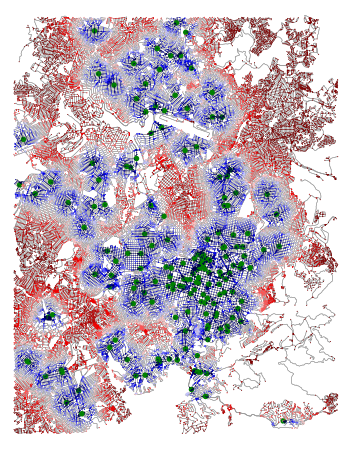

In [19]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\matplotlib\cbook\__init__.py:1061: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


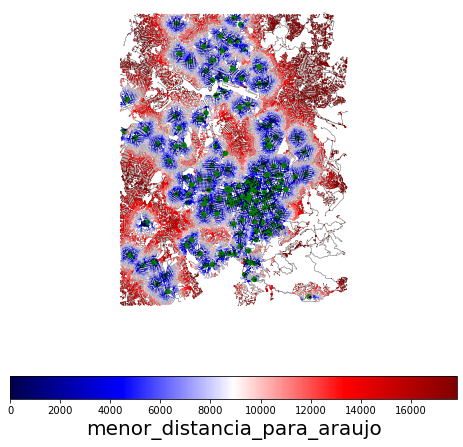

In [20]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)
cmap = plt.cm.get_cmap('seismic')
norm=plt.Normalize(vmin=nodes['menor_distancia_para_araujo'].min(), vmax=nodes['menor_distancia_para_araujo'].max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
cb.set_label('menor_distancia_para_araujo', fontsize = 20)
fig.savefig('demo.png')

In [ ]:
print('nós originais\n', list(G.nodes()))
print('\narestas originais\n', list(G.edges()))

In [ ]:
G_nx = nx.relabel.convert_node_labels_to_integers(G)
print('nós convertidos\n', list(G_nx.nodes()))
print('\narestas convertidas\n', list(G_nx.edges()))

In [ ]:
location_point = (-19.92798671024853, -43.94740898668482)
origin_node = ox.get_nearest_node(G, location_point)
origin_node

In [ ]:
shortest_path = nx.shortest_path(G,origin_node,2828035001)
ox.plot.plot_graph_route(G,shortest_path)

In [ ]:
rota_teste = [28801018, 8269807083]
ox.plot.plot_graph_route(G,rota_teste)

In [ ]:
weight = 'length'
print(list(nx.get_node_attributes(G, 'osmid').values()))
print(list(nx.get_edge_attributes(G, weight).values()))

In [ ]:
print('informações dos nós: ',G.nodes[28801018])
print('informações das arestas: ',G[28801018][8933734968])

In [ ]:
fig, ax = ox.plot_graph(G)

In [ ]:
nc = [0]*31

In [ ]:
for i in range(len(nc)):
    nc[i] = 'w'

In [ ]:
k=0
for node in G.nodes():

    if node == origin_node:

        nc[k] = str('red')
        k += 1
    else:
        nc[k] = str('w')
        k += 1

In [ ]:
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, node_color=nc)